In [4]:
import os

In [6]:
# CMIP 6 
import os
import matplotlib.pyplot as plt
import numpy as np
import matplotlib as mpl
from mpl_toolkits.basemap import Basemap
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import xarray as xr
from netCDF4 import Dataset
import glob
from netCDF4 import Dataset
import matplotlib.pyplot as plt
import numpy as np
import matplotlib as mpl
from mpl_toolkits.basemap import Basemap
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from scipy.stats import stats
import gc
AOD=[]
import xarray as xr
os.chdir("/home/ybh10/Scripts/")

from my_functions import *
os.chdir("/nesi/project/niwa02757/ybh10/CMIP6/UKESM1/Historic/")

ODMS_file = sorted(glob.glob('/nesi/project/niwa02757/ybh10/CMIP6/UKESM1/Historic/Raw_Data/Ocean_DMS/*.nc'))
# O3_file = sorted(glob.glob('/nesi/project/niwa02757/ybh10/CMIP6/UKESM1/Historic/Ozone_loss//*.nc'))

months = ['jan','feb','mar','apr','may','jun','jul','aug','sep','oct','nov','dec']
vn2=xr.open_dataset(ODMS_file[3])
olat=vn2.latitude
olon=vn2.longitude

vn1=xr.open_dataset('/nesi/project/niwa02757/ybh10/CMIP6/UKESM1/Historic/Raw_Data/DMS/dms_AERmon_UKESM1-0-LL_historical_r10i1p1f2_gn_185001-189912.nc')
lats=vn1.lat
lons=vn1.lon
time=vn1.time
# Dates=['January', 'February','March','April','May','June','July','August','September','October','November','December']
lat_bnds = [-90, -60]
inpath_modis=sorted(glob.glob('/nesi/nobackup/niwa02757/ybh10/Observational_Data/MODIS/AOD/*.nc'))
latty_o=xr.open_dataset(inpath_modis[0])
lat_o=latty_o['lat']
lon_o=latty_o['lon']
vn1=xr.open_dataset('/nesi/project/niwa02757/ybh10/CMIP6/UKESM1/Historic/Raw_Data/Ocean_DMS/dmsos_Omon_UKESM1-0-LL_historical_r10i1p1f2_gn_185001-194912.nc')
Olat=vn1.latitude

DMS_ppt=((29/62.13)*1e12)
ODMS_nm=1e6
#ODMS_trill=1e12
#ODMS_ppt=(((18/62.13)*1e12))

SO2_ppt=((29/64.06)*1e12)
O3_ppm=((29/48)*1e6)
season=['DJF','MAM','JJA','SON']
 
lat=lats[19:32] # 50 - 65s IN UKESM1:
files=[]
files_global=[]
AOD_ozone=[]; DMS_ozone=[]; Oceanic_DMS_ozone=[]; Ozone_Column_ozone=[]; RF_CS_ozone=[]; SO2_ozone=[];Surface_RF_CS_ozone=[]; Wind_ozone=[];RFSW_CS_ozone=[]
variables=[AOD_ozone,DMS_ozone,Oceanic_DMS_ozone,Ozone_Column_ozone,RF_CS_ozone,SO2_ozone,Surface_RF_CS_ozone,Wind_ozone]

DJF_var=[]; MAM_var=[]; JJA_var=[]; SON_var=[]
season_var=[DJF_var,MAM_var,JJA_var,SON_var]
DJF_global_var=[]; MAM_global_var=[]; JJA_global_var=[]; SON_global_var=[]
season_global_var=[DJF_global_var,MAM_global_var,JJA_global_var,SON_global_var]
last=[]
#ad=0; dm=1; od=2; oz=3; r=4; s=5; w=6; sw=7; sdsw=8
ad=0; cdnc=1;cheg=2; dm=3; dm_ssa=4;o_seaice=5; od=6; oz=7;  sw=8; r=9; RSDO=10; RSDS=11; RSS=12;
so2=13;so4=14;SSA_H2SO4=15;SSA=16;ss=17; seaice=18;SO4MMR=19; RSDSCS=20; w=21

for s,glvar in zip(season,season_global_var):
    Globa=sorted(glob.glob("/nesi/project/niwa02757/ybh10/CMIP6/UKESM1/Historic/Numpy_Array/Global/{}/Ensamble/*".format(s)))
    files_global.append(Globa)
    for g in (Globa):
#         if g.find (Globa[4]) !=-1: #RFSW_CS_Global
#             second_last=(np.load(g))
#         else:
#             if g.find (Globa[7]) !=-1: # Surface_RFSW
#                 last=(np.load(g))
        
        glo_filey=np.load(g)
        #print(g)
        glvar.append(glo_filey)
#             if g.find ('/Ensamble/Wind_Global.npy') !=-1:
#               #  print('end of season')
#                 glvar.append(second_last)
#                 glvar.append(last)
                    
                
#season_global_var.append(last)

# for s,var in zip(season,season_var):
#     Regi=sorted(glob.glob("/nesi/project/niwa02757/ybh10/CMIP6/UKESM1/Historic/Numpy_Array/Ozone_Region/{}/Ensamble/*".format(s)))
#     files.append(Regi)
#     for f in (Regi):
#         reg_filey=np.load(f)
#         var.append(reg_filey)
# #         glo_filey=np.load(g)
# #         glvar.append(glo_filey)
gc.collect()

def standard(data):
    serror=sem(data)
    pos_err=data+serror
    neg_err=data-serror
    if np.ndim(data)==2 !=-1:
        positive=np.nanmean(pos_err,axis=0)
        negative=np.nanmean(neg_err,axis=0)
    return positive, negative

def CMIP6(regional,globe,dms_PPT,array,global_array):  # This function will give me all seasons when specified the first and last!
    season=np.arange(0,len(regional),12)
    if (First)==11 !=-1: # Only activated when DJF seasonality is being used.
        for seas in (season):
            p=((globe[First+seas]))
            j=((globe[first1+seas]))
            i=((globe[Last+seas]))
            globally=np.nanmean((p,j,i))
            global_array.append(globally)
    else: # Activated when MAM, JA, SON is being created.
        for seas in (season):
                regionally=(np.nanmean(regional[First+seas:Last+seas],axis=0)*dms_PPT)
                globally=(np.nanmean(globe[First+seas:Last+seas],axis=0)*dms_PPT)
                array.append(regionally)
                global_array.append(globally)
    return array,global_array

In [44]:
# # ### calculating ABSOLUTE DIFFERENCE
# # import os
# # import matplotlib.pyplot as plt
# # import numpy as np
# # import matplotlib as mpl
# # from mpl_toolkits.basemap import Basemap
# # import cartopy.crs as ccrs
# # import cartopy.feature as cfeature
# # import xarray as xrvn1
# # from netCDF4 import Dataset
# # import glob
# # from netCDF4 import Dataset
# # import matplotlib.pyplot as plt
# # import numpy as np
# # import matplotlib as mpl
# # from mpl_toolkits.basemap import Basemap
# # import cartopy.crs as ccrs
# # import cartopy.feature as cfeature
# # import scipy.stats 
# # import gc
# # AOD=[]
# # import xarray as xr
# # from my_functions import *
# # os.chdir("/nesi/project/niwa02757/ybh10/CMIP6/UKESM1/Historic/")

# # ODMS_file = sorted(glob.glob('/nesi/project/niwa02757/ybh10/CMIP6/UKESM1/Historic/Raw_Data/Ocean_DMS/*.nc'))
# # # O3_file = sorted(glob.glob('/nesi/project/niwa02757/ybh10/CMIP6/UKESM1/Historic/Ozone_loss//*.nc'))
# # #large_data=[SON_global_var,DJF_global_var,DJF_global_var,DJF_global_var]#,DJF_global_var]
# # months = ['jan','feb','mar','apr','may','jun','jul','aug','sep','oct','nov','dec']
# # vn2=xr.open_dataset(ODMS_file[3])
# # olat=vn2.latitude
# # olon=vn2.longitude

# # vn1=xr.open_dataset('/nesi/project/niwa02757/ybh10/CMIP6/UKESM1/Historic/Raw_Data/DMS/dms_AERmon_UKESM1-0-LL_historical_r10i1p1f2_gn_185001-189912.nc')
# # lats=vn1.lat
# # lons=vn1.lon
# # time=vn1.time
# # # Dates=['January', 'February','March','April','May','June','July','August','September','October','November','December']
# # lat_bnds = [-90, -60]
# # inpath_modis=sorted(glob.glob('/nesi/nobackup/niwa02757/ybh10/Observational_Data/MODIS/AOD/*.nc'))
# # latty_o=xr.open_dataset(inpath_modis[0])
# # lat_o=latty_o['lat']
# # lon_o=latty_o['lon']
# # vn1=xr.open_dataset('/nesi/project/niwa02757/ybh10/CMIP6/UKESM1/Historic/Raw_Data/Ocean_DMS/dmsos_Omon_UKESM1-0-LL_historical_r10i1p1f2_gn_185001-194912.nc')
# # Olat=vn1.latitude


# # ad=0; cdnc=1;cheg=2; dm=3; dm_ssa=4;o_seaice=5; od=6; oz=7;  sw=8; r=9; RSDO=10; RSDS=11; RSS=12;
# # so2=13;so4=14;SSA_H2SO4=15;SSA=16;ss=17; seaice=18;SO4MMR=19; RSDSCS=20; w=21
# # numbers=[ad,dm,od,oz,RSDO,RSDS,RSS,so2,SSA,seaice,SO4MMR,
# #          RSDSCS,dm_ssa,SSA_H2SO4,w,cheg]
# # saves=['AOD','DMS','ODMS','Ozone','RSDO','RSDS','RSS','SO2','SSAMMR','Sea_Ice','H2SO4MMR',
# #        'RSDSCS','DMS_SSA','SSA_H2SO4','Wind','CHEG']

# # # large_data=[SON_global_var,SON_global_var,SON_global_var,SON_global_var,SON_global_var,SON_global_var,
# # #            SON_global_var,SON_global_var,SON_global_var,SON_global_var,SON_global_var,SON_global_var,SON_global_var,SON_global_var]


# # #     large_data=[SON_global_var,SON_global_var,SON_global_var,SON_global_var,SON_global_var,SON_global_var,
# # #             SON_global_var,SON_global_var,SON_global_var,SON_global_var,SON_global_var,SON_global_var,SON_global_var,SON_global_var]
# # #large_data=[SON_global_var,SON_global_var,SON_global_var,SON_global_var,SON_global_var]
# # olaty=np.nanmean(olat[0:138],axis=1)
# # ocean_sw=large_data[0][RSDO]
# # sea=np.nanmean(ocean_sw[:,100:165],axis=(0))
# # #sea=sea.transpose(1,0)
# # old_sea=np.nanmean(ocean_sw[:,90:111,:,:],axis=(0,1))
# # sea_sw=np.empty((65,330,360)); sea_sw[:]=np.nan
# # for i in range(0,65):
# #     for n in range(0,330):
# #         for l in range(0,360):
# #             sea_sw[i,n,l]=((sea[i,n,l]-old_sea[n,l]))
# # sea_sw=np.array(sea_sw)
# # #sea_sw=sea_sw.transpose(1,0)

# # ocean_dms=large_data[0][od]
# # sea=np.nanmean(ocean_dms[:,100:165],axis=(0))
# # #sea=sea.transpose(1,0)
# # old_sea=np.nanmean(ocean_dms[:,90:111,:,:],axis=(0,1))
# # sea_dms=np.empty((65,330,360)); sea_dms[:]=np.nan
# # for i in range(0,65):
# #     for n in range(0,330):
# #         for l in range(0,360):
# #             sea_dms[i,n,l]=((sea[i,n,l]-old_sea[n,l]))
# # sea_dms=np.array(sea_dms*ODMS_nm)
# # #sea_dms=sea_dms.transpose(1,0)
# # #sea_dms=sea_dms*ODMS_ppm

# # # large_data=[SON_global_var,SON_global_var,SON_global_var,sea_sw,sea_dms]
# # # large_data=[DJF_global_var,DJF_global_var]
# # # large_data=[DJF_global_var,DJF_global_var,DJF_global_var,DJF_global_var,DJF_global_var,DJF_global_var,DJF_global_var,DJF_global_var,
# # #            DJF_global_var,DJF_global_var,DJF_global_var,DJF_global_var,DJF_global_var]
# # # numbers=[oz,RSS,od,w,dm,ad]#,r] # ad chosen for ODMS due to the array having a 'one' at the start - easy to put in loop
# # # numbers=[RSS,RSDS,RSDSCS,RSDO,od]

# # #numbers=[ad,dm,od,oz,RSDO,RSDS,RSS,so2,SSA,seaice,SO4MMR,RSDSCS,dm_ssa,SSA_H2SO4,w]

# # ##########################################################################################################
# # ######################################## ABSOLUTE #############################################
# # ##########################################################################################################
# maybe=[]

# month='DJF'
# if month == 'DJF':
#     print(month)
#     print('should be DJF')
#     large_data=[]
#     large_data=[DJF_global_var,DJF_global_var,DJF_global_var,DJF_global_var,DJF_global_var,DJF_global_var,
#                 DJF_global_var,DJF_global_var,DJF_global_var,DJF_global_var,DJF_global_var,
#                 DJF_global_var,DJF_global_var,DJF_global_var,DJF_global_var,DJF_global_var]
# else:
#     print(month)
#     print('should be SON')
#     large_data=[SON_global_var,SON_global_var,SON_global_var,SON_global_var,SON_global_var,SON_global_var,
#                 SON_global_var,SON_global_var,SON_global_var,SON_global_var,SON_global_var,
#                 SON_global_var,SON_global_var,SON_global_var,SON_global_var,SON_global_var]
    
# numbers=[ad,dm,od,dm_ssa,w,SSA,oz]
# saves=['AOD','DMS','ODMS','DMS_SSA_minus_Abs_Diff','Wind','SSAMMR','Ozone']

# ocean_dms=large_data[0][od]
# sea=np.nanmean(ocean_dms[:,100:165],axis=(0))
# #sea=sea.transpose(1,0)
# old_sea=np.nanmean(ocean_dms[:,90:111,:,:],axis=(0,1))
# sea_dms=np.empty((65,330,360)); sea_dms[:]=np.nan
# for i in range(0,65):
#     for n in range(0,330):
#         for l in range(0,360):
#             sea_dms[i,n,l]=((sea[i,n,l]-old_sea[n,l]))
# sea_dms=np.array(sea_dms*ODMS_nm)

# for num,datas in zip(numbers,large_data):
#     print(num)
#     if num == RSDO !=-1:
#         maybe.append(sea_sw)
#     else:
#         if num == od !=-1:
#             maybe.append(sea_dms)
          
#         else:
#             old_vari=np.nanmean(datas[num][:,90:111,:,:],axis=(0,1))
#             vari=np.empty((65,144,192)); vari[:]=np.nan
#             data=np.nanmean(datas[num],axis=(0))
#           #  for t in range(0,datas[num].shape[0]):
#             for i in range(0,vari.shape[0]):
#                 for la in range(0,vari.shape[1]):
#                     for lo in range(0,datas[num].shape[3]):
#                     #for x in range(0,datas[num].shape[3]):
#                           #  print('hi')
#                         if num == dm !=-1:
#                             vari[i,la,lo]=(data[i+100,la,lo]-old_vari[la,lo])*DMS_ppt
#                         else:
#                             vari[i,la,lo]=((data[i+100,la,lo]-old_vari[la,lo]))
                            
#             print(np.shape(vari))
#             print(np.nanmean(vari))
#             see=np.nanmean(vari,axis=(2))
#             see=see.transpose(1,0)     
#             maybe.append(vari)
#           #  see=see.transpose(1,0)      
    
# gc.collect()
# #numbers=[ss,so4]

# #numbers=[ad,dm,od,oz,RSDO,RSDS,RSS,so2,SSA,seaice,SO4MMR,RSDSCS,dm_ssa,SSA_H2SO4,w]
# file = '/home/ybh10/CMIP6/UKESM1/Historic/Numpy_Array/Global/Difference/1940_1960_mean/Abs_Diff/'

# os.chdir(file+'{}/'.format(month))

# for i,names in zip(range(0,len(maybe)),saves):
#     np.save((names),(maybe[i]))


# ##########################################################################################################
# ######################################## RELATIVE PERCENTAGE #############################################
# ##########################################################################################################


# # #numbers=[oz,RSDSCS,od,w,dm,ad]#,r] # ad chosen for ODMS due to the array having a 'one' at the start - easy to put in loop
# maybe=[]


# ocean_dms=large_data[0][od]
# sea=np.nanmean(ocean_dms[:,100:165],axis=(0))
# #sea=sea.transpose(1,0)
# old_sea=np.nanmean(ocean_dms[:,90:111,:,:],axis=(0,1))
# sea_dms=np.empty((65,330,360)); sea_dms[:]=np.nan
# for i in range(0,65):
#     for n in range(0,330):
#         for l in range(0,360):
#             sea_dms[i,n,l]=((sea[i,n,l]-old_sea[n,l])-1)*100
# sea_dms=np.array(sea_dms)

# #for e in range(0,13):
# for num,datas in zip(numbers,large_data):
#     print(num)
#     if num == RSDO !=-1:
#         maybe.append(sea_sw)
#     else:
#         if num == od !=-1:
#             maybe.append(sea_dms)
            
#         else:
#             old_vari=np.nanmean(datas[num][:,90:111,:,:],axis=(0,1))
#             vari=np.empty((65,144,192)); vari[:]=np.nan
#             data=np.nanmean(datas[num],axis=(0))
#           #  for t in range(0,datas[num].shape[0]):
#             for i in range(0,vari.shape[0]):
#                 for la in range(0,vari.shape[1]):
#                     for lo in range(0,datas[num].shape[3]):
#                     #for x in range(0,datas[num].shape[3]):
#                           #  print('hi')
#                         if num == w !=-1:
#                             vari[i,la,lo]=(data[i+100,la,lo]-old_vari[la,lo])
#                         else:
#                             if num == dm_ssa !=-1:
#                                 vari[i,la,lo]=(data[i+100,la,lo]-old_vari[la,lo])
#                             else:
#                                 vari[i,la,lo]=((data[i+100,la,lo]/old_vari[la,lo])-1)*100
#             print(np.shape(vari))
#             print(np.nanmean(vari))
#             see=np.nanmean(vari,axis=(2))
#             see=see.transpose(1,0)     
#             maybe.append(vari)
# # maybe=maybe.transpose(0,2,1)

    
# gc.collect()
# #numbers=[cheg]

# #numbers=[ad,dm,od,oz,RSDO,RSDS,RSS,so2,SSA,seaice,SO4MMR,RSDSCS,dm_ssa,SSA_H2SO4,w]
# file = '/home/ybh10/CMIP6/UKESM1/Historic/Numpy_Array/Global/Difference/1940_1960_mean/Rel_Diff/'
# #saves=['AOD','DMS','ODMS','Ozone','RSDO','RSDS','RSS','SO2','SSAMMR','Sea_Ice','H2SO4MMR','RSDSCS','DMS_SSA','SSA_H2SO4','Wind']
# #saves=['CHEG']

# os.chdir(file+'{}/'.format(month))

# for i,names in zip(range(0,len(maybe)),saves):
#     np.save((names),(maybe[i]))

    

    
gc.collect()
# #numbers=[cheg]

# # #numbers=[ad,dm,od,oz,RSDO,RSDS,RSS,so2,SSA,seaice,SO4MMR,RSDSCS,dm_ssa,SSA_H2SO4,w]
# file = '/home/ybh10/CMIP6/UKESM1/Historic/Numpy_Array/Global/Difference/1940_1960_mean/Rel_Diff/'
# #saves=['AOD','DMS','ODMS','Ozone','RSDO','RSDS','RSS','SO2','SSAMMR','Sea_Ice','H2SO4MMR','RSDSCS','DMS_SSA','SSA_H2SO4','Wind']
# #saves=['AOD']


# # # file = '/home/ybh10/CMIP6/UKESM1/Historic/Numpy_Array/Global/Difference/'


# # # os.chdir('/scale_wlg_persistent/filesets/project/niwa02757/ybh10/CMIP6/UKESM1/Historic')

# # # # # # I've already saved this output here as:

# # # # # os.chdir(file+'/Rel_Diff/')
# # # # # np.save('DJF_Ozone.npy',(maybe[0]))
# # # # os.chdir('/scale_wlg_persistent/filesets/project/niwa02757/ybh10/CMIP6/UKESM1/Historic')
# # summer='DJF'
# # spring='SON'
# # #################### DJF:
# # #Absolute:
# # # DJF_OZONE_Abs=np.load(file+'/Abs_Diff/{}_Ozone.npy'.format(spring))
# # # DJF_WIND_Abs=np.load(file+'/Abs_Diff/{}_Wind.npy'.format(summer))
# # # DJF_DMS_Abs=np.load(file+'/Abs_Diff/{}_DMS.npy'.format(summer))
# # # DJF_AOD_Abs=np.load(file+'/Abs_Diff/{}_AOD.npy'.format(summer))
# # # DJF_SEAICE_Abs=np.load(file+'/Abs_Diff/{}_Sea_Ice.npy'.format(summer))
# # # #SON_seaice=np.load(file+'/Abs_Diff/SON_sea_ice.npy') # seaice
# # # R1_Abs_Diff=[DJF_OZONE_Abs,DJF_WIND_Abs,DJF_DMS_Abs,DJF_AOD_Abs]#,R1_Five] #oz,w,dm,ad #oz,w,dm,ad

# # # # Relative
# # # SON_OZONE=np.load(file+'/Rel_Diff/{}_Ozone.npy'.format(spring)); clevs_SON_Ozone=np.arange(-60,5+5,5)
# # # DJF_WIND=np.load(file+'/Rel_Diff/{}_Wind.npy'.format(summer)); clevs_DJF_Wind=np.arange(-1.8,3.8,.45)
# # # DJF_DMS=np.load(file+'/Rel_Diff/{}_DMS.npy'.format(summer)); clevs_DJF_DMS=np.arange(-70,65+10,10)
# # # DJF_AOD=np.load(file+'/Rel_Diff/{}_AOD.npy'.format(summer)); clevs_DJF_AOD=np.arange(-10,60+5,5)
# # # DJF_SEAICE=np.load(file+'/Rel_Diff/{}_Sea_Ice.npy'.format(summer));# clevs_DJF_Sea_Ice=
# # # DJF_H2SO4MMR=np.load(file+'/Rel_Diff/{}_H2SO4MMR.npy'.format(summer)); clevs_DJF_H2SO4MMR=np.arange(-10,50+5,5)
# # # DJF_SSAMMR=np.load(file+'/Rel_Diff/{}_H2SO4MMR.npy'.format(summer)); clevs_DJF_SSAMMR=np.arange(-20,60+5,5)
# # # DJF_OZONE=np.load(file+'/Rel_Diff/{}_Ozone.npy'.format(summer))
# # # DJF_RSS=np.load(file+'/Rel_Diff/{}_RSS.npy'.format(summer))
# # # DJF_ODMS=np.load(file+'/Rel_Diff/{}_ODMS.npy'.format(summer)); clevs_DJF_ODMS=np.arange(-50,50+5,5)
# # # DJF_RSDO=np.load(file+'/Rel_Diff/SON_RSDO.npy')
# # # DJF_RSDS=np.load(file+'/Rel_Diff/SON_RSDS.npy')
# # # DJF_RSDSCS=np.load(file+'/Rel_Diff/SON_RSDSCS.npy')
# # # #DJF_SSA_H2SO4=np.load(file+'/Rel_Diff/{}_SSA_H2SO4.npy'.format(summer)); clevs_DJF_SSA_H2SO4=np.arange(-80,80+10,10)
# # # #DJF_SO2=np.load(file+'/Rel_Diff/{}_SO2.npy'.format(summer)); clevs_DJF_SO2=np.arange(-20,60+5,5)


# # # #################### SON:
# # # # Absolute #
# # # # one=np.load(file+'/Abs_Diff/R2_OZ_RSS.npy')  #oz,RSS
# # # # two=np.load(file+'/Abs_Diff/R2_ODMS.npy')    # ODMS
# # # # three=np.load(file+'/Abs_Diff/R2_Wind_DMS_AOD.npy') # Wind,dms,aod
# # # # DJF_seaice=np.load(file+'/Abs_Diff/DJF_seaice.npy')
# # # # a=one[0]; b=one[1];c=two; d=three[0]; e=three[1]; f=three[2]; g=DJF_seaice
# # # # R2_Abs_Diff=[a,b,c,d,e,f,g]  #oz,RSS,od,w,dm,ad

# # # # Relative #
# # # SON_OZONE=np.load(file+'/Rel_Diff/{}_Ozone.npy'.format(spring))
# # # SON_ODMS=np.load(file+'/Rel_Diff/{}_ODMS.npy'.format(spring)); clevs_SON_ODMS=np.arange(-30,30+5,5)
# # # SON_WIND=np.load(file+'/Rel_Diff/{}_Wind.npy'.format(spring)); clevs_SON_Wind=np.arange(-.5,2,.25)
# # # SON_DMS=np.load(file+'/Rel_Diff/{}_DMS.npy'.format(spring)); clevs_SON_DMS=np.arange(-40,40+5,5)
# # # SON_AOD=np.load(file+'/Rel_Diff/{}_AOD.npy'.format(spring)); clevs_SON_AOD=np.arange(0,50+5,5)
# # # SON_SO2=np.load(file+'/Rel_Diff/{}_SO2.npy'.format(spring)); clevs_SON_SO2=np.arange(-40,40+5,5)
# # # SON_SEAICE=np.load(file+'/Rel_Diff/{}_Sea_Ice.npy'.format(spring));# clevs_SON_Sea_Ice=
# # # SON_H2SO4MMR=np.load(file+'/Rel_Diff/{}_H2SO4MMR.npy'.format(spring)); clevs_SON_H2SO4MMR=np.arange(0,50+5,5)
# # # SON_SSAMMR=np.load(file+'/Rel_Diff/{}_SSAMMR.npy'.format(spring)); clevs_SON_SSAMMR=np.arange(-5,75+5,5)
# # # SON_SSA_H2SO4=np.load(file+'/Rel_Diff/{}_SSA_H2SO4.npy'.format(spring)); clevs_SON_SSA_H2SO4=np.arange(-60,60+5,5)
# # # SON_RSS=np.load(file+'/Rel_Diff/{}_RSS.npy'.format(spring)); clevs_SON_RSS=np.arange(-5,40+2,2)
# # # SON_RSDO=np.load(file+'/Rel_Diff/SON_RSDO.npy'.format(spring)); clevs_SON_RSDO=np.arange(-5,90+5,5)
# # # SON_RSDS=np.load(file+'/Rel_Diff/SON_RSDS.npy'.format(spring)); clevs_SON_RSDS=np.arange(-10,6,2)
# # # SON_RSDSCS=np.load(file+'/Rel_Diff/SON_RSDSCS.npy'.format(spring)); clevs_SON_RSDSCS=np.arange(-4,3+1,1)

# # # #R1_Rel_Diff=[SON_OZONE,DJF_WIND,DJF_DMS,DJF_AOD]#,R1_Five] #oz,w,dm,ad #oz,w,dm,ad
# # #R2_Rel_Diff=[SON_OZONE,SON_RSDO,SON_ODMS,SON_WIND,SON_DMS,SON_AOD] #
# # #R2_Rel_Diff_DJF=[DJF_OZONE,DJF_RSS,DJF_ODMS,DJF_WIND,DJF_DMS,DJF_AOD] #


598316

In [45]:
DJF_global_wind=[];MAM_global_wind=[]; JJA_global_wind=[]; SON_global_wind=[]
seasonal_wind=[DJF_global_wind,MAM_global_wind,JJA_global_wind,SON_global_wind]
file_wind=[]
## FOR WIND SEASONAL LAG
# for s,glwind in zip(season,seasonal_wind):
#     Globa=sorted(glob.glob("/nesi/project/niwa02757/ybh10/CMIP6/UKESM1/Historic/Numpy_Array/Global/{}/Wind/*.npy*".format(s)))
#     file_wind.append(Globa)
#     for g in (Globa):
# #         reg_filey=np.load(f)
# #         var.append(reg_filey)
#         glo_filey=np.load(g)
#         glwind.append(glo_filey)
# seasonal_wind=np.squeeze(seasonal_wind,axis=1)   

year2=np.arange(1850,2015,1)

def five_year_mean(variable,lat,latx,laty): 
    ## Variable has shape: (13, 165, 144, 192)
    wind_mean=np.zeros((13,33,np.shape(variable)[2],192))
    five=np.arange(0,165,5)
    value_mean=np.zeros((13,165,np.shape(variable)[2],192))
    for n,i in zip(five,range(0,33)):
        wind_mean[:,i,:,:]=np.nanmean(variable[:,n:n+5,:,:],axis=(1))
    if i == 32 !=-1:
        wind_mean_sh=wind_mean[:,:,latx:laty,:]
        wind_5_mean=np.nanmean(areaweight(wind_mean_sh,lat[latx:laty]),axis=(0))

        wind_mean_5=np.zeros((165)); wind_mean_5[:]=np.nan
        wind_mean_ssh=np.zeros((13,165,laty-latx,192))
        for i,l in zip(five,range(0,34)):
            wind_mean_5[i+4]=wind_5_mean[l]
            wind_mean_ssh[:,i+4,:,:]=wind_mean_sh[:,l,:,:]

        if l == 32 !=-1:    
            y = np.where(np.isnan(wind_mean_5), None, wind_mean_5)
            series1 = y.astype(np.double)
            s1mask = np.isfinite(series1)     
            y = np.where(np.isnan(wind_mean_ssh), None, wind_mean_ssh)
            series1 = y.astype(np.double)
            errmask = np.isfinite(series1)    
            return wind_mean_5,s1mask,wind_mean_ssh,errmask


        ############# Good clev and colour map info 

def shifty(variable_name,saves,season,shifty): # This definition matches my variables in the loop below (data_...).
    colour=[]
    if season == 'DJF': # assumes 2 seasons (DJF and SON maybe?)
        i=0
    else:
        i=1
    for meas in (variable_name): # Shifty is two seasons of shifted cmap (2,) with 13 values in each
        for save,cmap in zip(saves,shifty[i]):
            if save == meas !=-1:
                print(meas)
                print(save)
                print('-----------')
                colour.append(cmap)

    return colour
            
        

clevs_SON_Ozone=np.arange(-60,5+5,5)
clevs_SON_ODMS=np.arange(-30,30+5,5)
clevs_SON_Wind=np.arange(-.5,2,.25)
clevs_SON_DMS=np.arange(-40,40+5,5)
clevs_SON_AOD=np.arange(0,50+5,5)
clevs_SON_SO2=np.arange(-40,40+5,5)
clevs_SON_H2SO4MMR=np.arange(0,50+5,5)
clevs_SON_SSAMMR=np.arange(-5,75+5,5)
clevs_SON_SSA_H2SO4=np.arange(-60,60+5,5)
clevs_SON_RSS=np.arange(-5,40+2,2)
clevs_SON_RSDO=np.arange(-5,90+5,5)
clevs_SON_RSDS=np.arange(-10,6,2)
clevs_SON_RSDSCS=np.arange(-4,3+1,1)
orig_cmap = matplotlib.cm.coolwarm
shifted_cmap_Ozone = shiftedColorMap(orig_cmap, start=0, midpoint=0.7, stop=.6, name='shifted')
shifted_cmap_H2SO4MMR = shiftedColorMap(orig_cmap, start=0.5, midpoint=0.5, stop=1, name='shifted')
shifted_cmap_Wind = shiftedColorMap(orig_cmap, start=0.35, midpoint=0.52, stop=1, name='shifted')
shifted_cmap_RSDS = shiftedColorMap(orig_cmap, start=0.2, midpoint=0.6, stop=.7, name='shifted')
shifted_cmap_DMS = shiftedColorMap(orig_cmap, start=0, midpoint=0.5, stop=1, name='shifted') 
shifted_cmap_RSS = shiftedColorMap(orig_cmap, start=0.4, midpoint=0.3, stop=1, name='shifted')
shifted_cmap_AOD = shiftedColorMap(orig_cmap, start=0.5, midpoint=0.5, stop=1, name='shifted') 
shifted_cmap_ODMS = shiftedColorMap(orig_cmap, start=.2,midpoint=0.45, stop=.75, name='shifted')
shifted_cmap_RSDO = shiftedColorMap(orig_cmap, start=0.45,midpoint=0.18, stop=.9, name='shifted')
shifted_cmap_RSDSCS = shiftedColorMap(orig_cmap, start=0.2, midpoint=0.5, stop=.7, name='shifted')
shifted_cmap_SO2 = shiftedColorMap(orig_cmap, start=0, midpoint=0.5, stop=1, name='shifted') 
shifted_cmap_SSAMMR = shiftedColorMap(orig_cmap, start=0.45, midpoint=0.25, stop=1, name='shifted')
shifted_cmap_Sea_Ice = 'viridis'
shifted_cmap_SSA_H2SO4 = shiftedColorMap(orig_cmap, start=0, midpoint=0.5, stop=1, name='shifted') 
SON_clevy=[clevs_SON_AOD,clevs_SON_DMS,clevs_SON_ODMS,clevs_SON_Ozone,clevs_SON_RSDO,clevs_SON_RSDS,clevs_SON_RSS,clevs_SON_SO2,clevs_SON_SSAMMR,clevs_SON_H2SO4MMR,clevs_SON_RSDSCS,clevs_SON_SSA_H2SO4,clevs_SON_Wind]
SON_shift=[shifted_cmap_AOD,shifted_cmap_DMS,shifted_cmap_ODMS,shifted_cmap_Ozone,shifted_cmap_RSDO,shifted_cmap_RSDS,shifted_cmap_RSS,shifted_cmap_SO2,shifted_cmap_SSAMMR,shifted_cmap_H2SO4MMR,shifted_cmap_RSDSCS,shifted_cmap_Sea_Ice,shifted_cmap_SSA_H2SO4,shifted_cmap_Wind]

clevs_DJF_DMS=np.arange(-70,65+10,10)
clevs_DJF_Ozone=np.arange(-60,5+5,5)
clevs_DJF_ODMS=np.arange(-50,50+5,5)
clevs_DJF_AOD=np.arange(-10,60+5,5)
clevs_DJF_SO2=np.arange(-20,60+5,5)
clevs_DJF_H2SO4MMR=np.arange(-10,50+5,5)
clevs_DJF_SSAMMR=np.arange(-20,60+5,5)
clevs_DJF_SSA_H2SO4=np.arange(-80,80+10,10)
clevs_DJF_SSA_H2SO4_ABS=np.arange(0,200+20,20)
clevs_DJF_RSDO=np.arange(-5,90+5,5)
clevs_DJF_RSDS=np.arange(-10,6,2)
clevs_DJF_RSDSCS=np.arange(-2,1+.2,.2)
clevs_DJF_RSS=np.arange(-10,30+5,5)
clevs_DJF_Wind=np.arange(-1.8,3.8,.45)

shifted_cmap_RSDO = shiftedColorMap(orig_cmap, start=0.45,midpoint=0.18, stop=.9, name='shifted')
shifted_cmap_ODMS = shiftedColorMap(orig_cmap, start=.2,midpoint=0.45, stop=.75, name='shifted')
shifted_cmap_RSDSCS = shiftedColorMap(orig_cmap, start=0.25, midpoint=0.626, stop=.7, name='shifted')
shifted_cmap_SO2 = shiftedColorMap(orig_cmap, start=0.3, midpoint=0.45, stop=1, name='shifted') 
shifted_cmap_SSAMMR = shiftedColorMap(orig_cmap, start=0.35, midpoint=0.55, stop=1, name='shifted')
shifted_cmap_SSA_H2SO4_ABS = shiftedColorMap(orig_cmap, start=0.5, midpoint=0.5, stop=1, name='shifted')
shifted_cmap_Wind = shiftedColorMap(orig_cmap, start=0.35, midpoint=0.7, stop=1, name='shifted')
shifted_cmap_RSDS = shiftedColorMap(orig_cmap, start=0.2, midpoint=0.6, stop=.7, name='shifted')
shifted_cmap_DJF_DMS = shiftedColorMap(orig_cmap, start=0.05, midpoint=0.44, stop=0.9, name='shifted')
shifted_cmap_SO2 = shiftedColorMap(orig_cmap, start=0.3, midpoint=0.4, stop=1, name='shifted') 
shifted_cmap_AOD = shiftedColorMap(orig_cmap, start=0.4, midpoint=0.4, stop=1, name='shifted') 
shifted_cmap_H2SO4MMR = shiftedColorMap(orig_cmap, start=0.4, midpoint=0.5, stop=1, name='shifted') 
shifted_cmap_SSA_H2SO4 = shiftedColorMap(orig_cmap, start=0, midpoint=0.5, stop=1, name='shifted') 
shifted_cmap_RSS = shiftedColorMap(orig_cmap, start=0.35, midpoint=0.55, stop=1, name='shifted')
DJF_clevy=[clevs_DJF_AOD,clevs_DJF_DMS,clevs_DJF_ODMS,clevs_DJF_Ozone,clevs_DJF_RSDO,clevs_DJF_RSDS,clevs_DJF_RSS,clevs_DJF_SO2,clevs_DJF_SSAMMR,clevs_DJF_H2SO4MMR,clevs_DJF_RSDSCS,clevs_DJF_SSA_H2SO4,clevs_DJF_Wind]
DJF_shift=[shifted_cmap_AOD,shifted_cmap_DMS,shifted_cmap_ODMS,shifted_cmap_Ozone,shifted_cmap_RSDO,shifted_cmap_RSDS,shifted_cmap_RSS,shifted_cmap_SO2,shifted_cmap_SSAMMR,shifted_cmap_H2SO4MMR,shifted_cmap_RSDSCS,shifted_cmap_Sea_Ice,shifted_cmap_SSA_H2SO4,shifted_cmap_Wind]

## Zonal
clevs_ozone=np.arange(-240,40,20) # Ozone
clevs_so2=np.arange(-3,3+.3,.3)
clevs_rsdscs=np.arange(-4,4+.5,.5)
clevs_rsdo=np.arange(-12,12+1,1)
clevs_h2so4=np.arange(-.5e11,1e11,0.1e10)
clevs_rsds=np.arange(-10,4+2,2) #DJF
clevs_rsds_son=np.arange(-14,6+2,2) # SON
clevs_wind=np.arange(-1.8,3.8,.45)# Wind
clevs_dms=np.arange(-32,24,4) # DMS
clevs_aod=np.arange(-0.005,0.035,0.0025) # AOD
clevs_odms=np.arange(-1,0.65,0.1) # DJF
clevs_odms_son=np.arange(-.5,0.35,0.05) # SON
clevs_aod=np.arange(-0.005,0.035,0.0025) # AOD

orig_cmap = matplotlib.cm.coolwarm
shifted_cmap_modis = shiftedColorMap(orig_cmap, start=0, midpoint=0.7, stop=.6, name='shifted')
shifted_cmap_aod = shiftedColorMap(orig_cmap, start=0.35, midpoint=0.3, stop=1, name='shifted')
shifted_cmap_dms = shiftedColorMap(orig_cmap, start=0, midpoint=0.57, stop=0.9, name='shifted')
shifted_cmap_wind = shiftedColorMap(orig_cmap, start=0.3, midpoint=0.62, stop=1, name='shifted')
shifted_cmap_so2 = shiftedColorMap(orig_cmap, start=0, midpoint=0.5, stop=1, name='shifted')
shifted_cmap_ssa = shiftedColorMap(orig_cmap, start=0.35, midpoint=0.3, stop=1, name='shifted')
shifted_cmap_H2SO4MMR = shiftedColorMap(orig_cmap, start=0.55, midpoint=0.5, stop=1, name='shifted')
shifted_cmap_RSDS = shiftedColorMap(orig_cmap, start=0.2, midpoint=0.6, stop=.7, name='shifted')
shifted_cmap_RSDO = shiftedColorMap(orig_cmap, start=0, midpoint=0.5, stop=1, name='shifted')
shifted_cmap_odms = shiftedColorMap(orig_cmap, start=0, midpoint=0.55, stop=.85, name='shifted')
DJF_shift=[shifted_cmap_AOD,shifted_cmap_DMS,shifted_cmap_ODMS,shifted_cmap_Ozone,shifted_cmap_RSDO,shifted_cmap_RSDS,shifted_cmap_RSS,shifted_cmap_SO2,shifted_cmap_SSAMMR,shifted_cmap_H2SO4MMR,shifted_cmap_RSDSCS,shifted_cmap_Sea_Ice,shifted_cmap_SSA_H2SO4,shifted_cmap_Wind]

DJF_clevy_abs=[clevs_aod,clevs_dms,clevs_odms,clevs_ozone,clevs_rsdo,clevs_rsds,clevs_rsds,clevs_so2,clevs_so2,clevs_so2,clevs_rsdscs,clevs_so2,clevs_wind]
DJF_shift_abs=[shifted_cmap_aod,shifted_cmap_dms,shifted_cmap_odms,shifted_cmap_Ozone,shifted_cmap_RSDO,shifted_cmap_RSDS,shifted_cmap_RSS,shifted_cmap_so2,shifted_cmap_ssa,shifted_cmap_H2SO4MMR,shifted_cmap_RSDSCS,shifted_cmap_H2SO4MMR,shifted_cmap_wind]
SON_clevy_abs=[clevs_aod,clevs_dms,clevs_odms_son,clevs_ozone,clevs_rsdo,clevs_rsds,clevs_rsds_son,clevs_so2,clevs_so2,clevs_so2,clevs_rsdscs,clevs_so2,clevs_wind]
SON_shift_abs=[shifted_cmap_aod,shifted_cmap_dms,shifted_cmap_odms,shifted_cmap_Ozone,shifted_cmap_RSDO,shifted_cmap_RSDS,shifted_cmap_RSS,shifted_cmap_so2,shifted_cmap_ssa,shifted_cmap_H2SO4MMR,shifted_cmap_RSDSCS,shifted_cmap_H2SO4MMR,shifted_cmap_wind]

# month=['DJF','SON']
# clevsy=[DJF_clevy,SON_clevy]
# shifty=[DJF_shift,SON_shift]
# # name='clevs_{}_{}'
# saves=['AOD','DMS','ODMS','Ozone','RSDO','RSDS','RSS','SO2','SSAMMR','H2SO4MMR','RSDSCS','SSA_H2SO4','Wind']
# for i,cle,shi in zip(month,clevsy,shifty):
#     file_dot ='/home/ybh10/CMIP6/UKESM1/Historic/Numpy_Array/Global/Difference/1940_1960_mean/Abs_Diff/{}/Clevs'.format(i)
#     for save,c,s in zip(saves,cle,shi):
#         print('{}_{}'.format(i,save))
#         print(file_dot)
#         print('----------------')
#         np.save('{}/{}_clev.npy'.format(file_dot,save),c)
#         np.save('{}/{}_shift'.format(file_dot,save),s,allow_pickle=True)

# five=np.arange(0,165,5)
# wind_mean=np.zeros((4,13,165,144,192))
# for n,i in zip(five,range(0,165)):
#     wind_mean[:,:,i,:,:]=np.nanmean(seasonal_wind[:,:,n:n+5,:,:],axis=(2))
   

# wind_mean_sh=wind_mean[:,:,:,19:40]
# wind_5_mean=(np.nanmean(wind_mean_sh[0],axis=(0,2,3))) 

# wind_mean_5=np.zeros((165)); wind_mean_5[:]=np.nan
# for i,l in zip(five,range(0,33)):
#     wind_mean_5[i+5]=wind_5_mean[l]
gc.collect()

0

In [5]:
# DMS_SH_mean=np.mean(DMS,axis=(1,2))
# SO2_SH_mean=np.mean(SO2,axis=(1,2))*SO2_ppt
# O3_SH_mean=np.mean(O3,axis=(1,2))*O3_ppm
# O3_Column_SH_mean=np.mean(Ozone_column,axis=(1,2))*O3_ppm
# AOD_SH_mean=np.mean(AOD,axis=(1,2))

# DMS_mean=np.mean(DMS_Global,axis=(1,2))
# SO2_mean=np.mean(SO2_Global,axis=(1,2))*SO2_ppt
# O3_mean=np.mean(O3_Global,axis=(2,3))*O3_ppm
# O3_Column_mean=np.mean(Ozone_column_Global,axis=(1,2))*O3_ppm
# AOD_mean=np.mean(AOD_Global,axis=(1,2))
# Ocean_DMS_mean=np.mean(Ocean_DMS_Global,axis=(1,2))

In [ ]:
                                 ### SO2, DMS, OZONE VARIABLE LINE PLOT ###
Ozone_ens=np.load('/home/ybh10/CMIP6/UKESM1/Historic/Numpy_Array/Ozone_Region/Ensemble_mean/Ozone_Column_60_90S.npy')
DMS_ens=np.load('/home/ybh10/CMIP6/UKESM1/Historic/Numpy_Array/Ozone_Region/Ensemble_mean/DMS_60_90S.npy')
SO2_ens=np.load('/home/ybh10/CMIP6/UKESM1/Historic/Numpy_Array/Ozone_Region/Ensemble_mean/SO2_60_90S.npy')
Oceanic_DMS_ens=np.load('/home/ybh10/CMIP6/UKESM1/Historic/Numpy_Array/Ozone_Region/Ensemble_mean/Ocean_DMS_60_90S.npy')

# season_type='DJF'
# month_variable={}_var.format(season_type)
AOD_ozone=[]; DMS_ozone=[]; Oceanic_DMS_ozone=[]; Ozone_Column_ozone=[]; RF_CS__ozone=[]; SO2_ozone=[]; Wind_ozone=[]

DJF_DMS=Oceanic_DMS_ens[:,:,0];MAM_DMS=Oceanic_DMS_ens[:,:,2];JJA_DMS=Oceanic_DMS_ens[:,:,1];SON_DMS=Oceanic_DMS_ens[:,:,3]

Var_DMS=[DJF_DMS,MAM_DMS,JJA_DMS,SON_DMS]
Var=[DJF_var,MAM_var,JJA_var,SON_var]
season_type=['DJF','MAM','JJA','SON']
# aa=DJF_SO2
ozone_season_type=['SON','DJF','MAM','JJA']
#fig, axes = plt.subplots(figsize=(10,10))

fig = plt.figure(figsize=(20,20), edgecolor='w')
fig.subplots_adjust(hspace=0.18, wspace=0.47)
ax = fig.add_subplot(2,2,1); ax1 = fig.add_subplot(2,2,2); ax2 = fig.add_subplot(2,2,3);
ax3 = fig.add_subplot(2,2,4);
axes=[ax,ax1,ax2,ax3]

#ad=0; dm=1; od=2; oz=3; r=4; s=5; w=6; sw=7; sdsw=8


    
    
seasonal_ozone=(season_global_var[1][oz],season_global_var[2][oz],season_global_var[3][oz],season_global_var[0][oz])
seasonal_ozone_reg=(season_var[3][oz],season_var[0][oz],season_var[1][oz],season_var[2][oz])

for axe,month_variable,oc_dms,global_var,seas,ozone_seas,ozone_type in zip(axes,season_var,Var_DMS,season_global_var,season_type,ozone_season_type,seasonal_ozone_reg):
    axe.grid()
    year1=np.arange(1960,2000,1)
    par1 = axe.twinx()
    DMS=five_year_mean(global_var[dm],lats,19,40)[0][110:150]*DMS_ppt
    DMS_error=areaweight(five_year_mean(global_var[dm],lats,19,40)[2][:,110:150],lats[19:40])*DMS_ppt
    DMS_Error=standard(DMS_error)
    y = np.where((DMS_Error[0]==0), None, DMS_Error[0])
    series1 = y.astype(np.double)
    dmsmask = np.isfinite(series1) 
    
    windy_mask=five_year_mean(global_var[w],lats,19,40)[1][110:150]
    windy_meaned=five_year_mean(global_var[w],lats,19,40)[0][110:150]
#     #SO2=np.nanmean(global_var[dm][:,110:150,19:40],axis=(0,2,3)) #*SO2_ppt
#     SO2_error=areaweight(five_year_mean(global_var[w],lats,19,40)[2][:,110:150],lats[19:40])
#        #global_var[w][:,110:150,19:40],axis=(2,3)) #*SO2_ppt
#     SO2_Error=standard(SO2_error)

#    ozone_mask=(five_year_mean(ozone_type,lats,0,24)[1][110:150])
    Ozone=(five_year_mean(ozone_type,lats,0,24)[0][110:150])
    Ozone_error=areaweight(five_year_mean(ozone_type,lats,0,24)[2][:,110:150],lats[0:24])
    Ozone_Error=standard(Ozone_error)


#     wind_mean_5=np.zeros((165)); wind_mean_5[:]=np.nan
#     for i,l in zip(five,range(0,33)):
#         wind_mean_5[i+5]=wind_5_mean[l]

#     p3,=par2.plot(year1,DMS,'b-', label = "Atmospheric DMS ") Westerly Wind
#     par2.fill_between(year1, DMS_Error[0], DMS_Error[1],facecolor='b',alpha=0.3,)

#     p2,=par1.plot(year1[errmask],windy_meaned[errmask],'r-',label = "Atmospheric DMS")
#     par1.fill_between(year1[errmask], SO2_Error[0][errmask], SO2_Error[1][errmask],facecolor='r',alpha=0.3,)

    p2,=par1.plot(year1[dmsmask],DMS[dmsmask],'r-',label = "Atmospheric DMS")
    par1.fill_between(year1[dmsmask], DMS_Error[0][dmsmask], DMS_Error[1][dmsmask],facecolor='r',alpha=0.3,)
    
    p1,=axe.plot(year1[dmsmask],Ozone[dmsmask],'y-',label = "O3")
    axe.fill_between(year1[dmsmask], Ozone_Error[0][dmsmask], Ozone_Error[1][dmsmask],facecolor='y',alpha=0.3,)


    axe.set_xlabel("Year",fontsize=15)
  #  par2.set_ylabel("Atmospheric DMS (ppt)",fontsize=15) Column Ozone (DU)
 #   par1.set_ylabel("Westerly Wind (m $s^-$$^1$)",fontsize=15)
 #   par1.set_ylabel("Column Ozone (DU)",fontsize=15)
    # par1.set_ylabel("SO2 (ppt)",fontsize=15)
    par1.set_ylabel("Atmospheric DMS (ppt)",fontsize=15)
    axe.set_ylabel("Column Ozone (DU)",fontsize=15)



    axe.yaxis.label.set_color(p1.get_color())
    par1.yaxis.label.set_color(p2.get_color())
   # par2.yaxis.label.set_color(p3.get_color())

    tkw = dict(size=5, width=1.5)
    par1.tick_params(axis='y', colors=p2.get_color(), **tkw,labelsize=15)
  #  par2.tick_params(axis='y', colors=p3.get_color(), **tkw,labelsize=15)
    axe.tick_params(axis='y', colors=p1.get_color(), **tkw,labelsize=15)
#    axe.set_ylim(190,430)
    axe.set_ylim(190,430)
    axe.tick_params(axis='x', **tkw,labelsize=15)
    lines = [p1, p2]
    if seas == 'SON' !=-1:
        plt.text(0.02,0.019,
                 'Ozone-DMS $r^2$   = {} \n' 
                 'Ozone-Wind $r^2$ = {} \n'
                 'DMS-Wind  $r^2$  = {}'.format(str(round(np.corrcoef((Ozone[windy_mask],DMS[windy_mask]))[0,1]**2,3)),
                                                str(round(np.corrcoef((Ozone[windy_mask],windy_meaned[windy_mask]))[0,1]**2,3)),
                                                str(round(np.corrcoef((DMS[windy_mask],windy_meaned[windy_mask]))[0,1]**2,3)))
                 ,color='black',fontsize=15,fontweight='bold',bbox=dict(facecolor='white', edgecolor='black', boxstyle='round'),transform = axe.transAxes)
       # plt.text(1850,240,'Ozone-SO2{} $r^2$ = {}'.format('\u2082',str(round(np.corrcoef((Ozone,SO2))[0,1],3))),color='black',fontsize=15,fontweight='bold')
       # plt.text(1850,230,'DMS-SO2{} $r^2$  = {}'.format('\u2082',str(round(np.corrcoef((DMS,SO2))[0,1],3))),color='black',fontsize=15,fontweight='bold')
    else:
        plt.text(0.02,0.87,
                 'Ozone-DMS $r^2$   = {} \n' 
                 'Ozone-Wind $r^2$ = {} \n'
                 'DMS-Wind  $r^2$  = {}'.format(str(round(np.corrcoef((Ozone[windy_mask],DMS[windy_mask]))[0,1]**2,3)),
                                                str(round(np.corrcoef((Ozone[windy_mask],windy_meaned[windy_mask]))[0,1]**2,3)),
                                                str(round(np.corrcoef((DMS[windy_mask],windy_meaned[windy_mask]))[0,1]**2,3)))
                 ,color='black',fontsize=15,fontweight='bold',bbox=dict(facecolor='white', edgecolor='black', boxstyle='round'),transform = axe.transAxes)
# #         plt.text(1850,420,'Ozone-DMS $r^2$   = {}'.format(str(round(np.corrcoef((Ozone,DMS))[0,1],3))),color='black',fontsize=15,fontweight='bold')
#         plt.text(1850,410,'Ozone-SO2{} $r^2$ = {}'.format('\u2082',str(round(np.corrcoef((Ozone,SO2))[0,1],3))),color='black',fontsize=15,fontweight='bold')
#         plt.text(1850,400,'DMS-SO2{} $r^2$   = {}'.format('\u2082',str(round(np.corrcoef((DMS,SO2))[0,1],3))),color='black',fontsize=15,fontweight='bold')

#     plt.text(1900,265,'Ozone-DMS $r^2$ = {}'.format(str(round(np.corrcoef((Ozone,DMS))[0,1],3))),color='black',fontsize=15,fontweight='bold')
#     plt.text(1900,250,'Ozone-SO{} $r^2$ = {}'.format('\u2082',str(round(np.corrcoef((Ozone,SO2))[0,1],3))),color='black',fontsize=15,fontweight='bold')
#     plt.text(1900,235,'DMS-SO{} $r^2$ = {}'.format('\u2082',str(round(np.corrcoef((DMS,SO2))[0,1],3))),color='black',fontsize=15,fontweight='bold')
    plt.title("     {} (40\N{DEGREE SIGN} - 65\N{DEGREE SIGN}S) w/ Ozone in {}".format(seas,ozone_seas),fontsize=20)

 #   plt.title("     {} (90\N{DEGREE SIGN} - 60\N{DEGREE SIGN}S)".format(seas),fontsize=20)
    plt.suptitle("Historical UKESM1 CMIP6 with 95% Standard Error all 5-YEAR-MEAN ", size=20)
    fig.subplots_adjust(top=0.94)
    if seas == 'DJF' !=-1:
        axe.legend(lines, [l.get_label() for l in lines],fontsize=16,bbox_to_anchor=(1.465, -0.023),edgecolor='black')
#plt.tight_layout()
#plt.show()
#plt.savefig("/home/ybh10/CMIP6/UKESM1/Historic/Plots/Lines/1960/UKESM1_50_65S_SO2_DMS_Ozone.png",dpi=600,bbox_inches = 'tight')
plt.savefig("/home/ybh10/CMIP6/UKESM1/Historic/Plots/Lines/1960/Lagged/UKESM1_40_65S_5_YRMEANED_DMS_LAGGED_Ozone.png",dpi=600,bbox_inches = 'tight')
#plt.savefig("/home/ybh10/CMIP6/UKESM1/Historic/Plots/Lines/1960/UKESM1_40_65S_DMS_Wind.png",dpi=600,bbox_inches = 'tight')


In [ ]:
                                 ### SO2, DMS, OZONE VARIABLE LINE PLOT ###
Ozone_ens=np.load('/home/ybh10/CMIP6/UKESM1/Historic/Numpy_Array/Ozone_Region/Ensemble_mean/Ozone_Column_60_90S.npy')
DMS_ens=np.load('/home/ybh10/CMIP6/UKESM1/Historic/Numpy_Array/Ozone_Region/Ensemble_mean/DMS_60_90S.npy')
SO2_ens=np.load('/home/ybh10/CMIP6/UKESM1/Historic/Numpy_Array/Ozone_Region/Ensemble_mean/SO2_60_90S.npy')
Oceanic_DMS_ens=np.load('/home/ybh10/CMIP6/UKESM1/Historic/Numpy_Array/Ozone_Region/Ensemble_mean/Ocean_DMS_60_90S.npy')

# season_type='DJF'
# month_variable={}_var.format(season_type)
AOD_ozone=[]; DMS_ozone=[]; Oceanic_DMS_ozone=[]; Ozone_Column_ozone=[]; RF_CS__ozone=[]; SO2_ozone=[]; Wind_ozone=[]

DJF_DMS=Oceanic_DMS_ens[:,:,0];MAM_DMS=Oceanic_DMS_ens[:,:,2];JJA_DMS=Oceanic_DMS_ens[:,:,1];SON_DMS=Oceanic_DMS_ens[:,:,3]

Var_DMS=[DJF_DMS,MAM_DMS,JJA_DMS,SON_DMS]
Var=[DJF_var,MAM_var,JJA_var,SON_var]
season_type=['DJF','MAM','JJA','SON']
# aa=DJF_SO2
ozone_season_type=['SON','DJF','MAM','JJA']
#fig, axes = plt.subplots(figsize=(10,10))

fig = plt.figure(figsize=(20,20), edgecolor='w')
fig.subplots_adjust(hspace=0.18, wspace=0.47)
ax = fig.add_subplot(2,2,1); ax1 = fig.add_subplot(2,2,2); ax2 = fig.add_subplot(2,2,3);
ax3 = fig.add_subplot(2,2,4);
axes=[ax,ax1,ax2,ax3]
ad=0; dm=1; od=2; oz=3; r=4; s=5; w=6


    
    
seasonal_ozone=(season_global_var[1][oz],season_global_var[2][oz],season_global_var[3][oz],season_global_var[0][oz])
seasonal_ozone_reg=(season_var[3][oz],season_var[0][oz],season_var[1][oz],season_var[2][oz])

for axe,month_variable,oc_dms,global_var,seas,ozone_seas,ozone_type in zip(axes,season_var,Var_DMS,season_global_var,season_type,ozone_season_type,seasonal_ozone_reg):
    axe.grid()
    year1=np.arange(1960,2000,1)
    par1 = axe.twinx()
  #  par2 = axe.twinx()
   # par2.spines["right"].set_position(("axes", 1.2))
   # par2.spines["right"].set_visible(True)
        
   # oceanic_dms=oc_dms
    #month_variable=Var
#    DMS=np.nanmean(month_variable[1][:,:,19:32]*DMS_ppt,axis=(0,2,3))
    DMS=five_year_mean(global_var[w],lats,19,40)[0][110:150]*DMS_ppt
    DMS_error=areaweight(five_year_mean(global_var[dm],lats,19,40)[2][:,110:150],lats[19:40])*DMS_ppt
    DMS_Error=standard(DMS_error)

    windy_mask=five_year_mean(global_var[dm],lats,19,40)[1][110:150]
    windy_meaned=five_year_mean(global_var[dm],lats,19,40)[0][110:150]
    #SO2=np.nanmean(global_var[dm][:,110:150,19:40],axis=(0,2,3)) #*SO2_ppt
    SO2_error=areaweight(five_year_mean(global_var[dm],lats,19,40)[2][:,110:150],lats[19:40])
       #global_var[w][:,110:150,19:40],axis=(2,3)) #*SO2_ppt
    SO2_Error=standard(SO2_error)
    
    y = np.where((SO2_Error[0]==0), None, SO2_Error[0])
    series1 = y.astype(np.double)
    errmask = np.isfinite(series1) 

    
    ozone_mask=(five_year_mean(ozone_type,lats,0,24)[1][110:150])
    Ozone=(five_year_mean(ozone_type,lats,0,24)[0][110:150])
    Ozone_error=areaweight(five_year_mean(ozone_type,lats,0,24)[2][:,110:150],lats[0:24])
    Ozone_Error=standard(Ozone_error)
#     y = np.where((SO2_Error[0]==0), None, SO2_Error[0])
#     series1 = y.astype(np.double)
#     errmask = np.isfinite(series1)
    #masky=five_year_mean(ozone_type,0,24)[3][:,110:150]    
#     Ozone=np.nanmean(ozone_type[:,110:150],axis=(0,2,3))
#     Ozone_error=np.nanmean(ozone_type[:,110:150],axis=(2,3))
#     Ozone_Error=standard(Ozone_error)
    
#     wind_mean_5=np.zeros((165)); wind_mean_5[:]=np.nan
#     for i,l in zip(five,range(0,33)):
#         wind_mean_5[i+5]=wind_5_mean[l]

#     p3,=par2.plot(year1,DMS,'b-', label = "Atmospheric DMS ") Westerly Wind
#     par2.fill_between(year1, DMS_Error[0], DMS_Error[1],facecolor='b',alpha=0.3,)

    p2,=par1.plot(year1[errmask],windy_meaned[errmask],'r-',label = "Atmospheric DMS")
    par1.fill_between(year1[errmask], SO2_Error[0][errmask], SO2_Error[1][errmask],facecolor='r',alpha=0.3,)

    p1,=axe.plot(year1[errmask],DMS[errmask],'y-',label = "O3")
    axe.fill_between(year1[errmask], DMS_Error[0][errmask], DMS_Error[1][errmask],facecolor='y',alpha=0.3,)
    
#     p1,=axe.plot(year1,Ozone,'y-',label = "O3")
#     axe.fill_between(year1, Ozone_Error[0], Ozone_Error[1],facecolor='y',alpha=0.3,)


    axe.set_xlabel("Year",fontsize=15)
  #  par2.set_ylabel("Atmospheric DMS (ppt)",fontsize=15) Column Ozone (DU)
 #   par1.set_ylabel("Westerly Wind (m $s^-$$^1$)",fontsize=15)
    par1.set_ylabel("Westerly Wind (m $s^-$$^1$)",fontsize=15)
    # par1.set_ylabel("SO2 (ppt)",fontsize=15)
    axe.set_ylabel("Atmospheric DMS (ppt)",fontsize=15)



    axe.yaxis.label.set_color(p1.get_color())
    par1.yaxis.label.set_color(p2.get_color())
   # par2.yaxis.label.set_color(p3.get_color())

    tkw = dict(size=5, width=1.5)
    par1.tick_params(axis='y', colors=p2.get_color(), **tkw,labelsize=15)
  #  par2.tick_params(axis='y', colors=p3.get_color(), **tkw,labelsize=15)
    axe.tick_params(axis='y', colors=p1.get_color(), **tkw,labelsize=15)
#    axe.set_ylim(190,430)
    axe.set_ylim(190,430)
    axe.tick_params(axis='x', **tkw,labelsize=15)
    lines = [p1, p2]
    if seas == 'SON' !=-1:
        plt.text(0.02,0.019,
                 'Ozone-DMS $r^2$   = {} \n' 
                 'Ozone-Wind $r^2$ = {} \n'
                 'DMS-Wind  $r^2$  = {}'.format(str(round(np.corrcoef((Ozone[windy_mask],DMS[windy_mask]))[0,1]**2,3)),
                                                str(round(np.corrcoef((Ozone[windy_mask],windy_meaned[windy_mask]))[0,1]**2,3)),
                                                str(round(np.corrcoef((DMS[windy_mask],windy_meaned[windy_mask]))[0,1]**2,3)))
                 ,color='black',fontsize=15,fontweight='bold',bbox=dict(facecolor='white', edgecolor='black', boxstyle='round'),transform = axe.transAxes)
       # plt.text(1850,240,'Ozone-SO2{} $r^2$ = {}'.format('\u2082',str(round(np.corrcoef((Ozone,SO2))[0,1],3))),color='black',fontsize=15,fontweight='bold')
       # plt.text(1850,230,'DMS-SO2{} $r^2$  = {}'.format('\u2082',str(round(np.corrcoef((DMS,SO2))[0,1],3))),color='black',fontsize=15,fontweight='bold')
    else:
        plt.text(0.02,0.87,
                 'Ozone-DMS $r^2$   = {} \n' 
                 'Ozone-Wind $r^2$ = {} \n'
                 'DMS-Wind  $r^2$  = {}'.format(str(round(np.corrcoef((Ozone[windy_mask],DMS[windy_mask]))[0,1]**2,3)),
                                                str(round(np.corrcoef((Ozone[windy_mask],windy_meaned[windy_mask]))[0,1]**2,3)),
                                                str(round(np.corrcoef((DMS[windy_mask],windy_meaned[windy_mask]))[0,1]**2,3)))
                 ,color='black',fontsize=15,fontweight='bold',bbox=dict(facecolor='white', edgecolor='black', boxstyle='round'),transform = axe.transAxes)
# #         plt.text(1850,420,'Ozone-DMS $r^2$   = {}'.format(str(round(np.corrcoef((Ozone,DMS))[0,1],3))),color='black',fontsize=15,fontweight='bold')
#         plt.text(1850,410,'Ozone-SO2{} $r^2$ = {}'.format('\u2082',str(round(np.corrcoef((Ozone,SO2))[0,1],3))),color='black',fontsize=15,fontweight='bold')
#         plt.text(1850,400,'DMS-SO2{} $r^2$   = {}'.format('\u2082',str(round(np.corrcoef((DMS,SO2))[0,1],3))),color='black',fontsize=15,fontweight='bold')

#     plt.text(1900,265,'Ozone-DMS $r^2$ = {}'.format(str(round(np.corrcoef((Ozone,DMS))[0,1],3))),color='black',fontsize=15,fontweight='bold')
#     plt.text(1900,250,'Ozone-SO{} $r^2$ = {}'.format('\u2082',str(round(np.corrcoef((Ozone,SO2))[0,1],3))),color='black',fontsize=15,fontweight='bold')
#     plt.text(1900,235,'DMS-SO{} $r^2$ = {}'.format('\u2082',str(round(np.corrcoef((DMS,SO2))[0,1],3))),color='black',fontsize=15,fontweight='bold')
    plt.title("     {} (40\N{DEGREE SIGN} - 65\N{DEGREE SIGN}S) w/ Ozone in {}".format(seas,ozone_seas),fontsize=20)

 #   plt.title("     {} (90\N{DEGREE SIGN} - 60\N{DEGREE SIGN}S)".format(seas),fontsize=20)
    plt.suptitle("Historical UKESM1 CMIP6 with 95% Standard Error all 5-YEAR-MEAN ", size=20)
    fig.subplots_adjust(top=0.94)
    if seas == 'DJF' !=-1:
        axe.legend(lines, [l.get_label() for l in lines],fontsize=16,bbox_to_anchor=(1.465, -0.023),edgecolor='black')
#plt.tight_layout()
#plt.show()
#plt.savefig("/home/ybh10/CMIP6/UKESM1/Historic/Plots/Lines/1960/UKESM1_50_65S_SO2_DMS_Ozone.png",dpi=600,bbox_inches = 'tight')
#plt.savefig("/home/ybh10/CMIP6/UKESM1/Historic/Plots/Lines/1960/Lagged/UKESM1_40_65S_5_YRMEANED_DMS_LAGGED_Ozone.png",dpi=600,bbox_inches = 'tight')
plt.savefig("/home/ybh10/CMIP6/UKESM1/Historic/Plots/Lines/1960/UKESM1_40_65S_DMS_Wind.png",dpi=600,bbox_inches = 'tight')


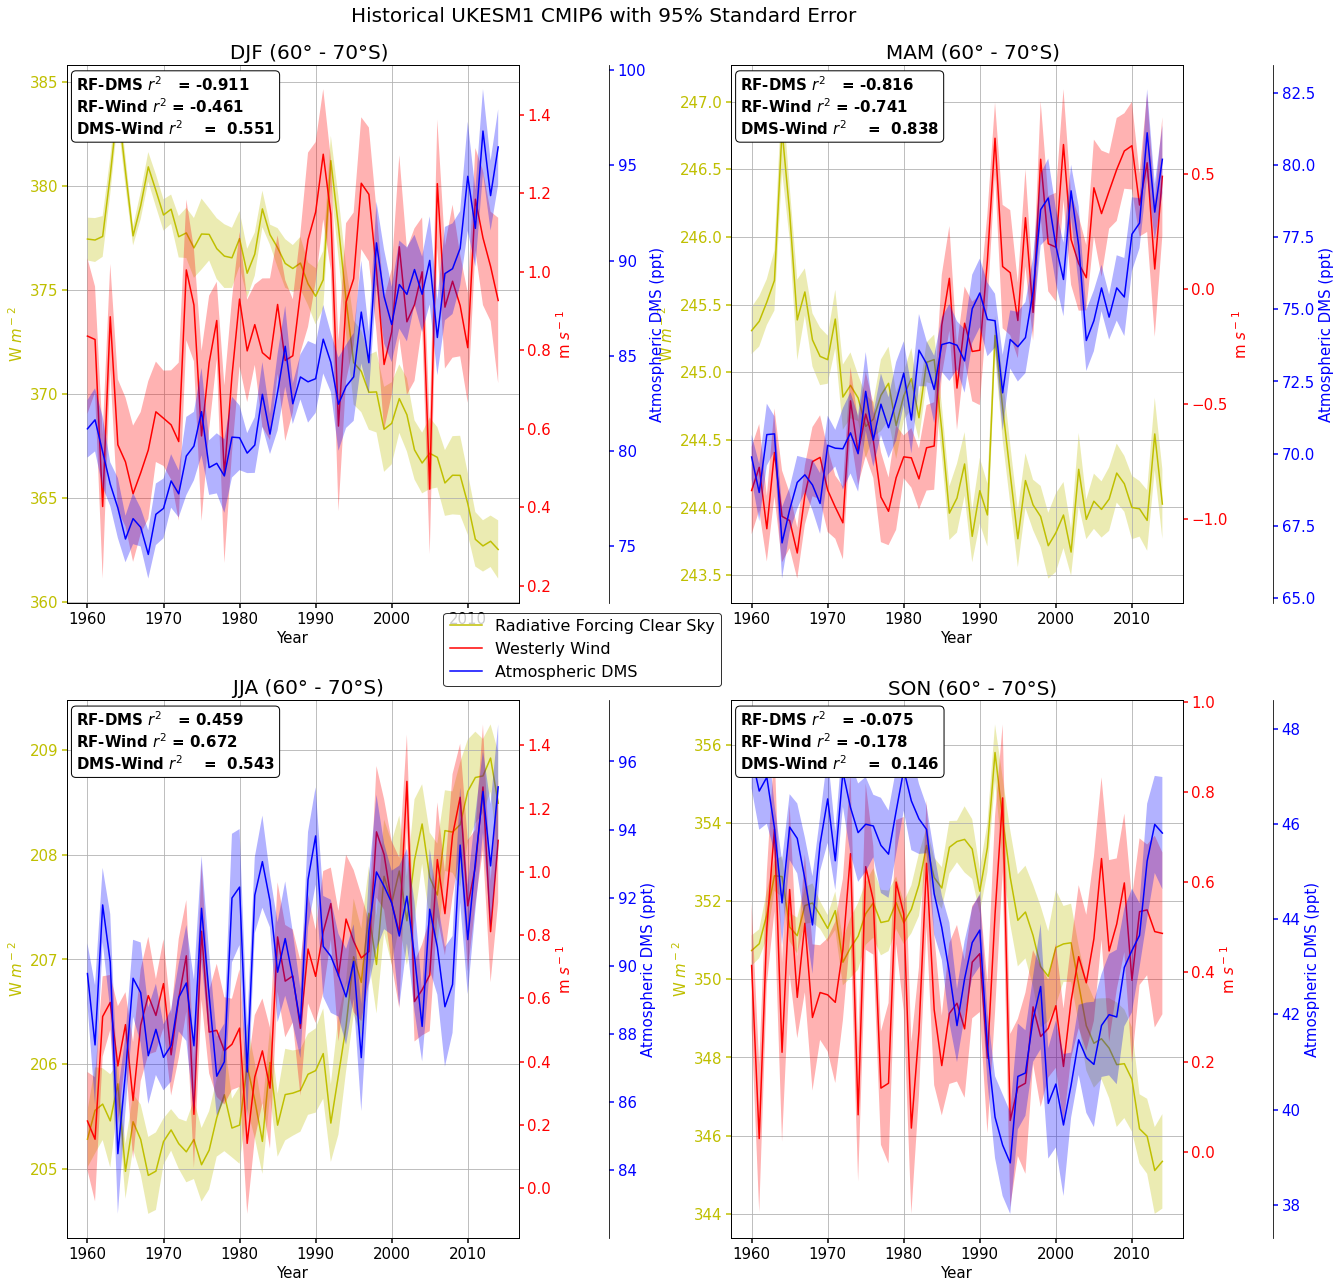

In [84]:
                                    ### OCEANIC DMS, DMS, OZONE VARIABLE LINE PLOT ###
Ozone_ens=np.load('/home/ybh10/CMIP6/UKESM1/Historic/Numpy_Array/Ozone_Region/Ensemble_mean/Ozone_Column_60_90S.npy')
DMS_ens=np.load('/home/ybh10/CMIP6/UKESM1/Historic/Numpy_Array/Ozone_Region/Ensemble_mean/DMS_60_90S.npy')
SO2_ens=np.load('/home/ybh10/CMIP6/UKESM1/Historic/Numpy_Array/Ozone_Region/Ensemble_mean/SO2_60_90S.npy')
Oceanic_DMS_ens=np.load('/home/ybh10/CMIP6/UKESM1/Historic/Numpy_Array/Ozone_Region/Ensemble_mean/Ocean_DMS_60_90S.npy')

# season_type='DJF'
# month_variable={}_var.format(season_type)
#   AOD_ozone=[]; DMS_ozone=[]; Oceanic_DMS_ozone=[]; Ozone_Column_ozone=[]; SO2_ozone=[]; Wind_ozone=[]


DJF_DMS=Oceanic_DMS_ens[:,:,0];MAM_DMS=Oceanic_DMS_ens[:,:,2];JJA_DMS=Oceanic_DMS_ens[:,:,1];SON_DMS=Oceanic_DMS_ens[:,:,3]

Var_DMS=[DJF_DMS,MAM_DMS,JJA_DMS,SON_DMS]
Var=[DJF_var,MAM_var,JJA_var,SON_var]
season_type=['DJF','MAM','JJA','SON']
# aa=DJF_SO2

#fig, axes = plt.subplots(figsize=(10,10))

fig = plt.figure(figsize=(20,20), edgecolor='w')
fig.subplots_adjust(hspace=0.18, wspace=0.47)
ax = fig.add_subplot(2,2,1); ax1 = fig.add_subplot(2,2,2); ax2 = fig.add_subplot(2,2,3);
ax3 = fig.add_subplot(2,2,4);
axes=[ax,ax1,ax2,ax3]
ad=0; dm=1; od=2; oz=3; r=4; s=5; w=6

for axe,month_variable,oc_dms,global_var,seas,wind_seas in zip(axes,season_var,Var_DMS,season_global_var,season_type,seasonal_lagged_wind):
    axe.grid()
    year1=np.arange(1960,2015,1)
    par1 = axe.twinx()
    par2 = axe.twinx()
    par2.spines["right"].set_position(("axes", 1.2))
    par2.spines["right"].set_visible(True)

   # oceanic_dms=oc_dms
    #month_variable=Var                   # 19:40 = 40 - 65S | 19:32 = 50 - 65S
    DMS=np.nanmean(global_var[dm][:,110:165,15:24]*DMS_ppt,axis=(0,2,3))
    DMS_error=np.nanmean(global_var[dm][:,110:165,15:24]*DMS_ppt,axis=(2,3))
    DMS_Error=standard(DMS_error)

#    Oceanic_DMS=np.nanmean(oc_dms* 1000000,axis=(0,2,3))
                                                   #84:126 = 40 - 65S
    Oceanic_DMS=np.nanmean(wind_seas[:,110:165,15:24],axis=(0,2,3))
    Oceanic_DMS_error=np.nanmean(wind_seas[:,110:165,15:24],axis=(2,3))
#     Oceanic_DMS=np.nanmean(global_var[w][:,110:165,70:94]* 1000000,axis=(0,2,3))
#     Oceanic_DMS_error=np.nanmean(global_var[w][:,110:165,70:94]* 1000000,axis=(2,3))
    
    Oceanic_DMS_Error=standard(Oceanic_DMS_error)

#     SO2=np.nanmean(month_variable[4]*SO2_ppt,axis=(0,2,3))
#     SO2_error=np.nanmean(month_variable[4]*SO2_ppt,axis=(2,3))
#     SO2_Error=standard(SO2_error)

    Ozone=np.nanmean(global_var[r][:,110:165,15:24],axis=(0,2,3))
    Ozone_error=np.nanmean(global_var[r][:,110:165,15:24],axis=(2,3))
    Ozone_Error=standard(Ozone_error)

    p3,=par2.plot(year1,DMS,'b-', label = "Atmospheric DMS ")
    par2.fill_between(year1, DMS_Error[0], DMS_Error[1],facecolor='b',alpha=0.3,)

    p2,=par1.plot(year1,Oceanic_DMS,'r-',label = "Westerly Wind")
    par1.fill_between(year1, Oceanic_DMS_Error[0], Oceanic_DMS_Error[1],facecolor='r',alpha=0.3,)

    p1,=axe.plot(year1,Ozone,'y-',label = "Radiative Forcing Clear Sky")
    #p1,=axe.plot(year1,Ozone,'y-',label = "Westerly Wind")

    axe.fill_between(year1, Ozone_Error[0], Ozone_Error[1],facecolor='y',alpha=0.3,)


    axe.set_xlabel("Year",fontsize=15)
    par2.set_ylabel("Atmospheric DMS (ppt)",fontsize=15)
    par1.set_ylabel("m $s^-$$^1$",fontsize=15)
#    par1.set_ylabel("Oceanic DMS (nM)",fontsize=15)
    # host.set_ylabel("Atmospheric DMS (ppt)",fontsize=15)
    # par1.set_ylabel("SO2 (ppt)",fontsize=15)
    axe.set_ylabel("W $m^-$$^2$",fontsize=15)
   # axe.set_ylabel("m $s^-$",fontsize=15)




    axe.yaxis.label.set_color(p1.get_color())
    par1.yaxis.label.set_color(p2.get_color())
    par2.yaxis.label.set_color(p3.get_color())

    tkw = dict(size=5, width=1.5)
    axe.tick_params(axis='y', colors=p1.get_color(), **tkw,labelsize=15)
    par1.tick_params(axis='y', colors=p2.get_color(), **tkw,labelsize=15)
    par2.tick_params(axis='y', colors=p3.get_color(), **tkw,labelsize=15)
    #axe.set_ylim(190,430)
 #   axe.set_ylim(190,430)

    axe.tick_params(axis='x', **tkw,labelsize=15)
    lines = [p1, p2,p3]
#     if seas == 'SON' !=-1:
#         plt.text(1850,320,'Ozone-DMS $r^2$                = {}'.format(str(round(np.corrcoef((Ozone,DMS))[0,1],3))),color='black',fontsize=15,fontweight='bold')
#         plt.text(1850,310,'Ozone-Oceanic DMS{} $r^2$ = {}'.format('\u2082',str(round(np.corrcoef((Ozone,Oceanic_DMS))[0,1],3))),color='black',fontsize=15,fontweight='bold')
#         plt.text(1850,300,'DMS-Oceanic DMS{} $r^2$    =  {}'.format('\u2082',str(round(np.corrcoef((DMS,Oceanic_DMS))[0,1],3))),color='black',fontsize=15,fontweight='bold')
#     else:
#         plt.text(1850,420,'Ozone-DMS $r^2$                = {}'.format(str(round(np.corrcoef((Ozone,DMS))[0,1],3))),color='black',fontsize=15,fontweight='bold')
#         plt.text(1850,410,'Ozone-Oceanic DMS{} $r^2$ = {}'.format('\u2082',str(round(np.corrcoef((Ozone,Oceanic_DMS))[0,1],3))),color='black',fontsize=15,fontweight='bold')
# #         plt.text(1850,400,'DMS-Oceanic DMS{} $r^2$    =  {}'.format('\u2082',str(round(np.corrcoef((DMS,Oceanic_DMS))[0,1],3))),color='black',fontsize=15,fontweight='bold')
#     if seas == 'SON' !=-1:
#         plt.text(0.02,0.019,
#                  'Wind-DMS $r^2$   = {} \n' 
#                  'Wind-Oceanic DMS $r^2$ = {} \n'
#                  'DMS-Oceanic DMS $r^2$    =  {}'.format(str(round(np.corrcoef((Ozone,DMS))[0,1],3)),
#                                                 str(round(np.corrcoef((Ozone,Oceanic_DMS))[0,1],3)),
#                                                 str(round(np.corrcoef((DMS,Oceanic_DMS))[0,1],3)))
#                  ,color='black',fontsize=15,fontweight='bold',bbox=dict(facecolor='white', edgecolor='black', boxstyle='round'),transform = axe.transAxes)
       # plt.text(1850,240,'Ozone-SO2{} $r^2$ = {}'.format('\u2082',str(round(np.corrcoef((Ozone,SO2))[0,1],3))),color='black',fontsize=15,fontweight='bold')
       # plt.text(1850,230,'DMS-SO2{} $r^2$  = {}'.format('\u2082',str(round(np.corrcoef((DMS,SO2))[0,1],3))),color='black',fontsize=15,fontweight='bold')
    #else:
    plt.text(0.02,0.87,
                 'RF-DMS $r^2$   = {} \n' 
                 'RF-Wind $r^2$ = {} \n'
                 'DMS-Wind $r^2$    =  {}'.format(str(round(np.corrcoef((Ozone,DMS))[0,1],3)),
                                                str(round(np.corrcoef((Ozone,Oceanic_DMS))[0,1],3)),
                                                str(round(np.corrcoef((DMS,Oceanic_DMS))[0,1],3)))
                 ,color='black',fontsize=15,fontweight='bold',bbox=dict(facecolor='white', edgecolor='black', boxstyle='round'),transform = axe.transAxes)
        
    plt.title("     {} (60\N{DEGREE SIGN} - 70\N{DEGREE SIGN}S)".format(seas),fontsize=20)
#    plt.title("     {} (90\N{DEGREE SIGN} - 60\N{DEGREE SIGN}S)".format(seas),fontsize=20)
    plt.suptitle("Historical UKESM1 CMIP6 with 95% Standard Error ", size=20)
    fig.subplots_adjust(top=0.94)
    if seas == 'DJF' !=-1:
        axe.legend(lines, [l.get_label() for l in lines],fontsize=16,bbox_to_anchor=(1.465, -0.003),edgecolor='black')
plt.show()
#plt.savefig("/home/ybh10/CMIP6/UKESM1/Historic/Plots/Lines/UKESM1_90-60S_Oceanic_DMS_DMS_fixed_Ozone.png",dpi=600,bbox_inches = 'tight')
#plt.savefig("/home/ybh10/CMIP6/UKESM1/Historic/Plots/Lines/1960/UKESM1_50_65S_Oceanic_DMS_DMS_Ozone.png",dpi=600,bbox_inches = 'tight'
#plt.savefig("/home/ybh10/CMIP6/UKESM1/Historic/Plots/Lines/1960/UKESM1_60_70S_RF_DMS_Wind.png",dpi=600,bbox_inches = 'tight')



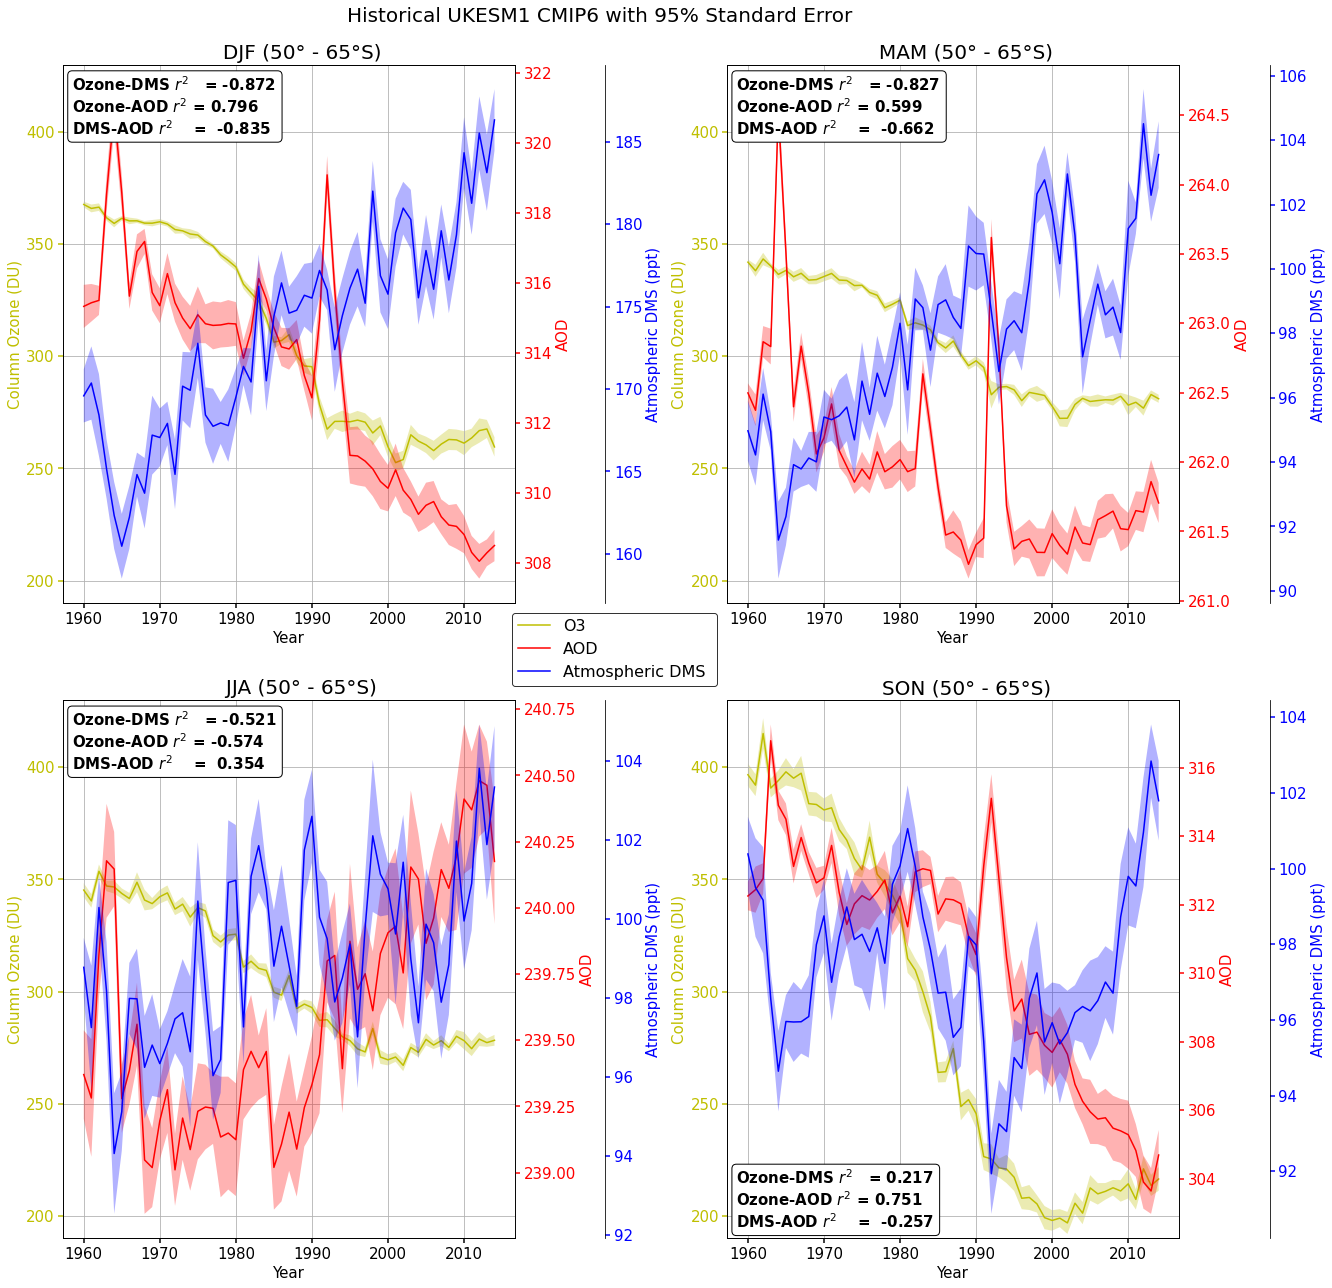

In [272]:
                                    ### AOD, DMS, OZONE LINE PLOT ###
Ozone_ens=np.load('/home/ybh10/CMIP6/UKESM1/Historic/Numpy_Array/Ozone_Region/Ensemble_mean/Ozone_Column_60_90S.npy')
DMS_ens=np.load('/home/ybh10/CMIP6/UKESM1/Historic/Numpy_Array/Ozone_Region/Ensemble_mean/DMS_60_90S.npy')
SO2_ens=np.load('/home/ybh10/CMIP6/UKESM1/Historic/Numpy_Array/Ozone_Region/Ensemble_mean/SO2_60_90S.npy')
Oceanic_DMS_ens=np.load('/home/ybh10/CMIP6/UKESM1/Historic/Numpy_Array/Ozone_Region/Ensemble_mean/Ocean_DMS_60_90S.npy')

# season_type='DJF'
# month_variable={}_var.format(season_type)
#   AOD_ozone=[]; DMS_ozone=[]; Oceanic_DMS_ozone=[]; Ozone_Column_ozone=[]; SO2_ozone=[]; Wind_ozone=[]


DJF_DMS=Oceanic_DMS_ens[:,:,0];MAM_DMS=Oceanic_DMS_ens[:,:,2];JJA_DMS=Oceanic_DMS_ens[:,:,1];SON_DMS=Oceanic_DMS_ens[:,:,3]

Var_DMS=[DJF_DMS,MAM_DMS,JJA_DMS,SON_DMS]
Var=[DJF_var,MAM_var,JJA_var,SON_var]
season_type=['DJF','MAM','JJA','SON']
# aa=DJF_SO2

#fig, axes = plt.subplots(figsize=(10,10))

fig = plt.figure(figsize=(20,20), edgecolor='w')
fig.subplots_adjust(hspace=0.18, wspace=0.47)
ax = fig.add_subplot(2,2,1); ax1 = fig.add_subplot(2,2,2); ax2 = fig.add_subplot(2,2,3);
ax3 = fig.add_subplot(2,2,4);
axes=[ax,ax1,ax2,ax3]
ad=0; dm=1; od=2; oz=3; r=4; s=5; w=6

for axe,month_variable,oc_dms,global_var,seas in zip(axes,Var,Var_DMS,season_global_var,season_type):
    axe.grid()
    year1=np.arange(1960,2015,1)
    par1 = axe.twinx()
    par2 = axe.twinx()
    par2.spines["right"].set_position(("axes", 1.2))
    par2.spines["right"].set_visible(True)

   # oceanic_dms=oc_dms
    #month_variable=Var
    DMS=np.nanmean(global_var[dm][:,110:165,19:32]*DMS_ppt,axis=(0,2,3))
    DMS_error=np.nanmean(global_var[dm][:,110:165,19:32]*DMS_ppt,axis=(2,3))
    DMS_Error=standard(DMS_error)
    
    Oceanic_DMS=np.nanmean(global_var[r][:,110:165,19:32],axis=(0,2,3))
    Oceanic_DMS_error=np.nanmean(global_var[r][:,110:165,19:32],axis=(2,3))
    Oceanic_DMS_Error=standard(Oceanic_DMS_error)

#     SO2=np.nanmean(month_variable[4]*SO2_ppt,axis=(0,2,3))
#     SO2_error=np.nanmean(month_variable[4]*SO2_ppt,axis=(2,3))
#     SO2_Error=standard(SO2_error)

    Ozone=np.nanmean(month_variable[oz][:,110:165],axis=(0,2,3))
    Ozone_error=np.nanmean(month_variable[oz][:,110:165],axis=(2,3))
    Ozone_Error=standard(Ozone_error)

    p3,=par2.plot(year1,DMS,'b-', label = "Atmospheric DMS ")
    par2.fill_between(year1, DMS_Error[0], DMS_Error[1],facecolor='b',alpha=0.3,)

    p2,=par1.plot(year1,Oceanic_DMS,'r-',label = "AOD")
    par1.fill_between(year1, Oceanic_DMS_Error[0], Oceanic_DMS_Error[1],facecolor='r',alpha=0.3,)

    p1,=axe.plot(year1,Ozone,'y-',label = "O3")
    axe.fill_between(year1, Ozone_Error[0], Ozone_Error[1],facecolor='y',alpha=0.3,)


    axe.set_xlabel("Year",fontsize=15)
    par2.set_ylabel("Atmospheric DMS (ppt)",fontsize=15)
    par1.set_ylabel("AOD",fontsize=15)
    # host.set_ylabel("Atmospheric DMS (ppt)",fontsize=15)
    # par1.set_ylabel("SO2 (ppt)",fontsize=15)
    axe.set_ylabel("Column Ozone (DU)",fontsize=15)



    axe.yaxis.label.set_color(p1.get_color())
    par1.yaxis.label.set_color(p2.get_color())
    par2.yaxis.label.set_color(p3.get_color())

    tkw = dict(size=5, width=1.5)
    axe.tick_params(axis='y', colors=p1.get_color(), **tkw,labelsize=15)
    par1.tick_params(axis='y', colors=p2.get_color(), **tkw,labelsize=15)
    par2.tick_params(axis='y', colors=p3.get_color(), **tkw,labelsize=15)
    axe.set_ylim(190,430)
    axe.tick_params(axis='x', **tkw,labelsize=15)
    lines = [p1, p2,p3]
#     if seas == 'SON' !=-1:
#         plt.text(1850,320,'Ozone-DMS $r^2$                = {}'.format(str(round(np.corrcoef((Ozone,DMS))[0,1],3))),color='black',fontsize=15,fontweight='bold')
#         plt.text(1850,310,'Ozone-Oceanic DMS{} $r^2$ = {}'.format('\u2082',str(round(np.corrcoef((Ozone,Oceanic_DMS))[0,1],3))),color='black',fontsize=15,fontweight='bold')
#         plt.text(1850,300,'DMS-Oceanic DMS{} $r^2$    =  {}'.format('\u2082',str(round(np.corrcoef((DMS,Oceanic_DMS))[0,1],3))),color='black',fontsize=15,fontweight='bold')
#     else:
#         plt.text(1850,420,'Ozone-DMS $r^2$                = {}'.format(str(round(np.corrcoef((Ozone,DMS))[0,1],3))),color='black',fontsize=15,fontweight='bold')
#         plt.text(1850,410,'Ozone-Oceanic DMS{} $r^2$ = {}'.format('\u2082',str(round(np.corrcoef((Ozone,Oceanic_DMS))[0,1],3))),color='black',fontsize=15,fontweight='bold')
#         plt.text(1850,400,'DMS-Oceanic DMS{} $r^2$    =  {}'.format('\u2082',str(round(np.corrcoef((DMS,Oceanic_DMS))[0,1],3))),color='black',fontsize=15,fontweight='bold')
    if seas == 'SON' !=-1:
        plt.text(0.02,0.019,
                 'Ozone-DMS $r^2$   = {} \n' 
                 'Ozone-AOD $r^2$ = {} \n'
                 'DMS-AOD $r^2$    =  {}'.format(str(round(np.corrcoef((Ozone,DMS))[0,1],3)),
                                                str(round(np.corrcoef((Ozone,Oceanic_DMS))[0,1],3)),
                                                str(round(np.corrcoef((DMS,Oceanic_DMS))[0,1],3)))
                 ,color='black',fontsize=15,fontweight='bold',bbox=dict(facecolor='white', edgecolor='black', boxstyle='round'),transform = axe.transAxes)
       # plt.text(1850,240,'Ozone-SO2{} $r^2$ = {}'.format('\u2082',str(round(np.corrcoef((Ozone,SO2))[0,1],3))),color='black',fontsize=15,fontweight='bold')
       # plt.text(1850,230,'DMS-SO2{} $r^2$  = {}'.format('\u2082',str(round(np.corrcoef((DMS,SO2))[0,1],3))),color='black',fontsize=15,fontweight='bold')
    else:
          plt.text(0.02,0.87,
                 'Ozone-DMS $r^2$   = {} \n' 
                 'Ozone-AOD $r^2$ = {} \n'
                 'DMS-AOD $r^2$    =  {}'.format(str(round(np.corrcoef((Ozone,DMS))[0,1],3)),
                                                str(round(np.corrcoef((Ozone,Oceanic_DMS))[0,1],3)),
                                                str(round(np.corrcoef((DMS,Oceanic_DMS))[0,1],3)))
                 ,color='black',fontsize=15,fontweight='bold',bbox=dict(facecolor='white', edgecolor='black', boxstyle='round'),transform = axe.transAxes)
        
    plt.title("     {} (50\N{DEGREE SIGN} - 65\N{DEGREE SIGN}S) ".format(seas),fontsize=20)
#    plt.title("     {} (90\N{DEGREE SIGN} - 60\N{DEGREE SIGN}S)".format(seas),fontsize=20)
    plt.suptitle("Historical UKESM1 CMIP6 with 95% Standard Error ", size=20)
    fig.subplots_adjust(top=0.94)
    if seas == 'DJF' !=-1:
        axe.legend(lines, [l.get_label() for l in lines],fontsize=16,bbox_to_anchor=(1.465, -0.003),edgecolor='black')
plt.show()
#plt.savefig("/home/ybh10/CMIP6/UKESM1/Historic/Plots/Lines/UKESM1_90-60S_Oceanic_DMS_DMS_fixed_Ozone.png",dpi=600,bbox_inches = 'tight')
#plt.savefig("/home/ybh10/CMIP6/UKESM1/Historic/Plots/Lines/1960/UKESM1_50_65S_AOD_DMS_fixed_Ozone.png",dpi=600,bbox_inches = 'tight')


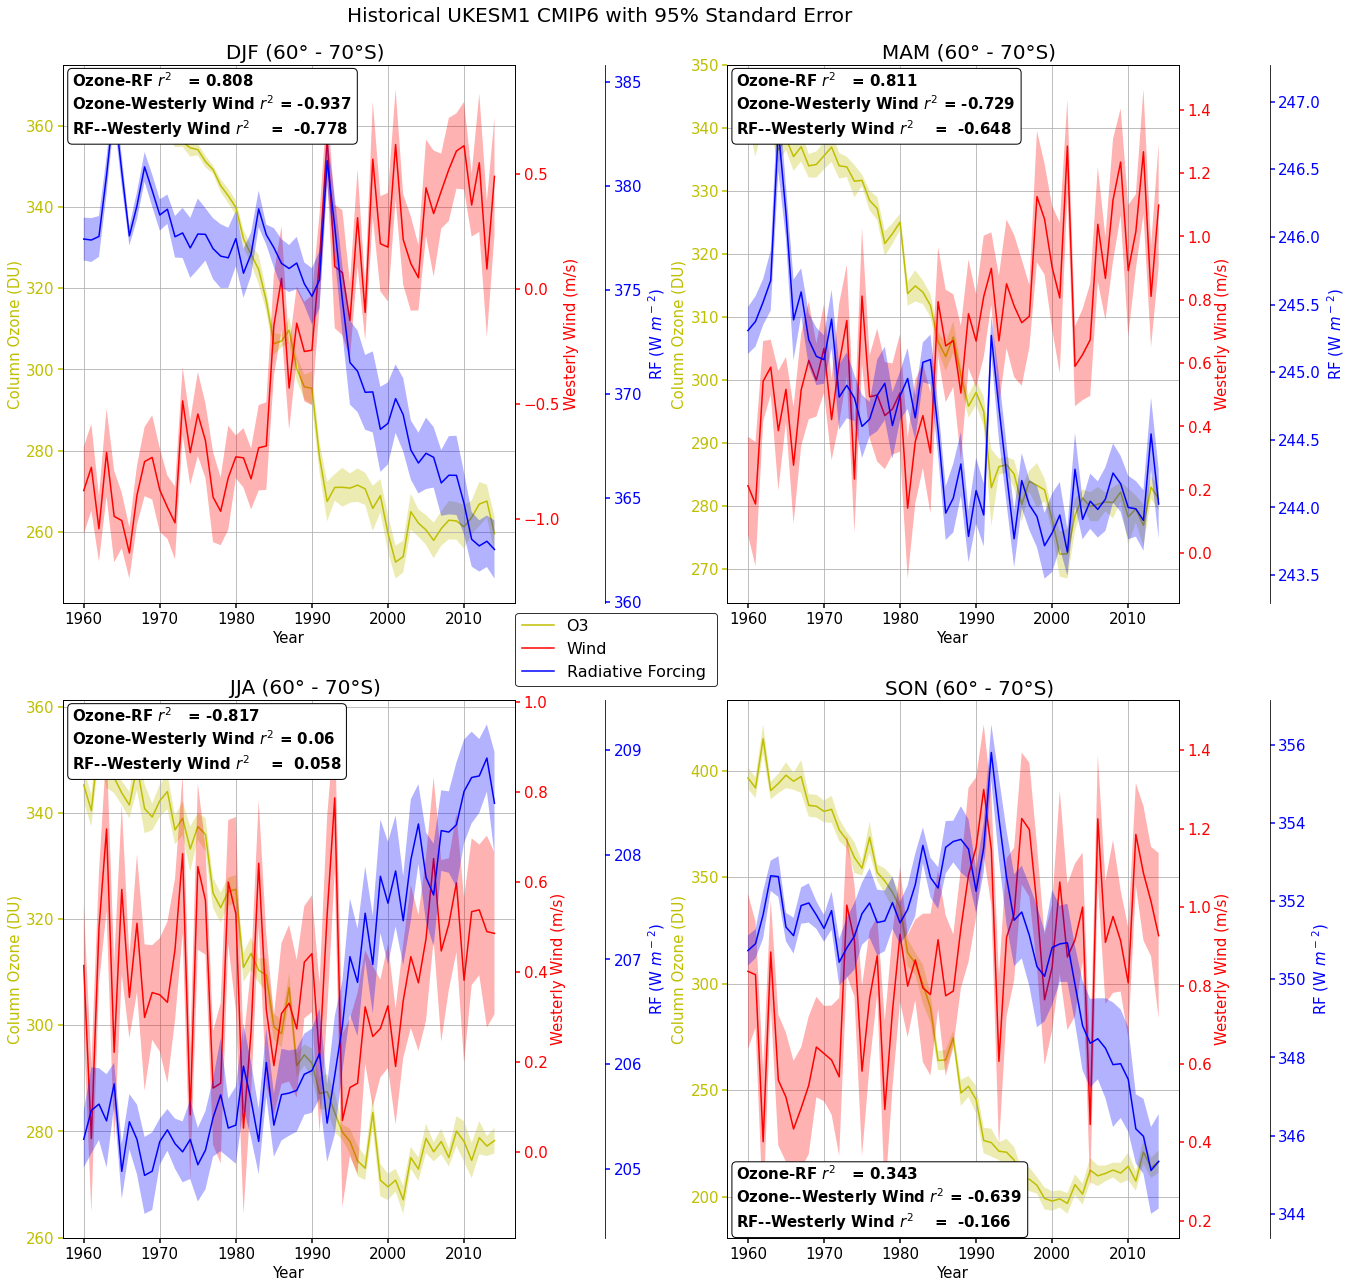

In [229]:
                                    ### AOD, DMS, OZONE LINE PLOT ###
Ozone_ens=np.load('/home/ybh10/CMIP6/UKESM1/Historic/Numpy_Array/Ozone_Region/Ensemble_mean/Ozone_Column_60_90S.npy')
DMS_ens=np.load('/home/ybh10/CMIP6/UKESM1/Historic/Numpy_Array/Ozone_Region/Ensemble_mean/DMS_60_90S.npy')
SO2_ens=np.load('/home/ybh10/CMIP6/UKESM1/Historic/Numpy_Array/Ozone_Region/Ensemble_mean/SO2_60_90S.npy')
Oceanic_DMS_ens=np.load('/home/ybh10/CMIP6/UKESM1/Historic/Numpy_Array/Ozone_Region/Ensemble_mean/Ocean_DMS_60_90S.npy')

# season_type='DJF'
# month_variable={}_var.format(season_type)
#   AOD_ozone=[]; DMS_ozone=[]; Oceanic_DMS_ozone=[]; Ozone_Column_ozone=[]; SO2_ozone=[]; Wind_ozone=[]


DJF_DMS=Oceanic_DMS_ens[:,:,0];MAM_DMS=Oceanic_DMS_ens[:,:,2];JJA_DMS=Oceanic_DMS_ens[:,:,1];SON_DMS=Oceanic_DMS_ens[:,:,3]

lat=lats[19:32]
Var_DMS=[DJF_DMS,MAM_DMS,JJA_DMS,SON_DMS]
Var=[DJF_var,MAM_var,JJA_var,SON_var]
season_type=['DJF','MAM','JJA','SON']
# aa=DJF_SO2
#fig, axes = plt.subplots(figsize=(10,10))

fig = plt.figure(figsize=(20,20), edgecolor='w')
fig.subplots_adjust(hspace=0.18, wspace=0.47)
ax = fig.add_subplot(2,2,1); ax1 = fig.add_subplot(2,2,2); ax2 = fig.add_subplot(2,2,3);
ax3 = fig.add_subplot(2,2,4);
axes=[ax,ax1,ax2,ax3]
ad=0; dm=1; od=2; oz=3; r=4; s=5; w=6

for axe,month_variable,oc_dms,global_var,seas in zip(axes,season_var,Var_DMS,season_global_var,season_type):
    axe.grid()
    year1=np.arange(1960,2015,1)
    par1 = axe.twinx()
    par2 = axe.twinx()
    par2.spines["right"].set_position(("axes", 1.2))
    par2.spines["right"].set_visible(True)

   # oceanic_dms=oc_dms
    #month_variable=Var
    DMS=np.nanmean(global_var[r][:,110:165,15:24],axis=(0,2,3))
    DMS_error=np.nanmean(global_var[r][:,110:165,15:24],axis=(2,3))
    DMS_Error=standard(DMS_error)
    
    Oceanic_DMS=np.nanmean(global_var[w][:,110:165,15:24],axis=(0,2,3))
    Oceanic_DMS_error=np.nanmean(global_var[w][:,110:165,15:24],axis=(2,3))
    Oceanic_DMS_Error=standard(Oceanic_DMS_error)

#     SO2=np.nanmean(month_variable[4]*SO2_ppt,axis=(0,2,3))
#     SO2_error=np.nanmean(month_variable[4]*SO2_ppt,axis=(2,3))
#     SO2_Error=standard(SO2_error)

    Ozone=np.nanmean(month_variable[oz][:,110:165],axis=(0,2,3))
    Ozone_error=np.nanmean(month_variable[oz][:,110:165],axis=(2,3))
    Ozone_Error=standard(Ozone_error)

    p3,=par2.plot(year1,DMS,'b-', label = "Radiative Forcing ")
    par2.fill_between(year1, DMS_Error[0], DMS_Error[1],facecolor='b',alpha=0.3,)

    p2,=par1.plot(year1,Oceanic_DMS,'r-',label = "Wind")
    par1.fill_between(year1, Oceanic_DMS_Error[0], Oceanic_DMS_Error[1],facecolor='r',alpha=0.3,)

    p1,=axe.plot(year1,Ozone,'y-',label = "O3")
    axe.fill_between(year1, Ozone_Error[0], Ozone_Error[1],facecolor='y',alpha=0.3,)


    axe.set_xlabel("Year",fontsize=15)
    par2.set_ylabel("RF (W $m^-$$^2$)",fontsize=15)
    par1.set_ylabel("Westerly Wind (m/s)",fontsize=15)
    # host.set_ylabel("Atmospheric DMS (ppt)",fontsize=15)
    # par1.set_ylabel("SO2 (ppt)",fontsize=15)
    axe.set_ylabel("Column Ozone (DU)",fontsize=15)
#    par1.set_ylabel("RF (W $m^-$$^2$)",fontsize=15)
    # host.set_ylabel("Oceanic DMS (nM)",fontsize=15)
  #  axe.set_ylabel("Westerly Wind (m $s^-$$^1$)",fontsize=15)




    axe.yaxis.label.set_color(p1.get_color())
    par1.yaxis.label.set_color(p2.get_color())
    par2.yaxis.label.set_color(p3.get_color())

    tkw = dict(size=5, width=1.5)
    axe.tick_params(axis='y', colors=p1.get_color(), **tkw,labelsize=15)
    par1.tick_params(axis='y', colors=p2.get_color(), **tkw,labelsize=15)
    par2.tick_params(axis='y', colors=p3.get_color(), **tkw,labelsize=15)
    axe.tick_params(axis='x', **tkw,labelsize=15)
    lines = [p1, p2,p3]
    if seas == 'SON' !=-1:
        plt.text(0.02,0.019,
                 'Ozone-RF $r^2$   = {} \n' 
                 'Ozone--Westerly Wind $r^2$ = {} \n'
                 'RF--Westerly Wind $r^2$    =  {}'.format(str(round(np.corrcoef((Ozone,DMS))[0,1],3)),
                                                str(round(np.corrcoef((Ozone,Oceanic_DMS))[0,1],3)),
                                                str(round(np.corrcoef((DMS,Oceanic_DMS))[0,1],3)))
                 ,color='black',fontsize=15,fontweight='bold',bbox=dict(facecolor='white', edgecolor='black', boxstyle='round'),transform = axe.transAxes)
       # plt.text(1850,240,'Ozone-SO2{} $r^2$ = {}'.format('\u2082',str(round(np.corrcoef((Ozone,SO2))[0,1],3))),color='black',fontsize=15,fontweight='bold')
       # plt.text(1850,230,'DMS-SO2{} $r^2$  = {}'.format('\u2082',str(round(np.corrcoef((DMS,SO2))[0,1],3))),color='black',fontsize=15,fontweight='bold')
    else:
          plt.text(0.02,0.87,
                 'Ozone-RF $r^2$   = {} \n' 
                 'Ozone-Westerly Wind $r^2$ = {} \n'
                 'RF--Westerly Wind $r^2$    =  {}'.format(str(round(np.corrcoef((Ozone,DMS))[0,1],3)),
                                                str(round(np.corrcoef((Ozone,Oceanic_DMS))[0,1],3)),
                                                str(round(np.corrcoef((DMS,Oceanic_DMS))[0,1],3)))
                 ,color='black',fontsize=15,fontweight='bold',bbox=dict(facecolor='white', edgecolor='black', boxstyle='round'),transform = axe.transAxes)
        
        
    plt.title("     {} (60\N{DEGREE SIGN} - 70\N{DEGREE SIGN}S)".format(seas),fontsize=20)
    plt.suptitle("Historical UKESM1 CMIP6 with 95% Standard Error ", size=20)
    fig.subplots_adjust(top=0.94)
    if seas == 'DJF' !=-1:
        axe.legend(lines, [l.get_label() for l in lines],fontsize=16,bbox_to_anchor=(1.465, -0.003),edgecolor='black')
plt.show()
#plt.savefig("/home/ybh10/CMIP6/UKESM1/Historic/Plots/Lines/1960/UKESM1_50-65S_Wind_DMS_fixed_Ozone.png",dpi=600,bbox_inches = 'tight')
#plt.savefig("/home/ybh10/CMIP6/UKESM1/Historic/Plots/Lines/1960/UKESM1_60-70S_Wind_RF_fixed_Ozone.png",dpi=600,bbox_inches = 'tight')


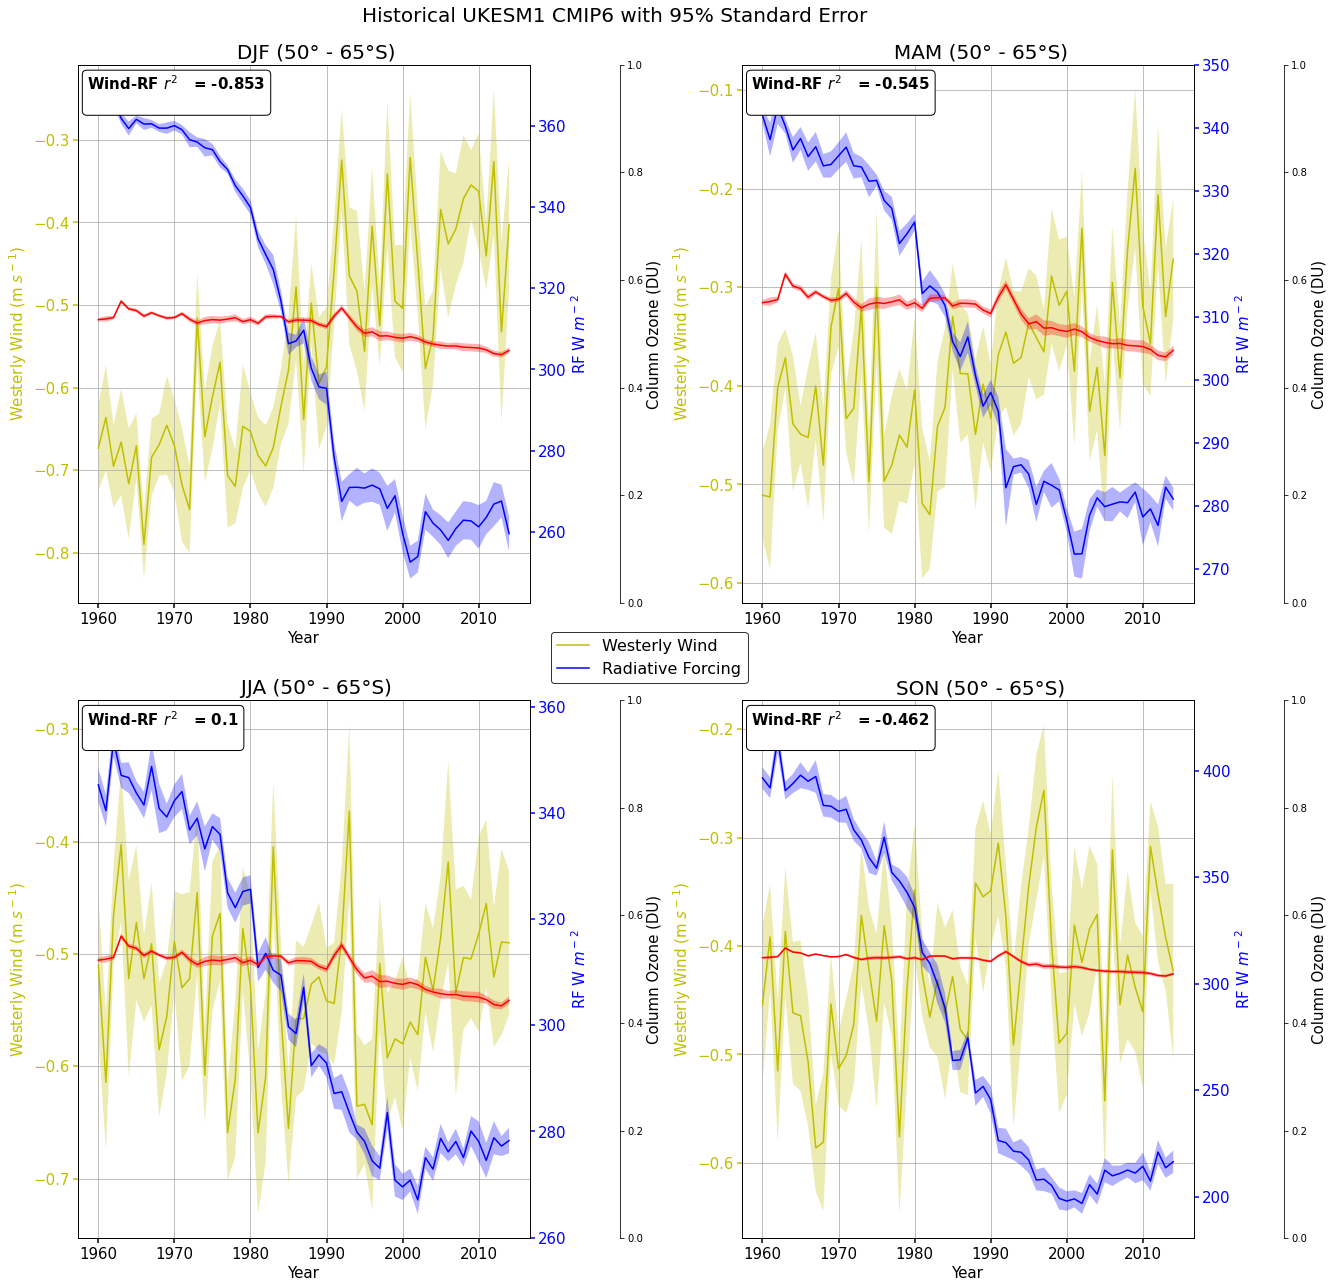

In [219]:
                                    ### AOD, DMS, OZONE LINE PLOT ###
Ozone_ens=np.load('/home/ybh10/CMIP6/UKESM1/Historic/Numpy_Array/Ozone_Region/Ensemble_mean/Ozone_Column_60_90S.npy')
DMS_ens=np.load('/home/ybh10/CMIP6/UKESM1/Historic/Numpy_Array/Ozone_Region/Ensemble_mean/DMS_60_90S.npy')
SO2_ens=np.load('/home/ybh10/CMIP6/UKESM1/Historic/Numpy_Array/Ozone_Region/Ensemble_mean/SO2_60_90S.npy')
Oceanic_DMS_ens=np.load('/home/ybh10/CMIP6/UKESM1/Historic/Numpy_Array/Ozone_Region/Ensemble_mean/Ocean_DMS_60_90S.npy')

# season_type='DJF'
# month_variable={}_var.format(season_type)
#   AOD_ozone=[]; DMS_ozone=[]; Oceanic_DMS_ozone=[]; Ozone_Column_ozone=[]; SO2_ozone=[]; Wind_ozone=[]


DJF_DMS=Oceanic_DMS_ens[:,:,0];MAM_DMS=Oceanic_DMS_ens[:,:,2];JJA_DMS=Oceanic_DMS_ens[:,:,1];SON_DMS=Oceanic_DMS_ens[:,:,3]

Var_DMS=[DJF_DMS,MAM_DMS,JJA_DMS,SON_DMS]
Var=[DJF_var,MAM_var,JJA_var,SON_var]
season_type=['DJF','MAM','JJA','SON']
# aa=DJF_SO2

#fig, axes = plt.subplots(figsize=(10,10))

fig = plt.figure(figsize=(20,20), edgecolor='w')
fig.subplots_adjust(hspace=0.18, wspace=0.47)
ax = fig.add_subplot(2,2,1); ax1 = fig.add_subplot(2,2,2); ax2 = fig.add_subplot(2,2,3);
ax3 = fig.add_subplot(2,2,4);
axes=[ax,ax1,ax2,ax3]
ad=0; dm=1; od=2; oz=3; r=4; s=5; w=6

for axe,month_variable,oc_dms,global_var,seas in zip(axes,Var,Var_DMS,season_global_var,season_type):
    axe.grid()
    year1=np.arange(1960,2015,1)
    par1 = axe.twinx()
 #   par2 = axe.twinx()
 #   par2.spines["right"].set_position(("axes", 1.2))
#     par2.spines["right"].set_visible(True)

   # oceanic_dms=oc_dms
    #month_variable=Var
    DMS=np.nanmean(global_var[r][:,110:165,15:24],axis=(0,2,3))
    DMS_error=np.nanmean(global_var[r][:,110:165,15:24],axis=(2,3))
    DMS_Error=standard(DMS_error)
    
#     DMS=np.nanmean(global_var[od][:,110:165,84:113]* 1000000,axis=(0,2,3))
#     DMS_error=np.nanmean(global_var[od][:,110:165,84:113]* 1000000,axis=(2,3))
#     DMS_Error=standard(DMS_error)

#     SO2=np.nanmean(month_variable[4]*SO2_ppt,axis=(0,2,3))
#     SO2_error=np.nanmean(month_variable[4]*SO2_ppt,axis=(2,3))
#     SO2_Error=standard(SO2_error)

    Ozone=np.nanmean(global_var[w][:,110:165,15:24],axis=(0,2,3))
    Ozone_error=np.nanmean(global_var[w][:,110:165,15:24],axis=(2,3))
    Ozone_Error=standard(Ozone_error)

    p3,=par1.plot(year1,DMS,'b-', label = "Radiative Forcing  ")
    par1.fill_between(year1, DMS_Error[0], DMS_Error[1],facecolor='b',alpha=0.3,)

  #  p2,=par1.plot(year1,Oceanic_DMS,'r-',label = "AOD")
#    par1.fill_between(year1, Oceanic_DMS_Error[0], Oceanic_DMS_Error[1],facecolor='r',alpha=0.3,)

    p1,=axe.plot(year1,Ozone,'y-',label = "Westerly Wind")
    axe.fill_between(year1, Ozone_Error[0], Ozone_Error[1],facecolor='y',alpha=0.3,)


    axe.set_xlabel("Year",fontsize=15)
#     par2.set_ylabel("Atmospheric DMS (ppt)",fontsize=15)
    par1.set_ylabel("RF W $m^-$$^2$",fontsize=15)
    # host.set_ylabel("Oceanic DMS (nM)",fontsize=15)
    # par1.set_ylabel("SO2 (ppt)",fontsize=15)
    axe.set_ylabel("Westerly Wind (m $s^-$$^1$)",fontsize=15)
   # axe.set_ylabel("W $m^-$$^2$",fontsize=15)



    axe.yaxis.label.set_color(p1.get_color())
    par1.yaxis.label.set_color(p3.get_color())
#     par2.yaxis.label.set_color(p3.get_color())

    tkw = dict(size=5, width=1.5)
    axe.tick_params(axis='y', colors=p1.get_color(), **tkw,labelsize=15)
    par1.tick_params(axis='y', colors=p3.get_color(), **tkw,labelsize=15)
#     par2.tick_params(axis='y', colors=p3.get_color(), **tkw,labelsize=15)
    axe.tick_params(axis='x', **tkw,labelsize=15)
    lines = [p1,p3]
#     if seas == 'SON' !=-1:
#         plt.text(1850,320,'Ozone-DMS $r^2$                = {}'.format(str(round(np.corrcoef((Ozone,DMS))[0,1],3))),color='black',fontsize=15,fontweight='bold')
#         plt.text(1850,310,'Ozone-Oceanic DMS{} $r^2$ = {}'.format('\u2082',str(round(np.corrcoef((Ozone,Oceanic_DMS))[0,1],3))),color='black',fontsize=15,fontweight='bold')
#         plt.text(1850,300,'DMS-Oceanic DMS{} $r^2$    =  {}'.format('\u2082',str(round(np.corrcoef((DMS,Oceanic_DMS))[0,1],3))),color='black',fontsize=15,fontweight='bold')
#     else:
#         plt.text(1850,420,'Ozone-DMS $r^2$                = {}'.format(str(round(np.corrcoef((Ozone,DMS))[0,1],3))),color='black',fontsize=15,fontweight='bold')
#         plt.text(1850,410,'Ozone-Oceanic DMS{} $r^2$ = {}'.format('\u2082',str(round(np.corrcoef((Ozone,Oceanic_DMS))[0,1],3))),color='black',fontsize=15,fontweight='bold')
#         plt.text(1850,400,'DMS-Oceanic DMS{} $r^2$    =  {}'.format('\u2082',str(round(np.corrcoef((DMS,Oceanic_DMS))[0,1],3))),color='black',fontsize=15,fontweight='bold')
    plt.text(0.02,0.92,
                 'Wind-DMS $r^2$   = {} \n' 
                 .format(str(round(np.corrcoef((Ozone,DMS))[0,1],3)))                            
                 ,color='black',fontsize=15,fontweight='bold',bbox=dict(facecolor='white', edgecolor='black', boxstyle='round'),transform = axe.transAxes)
        
    plt.title("     {} (50\N{DEGREE SIGN} - 65\N{DEGREE SIGN}S) ".format(seas),fontsize=20)
#    plt.title("     {} (90\N{DEGREE SIGN} - 60\N{DEGREE SIGN}S)".format(seas),fontsize=20)
    plt.suptitle("Historical UKESM1 CMIP6 with 95% Standard Error ", size=20)
    fig.subplots_adjust(top=0.94)
    if seas == 'DJF' !=-1:
        axe.legend(lines, [l.get_label() for l in lines],fontsize=16,bbox_to_anchor=(1.5, -0.039),edgecolor='black')
plt.show()
#plt.savefig("/home/ybh10/CMIP6/UKESM1/Historic/Plots/Lines/UKESM1_90-60S_Oceanic_DMS_DMS_fixed_Ozone.png",dpi=600,bbox_inches = 'tight')
#plt.savefig("/home/ybh10/CMIP6/UKESM1/Historic/Plots/Lines/1960/UKESM1_50_65S_DMS_Wind_TWO_VARIABLES.png",dpi=600,bbox_inches = 'tight')
#plt.savefig("/home/ybh10/CMIP6/UKESM1/Historic/Plots/Lines/1960/UKESM1_60_70S_ODMS_RF_TWO_VARIABLE.png",dpi=600,bbox_inches = 'tight')


# **CORRELATION COEFFICIENT DIAGRAMS**

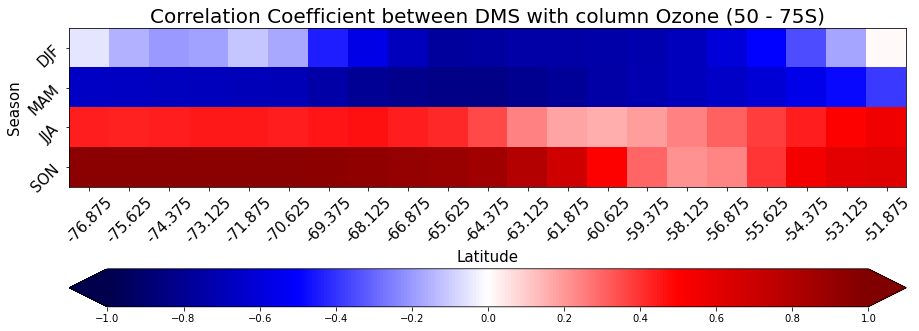

<ipython-input-105-cbe7896fa7c7>:11: RuntimeWarning: Mean of empty slice
  vari=np.nanmean(var[i],axis=0)


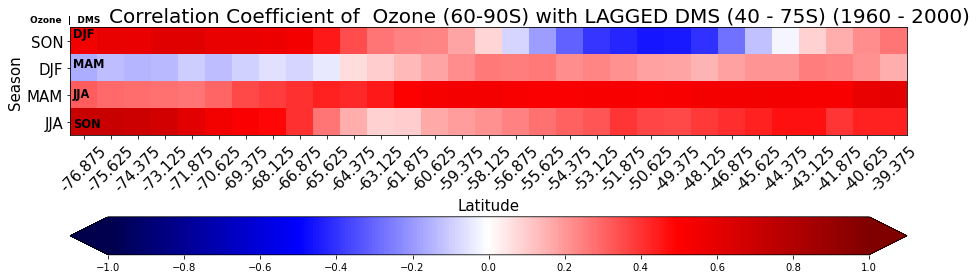

In [105]:
files=[]
#AOD_ozone=[]; DMS_ozone=[]; Oceanic_DMS_ozone=[]; Ozone_Column_ozone=[]; SO2_ozone=[]; Wind_ozone=[]
var=[]d
Regi=sorted(glob.glob("/nesi/project/niwa02757/ybh10/CMIP6/UKESM1/Historic/Numpy_Array/Ozone_Region/50_65/*"))
for f in (Regi):
    reg_filey=np.load(f)
    var.append(reg_filey)
#test=[]
SO=[]
for i in range(0,5):
    vari=np.nanmean(var[i],axis=0)
    SO.append(vari)
    
wind=SO[4]
ad=0; dm=1; od=2; oz=3; r=4; s=5; w=6
ODMS=[DJF_global_var[od],MAM_global_var[od],JJA_global_var[od],SON_global_var[od]]
ODMS=np.array(ODMS)
ODMS_so=[ODMS[:,:,:,46],ODMS[:,:,:,51],ODMS[:,:,:,56],ODMS[:,:,:,61],ODMS[:,:,:,65],ODMS[:,:,:,69],ODMS[:,:,:,72],
         ODMS[:,:,:,76],ODMS[:,:,:,79],ODMS[:,:,:,82],ODMS[:,:,:,85],ODMS[:,:,:,88],ODMS[:,:,:,91],ODMS[:,:,:,93],
         ODMS[:,:,:,96],ODMS[:,:,:,98],ODMS[:,:,:,101],ODMS[:,:,:,103],ODMS[:,:,:,105],ODMS[:,:,:,107],ODMS[:,:,:,109],
         ODMS[:,:,:,111],ODMS[:,:,:,113],ODMS[:,:,:,115],ODMS[:,:,:,117],ODMS[:,:,:,119],ODMS[:,:,:,120],ODMS[:,:,:,122],
         ODMS[:,:,:,124],ODMS[:,:,:,126],ODMS[:,:,:,127]]

## FOR Oceanic DMS 
# ODMS_so=np.array(ODMS_so)
# odms=ODMS_so.transpose(2,3,1,0,4)
# ODMS_50_mean=np.nanmean(odms[:,110:151,:],axis=(4))

        #Ozone=[DJF_var[3],MAM_var[3],JJA_var[3],SON_var[3]]
# Ozone=[DJF_global_var[od],MAM_global_var[od],JJA_global_var[od],SON_global_var[od]]

# Ozone=np.nanmean(Ozone,axis=1)
# Ozoney=Ozone.transpose(1,0,2,3)
# Ozone_mean_2d=np.nanmean(Ozoney,axis=(2,3))
# #Ozone_mean_2d=np.nanmean(Ozone_mean,axis=(2))

#############################################################################################
## FOR OZONE 
Wind_corr=(season_var[3][oz],season_var[0][oz],season_var[1][oz],season_var[2][oz])
Ozone=np.nanmean(Wind_corr,axis=1)
Ozone=np.array(Wind_corr)
Ozoney=Ozone.transpose(1,2,0,3,4)
#Windy=Wind.transpose(1,0,2,3) 
Ozone_mean=areaweight(Ozoney,lats[0:24])[:,110:150]
#(Ozoney[:,110:150,:,:],axis=(3,4))
#############################################################################################

#Wind_corr=[SON_global_var[oz],DJF_global_var[oz],MAM_global_var[oz],JJA_global_var[oz]]
# Wind=np.nanmean(Wind_corr,axis=1)
# Windyy=np.array(Wind_corr)
# Windy=Windyy.transpose(1,2,0,3,4)
# #Windy=Wind.transpose(1,0,2,3) 
# Wind_50_mean=np.nanmean(Windy[:,110:150,:,10:41],axis=(4))

#DMS_corr=[SON_global_var[dm],DJF_global_var[dm],MAM_global_var[dm],JJA_global_var[dm]]
DMS_corr=[DJF_global_var[dm],MAM_global_var[dm],JJA_global_var[dm],SON_global_var[dm]]
#season_global_var
DMS=np.nanmean(DMS_corr,axis=1)
DMSyy=np.array(DMS_corr)
#DMSy=DMS_corr.transpose(1,0,2,3,4)
DMSy=DMSyy.transpose(1,2,0,3,4)

DMS_mean_2d=np.nanmean(DMSy[:,110:150,:,10:41],axis=(4)) # (13,55,4,31)

a=np.empty((4,31)); a[:]=np.nan
#for e in range(0,13):
for t in range(0,40):
    for i in range(0,4):
        for x in range(0,31):
         #   b[t,i,x]=(np.corrcoef(DMS_mean_2d[:,t,i,x],Wind_50_mean[:,t,i,x]))[1,0]
            a[i,x]=(np.corrcoef(DMS_mean_2d[:,t,i,x],Ozone_mean[:,t,i]))[1,0]
            
lat=np.array([-76.875, -75.625, -74.375, -73.125, -71.875, -70.625, -69.375, -68.125,
       -66.875, -65.625, -64.375, -63.125, -61.875, -60.625, -59.375, -58.125,
       -56.875, -55.625, -54.375, -53.125, -51.875, -50.625, -49.375, -48.125,
       -46.875, -45.625, -44.375, -43.125, -41.875, -40.625, -39.375])

aa=np.nanmean(a,axis=0)


orig_cmap = matplotlib.cm.seismic
shifted_cmap_modis = shiftedColorMap(orig_cmap, start=0, midpoint=0.5, stop=1, name='shifted')
## MEAN OZONE (165,4) AT 60-90 CORRELATED WITH DMS AT 55 - 65 (165,4,12)
fig = plt.figure(figsize=(15,10), edgecolor='w')
ax = fig.add_subplot(1,1,1)
#ax.set_xticklabels((lat),fontsize=10)
ax.set_xticks(np.arange(0,32,1))
ax.set_xticklabels(lat,fontsize=15,rotation=45)
ax.set_xlabel("Latitude",fontsize=15)
seas=['SON','DJF','MAM', 'JJA']
ax.set_yticks((0,1,2,3))
ax.set_yticklabels((seas),fontsize=15)
ax.set_ylabel("Season",fontsize=15)

plt.text(-0.4,3.2,
                 'DJF    \n \nMAM    \n\nJJA    \n\nSON'
                                      
                 ,color='black',fontsize=11.4,fontweight='bold')

plt.text(-2,-0.7,
                 'Ozone  |  DMS'
                          ,color='black',fontsize=9,fontweight='bold')
clevs=np.arange(-1,1.1,0.1)

cs=ax.imshow(a,cmap='seismic',vmin=clevs[0],vmax=clevs[-1])

cbar=fig.colorbar(cs,extend='both',orientation='horizontal',ticks=np.arange(-1,1.1,0.2))
plt.title('                Correlation Coefficient of  Ozone (60-90S) with LAGGED DMS (40 - 75S) (1960 - 2000)',fontsize=20)
#plt.show()
#plt.savefig("/home/ybh10/CMIP6/UKESM1/Historic/Plots/Zonal/1960_2000/Lagged/UKESM1_corrcoef_40-75S_Ozone_vs_LAGGED_DMS_2000.png",dpi=600,bbox_inches = 'tight')


<ipython-input-484-2e08c0ae9f47>:11: RuntimeWarning: Mean of empty slice
  vari=np.nanmean(var[i],axis=0)


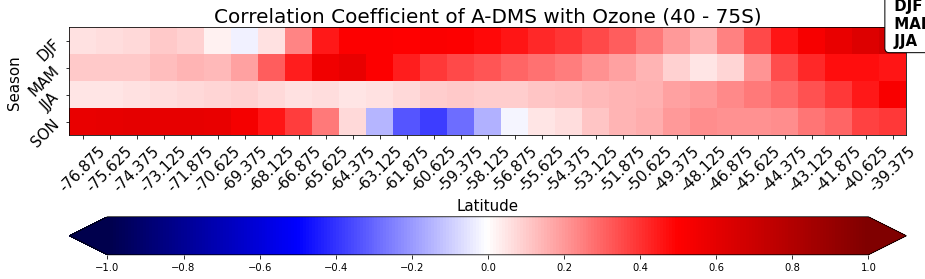

In [484]:
files=[]
#AOD_ozone=[]; DMS_ozone=[]; Oceanic_DMS_ozone=[]; Ozone_Column_ozone=[]; SO2_ozone=[]; Wind_ozone=[]
var=[]
Regi=sorted(glob.glob("/nesi/project/niwa02757/ybh10/CMIP6/UKESM1/Historic/Numpy_Array/Ozone_Region/50_65/*"))
for f in (Regi):
    reg_filey=np.load(f)
    var.append(reg_filey)
#test=[]
SO=[]
for i in range(0,5):
    vari=np.nanmean(var[i],axis=0)
    SO.append(vari)
    
wind=SO[4]
ad=0; dm=1; od=2; oz=3; r=4; s=5; w=6

#Ozone=[DJF_var[3],MAM_var[3],JJA_var[3],SON_var[3]]
Ozone=[DJF_global_var[oz],MAM_global_var[oz],JJA_global_var[oz],SON_global_var[oz]]

Ozone=np.nanmean(Ozone,axis=1)
Ozoney=Ozone.transpose(1,0,2,3)
Ozone_mean_2d=np.nanmean(Ozoney,axis=(2,3))
#Ozone_mean_2d=np.nanmean(Ozone_mean,axis=(2))

Wind_corr=[DJF_global_var[w],MAM_global_var[w],JJA_global_var[w],SON_global_var[w]]
Wind=np.nanmean(Wind_corr,axis=1)
Windyy=np.array(Wind_corr)
Windy=Windyy.transpose(1,2,0,3,4)
#Windy=Wind.transpose(1,0,2,3)
Wind_50_mean=np.nanmean(Windy[:,110:165,:,10:41],axis=(4))

# Wind_corr=[DJF_global_var[od],MAM_global_var[od],JJA_global_var[od],SON_global_var[od]]
# Wind=np.nanmean(Wind_corr,axis=1)
# Windyy=np.array(Wind_corr)
# Windy=Windyy.transpose(1,2,0,3,4)
# #Windy=Wind.transpose(1,0,2,3)
# Wind_50_mean=np.nanmean(Windy[:,110:165,:,10:41],axis=(4)

DMS_corr=[DJF_global_var[dm],MAM_global_var[dm],JJA_global_var[dm],SON_global_var[dm]]
#season_global_var
DMS=np.nanmean(DMS_corr,axis=1)
DMSyy=np.array(DMS_corr)
#DMSy=DMS_corr.transpose(1,0,2,3,4)
DMSy=DMSyy.transpose(1,2,0,3,4)

DMS_mean_2d=np.nanmean(DMSy[:,110:165,:,10:41],axis=(4))

# wind=SO[4]
# Wind_50_mean=np.nanmean(wind,axis=3)

# DMS_50=SO[1]
# DMS_50_mean=np.nanmean(DMS_50,axis=3)
a=np.empty((4,31)); a[:]=np.nan
for i in range(0,4):
    for x in range(0,31):
        a[i,x]=np.corrcoef(DMS_mean_2d[:,:,i,x],Wind_50_mean[:,:,i,x])[1,0]
        #test.append(b)
#         #a[i,:]=b
# lat=np.array([-64.375, -63.125, -61.875, -60.625, -59.375, -58.125, -56.875, -55.625,
#        -54.375, -53.125, -51.875, -50.625])
# lat=np.array([-76.875, -75.625, -74.375, -73.125, -71.875, -70.625, -69.375, -68.125,
#        -66.875, -65.625, -64.375, -63.125, -61.875, -60.625, -59.375, -58.125,
#        -56.875, -55.625, -54.375, -53.125, -51.875])
lat=np.array([-76.875, -75.625, -74.375, -73.125, -71.875, -70.625, -69.375, -68.125,
       -66.875, -65.625, -64.375, -63.125, -61.875, -60.625, -59.375, -58.125,
       -56.875, -55.625, -54.375, -53.125, -51.875, -50.625, -49.375, -48.125,
       -46.875, -45.625, -44.375, -43.125, -41.875, -40.625, -39.375])

orig_cmap = matplotlib.cm.seismic
shifted_cmap_modis = shiftedColorMap(orig_cmap, start=0, midpoint=0.5, stop=1, name='shifted')
## MEAN OZONE (165,4) AT 60-90 CORRELATED WITH DMS AT 55 - 65 (165,4,12)
fig = plt.figure(figsize=(15,10), edgecolor='w')
ax = fig.add_subplot(1,1,1)

#ax.set_xticklabels((lat),fontsize=10)
ax.set_xticks(np.arange(0,32,1))
ax.set_xticklabels(lat,fontsize=15,rotation=45)
ax.set_xlabel("Latitude",fontsize=15)
seas=['DJF','MAM', 'JJA', 'SON']
ax.set_yticks((0,1,2,3))
ax.set_yticklabels((seas),fontsize=15,rotation=45)
ax.set_ylabel("Season",fontsize=15)


        
clevs=np.arange(-1,1.1,0.1)

cs=ax.imshow(a,cmap='seismic',vmin=clevs[0],vmax=clevs[-1])

cbar=fig.colorbar(cs,extend='both',orientation='horizontal',ticks=np.arange(-1,1.1,0.2))
plt.title('Correlation Coefficient of A-DMS with Ozone (40 - 75S)',fontsize=20)
plt.show()
#plt.savefig("/home/ybh10/CMIP6/UKESM1/Historic/Plots/Zonal/UKESM1_corrcoef_40-75S_DMS_vs_Ozone.png",dpi=600,bbox_inches = 'tight')


## **Zonal Mean**

In [103]:
########### TO CALCULATE RELATIVE AND ABSOLUTE DIFFERENCES 
old_data=np.nanmean(DJF_global_var[dm_ssa][:,90:111],axis=1)
dats=[]
vari=np.empty((13, 165, 144, 192)); vari[:]=np.nan
for t in range(0,13):
    for i in range(0,len(DJF_global_var[dm_ssa][0])):
        for la in range(0,len(DJF_global_var[dm_ssa][0][0])):
                for lo in range(0,len(DJF_global_var[dm_ssa][0][0][0])):
                    vari[t,i,la,lo]=((DJF_global_var[dm_ssa][t,i,la,lo]-old_data[t,la,lo]))
data_djf=np.nanmean(vari,axis=0)                    
np.save('/home/ybh10/CMIP6/UKESM1/Historic/Numpy_Array/Global/Difference/1940_1960_mean/Abs_Diff/DJF/DMS_SSA_minus_Abs_Diff.npy',data_djf)

old_data=np.nanmean(SON_global_var[dm_ssa][:,90:111],axis=1)
dats=[]
vari=np.empty((13, 165, 144, 192)); vari[:]=np.nan
for t in range(0,13):
    for i in range(0,len(SON_global_var[dm_ssa][0])):
        for la in range(0,len(SON_global_var[dm_ssa][0][0])):
                for lo in range(0,len(SON_global_var[dm_ssa][0][0][0])):
                    vari[t,i,la,lo]=((SON_global_var[dm_ssa][t,i,la,lo]-old_data[t,la,lo]))
data_son=np.nanmean(vari,axis=0) 
np.save('/home/ybh10/CMIP6/UKESM1/Historic/Numpy_Array/Global/Difference/1940_1960_mean/Rel_Diff/SON/DMS_SSA_minus_Abs_Diff.npy',data_son)



########### TO CALCULATE RELATIVE AND ABSOLUTE DIFFERENCES 

saves=['ODMS','Wind']
num=[od,w]
for n,save in zip(num,saves):
    old_data=np.nanmean(DJF_global_var[n][:,90:111],axis=1)
    dats=[]
    vari=np.empty((13, 165, np.shape(DJF_global_var[n])[2], np.shape(DJF_global_var[n])[3])); vari[:]=np.nan
    for t in range(0,13):
        for i in range(0,len(DJF_global_var[n][0])):
            for la in range(0,len(DJF_global_var[n][0][0])):
                    for lo in range(0,len(DJF_global_var[n][0][0][0])):
                        vari[t,i,la,lo]=((DJF_global_var[n][t,i,la,lo]/old_data[t,la,lo])-1)*100
    data_djf=np.nanmean(vari,axis=0)                    
    np.save('/home/ybh10/CMIP6/UKESM1/Historic/Numpy_Array/Global/Difference/1940_1960_mean/Rel_Diff/DJF/{}.npy'.format(save),data_djf)

    old_data=np.nanmean(SON_global_var[n][:,90:111],axis=1)
    dats=[]
    vari=np.empty((13, 165, np.shape(DJF_global_var[n])[2], np.shape(DJF_global_var[n])[3])); vari[:]=np.nan
    for t in range(0,13):
        for i in range(0,len(SON_global_var[n][0])):
            for la in range(0,len(SON_global_var[n][0][0])):
                    for lo in range(0,len(SON_global_var[n][0][0][0])):
                        vari[t,i,la,lo]=((SON_global_var[n][t,i,la,lo]/old_data[t,la,lo])-1)*100
    data_son=np.nanmean(vari,axis=0) 
    np.save('/home/ybh10/CMIP6/UKESM1/Historic/Numpy_Array/Global/Difference/1940_1960_mean/Rel_Diff/SON/{}.npy'.format(save),data_son)

<ipython-input-293-6beca0a2ed82>:125: UserWarning: The following kwargs were not used by contour: 'label'
  cs = axe.contourf(Dates,latty,datas,clev_test,cmap=color,label=unit,extend='both')
<ipython-input-293-6beca0a2ed82>:120: UserWarning: The following kwargs were not used by contour: 'label'
  cs = axe.contourf(Dates,latty,datas*1e9,clevs_SSA,cmap=ssa_shift,label=unit,extend='both')


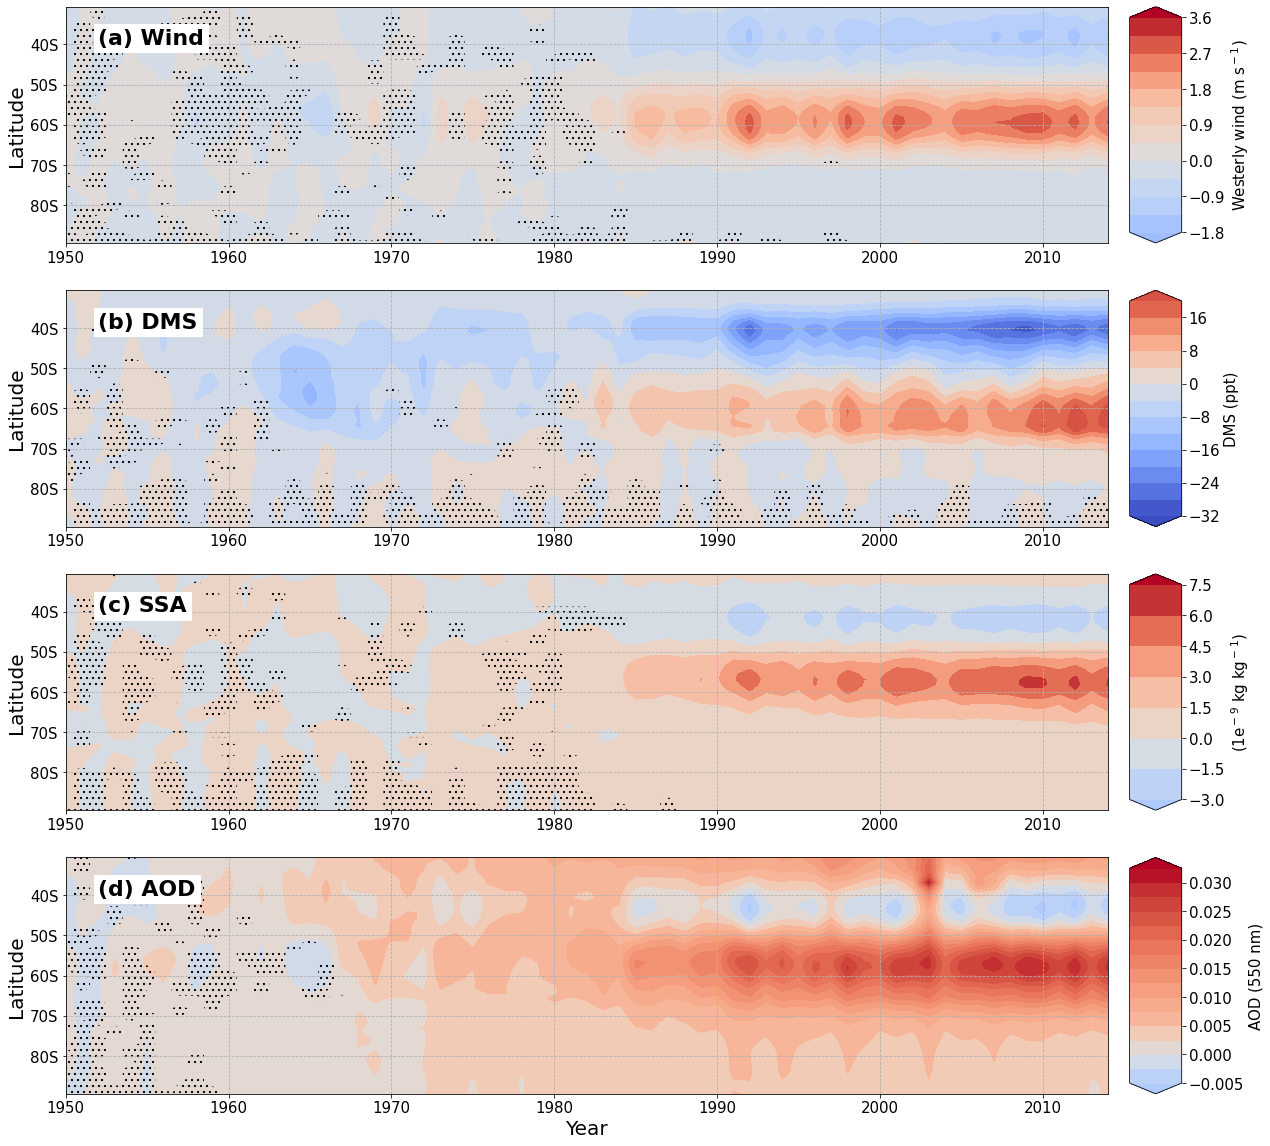

In [293]:
# -*- coding: utf-8 -*-
"""
Created on Wed Jun 10 13:34:01 2020

@author: ybh10
"""
import glob
from netCDF4 import Dataset
import matplotlib.pyplot as plt
import numpy as np
import matplotlib as mpl
from mpl_toolkits.basemap import Basemap
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from mpl_toolkits.axes_grid1 import make_axes_locatable

# shifted_cmap_Ozone = shiftedColorMap(orig_cmap, start=0, midpoint=0.7, stop=.6, name='shifted')
# shifted_cmap_H2SO4MMR = shiftedColorMap(orig_cmap, start=0.5, midpoint=0.5, stop=1, name='shifted')
# shifted_cmap_Wind = shiftedColorMap(orig_cmap, start=0.35, midpoint=0.52, stop=1, name='shifted')
# shifted_cmap_RSDS = shiftedColorMap(orig_cmap, start=0.2, midpoint=0.6, stop=.7, name='shifted')
# shifted_cmap_DMS = shiftedColorMap(orig_cmap, start=0, midpoint=0.5, stop=1, name='shifted') 
# shifted_cmap_RSS = shiftedColorMap(orig_cmap, start=0.4, midpoint=0.3, stop=1, name='shifted')
# shifted_cmap_AOD = shiftedColorMap(orig_cmap, start=0.5, midpoint=0.5, stop=1, name='shifted') 
# shifted_cmap_ODMS = shiftedColorMap(orig_cmap, start=.2,midpoint=0.45, stop=.75, name='shifted')
# shifted_cmap_RSDO = shiftedColorMap(orig_cmap, start=0.45,midpoint=0.18, stop=.9, name='shifted')
# shifted_cmap_RSDSCS = shiftedColorMap(orig_cmap, start=0.2, midpoint=0.5, stop=.7, name='shifted')
# shifted_cmap_SO2 = shiftedColorMap(orig_cmap, start=0, midpoint=0.5, stop=1, name='shifted') 
# shifted_cmap_SSAMMR = shiftedColorMap(orig_cmap, start=0.45, midpoint=0.25, stop=1, name='shifted')

# month='DJF'
# #file ='/home/ybh10/CMIP6/UKESM1/Historic/Numpy_Array/Global/Difference/Rel_Diff/'
# #file ='/home/ybh10/CMIP6/UKESM1/Historic/Numpy_Array/Global/Difference/1940_1960_mean/Rel_Diff/{}/'.format(month)
# file ='/home/ybh10/CMIP6/UKESM1/Historic/Numpy_Array/Global/Difference/1940_1960_mean/Abs_Diff/{}/'.format(month)

# file_dot ='/home/ybh10/CMIP6/UKESM1/Historic/Numpy_Array/Global/Difference/1940_1960_mean/Statistical/{}/'.format(month)
# file_clev ='/home/ybh10/CMIP6/UKESM1/Historic/Numpy_Array/Global/Difference/1940_1960_mean/Rel_Diff/{}/Clevs/'.format(month)

# saves=['AOD','DMS','ODMS','Ozone','RSDO','RSDS','RSS','SO2','SSAMMR','H2SO4MMR','RSDSCS','SSA_H2SO4','Wind']
measurement=['Wind','DMS','SSA','AOD']
# data_percentage=[]
# data_dot=[]
# data_clev=[]
# data_shift=[]
# for i in range(0,len(measurement)):
#         a=np.load('{}{}.npy'.format(file,measurement[i]))
#         b=np.load('{}{}.npy'.format(file_dot,measurement[i]))
#         c=np.load('{}/Clevs/{}_clev.npy'.format(file,measurement[i])) #put these clevs in dictionary along with each measurement and dot.
#         #s=np.load('{}{}_shift.npy'.format(file_clev,measurement[i]), allow_pickle=True) # put these clevs in dictionary along with each measurement and dot.
#         data_percentage.append(a)
#         data_dot.append(b)
#         data_clev.append(c)
# #        data_shift.append(s)
# shift_month=[DJF_shift_abs,SON_shift_abs]
# data_shift=shifty(measurement,saves,month,shift_month)

olaty=np.nanmean(olat[0:138],axis=1)
lat_sh=lats[0:48]
fig = plt.figure(figsize=(20,20), edgecolor='w')
n=4
ax1 = fig.add_subplot(n,1,1); ax2 = fig.add_subplot(n,1,2); ax3 = fig.add_subplot(n,1,3);ax4 = fig.add_subplot(n,1,4)#;ax5 = fig.add_subplot(n,1,5);ax6 = fig.add_subplot(n,1,6)
axes=[ax1,ax2,ax3,ax4,ax5,ax6]
#plt.subplots_adjust(hspace=0.05, wspace=0.15)
clevs_ozone=np.arange(-240,40,20) # Ozone
clevs_so2=np.arange(-3,3+.3,.3)
clevs_rsdscs=np.arange(-4,4+.5,.5)
clevs_rsdo=np.arange(-12,12+1,1)

clevs_h2so4=np.arange(-.5e11,1e11,0.1e10)
clevs_rsds=np.arange(-10,4+2,2) #DJF
clevs_rsds=np.arange(-14,6+2,2) # SON
clevs_wind=np.arange(-1.8,3.8,.45)# Wind
clevs_dms=np.arange(-32,24,4) # DMS
clevs_aod=np.arange(-0.005,0.035,0.0025) # AOD
clevs_odms=np.arange(-1,0.65,0.1) # DJF
clevs_odms=np.arange(-.5,0.35,0.05) # SON

#clevs3=np.arange(-15,6,1.5) # DMS in so?
clevs_aod=np.arange(-0.005,0.035,0.0025) # AOD
clevy=[clevs_wind,clevs_dms,clevs_so2,clevs_rsds,clevs_h2so4,clevs_h2so4]

orig_cmap = matplotlib.cm.coolwarm
shifted_cmap_modis = shiftedColorMap(orig_cmap, start=0, midpoint=0.7, stop=.6, name='shifted')
shifted_cmap_aod = shiftedColorMap(orig_cmap, start=0.35, midpoint=0.3, stop=1, name='shifted')
shifted_cmap_dms = shiftedColorMap(orig_cmap, start=0, midpoint=0.57, stop=0.9, name='shifted')
shifted_cmap_wind = shiftedColorMap(orig_cmap, start=0.3, midpoint=0.62, stop=1, name='shifted')
shifted_cmap_so2 = shiftedColorMap(orig_cmap, start=0, midpoint=0.5, stop=1, name='shifted')
shifted_cmap_ssa = shiftedColorMap(orig_cmap, start=0.35, midpoint=0.3, stop=1, name='shifted')
shifted_cmap_H2SO4MMR = shiftedColorMap(orig_cmap, start=0.55, midpoint=0.5, stop=1, name='shifted')
shifted_cmap_RSDS = shiftedColorMap(orig_cmap, start=0.2, midpoint=0.6, stop=.7, name='shifted')
shifted_cmap_RSDO = shiftedColorMap(orig_cmap, start=0, midpoint=0.5, stop=1, name='shifted')
shifted_cmap_odms = shiftedColorMap(orig_cmap, start=0, midpoint=0.55, stop=.85, name='shifted')

shift_map=[shifted_cmap_wind,shifted_cmap_dms,shifted_cmap_so2,shifted_cmap_RSDS,shifted_cmap_ssa,shifted_cmap_H2SO4MMR]
latitude=[lat_sh,lat_sh,lat_sh,lat_sh,lat_sh,lat_sh]
units=['Westerly wind (m s$^-$$^1$)','DMS (ppt)', '(1e$^-$$^9$ kg kg$^-$$^1$)','AOD (550 nm)']
number=['a','b','c','d']
clevs_SSA=np.arange(-3e-9,7.5e-9+1.5e-9,1.5e-9)*1e9
ssa_shift=shifted_cmap_ssa = shiftedColorMap(orig_cmap, start=0.35, midpoint=0.55, stop=1, name='shifted')
# 'Column Ozone (DU)',  'AOD (550 nm), W $m^-$$^2$'
for clev_test, axe,text,unit,variable_check,color,dotty,latty,uni in zip(data_clev,axes,measurement,units,data_percentage,data_shift,data_dot,latitude,number):
    if len(latty) == 48:
        datas=np.nanmean(variable_check[:,0:48],axis=2)
        dot=np.nanmean(dotty[100:165,0:48],axis=(2)) 

    else: 
        datas=np.nanmean(variable_check[:,0:138],axis=2)
        dot=np.nanmean(dotty[100:165,0:138],axis=(2)) 
       
    datas=np.array(datas)
    datas=datas.transpose(1,0)
    Dates=np.arange(1950,2015,1); lat_sh=lats[0:48]
    axe.grid(linestyle='--',alpha=1)
    axe.set_ylabel('Latitude',fontsize=20)
    ax4.set_xlabel('Year',fontsize=20)

    y_labels = ['90S','80S','70S','60S','50S','40S']
    y=np.arange(-90,-30,10)
    x=np.arange(1950,2015,10)    
    if text == 'SSA' !=-1:
        cs = axe.contourf(Dates,latty,datas*1e9,clevs_SSA,cmap=ssa_shift,label=unit,extend='both')
    else:
        if text == 'SSA_H2SO4' !=-1:
            cs = axe.contourf(Dates,latty,datas,cmap=color,label=unit,extend='both')
        else:
            cs = axe.contourf(Dates,latty,datas,clev_test,cmap=color,label=unit,extend='both')


    axe.set_xticks(x); axe.set_xticklabels(x,fontsize=15)
    axe.set_yticks(y); axe.set_yticklabels(y_labels,fontsize=15)
    
    if text == 'Ozone' !=-1:
        t=axe.text(1952,-40,'{} - SON'.format(text),color='black',fontsize=22,fontweight='bold')
    else:    
        t=axe.text(1952,-40,'({}) {}'.format(uni,text),color='black',fontsize=22,fontweight='bold')

    t.set_bbox(dict(facecolor='white', edgecolor='white'))
    divider = make_axes_locatable(axe)
    cax = divider.append_axes('right', size='5%', pad=0.3)
    cbar=fig.colorbar(cs,cax=cax,extend='both')
    cbar.ax.set_ylabel(unit,fontsize=15)
    
    cbar.ax.tick_params(labelsize=15)
    
    dot=np.array(dot)
    dot=dot.transpose(1,0)
    [m,n] = np.where(dot==1)
    z1 = np.zeros(dot.shape)
    z1[m,n]=99


    cs3 = axe.contourf(Dates,latty, z1, 1, hatches=['', '..'], alpha=0)
#plt.suptitle('Zonal Mean: anomalous change from Pre-ODC climatology (1940 - 1960)',y=0.9,fontsize=20)
plt.savefig("/home/ybh10/CMIP6/UKESM1/Historic/Plots/PAPER/Fig_1_Zonal_Plot_{}.png".format(month),dpi=600,bbox_inches = 'tight')

#plt.show()
#plt.show()


In [8]:
# dats=[]
# vari=np.empty((13, 165, 144, 192)); vari[:]=np.nan
# for t in range(0,13):
#     for i in range(0,len(DJF_global_var[dm_ssa][0])):
#         for la in range(0,len(DJF_global_var[dm_ssa][0][0])):
#                 for lo in range(0,len(DJF_global_var[dm_ssa][0][0][0])):
#                     vari[t,i,la,lo]=DJF_global_var[dm_ssa][t,i,la,lo]-old_data[t,la,lo]
# data=np.nanmean(vari,axis=0)                    
# np.save('/home/ybh10/CMIP6/UKESM1/Historic/Numpy_Array/Global/Difference/1940_1960_mean/Rel_Diff/DJF/DMS_SSA_Abs_Diff.npy',data)

# old_data=np.nanmean(SON_global_var[dm_ssa][:,90:111],axis=1)
# dats=[]
# vari=np.empty((13, 165, 144, 192)); vari[:]=np.nan
# for t in range(0,13):
#     for i in range(0,len(DJF_global_var[dm_ssa][0])):
#         for la in range(0,len(DJF_global_var[dm_ssa][0][0])):
#                 for lo in range(0,len(DJF_global_var[dm_ssa][0][0][0])):
#                     vari[t,i,la,lo]=SON_global_var[dm_ssa][t,i,la,lo]-old_data[t,la,lo]
# data=np.nanmean(vari,axis=0)                    
# np.save('/home/ybh10/CMIP6/UKESM1/Historic/Numpy_Array/Global/Difference/1940_1960_mean/Rel_Diff/SON/DMS_SSA_Abs_Diff.npy',data)6/UKESM1/Historic/Plots/Zonal/Zonal/Zonal_Difference_5_Variables_cmap.png",dpi=600,bbox_inches = 'tight')


In [10]:
# ad=0; dm=1; od=2; oz=3; r=4; s=5; w=6; sw=7; sdsw=8
numbers=[oz,ad,dm]#,r] # ad chosen for ODMS due to the array having a 'one' at the start - easy to put in loop

# FOR Oceanic DMS 
hi=np.empty((1, 13, 165, 360)); hi[:]=np.nan
ODMS=[SON_global_var[od]]
ODMS=np.array(ODMS)*ODMS_nm
ODMS_so=[hi,hi,hi,hi,ODMS[:,:,:,0],ODMS[:,:,:,9],ODMS[:,:,:,19],ODMS[:,:,:,26],ODMS[:,:,:,34],ODMS[:,:,:,40],ODMS[:,:,:,46],
         ODMS[:,:,:,51],ODMS[:,:,:,56],ODMS[:,:,:,61],ODMS[:,:,:,65],ODMS[:,:,:,69],ODMS[:,:,:,72],ODMS[:,:,:,76],
         ODMS[:,:,:,79],ODMS[:,:,:,82],ODMS[:,:,:,85],ODMS[:,:,:,88],ODMS[:,:,:,91],ODMS[:,:,:,93],ODMS[:,:,:,96],
         ODMS[:,:,:,98],ODMS[:,:,:,101],ODMS[:,:,:,103],ODMS[:,:,:,105],ODMS[:,:,:,107],ODMS[:,:,:,109],ODMS[:,:,:,111],
         ODMS[:,:,:,113],ODMS[:,:,:,115],ODMS[:,:,:,117],ODMS[:,:,:,119],ODMS[:,:,:,120],ODMS[:,:,:,122],ODMS[:,:,:,124],
         ODMS[:,:,:,126],ODMS[:,:,:,127],ODMS[:,:,:,128],ODMS[:,:,:,130],ODMS[:,:,:,132],ODMS[:,:,:,133],ODMS[:,:,:,135],
        ODMS[:,:,:,137],ODMS[:,:,:,138]]

ODMS_so=np.array(ODMS_so)
odms=ODMS_so.transpose(1,2,3,0,4)

large_data=[SON_global_var,odms,SON_global_var]

# maybe=[]
# #for e in range(0,13):
# vari=np.empty((13, 165, 144,192)); vari[:]=np.nan
# for t in range(0,vari.shape[0]):
#     for i in range(0,vari.shape[1]):
#         for l in range(0,144):
#             for x in range(0,vari.shape[3]):
#               #  print('hi')
#                 vari[t,i,l,x]=(MAM_global_var[dm][t,i,l,x]/MAM_global_var[SSA][t,i,l,x])
                    
# print(np.shape(vari))
# print(np.nanmean(vari))
# np.save('/home/ybh10/CMIP6/UKESM1/Historic/Numpy_Array/Global/MAM/Ensamble/DMS_SSA.npy',vari)
# vari=np.empty((13, 165, 144,192)); vari[:]=np.nan
# for t in range(0,vari.shape[0]):
#     for i in range(0,vari.shape[1]):
#         for l in range(0,144):
#             for x in range(0,vari.shape[3]):
#               #  print('hi')
#                 vari[t,i,l,x]=(JJA_global_var[dm][t,i,l,x]/JJA_global_var[SSA][t,i,l,x])
# print(np.shape(vari))
# print(np.nanmean(vari))                
# np.save('/home/ybh10/CMIP6/UKESM1/Historic/Numpy_Array/Global/JJA/Ensamble/DMS_SSA.npy',vari)                
# #     see=np.nanmean(vari,axis=(0,3))
#     maybe.append(see)
# maybe=np.array(maybe)
# maybe=maybe.transpose(0,2,1)

<ipython-input-10-542c8bc65fa1>:16: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  ODMS_so=np.array(ODMS_so)


ValueError: could not broadcast input array from shape (13,165,360) into shape (1)

#### plt.plot(sea_dms[:,50]-sea_dms[:,20])
plt.savefig("/home/ybh10/CMIP6/UKESM1/Historic/Plots/Lines/1960/%_Diff_ODMS_2000_minus_1970.png",dpi=600,bbox_inches = 'tight')


In [ ]:
# -*- coding: utf-8 -*-
"""
Created on Wed Jun 10 13:34:01 2020

@author: ybh10
"""
import glob
from netCDF4 import Dataset
import matplotlib.pyplot as plt
import numpy as np
import matplotlib as mpl
from mpl_toolkits.basemap import Basemap
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from mpl_toolkits.axes_grid1 import make_axes_locatable

#ideas: Try and get two variables on one plot.
# 1) get the climatological mean, and do zonal difference from the mean/STD across time 
# 2) Grab the % difference from 1 for 2 variables, then minus/do something with the difference to see how they relate?

## For Useful shortcuts ###
##   [DJF_global_var[w],MAM_global_var[w],JJA_global_var[w],SON_global_var[w]]

# Ozone_zonal=np.nanmean(SON_global_var[oz][:,100:165,0:48,:],axis=(0,3))
# Wind_zonal=np.nanmean(DJF_global_var[w][:,100:165,0:48,:],axis=(0,3))
# DMS_zonal=np.nanmean(DJF_global_var[dm][:,100:165,0:48,:],axis=(0,3))*DMS_ppt
#AOD_zonal=np.nanmean(DJF_global_var[ad][:,100:165,0:48,:],axis=(0,3))
# RF_zonal=np.nanmean(DJF_global_var[r][:,100:165,0:48,:],axis=(0,3))
#variable=[Ozone_zonal,Wind_zonal,DMS_zonal,AOD_zonal]#,RF_zonal]
##########################################
olaty=np.nanmean(olat[0:138],axis=1)
ad=0; dm=1; od=2; oz=3;  sw=4; r=5; RSDO=6; RSDS=7; RSS=8;  s=9;SSA_H2SO4=10;SSA=11; seaice=12;SO4MMR=13; 
RSDSCS=14; w=15
month='DJF'

#file ='/home/ybh10/CMIP6/UKESM1/Historic/Numpy_Array/Global/Difference/Rel_Diff/'
file ='/home/ybh10/CMIP6/UKESM1/Historic/Numpy_Array/Global/Difference/1940_1960_mean/Rel_Diff/{}/'.format(month)

measurement=['Ozone','RSDO','Wind','ODMS','DMS','AOD']
maybe_percentage=[]
for i in range(0,len(measurement)):
        a=np.load('{}{}.npy'.format(file,measurement[i]))
        b=np.nanmean(a[:,0:48],axis=2)
        maybe_percentage.append(b)
# clevs2=np.arange(-32,24,4) # DMS
# clevs3=np.arange(-0.005,0.035,0.0025) # AOD
maybe_percentage=np.array(maybe_percentage)
maybe_percentage=maybe_percentage.transpose(0,2,1)
    
#units=['Column Ozone (DU)','Westerly Wind (m $s^-$$^1$)','DMS ppt']#, 'AOD (550 nm)']#,'RF-CS (W $m^-$$^2$)']

texts=['Column Ozone - SON','RSDO: Surface SW in Seawater - SON ','Oceanic DMS - SON','Westerly Wind - SON','DMS - SON','Sea Ice Area - SON']#,'RF - DJF']
units=['%','%','%','Westerly Wind (m $s^-$$^1$)','%', '%']#,'RF-CS (W $m^-$$^2$)']



fig = plt.figure(figsize=(20,20), edgecolor='w')
n=6
ax1 = fig.add_subplot(n,1,1); ax2 = fig.add_subplot(n,1,2); ax3 = fig.add_subplot(n,1,3);ax4 = fig.add_subplot(n,1,4);ax5 = fig.add_subplot(n,1,5);ax6 = fig.add_subplot(n,1,6)
axes=[ax1,ax2,ax3,ax4,]
#plt.subplots_adjust(hspace=0.05, wspace=0.15)
clevs=np.arange(-60,5+5,5) # Ozone
#clevs1=np.arange(-10,60,10)# RSDO
clevs1=np.arange(-1,2.5,.2)# RSDSCS
#clevs1=np.arange(-4,15+1,1)# RSS
clevs2=np.arange(-10,12+1,2) # ODMS
clevs3=np.arange(-40,10+5,5) # DMS
clevs4=np.arange(-5,50,5) # AOD
clevs5=np.arange(-.5,2,.25)# Wind
Dates=np.arange(1950,2015,1); lat_sh=lats[0:48]


clevy=[clevs,clevs1,clevs2,clevs5,clevs3,clevs4]
orig_cmap = matplotlib.cm.seismic
shifted_cmap_wind = shiftedColorMap(orig_cmap, start=0.35, midpoint=0.52, stop=1, name='shifted')
shifted_cmap_modis = shiftedColorMap(orig_cmap, start=0, midpoint=0.7, stop=.6, name='shifted')
shifted_cmap_aod = shiftedColorMap(orig_cmap, start=0.35, midpoint=0.25, stop=1, name='shifted')
shifted_cmap_odms = shiftedColorMap(orig_cmap, start=.3,midpoint=0.67, stop=.9, name='shifted')
#shifted_cmap_rf = shiftedColorMap(orig_cmap, start=0.3, midpoint=.27, stop=.9, name='shifted') # RSS
shifted_cmap_dms = shiftedColorMap(orig_cmap, start=0, midpoint=0.55, stop=.65, name='shifted')
shifted_cmap_rf = shiftedColorMap(orig_cmap, start=.3, midpoint=.35, stop=1, name='shifted') #   RSDO
latitude=[lat_sh,olaty,olaty,lat_sh,lat_sh,lat_sh]
shift_map=[shifted_cmap_modis,shifted_cmap_rf,shifted_cmap_odms,shifted_cmap_wind,shifted_cmap_dms,shifted_cmap_aod]
for clev_test, axe,text,unit,variable_check,color,latty in zip(clevy,axes,measurement,units,maybe_percentage,shift_map,latitude):
    
    axe.grid(linestyle='--',alpha=1)
    axe.set_ylabel('Latitude',fontsize=20)
    y_labels = ['90S','80S','70S','60S','50S','40S']
    y=np.arange(-90,-30,10)
    x=np.arange(1950,2015,10)    
    cs = axe.contourf(Dates,latty,variable_check,clev_test,cmap=color,extend='both')
    axe.set_xticks(x); axe.set_xticklabels(x,fontsize=15)
    axe.set_yticks(y); axe.set_yticklabels(y_labels,fontsize=15)
    t=axe.text(1955,-40,'{} - {}'.format(text,month),color='black',fontsize=22,fontweight='bold')
    t.set_bbox(dict(facecolor='white', edgecolor='white'))
    divider = make_axes_locatable(axe)
    cax = divider.append_axes('right', size='5%', pad=0.3)
    cbar=fig.colorbar(cs,cax=cax,extend='both')
    cbar.ax.set_ylabel(unit,fontsize=15)
    cbar.ax.tick_params(labelsize=15)
plt.suptitle('Zonal Mean Yearly % Difference of 1950-2014 minus climatology (1850 - 1940)',y=0.9,fontsize=20)

# plt.show()
plt.show()
#plt.savefig("/home/ybh10/CMIP6/UKESM1/Historic/Plots/Zonal/Zonal/Zonal_%_Difference_ODMS_5_Variables_SON_RSDO.png",dpi=600,bbox_inches = 'tight')
gc.collect()

In [6]:
######################### THIS CELL SORTS OUT THE STATISTICAL DOTS ON MAPS AND SAVES THEM #########
# def find_diffs(run10,run1):
#     t = stats.ttest_ind(run10,run1); tt=t[1]
#     diff = np.where(tt>0.05, 1, 0) #1 indicates it is not statistically significant; 0 indicates it is
#     return diff
# ad=0; cdnc=1;dm=2; dm_ssa=3;o_seaice=4; od=5; oz=6;  sw=7; r=8; RSDO=9; RSDS=10; RSS=11;
# so2=12;SSA_H2SO4=13;SSA=14; seaice=15;SO4MMR=16; RSDSCS=17; w=18
# numbers=[ad,dm,od,oz,RSDO,RSDS,RSS,so2,SSA,seaice,SO4MMR,RSDSCS,dm_ssa,SSA_H2SO4,w]


# djf_large_data=[DJF_global_var,DJF_global_var,DJF_global_var,DJF_global_var,DJF_global_var,DJF_global_var,
#             DJF_global_var,DJF_global_var,DJF_global_var,DJF_global_var,DJF_global_var,DJF_global_var,DJF_global_var,DJF_global_var,DJF_global_var]
# #large_data=[SON_global_var,SON_global_var,SON_global_var,SON_global_var,SON_global_var]
# son_large_data=[SON_global_var,SON_global_var,SON_global_var,SON_global_var,SON_global_var,SON_global_var,
#            SON_global_var,SON_global_var,SON_global_var,SON_global_var,SON_global_var,SON_global_var,SON_global_var,SON_global_var,SON_global_var]
# olaty=np.nanmean(olat[0:138],axis=1)
# ocean_sw=djf_large_data[1][RSDO]
# #sea=np.nanmean(ocean_sw[:,100:165],axis=(0))
# old_sea=np.nanmean(ocean_sw[:,90:111,:,:],axis=(1)) # mean on 1940-1960
# sea_sw=find_diffs(old_sea,ocean_sw)
# #sea_sw=sea_sw.transpose(1,0)

# ocean_dms=djf_large_data[2][od]
# sea=np.nanmean(ocean_dms[:,100:165],axis=(0))
# #sea=sea.transpose(1,0)
# old_sea=np.nanmean(ocean_dms[:,90:111,:,:],axis=(1))
# #sea_dms=sea_dms.transpose(1,0)
# #sea_dms=sea_dms*ODMS_ppm
# sea_dms=find_diffs(old_sea,ocean_dms)

#################### STATISTICAL DOT CODE ##################
# numbers=[cheg]

# month='SON'
# if month == 'DJF':
#     print(month)
#     print('should be DJF')
#     large_data=[DJF_global_var]
# #     large_data=[DJF_global_var,DJF_global_var,DJF_global_var,DJF_global_var,DJF_global_var,DJF_global_var,DJF_global_var,DJF_global_var,
# #            DJF_global_var,DJF_global_var,DJF_global_var,DJF_global_var,DJF_global_var]
# else:
#     print(month)
#     print('should be SON')
#     large_data=[SON_global_var]

# R2_Abs_Diff=[]
# # for e in range(0,13):
# maybe=[]
# for num,datas in zip(numbers,large_data):
#     print(num)
#     if num == RSDO !=-1:
#         maybe.append(sea_sw)
#     else:
#         if num == od !=-1:
#             maybe.append(sea_dms)
#         else:
#             vari=datas[num]
#             meaned_data=np.nanmean(vari[:,90:111,:,:],axis=(1))
#             model_data=find_diffs(meaned_data,vari)
#           #  end
#             maybe.append(model_data)
#           #  see=see.transpose(1,0)      
    
# # gc.collect()



# #numbers=[ad,dm,od,oz,RSDO,RSDS,RSS,so2,SSA,seaice,SO4MMR,RSDSCS,dm_ssa,SSA_H2SO4,w]

# file = '/home/ybh10/CMIP6/UKESM1/Historic/Numpy_Array/Global/Difference/1940_1960_mean/Statistical'
# #saves=['AOD','DMS','ODMS','Ozone','RSDO','RSDS','RSS','SO2','SSAMMR','Sea_Ice','H2SO4MMR','RSDSCS','DMS_SSA','SSA_H2SO4','Wind']
# saves=['CHEG']
# os.chdir(file+'/{}/'.format(month))
# for i,names in zip(range(0,len(maybe)),saves):
#     np.save(('{}.npy'.format(names)),(maybe[i]))
    



In [7]:
############# Good clev and colour map info 


            
        

# clevs_SON_Ozone=np.arange(-60,5+5,5)
# clevs_SON_ODMS=np.arange(-30,30+5,5)
# clevs_SON_Wind=np.arange(-.5,2,.25)
# clevs_SON_DMS=np.arange(-40,40+5,5)
# clevs_SON_AOD=np.arange(0,50+5,5)
# clevs_SON_SO2=np.arange(-40,40+5,5)
# clevs_SON_H2SO4MMR=np.arange(0,50+5,5)
# clevs_SON_SSAMMR=np.arange(-5,75+5,5)
# clevs_SON_SSA_H2SO4=np.arange(-60,60+5,5)
# clevs_SON_RSS=np.arange(-5,40+2,2)
# clevs_SON_RSDO=np.arange(-5,90+5,5)
# clevs_SON_RSDS=np.arange(-10,6,2)
# clevs_SON_RSDSCS=np.arange(-4,3+1,1)
# clevs_SON_Sea_Ice=np.arange(0,80+5,5)

# orig_cmap = matplotlib.cm.coolwarm
# shifted_cmap_Ozone = shiftedColorMap(orig_cmap, start=0, midpoint=0.7, stop=.6, name='shifted')
# shifted_cmap_H2SO4MMR = shiftedColorMap(orig_cmap, start=0.5, midpoint=0.5, stop=1, name='shifted')
# shifted_cmap_Wind = shiftedColorMap(orig_cmap, start=0.35, midpoint=0.52, stop=1, name='shifted')
# shifted_cmap_RSDS = shiftedColorMap(orig_cmap, start=0.2, midpoint=0.6, stop=.7, name='shifted')
# shifted_cmap_DMS = shiftedColorMap(orig_cmap, start=0, midpoint=0.5, stop=1, name='shifted') 
# shifted_cmap_RSS = shiftedColorMap(orig_cmap, start=0.4, midpoint=0.3, stop=1, name='shifted')
# shifted_cmap_AOD = shiftedColorMap(orig_cmap, start=0.5, midpoint=0.5, stop=1, name='shifted') 
# shifted_cmap_ODMS = shiftedColorMap(orig_cmap, start=.2,midpoint=0.45, stop=.75, name='shifted')
# shifted_cmap_RSDO = shiftedColorMap(orig_cmap, start=0.45,midpoint=0.18, stop=.9, name='shifted')
# shifted_cmap_RSDSCS = shiftedColorMap(orig_cmap, start=0.2, midpoint=0.5, stop=.7, name='shifted')
# shifted_cmap_SO2 = shiftedColorMap(orig_cmap, start=0, midpoint=0.5, stop=1, name='shifted') 
# shifted_cmap_SSAMMR = shiftedColorMap(orig_cmap, start=0.45, midpoint=0.25, stop=1, name='shifted')
# shifted_cmap_Sea_Ice = 'viridis'
# shifted_cmap_SSA_H2SO4 = shiftedColorMap(orig_cmap, start=0, midpoint=0.5, stop=1, name='shifted') 
# SON_clevy=[clevs_SON_AOD,clevs_SON_DMS,clevs_SON_ODMS,clevs_SON_Ozone,clevs_SON_RSDO,clevs_SON_RSDS,clevs_SON_RSS,clevs_SON_SO2,clevs_SON_SSAMMR,clevs_SON_H2SO4MMR,clevs_SON_RSDSCS,clevs_SON_SSA_H2SO4,clevs_SON_Wind]
# SON_shift=[shifted_cmap_AOD,shifted_cmap_DMS,shifted_cmap_ODMS,shifted_cmap_Ozone,shifted_cmap_RSDO,shifted_cmap_RSDS,shifted_cmap_RSS,shifted_cmap_SO2,shifted_cmap_SSAMMR,shifted_cmap_H2SO4MMR,shifted_cmap_RSDSCS,shifted_cmap_SSA_H2SO4,shifted_cmap_Wind]

# clevs_DJF_DMS=np.arange(-70,65+10,10)
# clevs_DJF_Ozone=np.arange(-60,5+5,5)
# clevs_DJF_ODMS=np.arange(-50,50+5,5)
# clevs_DJF_AOD=np.arange(-10,60+5,5)
# clevs_DJF_SO2=np.arange(-20,60+5,5)
# clevs_DJF_H2SO4MMR=np.arange(-10,50+5,5)
# clevs_DJF_SSAMMR=np.arange(-20,60+5,5)
# clevs_DJF_SSA_H2SO4=np.arange(-80,80+10,10)
# clevs_DJF_SSA_H2SO4_ABS=np.arange(0,200+20,20)
# clevs_DJF_RSDO=np.arange(-5,90+5,5)
# clevs_DJF_RSDS=np.arange(-10,6,2)
# clevs_DJF_RSDSCS=np.arange(-2,1+.2,.2)
# clevs_DJF_RSS=np.arange(-10,30+5,5)
# clevs_DJF_Wind=np.arange(-1.8,3.8,.45)
# clevs_DJF_Sea_Ice=np.arange(0,80+5,5)

# shifted_cmap_RSDO = shiftedColorMap(orig_cmap, start=0.45,midpoint=0.18, stop=.9, name='shifted')
# shifted_cmap_ODMS = shiftedColorMap(orig_cmap, start=.2,midpoint=0.45, stop=.75, name='shifted')
# shifted_cmap_RSDSCS = shiftedColorMap(orig_cmap, start=0.25, midpoint=0.626, stop=.7, name='shifted')
# shifted_cmap_SO2 = shiftedColorMap(orig_cmap, start=0.3, midpoint=0.45, stop=1, name='shifted') 
# shifted_cmap_SSAMMR = shiftedColorMap(orig_cmap, start=0.35, midpoint=0.55, stop=1, name='shifted')
# shifted_cmap_SSA_H2SO4_ABS = shiftedColorMap(orig_cmap, start=0.5, midpoint=0.5, stop=1, name='shifted')
# shifted_cmap_Wind = shiftedColorMap(orig_cmap, start=0.35, midpoint=0.7, stop=1, name='shifted')
# shifted_cmap_RSDS = shiftedColorMap(orig_cmap, start=0.2, midpoint=0.6, stop=.7, name='shifted')
# shifted_cmap_DJF_DMS = shiftedColorMap(orig_cmap, start=0.05, midpoint=0.44, stop=0.9, name='shifted')
# shifted_cmap_SO2 = shiftedColorMap(orig_cmap, start=0.3, midpoint=0.4, stop=1, name='shifted') 
# shifted_cmap_AOD = shiftedColorMap(orig_cmap, start=0.4, midpoint=0.4, stop=1, name='shifted') 
# shifted_cmap_H2SO4MMR = shiftedColorMap(orig_cmap, start=0.4, midpoint=0.5, stop=1, name='shifted') 
# shifted_cmap_SSA_H2SO4 = shiftedColorMap(orig_cmap, start=0, midpoint=0.5, stop=1, name='shifted') 
# shifted_cmap_RSS = shiftedColorMap(orig_cmap, start=0.35, midpoint=0.55, stop=1, name='shifted')
# DJF_clevy=[clevs_DJF_AOD,clevs_DJF_DMS,clevs_DJF_ODMS,clevs_DJF_Ozone,clevs_DJF_RSDO,clevs_DJF_RSDS,clevs_DJF_RSS,clevs_DJF_SO2,clevs_DJF_SSAMMR,clevs_DJF_H2SO4MMR,clevs_DJF_RSDSCS,clevs_DJF_SSA_H2SO4,clevs_DJF_Wind]
# DJF_shift=[shifted_cmap_AOD,shifted_cmap_DMS,shifted_cmap_ODMS,shifted_cmap_Ozone,shifted_cmap_RSDO,shifted_cmap_RSDS,shifted_cmap_RSS,shifted_cmap_SO2,shifted_cmap_SSAMMR,shifted_cmap_H2SO4MMR,shifted_cmap_RSDSCS,shifted_cmap_SSA_H2SO4,shifted_cmap_Wind]

# month=['DJF','SON']
# clevsy=[DJF_clevy,SON_clevy]
# shifty=[DJF_shift,SON_shift]
# # name='clevs_{}_{}'
# saves=['AOD','DMS','ODMS','Ozone','RSDO','RSDS','RSS','SO2','SSAMMR','H2SO4MMR','RSDSCS','SSA_H2SO4','Wind']
# saves['DMS_SSA']
# for i,cle,shi in zip(month,clevsy,shifty):
#     file_dot ='/home/ybh10/CMIP6/UKESM1/Historic/Numpy_Array/Global/Difference/1940_1960_mean/Rel_Diff/{}/Clevs'.format(i)
#     for save,c,s in zip(saves,cle,shi):
#         print('{}_{}'.format(i,save))
#         print(file_dot)
#         print('----------------')
#         np.save('{}/{}_clev.npy'.format(file_dot,save),c)
#         np.save('{}/{}_shift'.format(file_dot,save),s,allow_pickle=True)


In [148]:
#month='DJF'
# ad=0; cdnc=1;dm=2; dm_ssa=3;od=4; oz=5;  sw=6; r=7; RSDO=8; RSDS=9; RSS=10;
# so2=11;SSA_H2SO4=12;SSA=13; seaice=14;SO4MMR=15; RSDSCS=16; w=17
#file ='/home/ybh10/CMIP6/UKESM1/Historic/Numpy_Array/Global/Difference/Rel_Diff/'
# file ='/home/ybh10/CMIP6/UKESM1/Historic/Numpy_Array/Global/Difference/1940_1960_mean/Rel_Diff/{}/'.format(month)
# #file ='/home/ybh10/CMIP6/UKESM1/Historic/Numpy_Array/Global/Difference/1940_1960_mean/Abs_Diff/{}/'.format(month)
# file_dot ='/home/ybh10/CMIP6/UKESM1/Historic/Numpy_Array/Global/Difference/1940_1960_mean/Statistical/{}/'.format(month)
clevys_dmsssa_DJF=np.arange(-25,25+5,5)

saves=['AOD','DMS','ODMS','Ozone','DMS_SSA','RSDO','RSDS','RSS','SO2','SSAMMR','H2SO4MMR','RSDSCS','SSA_H2SO4','Wind']
#measurement=['Ozone','Wind','ODMS','DMS'] # Fig 3
#measurement=['Wind','DMS','SSAMMR','AOD'] # Fig 2
#measurement=['DMS','DMS','H2SO4MMR','SSAMMR'] # Fig 4
#measurement=['ODMS','ODMS','DMS','DMS'] # Fig 5

#measurement=['DMS','DMS','DMS_SSA','SSAMMR'] # Fig 4 w/ dms/ssa
#measurement=['CHEG','CHEG','DMS','DMS'] # Fig 5 w/ CHEG
def find_diffs(run10,run1):
    t = stats.ttest_ind(run10,run1); tt=t[1]
    diff = np.where(tt>0.05, 1, 0) #1 indicates it is not statistically significant; 0 indicates it is
    return diff
def polar_stereographic_plot_contourf(fig,lat,lon,data,statsig,upperlat,vmin,vmax,clev,cmap,no_contours,label,varname):
    m = Basemap(projection='spstere',boundinglat=upperlat,lon_0=90,resolution='l')
    m.drawcoastlines()
    m.drawparallels(np.arange(-80.,81.,10.))
    m.drawmeridians(np.arange(-180.,181.,30.))
    m.fillcontinents(color='darkgrey',lake_color='darkgrey')
    plt.gca().patch.set_color('lightgrey')
    x=np.zeros((np.size(lat),np.size(lon)),np.float64)
    y=np.zeros((np.size(lat),np.size(lon)),np.float64)
    for la in range(0,np.size(lat)):
        for lo in range(0,np.size(lon)):
            x[la,lo],y[la,lo] = m(lon[lo],lat[la])
    cax = m.contourf(x,y,data,cmap=cmap,levels=np.linspace(vmin,vmax,no_contours))
    cax.set_clim(vmin,vmax)
    cbar=plt.colorbar()
    if varname=='cldvolfrac':
        cbar.ax.set_yticklabels(['-0.20','-0.15','-0.10','-0.05','0.00','0.05','0.10','0.15']) 
    if varname=='sic':
        cbar.ax.set_yticklabels(['-0.5','-0.25','0.0','0.25','0.50','0.75','1.0']) 
        
    cbar.set_label('$\Delta$ '+label, rotation=90)
    
    [m,n] = np.where(statsig==1)
    z1 = np.zeros(plot_var.shape)
    z1[m,n]=99

    cs3 = ax.contourf(x, y, z1, 3, hatches=['', '..'], alpha=0)

    return cax,cs3

def data_for_figure (measurement,file,file_dot,saves,month,DJF_shift_abs,SON_shift_abs):
    data_percentage=[]
    data_dot=[]
    data_clev=[]
    data_shift=[]
    for i in range(0,len(measurement)):
            a=np.load('{}{}.npy'.format(file,measurement[i]))
            b=np.load('{}{}.npy'.format(file_dot,measurement[i]))
            c=np.load('{}/Clevs/{}_clev.npy'.format(file,measurement[i])) #put these clevs in dictionary along with each measurement and dot.
            #s=np.load('{}{}_shift.npy'.format(file_clev,measurement[i]), allow_pickle=True) # put these clevs in dictionary along with each measurement and dot.
            data_percentage.append(a)
            data_dot.append(b)
            data_clev.append(c)
    #        data_shift.append(s)
    #shift_month=[DJF_shift,SON_shift]
    shift_month=[DJF_shift_abs,SON_shift_abs] # for abs zonal

    data_shift=shifty(measurement,saves,month,shift_month)
    return data_percentage, data_dot, data_clev,data_shift


def blank_space (variable,min,max): # This creates a WHITE space close to the 0 MARK in the colour map.
    vari=np.empty((np.shape(variable)[0],np.shape(variable)[1])); vari[:]=np.nan
    for latty in range(0,np.shape(variable)[0]):
        for lonny in range(0,np.shape(variable)[1]):                
            vari[latty,lonny]=(variable[latty,lonny])
            if variable[latty,lonny]>min:
    #print(ovar[latty,lonny])
                if variable[latty,lonny] <max :
                    vari[latty,lonny]=np.nan
#                 else:
#                     vari[latty,lonny]=(variable[latty,lonny])
#             else:
                
    return vari

def sea_ice_mask (sea_ice_data,data_2d,lat,lon,num):
    var = np.where(sea_ice_data>num,100000,data_2d)#mask sea ice
    data=np.empty((np.shape(data_2d)[0],np.shape(data_2d)[1])); data[:]=np.nan
    lat_data=np.empty((np.shape(data_2d)[0],np.shape(data_2d)[1])); data[:]=np.nan
    lon_data=np.empty((np.shape(data_2d)[0],np.shape(data_2d)[1])); data[:]=np.nan
    
    for xla in range(0,lat.shape[0]):
        for ylon in range(lon.shape[1]):
            if var[xla,ylon] > 90000:
                data[xla,ylon]=var[xla,ylon]
            else:
                data[xla,ylon]=np.nan
    return data

def shifty(variable_name,saves,season,shifty): # This definition matches my variables in the loop below (data_...).
    colour=[]
    if season == 'DJF': # assumes 2 seasons (DJF and SON maybe?)
        i=0
    else:
        i=1
    for meas in (variable_name): # Shifty is two seasons of shifted cmap (2,) with 13 values in each
        for save,cmap in zip(saves,shifty[i]):
            if save == meas !=-1:
                print(meas)
                print(save)
                print('-----------')
                colour.append(cmap)

    return colour

clevs_SEA_ICE_MASK=np.arange(0,10000,5000) # DMS
mask_map = matplotlib.cm.gist_gray
mask_shift=shiftedColorMap(mask_map, start=1, midpoint=1, stop=1, name='shifted')
#sic=np.nanmean(sea_ice[90:111],axis=(0))


Wind
Wind
-----------
DMS
DMS
-----------
SSAMMR
SSAMMR
-----------
AOD
AOD
-----------


<ipython-input-113-7211b58f8217>:10: RuntimeWarning: Mean of empty slice
  sea_ice=np.nanmean(DJF_global_var[seaice],axis=0)
<ipython-input-113-7211b58f8217>:11: RuntimeWarning: Mean of empty slice
  ocean_sea_ice=np.nanmean(DJF_global_var[o_seaice],axis=0)
<ipython-input-113-7211b58f8217>:70: RuntimeWarning: Mean of empty slice
  sic=np.nanmean(sea_ice[90:111],axis=(0))
<ipython-input-113-7211b58f8217>:70: RuntimeWarning: Mean of empty slice
  sic=np.nanmean(sea_ice[90:111],axis=(0))
<ipython-input-113-7211b58f8217>:70: RuntimeWarning: Mean of empty slice
  sic=np.nanmean(sea_ice[90:111],axis=(0))
<ipython-input-113-7211b58f8217>:70: RuntimeWarning: Mean of empty slice
  sic=np.nanmean(sea_ice[90:111],axis=(0))


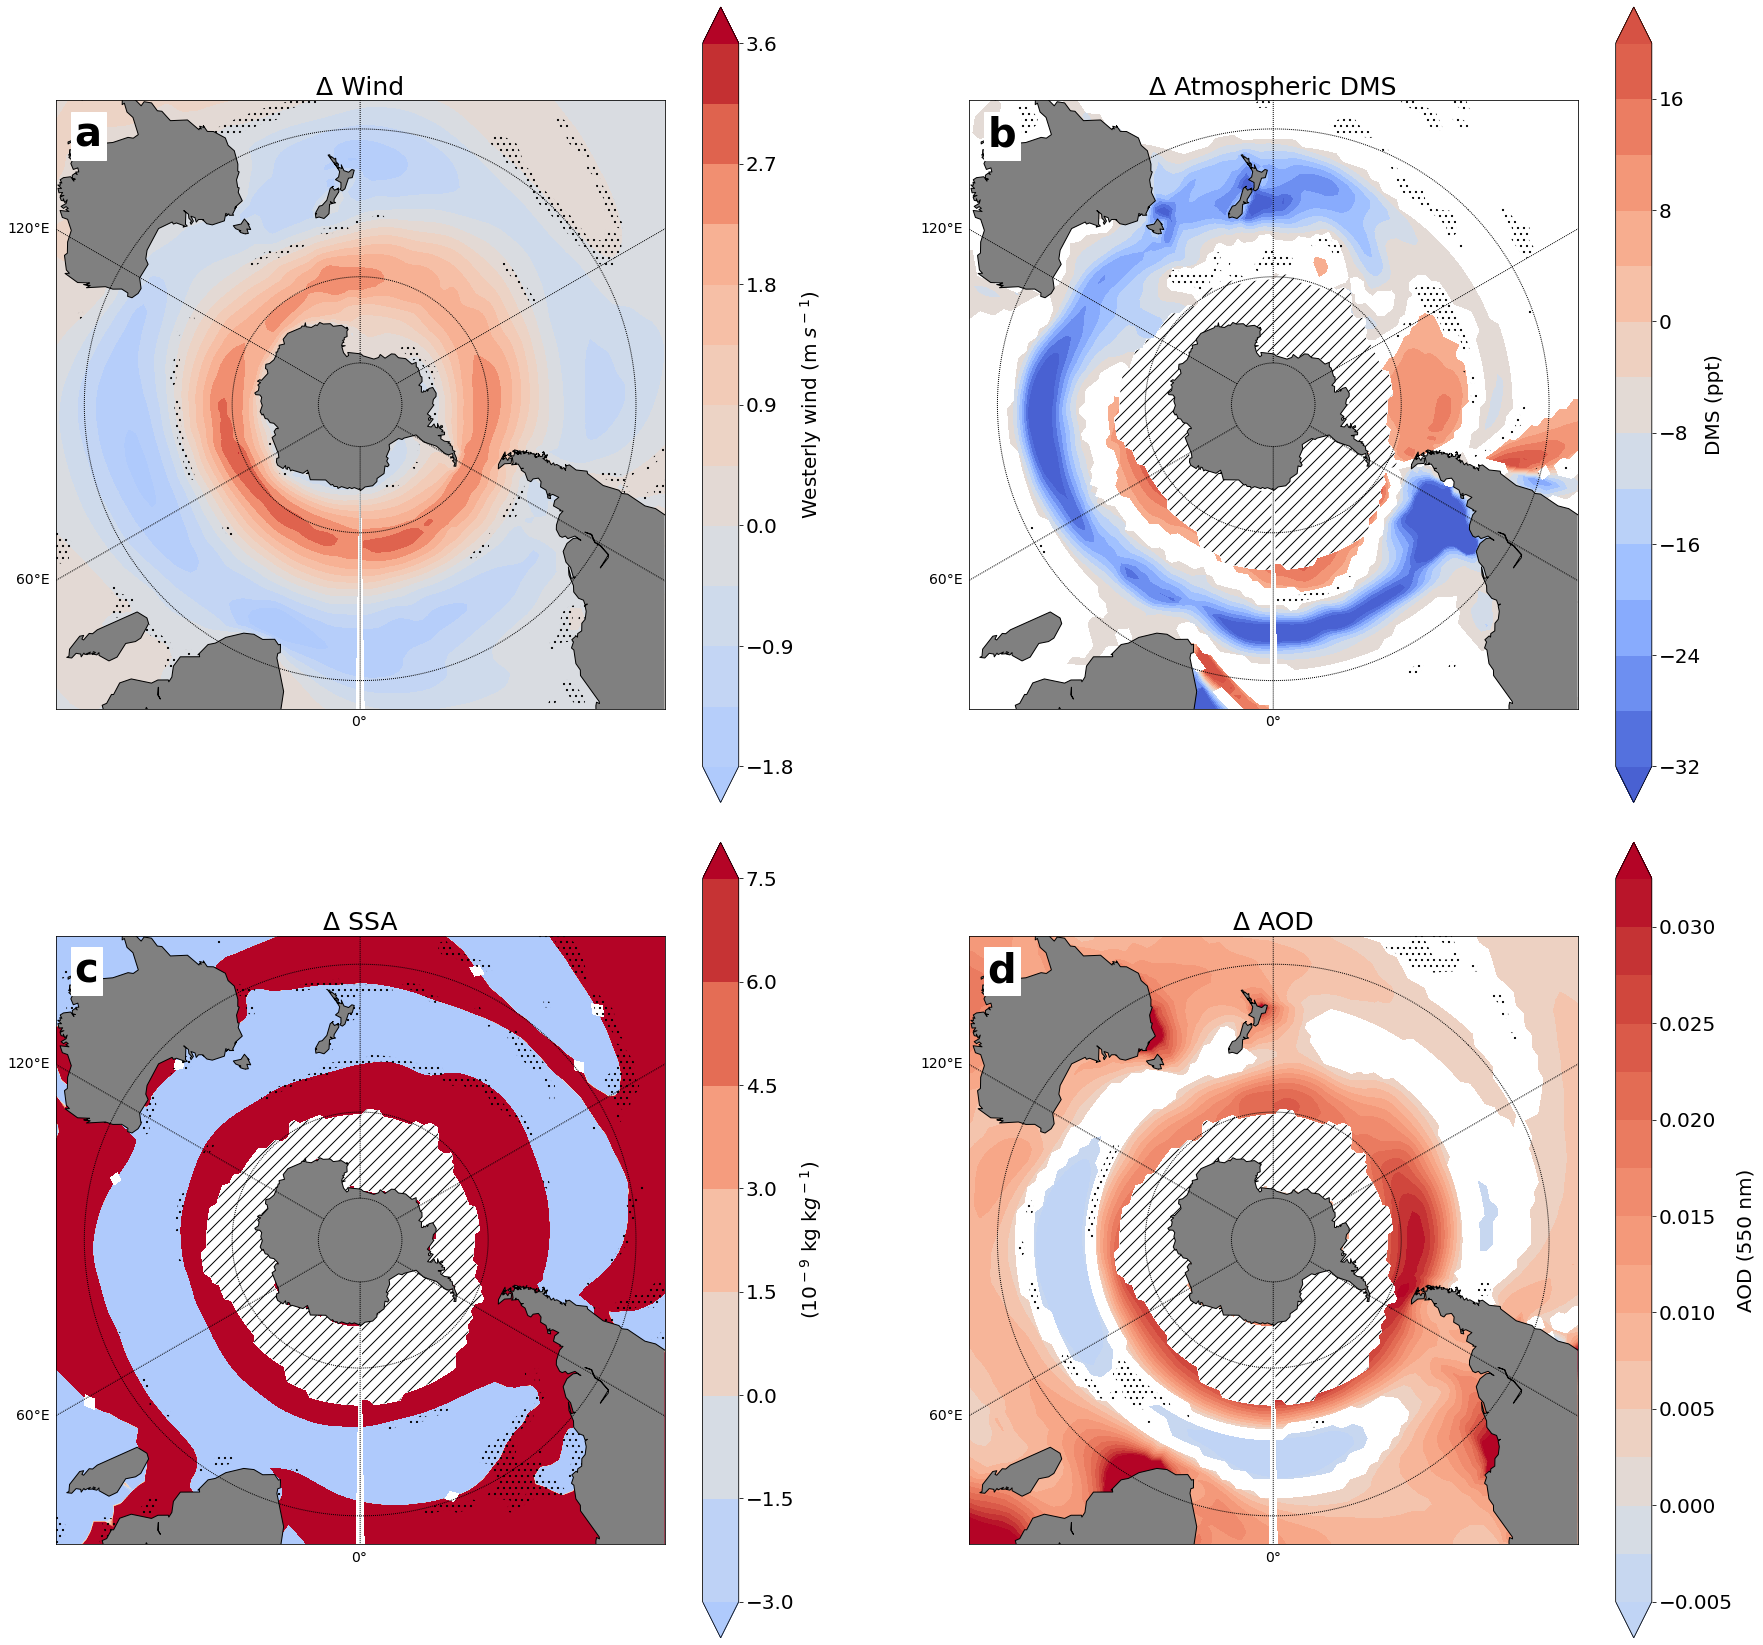

In [113]:
#(rows, columns, position) #  ############################# FIGURE 2 #################################

###################################################### FOR ROUTE 2 ##############################
month='DJF'
file ='/home/ybh10/CMIP6/UKESM1/Historic/Numpy_Array/Global/Difference/1940_1960_mean/Abs_Diff/{}/'.format(month)
file_dot ='/home/ybh10/CMIP6/UKESM1/Historic/Numpy_Array/Global/Difference/1940_1960_mean/Statistical/{}/'.format(month)
measurement=['Wind','DMS','SSAMMR','AOD'] # Fig 2
data_percentage,data_dot,data_clev,data_shift=data_for_figure(measurement,file,file_dot,saves,month,DJF_shift_abs,SON_shift_abs)
if month == 'DJF':
    sea_ice=np.nanmean(DJF_global_var[seaice],axis=0)
    ocean_sea_ice=np.nanmean(DJF_global_var[o_seaice],axis=0)
else:
    sea_ice=np.nanmean(SON_global_var[seaice],axis=0)
    ocean_sea_ice=np.nanmean(SON_global_var[o_seaice],axis=0)

fig = plt.figure(figsize=(30,30), edgecolor='w')
fig.subplots_adjust(hspace=0.05)
n=2; c=2
ax1 = fig.add_subplot(n,c,1); ax2 = fig.add_subplot(n,c,2); ax3 = fig.add_subplot(n,c,3);ax4 = fig.add_subplot(n,c,4)#;ax5 = fig.add_subplot(n,c,5);ax6 = fig.add_subplot(n,c,6)
axes=[ax1,ax2,ax3,ax4]

measurement=['Wind','Atmospheric DMS','SSA','AOD'] # Fig 2


# cbar_max = 200.0
# cbar_min = 0.0
# cbar_step = 5.0
#surface_downwelling_shortwave_flux_in_air

#RSDO: Surface SW in Seawater
# rss surface_downwelling_shortwave_flux_in_air
# RSDSCS Surface Downwelling Shortwave Radiation Clear Sky
#units=['Column Ozone (DU)','SW (W $m^-$$^2$)','Oceanic DMS (nM)','Westerly Wind (m $s^-$$^1$)','DMS ppt', 'AOD (550 nm)']#,'RF-CS (W $m^-$$^2$)']
units=['Westerly wind (m $s^-$$^1$)','DMS (ppt)','(10$^-$$^9$ kg k$g^-$$^1$)', 'AOD (550 nm)']#,'RF-CS (W $m^-$$^2$)']
dms_ssa=np.load('/home/ybh10/CMIP6/UKESM1/Historic/Numpy_Array/Global/Difference/1940_1960_mean/Rel_Diff/{}/DMS_SSA.npy'.format(month))
clevys_ice=np.arange(0,100+10,10)
clevys_ice=np.arange(-100,100+20,20)
clevys_SSA_H2SO4_SON=np.arange(0,280+20,20)
clevys_SSA_H2SO4_DJF=np.arange(0,180+20,20)
clevys_dmsssa=np.arange(-100,100+25,25)
clevys_dmsssa_DJF=np.arange(-25,25+5,5)

clevys_abs=np.arange(0,280+20,20)
shifted_cmap_Wind = shiftedColorMap(orig_cmap, start=0.35, midpoint=0.52, stop=1, name='shifted')

clevys_dmsa=np.arange(-0.0125,0.005+0.00125,0.00125)
lonmesh,latmesh  = np.meshgrid(lons,lats)
latitudes=[latmesh,latmesh,latmesh,latmesh]#,olat.data,olat.data,latmesh,latmesh,latmesh]
longitudes=[lonmesh,latmesh,latmesh,latmesh]#,olon.data,olon.data,lonmesh,lonmesh,lonmesh]
# latitudes=[latmesh,latmesh,latmesh,latmesh,latmesh,latmesh]
# longitudes=[lonmesh,lonmesh,lonmesh,lonmesh,lonmesh,lonmesh,lonmesh]
number=['a','b','c','d']
Dates=np.arange(1950,2015,1); lat_sh=lats[0:48]
clevs_SSA=np.arange(-3,7.5+1.5,1.5)
ssa_shift=shiftedColorMap(orig_cmap, start=0.35, midpoint=0.55, stop=1, name='shifted')
clevs_SEA_ICE_MASK=np.arange(0,10000,5000) # DMS
mask_map = matplotlib.cm.gist_gray
mask_shift=shiftedColorMap(mask_map, start=1, midpoint=1, stop=1, name='shifted')

shifted_cmap_Wind = shiftedColorMap(orig_cmap, start=0.35, midpoint=0.7, stop=1, name='shifted')
shifted_cmap_DJF_DMS = shiftedColorMap(orig_cmap, start=0.05, midpoint=0.44, stop=0.9, name='shifted')
shifted_cmap_SSAMMR = shiftedColorMap(orig_cmap, start=0.35, midpoint=0.55, stop=1, name='shifted')
shifted_cmap_AOD = shiftedColorMap(orig_cmap, start=0.4, midpoint=0.4, stop=1, name='shifted') 
data_shift=[shifted_cmap_Wind,shifted_cmap_DJF_DMS,shifted_cmap_SSAMMR,shifted_cmap_AOD]
#data_shift=[shifted_cmap_modis,shifted_cmap_RSDO,shifted_cmap_odms,shifted_cmap_dms,shifted_cmap_so2,shifted_cmap_H2SO4MMR]
for ax,mapy,sig_dot,clev,shift,laty,lony,title,unit,num in  zip(axes,data_percentage,data_dot,data_clev,data_shift,latitudes,longitudes,measurement,units,number):
    ax.grid(linestyle='--',alpha=0.5)
    mapy=np.nanmean(mapy[45:65],axis=(0))
    sig_dot=np.nanmean(sig_dot[145:165],axis=(0))
    sic=np.nanmean(sea_ice[90:111],axis=(0))

    map_ax1 = Basemap(projection='spstere',boundinglat=-25, lon_0=0,
                    resolution ='c',ax=ax)

    x,y  = np.meshgrid(lons,lats)
    x, y = map_ax1(x, y) 

    var = np.where(sic>0,np.nan,mapy)#mask sea ice


    meridians = np.arange(0.,360,60.)    
    parallels = np.arange(-90.,90,30.)
    map_ax1.drawcoastlines()
    map_ax1.fillcontinents(color='gray')
 #   map_ax1.drawcountries()
    map_ax1.drawmeridians(meridians,labels=[1,0,0,1],fontsize=14)  
    map_ax1.drawparallels(parallels,labels=[True,True,True,True],fontsize=12)
    clevs=np.arange(0.0,200+5,5)
    clevs1=np.arange(-30,30+0.5,0.5)
    t=ax.text(-500000,-15000000,num,color='black',fontsize=40,fontweight='bold')
    t.set_bbox(dict(facecolor='white', edgecolor='white'))

    if title=='SSA':
        vari=blank_space(mapy*1e9,-1.5,1.5)
        cs=ax.contourf(x,y,vari,clevs_SSA,cmap=ssa_shift,extend='both')
    else: 
        if title=='Atmospheric DMS':
            vari=blank_space(mapy,-4,4)
            cs=ax.contourf(x,y,vari,clev,cmap=shift,extend='both') 
        else:
            if title=='Wind':
                vari=blank_space(mapy,-0.45,.45)
                cs=ax.contourf(x,y,mapy,clev,cmap=shift,extend='both')
            else:
                vari=blank_space(mapy,-0.0025,0.0025)
                cs=ax.contourf(x,y,vari,clev,cmap=shift,extend='both')
    if title=='Wind': ########## THIS CODE plots the SEA-ICE MASKING HATCHES #######
        pass
    else:
        sea_ice_mask_data=sea_ice_mask(sic,mapy,x,y,0)
        ax.contourf(x,y,sea_ice_mask_data,cmap=mask_shift,hatches=['//'])

    ax.set_title("\u0394 {}".format(title),fontsize=25)
    cbar=fig.colorbar(cs,ax=ax,extend='both',orientation='vertical')#,ticks = np.arange(-30,30+5,5))
    cbar.set_label('{}'.format(unit),fontsize=20)
    cbar.ax.tick_params(labelsize=20)
    if title=='Wind' !=-1:
     #   var = np.where(sic,np.nan,sig_dot)#mask sea ice
        [m,n] = np.where(sig_dot==1)
        z1 = np.zeros(var.shape)
        z1[m,n]=99
        cs3 = ax.contourf(x, y, z1, 1, hatches=['', '..'], alpha=0)  
    else:
        var = np.where(sic>0,np.nan,sig_dot)#mask sea ice
        [m,n] = np.where(var==1)
        z1 = np.zeros(var.shape)
        z1[m,n]=99
        cs3 = ax.contourf(x, y, z1, 1, hatches=['', '..'], alpha=0)
    

plt.show()
#plt.savefig("/home/ybh10/CMIP6/UKESM1/Historic/Plots/PAPER/Fig_2_Masked_{}.png".format(month),dpi=600,bbox_inches = 'tight')


In [25]:
month='SON'
file ='/home/ybh10/CMIP6/UKESM1/Historic/Numpy_Array/Global/Difference/1940_1960_mean/Rel_Diff/{}/'.format(month)
file_dot ='/home/ybh10/CMIP6/UKESM1/Historic/Numpy_Array/Global/Difference/1940_1960_mean/Statistical/{}/'.format(month)
measurement=['DMS','ODMS','AOD','Wind'] # Fig 2
data_percentage,data_dot,data_clev,data_shift=data_for_figure(measurement,file,file_dot,saves,month,DJF_shift_abs,SON_shift_abs)
if month == 'DJF':
    sea_ice=np.nanmean(DJF_global_var[seaice],axis=0)
    ocean_sea_ice=np.nanmean(DJF_global_var[o_seaice],axis=0)
else:
    sea_ice=np.nanmean(SON_global_var[seaice],axis=0)
    ocean_sea_ice=np.nanmean(SON_global_var[o_seaice],axis=0)

# aod=data_percentage[3]
# wind=data_percentage[0]
# dms=data_percentage[1]
# ssa=data_percentage[2]
data_dms_ssa_p=data_percentage[0]
data_dms_p=data_percentage[0]
data_ssa_p=data_percentage[2]
data_aaod_p=data_percentage[3]

sic=np.nanmean(sea_ice[90:111],axis=(0))
osic=np.nanmean(ocean_sea_ice[90:111],axis=(0))

# odms_p=np.nanmean(data_odms_p[45:65],axis=(0))
# odms_var_p = np.where(osic==0,np.nan,odms_p)#mask sea ice


# # aod_p=np.nanmean(aod_p[45:65],axis=(0))
# aod_var_p = np.where(sic>0,np.nan,aod_p)#mask sea ice

#aod_neg_p=np.where(aod_var_p[15:40]>0,np.nan,aod_var_p[15:40])

# dms_p=np.nanmean(data_dms_p[45:65],axis=(0))#*1e9
# dms_var_p = np.where(sic>0.01,np.nan,dms_p)#mask SEA_ICE
# dm_var=dms_var_p[15:40]

#mask NON SEA_ICE
dms_p=np.nanmean(data_dms_p[45:65],axis=(0))#[15:40]
dms_var_p = np.where(sic>0.01,dms_p*1e10,dms_p)#mask NON SEA_ICE
dms_var_l = np.where(dms_var_p<10000,np.nan,dms_var_p)#mask NON SEA_ICE
dm_var=dms_var_l/1e10

DMS
DMS
-----------
ODMS
ODMS
-----------
AOD
AOD
-----------


<ipython-input-25-776d3a0b7274>:10: RuntimeWarning: Mean of empty slice
  sea_ice=np.nanmean(SON_global_var[seaice],axis=0)
<ipython-input-25-776d3a0b7274>:11: RuntimeWarning: Mean of empty slice
  ocean_sea_ice=np.nanmean(SON_global_var[o_seaice],axis=0)
<ipython-input-25-776d3a0b7274>:22: RuntimeWarning: Mean of empty slice
  sic=np.nanmean(sea_ice[90:111],axis=(0))
<ipython-input-25-776d3a0b7274>:23: RuntimeWarning: Mean of empty slice
  osic=np.nanmean(ocean_sea_ice[90:111],axis=(0))


Ozone
Ozone
-----------
ODMS
ODMS
-----------
DMS
DMS
-----------


<ipython-input-22-b3abf204f269>:11: RuntimeWarning: Mean of empty slice
  sea_ice=np.nanmean(SON_global_var[seaice],axis=0)
<ipython-input-22-b3abf204f269>:12: RuntimeWarning: Mean of empty slice
  ocean_sea_ice=np.nanmean(SON_global_var[o_seaice],axis=0)
<ipython-input-22-b3abf204f269>:93: RuntimeWarning: Mean of empty slice
  sic=np.nanmean(sea[90:111],axis=(0))
<ipython-input-22-b3abf204f269>:93: RuntimeWarning: Mean of empty slice
  sic=np.nanmean(sea[90:111],axis=(0))
<ipython-input-22-b3abf204f269>:91: RuntimeWarning: Mean of empty slice
  mapy=np.nanmean(mapy[45:65],axis=(0))
<ipython-input-22-b3abf204f269>:93: RuntimeWarning: Mean of empty slice
  sic=np.nanmean(sea[90:111],axis=(0))


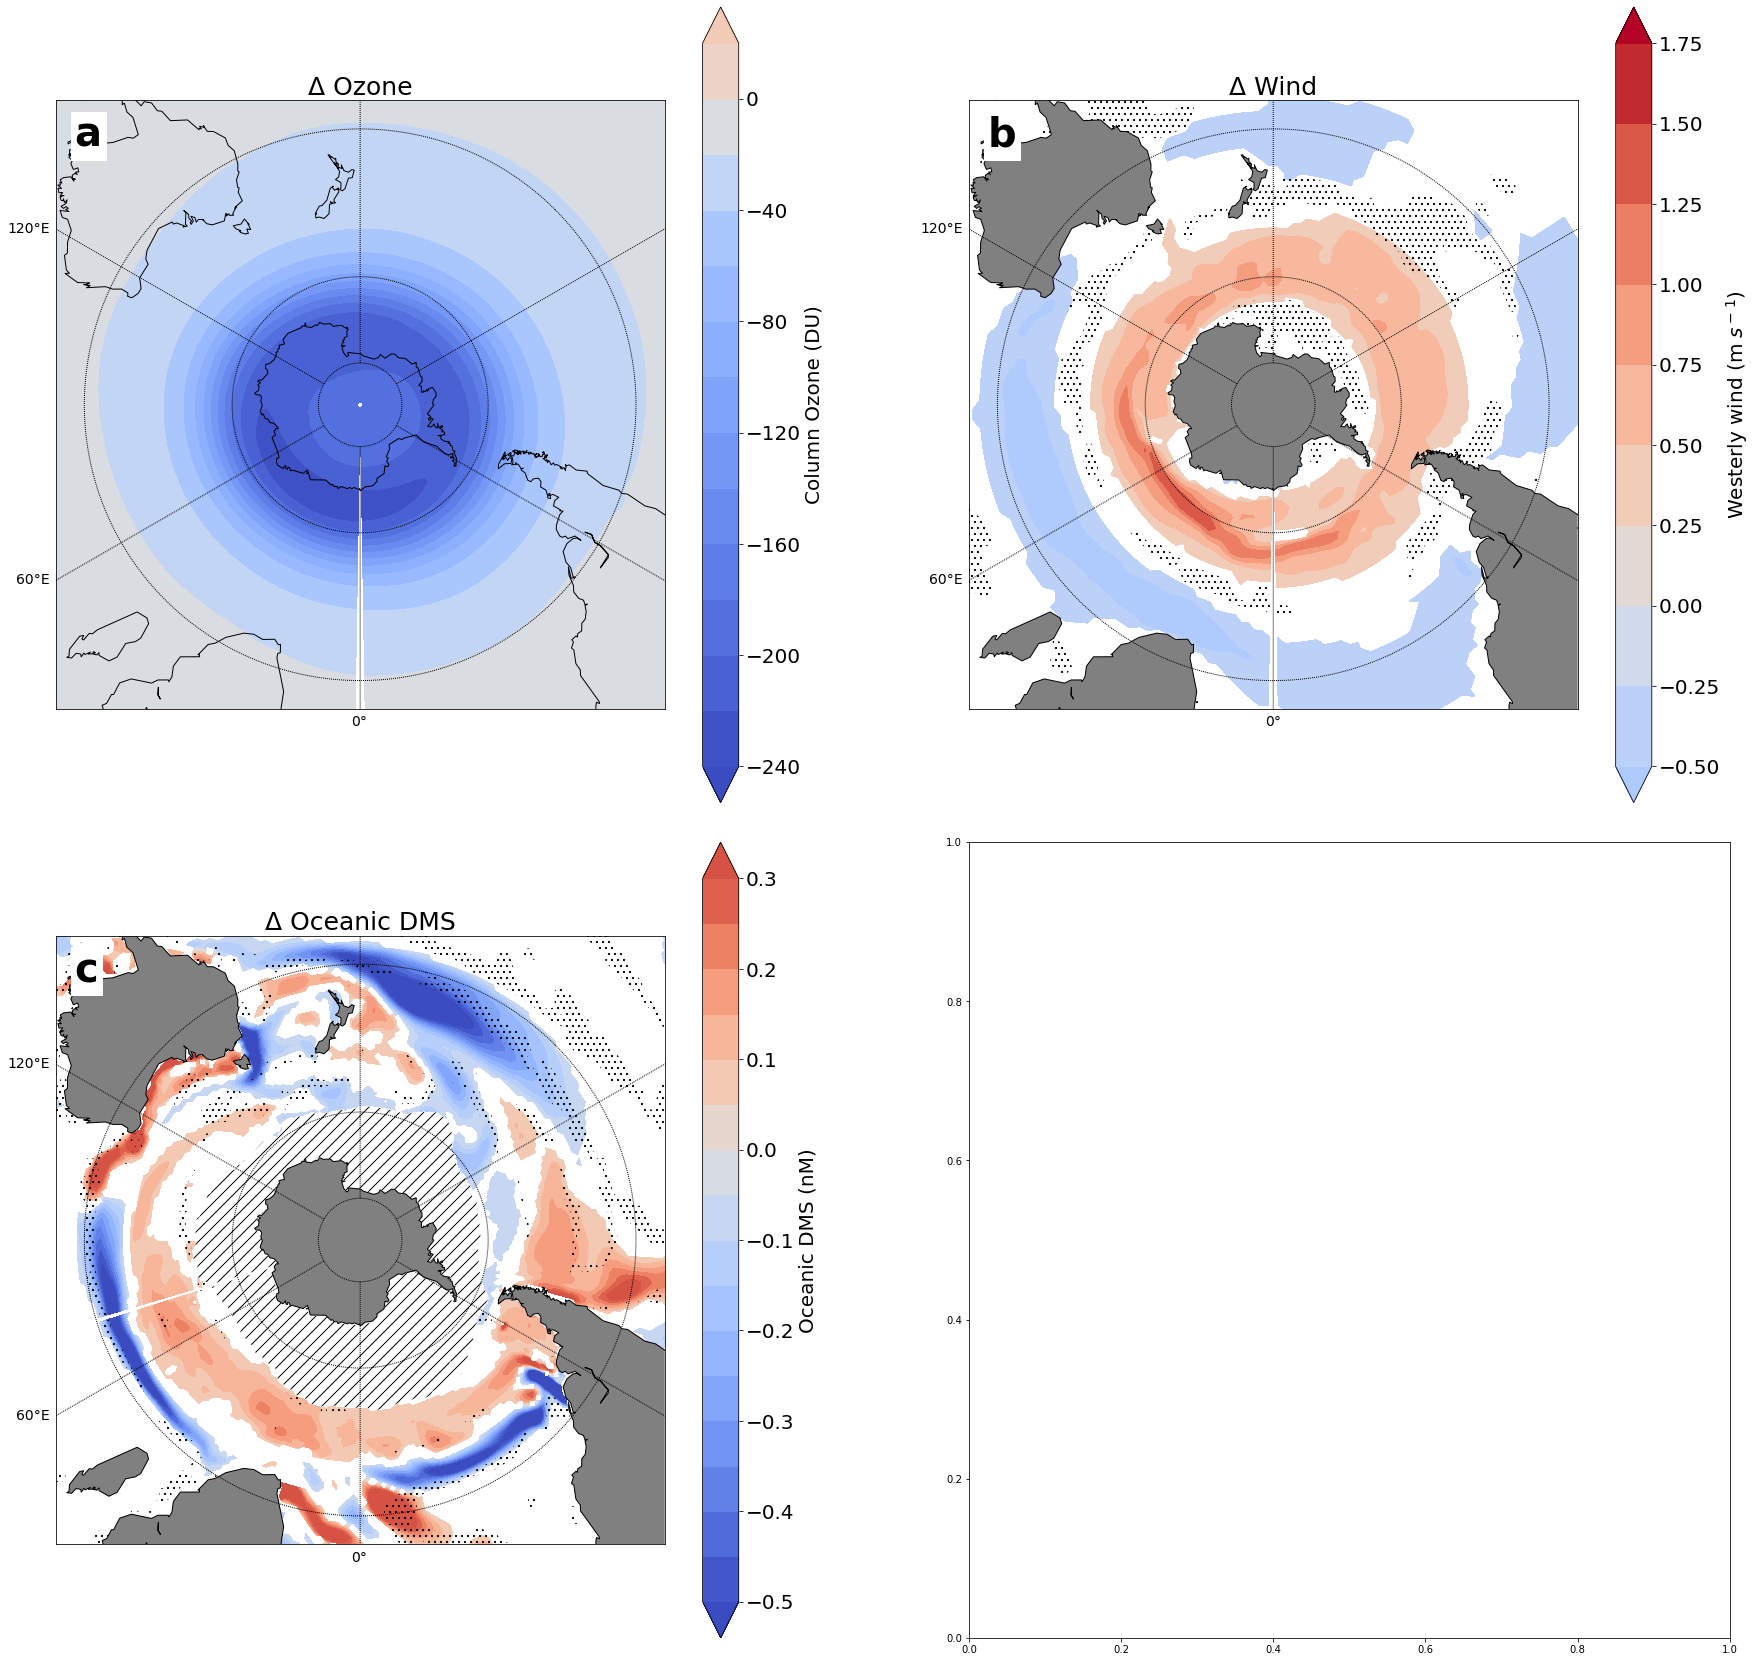

In [22]:
month='SON'
file ='/home/ybh10/CMIP6/UKESM1/Historic/Numpy_Array/Global/Difference/1940_1960_mean/Abs_Diff/{}/'.format(month)
file_dot ='/home/ybh10/CMIP6/UKESM1/Historic/Numpy_Array/Global/Difference/1940_1960_mean/Statistical/{}/'.format(month)
measurement=['Ozone','Wind','ODMS','DMS'] # Fig 3
data_percentage,data_dot,data_clev,data_shift=data_for_figure(measurement,file,file_dot,saves,month,DJF_shift_abs,SON_shift_abs)
seaice=18
if month == 'DJF':
    sea_ice=np.nanmean(DJF_global_var[seaice],axis=0)
    ocean_sea_ice=np.nanmean(DJF_global_var[o_seaice],axis=0)
else:
    sea_ice=np.nanmean(SON_global_var[seaice],axis=0)
    ocean_sea_ice=np.nanmean(SON_global_var[o_seaice],axis=0)
    
clevs_ozone=np.arange(-240,40,20) # Ozone
clevs_so2=np.arange(-10,10+.5,.5)
clevs_rsdscs=np.arange(-5,5+.5,.5)
clevs_rsdo=np.arange(-30,30+3,3)
clevs_h2so4=np.arange(-6,6+.5,.5)
clevs_ssa=np.arange(-6e-10,6e-10+.5e-10,.5e-10)

clevs_rsds=np.arange(-20,20+2,2) #DJF
clevs_rsds_son=np.arange(-14,6+2,2) # SON
clevs_wind=np.arange(-1.8,3.8,.45)# Wind
clevs_dms=np.arange(-50,40+5,5) # DMS
clevs_odms=np.arange(-2,1.5,0.1) # DJF
clevs_odms_son=np.arange(-.5,0.35,0.05) # SON
clevs_aod=np.arange(-0.03,0.03+0.0025,0.0025) # AOD
#data_clev=[clevs_ozone,clevs_rsdo,clevs_odms,clevs_dms,clevs_so2,clevs_h2so4]
orig_cmap = matplotlib.cm.coolwarm
shifted_cmap_modis = shiftedColorMap(orig_cmap, start=0, midpoint=0.7, stop=.6, name='shifted')
shifted_cmap_aod = shiftedColorMap(orig_cmap, start=0.35, midpoint=0.3, stop=1, name='shifted')
shifted_cmap_dms = shiftedColorMap(orig_cmap, start=0, midpoint=0.5, stop=0.9, name='shifted')
shifted_cmap_wind = shiftedColorMap(orig_cmap, start=0.3, midpoint=0.62, stop=1, name='shifted')
shifted_cmap_so2 = shiftedColorMap(orig_cmap, start=0, midpoint=0.5, stop=1, name='shifted')
shifted_cmap_ssa = shiftedColorMap(orig_cmap, start=0.35, midpoint=0.55, stop=1, name='shifted')
shifted_cmap_H2SO4MMR = shiftedColorMap(orig_cmap, start=0, midpoint=0.5, stop=1, name='shifted')
shifted_cmap_SSA_H2SO4 = shiftedColorMap(orig_cmap, start=0.55, midpoint=0.55, stop=1, name='shifted')

shifted_cmap_RSDS = shiftedColorMap(orig_cmap, start=0.2, midpoint=0.6, stop=.7, name='shifted')
shifted_cmap_RSDO = shiftedColorMap(orig_cmap, start=0, midpoint=0.5, stop=1, name='shifted')
shifted_cmap_odms = shiftedColorMap(orig_cmap, start=0, midpoint=0.5, stop=.85, name='shifted')
###################################################### FOR ROUTE 2 ##############################
fig = plt.figure(figsize=(30,30), edgecolor='w')
fig.subplots_adjust(hspace=0.05)
n=2; c=2
ax1 = fig.add_subplot(n,c,1); ax2 = fig.add_subplot(n,c,2); ax3 = fig.add_subplot(n,c,3);ax4 = fig.add_subplot(n,c,4)#;ax5 = fig.add_subplot(n,c,5);ax6 = fig.add_subplot(n,c,6)
axes=[ax1,ax2,ax3,ax4]

clevs_SON_Wind=np.arange(-.5,2,.25)

shifted_cmap_Wind = shiftedColorMap(orig_cmap, start=0.35, midpoint=0.52, stop=1, name='shifted')
measurement=['Ozone','Wind','Oceanic DMS','Atmospheric DMS'] # Fig 3


# cbar_max = 200.0
# cbar_min = 0.0
# cbar_step = 5.0
#surface_downwelling_shortwave_flux_in_air

#RSDO: Surface SW in Seawater
# rss surface_downwelling_shortwave_flux_in_air
# RSDSCS Surface Downwelling Shortwave Radiation Clear Sky
#units=['Column Ozone (DU)','SW (W $m^-$$^2$)','Oceanic DMS (nM)','Westerly Wind (m $s^-$$^1$)','DMS ppt', 'AOD (550 nm)']#,'RF-CS (W $m^-$$^2$)']
units=['Column Ozone (DU)','Westerly wind (m $s^-$$^1$)','Oceanic DMS (nM)','DMS ppt']#,'RF-CS (W $m^-$$^2$)']
dms_ssa=np.load('/home/ybh10/CMIP6/UKESM1/Historic/Numpy_Array/Global/Difference/1940_1960_mean/Rel_Diff/{}/DMS_SSA.npy'.format(month))
clevys_ice=np.arange(0,100+10,10)
clevys_ice=np.arange(-100,100+20,20)
clevys_SSA_H2SO4_SON=np.arange(0,280+20,20)
clevys_SSA_H2SO4_DJF=np.arange(0,180+20,20)
clevys_dmsssa=np.arange(-100,100+25,25)
clevys_dmsssa_DJF=np.arange(-25,25+5,5)

clevys_abs=np.arange(0,280+20,20)
shifted_cmap_Wind = shiftedColorMap(orig_cmap, start=0.35, midpoint=0.52, stop=1, name='shifted')

clevys_dmsa=np.arange(-0.0125,0.005+0.00125,0.00125)
lonmesh,latmesh  = np.meshgrid(lons,lats)
latitudes=[latmesh,latmesh,olat.data,latmesh]#,olat.data,olat.data,latmesh,latmesh,latmesh]
longitudes=[lonmesh,lonmesh,olon.data,lonmesh]#,olon.data,olon.data,lonmesh,lonmesh,lonmesh]
# latitudes=[latmesh,latmesh,latmesh,latmesh,latmesh,latmesh]
# longitudes=[lonmesh,lonmesh,lonmesh,lonmesh,lonmesh,lonmesh,lonmesh]
number=['a','b','c','d']
Dates=np.arange(1950,2015,1); lat_sh=lats[0:48]
clevs_SSA=np.arange(-3e-9,7.5e-9+1.5e-9,1.5e-9)
ssa_shift=shifted_cmap_ssa = shiftedColorMap(orig_cmap, start=0.35, midpoint=0.55, stop=1, name='shifted')
sea_ice_dats=[sea_ice,sea_ice,ocean_sea_ice,sea_ice]

#data_shift=[shifted_cmap_modis,shifted_cmap_RSDO,shifted_cmap_odms,shifted_cmap_dms,shifted_cmap_so2,shifted_cmap_H2SO4MMR]
for ax,mapy,sig_dot,clev,shift,laty,lony,title,unit,num,sea in  zip(axes,data_percentage,data_dot,data_clev,data_shift,latitudes,longitudes,measurement,units,number,sea_ice_dats):
    ax.grid(linestyle='--',alpha=0.5)
    mapy=np.nanmean(mapy[45:65],axis=(0))
    sig_dot=np.nanmean(sig_dot[145:165],axis=(0))
    sic=np.nanmean(sea[90:111],axis=(0))
    map_ax1 = Basemap(projection='spstere',boundinglat=-25, lon_0=0,
                    resolution ='c',ax=ax)
    x, y = map_ax1(lony, laty) 
    meridians = np.arange(0.,360,60.)    
    parallels = np.arange(-90.,90,30.)
    map_ax1.drawcoastlines()

    map_ax1.drawmeridians(meridians,labels=[1,0,0,1],fontsize=14)  
    map_ax1.drawparallels(parallels,labels=[True,True,True,True],fontsize=12)
    clevs=np.arange(0.0,200+5,5)
    clevs1=np.arange(-30,30+0.5,0.5)
    t=ax.text(-500000,-15000000,num,color='black',fontsize=40,fontweight='bold')
    t.set_bbox(dict(facecolor='white', edgecolor='white'))
    if title=='Ozone':
        cs=ax.contourf(x,y,mapy,clev,cmap=shift,extend='both')
    else: 
        if title=='Atmospheric DMS':
            var = np.where(sic>0,np.nan,mapy)#mask sea ice
            vari=blank_space(mapy,-5,5)
            cs=ax.contourf(x,y,vari,clevs_dms,cmap=shifted_cmap_dms,extend='both') 
        else:
            if title=='Oceanic DMS':
                map_ax1.fillcontinents(color='gray')
                var = np.where(sic>0,np.nan,mapy)#mask sea ice
                vari=blank_space(mapy,-0.05,0.05)
                cs=ax.contourf(x,y,vari,clev,cmap=shift,extend='both') 
                map_ax1.fillcontinents(color='gray')

            else:
                map_ax1.fillcontinents(color='gray')
                var = np.where(sic>0,np.nan,mapy)#mask sea ice
                vari=blank_space(mapy,-0.25,0.25)
                cs=ax.contourf(x,y,vari,clevs_SON_Wind,cmap=shifted_cmap_Wind,extend='both')
    if title=='Ozone': ########## THIS CODE plots the SEA-ICE MASKING HATCHES #######
        pass
    else:
        if title=='Wind': ########## THIS CODE plots the SEA-ICE MASKING HATCHES #######
            pass
        else:
            sea_ice_mask_data=sea_ice_mask(sic,mapy,x,y,0)
            ax.contourf(x,y,sea_ice_mask_data,cmap=mask_shift,hatches=['//'])
    ax.set_title("\u0394 {}".format(title),fontsize=25)
    cbar=fig.colorbar(cs,ax=ax,extend='both',orientation='vertical')#,ticks = np.arange(-30,30+5,5))
    cbar.set_label('{}'.format(unit),fontsize=20)
    cbar.ax.tick_params(labelsize=20)
    
        
    if title=='Ozone':
        pass
    else:
        if title=='Wind' !=-1:
         #   var = np.where(sic,np.nan,sig_dot)#mask sea ice
            [m,n] = np.where(sig_dot==1)
            z1 = np.zeros(var.shape)
            z1[m,n]=99
            cs3 = ax.contourf(x, y, z1, 1, hatches=['', '..'], alpha=0)  
        else:
            var = np.where(sic>0,np.nan,sig_dot)#mask sea ice
            [m,n] = np.where(var==1)
            z1 = np.zeros(var.shape)
            z1[m,n]=99
            cs3 = ax.contourf(x, y, z1, 1, hatches=['', '..'], alpha=0)

plt.show()
#plt.savefig("/home/ybh10/CMIP6/UKESM1/Historic/Plots/PAPER/Fig_3_Masked_{}.png".format(month),dpi=600,bbox_inches = 'tight')
 

In [38]:
#(rows, columns, position) #  ############################# FIGURE 4 SUPPLIMENTARY #################################
month='DJF'
file ='/home/ybh10/CMIP6/UKESM1/Historic/Numpy_Array/Global/Difference/1940_1960_mean/Rel_Diff/{}/'.format(month)
file_dot ='/home/ybh10/CMIP6/UKESM1/Historic/Numpy_Array/Global/Difference/1940_1960_mean/Statistical/{}/'.format(month)
measurement=['DMS','DMS','H2SO4MMR','SSAMMR'] # Fig 4data_percentage,data_dot,data_clev,data_shift=data_for_figure(measurement,file,file_dot,saves,month,shift_month,DJF_shift_abs,SON_shift_abs)
data_percentage,data_dot,data_clev,data_shift=data_for_figure(measurement,file,file_dot,saves,month,DJF_shift_abs,SON_shift_abs)

clevs_ozone=np.arange(-240,40,20) # Ozone
clevs_so2=np.arange(-10,10+.5,.5)
clevs_rsdscs=np.arange(-5,5+.5,.5)
clevs_rsdo=np.arange(-30,30+3,3)
clevs_h2so4=np.arange(-6,6+.5,.5)
clevs_ssa=np.arange(-6e-10,6e-10+.5e-10,.5e-10)

clevs_rsds=np.arange(-20,20+2,2) #DJF
clevs_rsds_son=np.arange(-14,6+2,2) # SON
clevs_wind=np.arange(-1.8,3.8,.45)# Wind
clevs_dms=np.arange(-50,40+5,5) # DMS
clevs_odms=np.arange(-2,1.5,0.1) # DJF
clevs_odms_son=np.arange(-.5,0.35,0.05) # SON
clevs_aod=np.arange(-0.03,0.03+0.0025,0.0025) # AOD
#data_clev=[clevs_ozone,clevs_rsdo,clevs_odms,clevs_dms,clevs_so2,clevs_h2so4]
orig_cmap = matplotlib.cm.coolwarm
shifted_cmap_modis = shiftedColorMap(orig_cmap, start=0, midpoint=0.7, stop=.6, name='shifted')
shifted_cmap_aod = shiftedColorMap(orig_cmap, start=0.35, midpoint=0.3, stop=1, name='shifted')
shifted_cmap_dms = shiftedColorMap(orig_cmap, start=0, midpoint=0.5, stop=0.9, name='shifted')
shifted_cmap_wind = shiftedColorMap(orig_cmap, start=0.3, midpoint=0.62, stop=1, name='shifted')
shifted_cmap_so2 = shiftedColorMap(orig_cmap, start=0, midpoint=0.5, stop=1, name='shifted')
shifted_cmap_ssa = shiftedColorMap(orig_cmap, start=0.35, midpoint=0.55, stop=1, name='shifted')
shifted_cmap_H2SO4MMR = shiftedColorMap(orig_cmap, start=0, midpoint=0.5, stop=1, name='shifted')
shifted_cmap_SSA_H2SO4 = shiftedColorMap(orig_cmap, start=0.55, midpoint=0.55, stop=1, name='shifted')

shifted_cmap_RSDS = shiftedColorMap(orig_cmap, start=0.2, midpoint=0.6, stop=.7, name='shifted')
shifted_cmap_RSDO = shiftedColorMap(orig_cmap, start=0, midpoint=0.5, stop=1, name='shifted')
shifted_cmap_odms = shiftedColorMap(orig_cmap, start=0, midpoint=0.5, stop=.85, name='shifted')
###################################################### FOR ROUTE 2 ##############################
fig = plt.figure(figsize=(30,20), edgecolor='w')
fig.subplots_adjust(hspace=0.05)
n=2; c=3
ax1 = fig.add_subplot(n,c,1); ax2 = fig.add_subplot(n,c,2); ax3 = fig.add_subplot(n,c,3);ax4 = fig.add_subplot(n,c,4);ax5 = fig.add_subplot(n,c,5);ax6 = fig.add_subplot(n,c,6)
axes=[ax1,ax2,ax3,ax4,ax5,ax6]


a=np.nanmean(DJF_global_var[dm][:,90:111],axis=(0))*DMS_ppt # DMS Pre-ODC
b=data_percentage[1][45:65] # Rel Diff dms
c=np.nanmean(DJF_global_var[SSA][:,90:111],axis=(0))*1e9 # SSA pre-odc
d=data_percentage[3][45:65] # Rel Diff ssa
e=np.nanmean(DJF_global_var[SO4MMR][:,90:111],axis=(0))*1e11 # H2SO4 pre-odc
f=data_percentage[2][45:65] # Rel Diff h2so4

data_sup=[a,c,e,b,d,f]
data_stats=[data_dot[1],data_dot[3],data_dot[2],data_dot[1],data_dot[3],data_dot[2]]

#units=['Column Ozone (DU)','SW (W $m^-$$^2$)','Oceanic DMS (nM)','Westerly Wind (m $s^-$$^1$)','DMS ppt', 'AOD (550 nm)']#,'RF-CS (W $m^-$$^2$)']
units=['DMS (ppt)','(1e$^-$$^9$ kg kg$^-$$^1$)', '(1e$^-$$^1$$^1$ kg kg$^-$$^1$)','%','%','%']#,'RF-CS (W $m^-$$^2$)']
measurement=['DMS','SSA','H2SO4','DMS','SSA','H2SO4']
clevs_dms=np.arange(0,300+30,30) # DMS
clevs_ssa=np.arange(0,30+5,5) # 
clevs_h2so4_mean=np.arange(0,40+5,5)
clevs_dms_djf=np.arange(-20,20+2,2) # DMS
clevs_DJF_SSAMMR=np.arange(-10,30+5,5)
clevs_DJF_H2SO4MMR=np.arange(-4,20+2,2)
clevy=[clevs_dms,clevs_ssa,clevs_h2so4_mean,clevs_dms_djf,clevs_DJF_SSAMMR,clevs_DJF_H2SO4MMR]

orig_cmap = matplotlib.cm.coolwarm
shifted_cmap_DJF_DMS = shiftedColorMap(orig_cmap, start=0.0, midpoint=0.5, stop=1, name='shifted')
shifted_cmap_H2SO4MMR = shiftedColorMap(orig_cmap, start=0.35, midpoint=0.32, stop=.9, name='shifted') 
shifted_cmap_SSAMMR = shiftedColorMap(orig_cmap, start=0.35, midpoint=0.57, stop=1, name='shifted')
sea_ice_dats=[sea_ice,sea_ice,ocean_sea_ice,sea_ice]

shifts=[data_shift[0],data_shift[2],data_shift[1],shifted_cmap_DJF_DMS,shifted_cmap_SSAMMR,shifted_cmap_H2SO4MMR]
lonmesh,latmesh  = np.meshgrid(lons,lats)
number=['a','b','c','d','e','f']
Dates=np.arange(1950,2015,1); lat_sh=lats[0:48]
count=np.arange(0,7,1)
for ax,mapy,sig_dot,clev,shift,title,unit,num,counts in  zip(axes,data_sup,data_stats,clevy,shifts,measurement,units,number,count):
    ax.grid(linestyle='--',alpha=0.5)
    mapy=np.nanmean(mapy,axis=(0))
    sig_dot=np.nanmean(sig_dot[145:165],axis=(0))
    map_ax1 = Basemap(projection='spstere',boundinglat=-25, lon_0=0,
                    resolution ='c',ax=ax)
    sic=np.nanmean(sea[90:111],axis=(0))

#   x,y  = np.meshgrid(lons,lats)
    x, y = map_ax1(lonmesh, latmesh) 
  #  x,y  = np.meshgrid(lony,laty)

    var = np.where(sic>0,np.nan,mapy)#mask sea ice

    meridians = np.arange(0.,360,60.)    
    parallels = np.arange(-90.,90,30.)
    map_ax1.drawcoastlines()
    map_ax1.fillcontinents(color='gray')
 #   map_ax1.drawcountries()
    map_ax1.drawmeridians(meridians,labels=[1,0,0,1],fontsize=14)  
    map_ax1.drawparallels(parallels,labels=[True,True,True,True],fontsize=12)
    clevs=np.arange(0.0,200+5,5)
    clevs1=np.arange(-30,30+0.5,0.5)
    t=ax.text(-500000,-14500000,num,color='black',fontsize=40,fontweight='bold')
    t.set_bbox(dict(facecolor='white', edgecolor='white'))

    if title=='SSA':
        if counts <2:
            vari=blank_space(mapy,-1.5,1.5)
            cs=ax.contourf(x,y,mapy,clev,extend='both')
        else:
            vari=blank_space(mapy,-5,5)
            cs=ax.contourf(x,y,vari,clev,cmap=shift,extend='both')
    else: 
        if title=='DMS':
            if counts <2:
                vari=blank_space(mapy,-2,2)
                cs=ax.contourf(x,y,mapy,clev,extend='both')
            else:
                vari=blank_space(mapy,-2,2)
                cs=ax.contourf(x,y,vari,clev,cmap=shift,extend='both')
        else:
           #if title=='H2SO4':
            if counts == 2:
                vari=blank_space(mapy,-5,5)
                cs=ax.contourf(x,y,mapy,clev,extend='both')
            else:
                vari=blank_space(mapy,-2,2)
                cs=ax.contourf(x,y,vari,clev,cmap=shift,extend='both')
    if counts > 2:
        ax.set_title("\u0394 {}".format(title),fontsize=25)
        sea_ice_mask_data=sea_ice_mask(sic,mapy,x,y)
        ax.contourf(x,y,sea_ice_mask_data,cmap=mask_shift,hatches=['//'])
    else:
        ax.set_title("1940-1960 mean ({})".format(title),fontsize=25)

    cbar=fig.colorbar(cs,ax=ax,extend='both',orientation='vertical')#,ticks = np.arange(-30,30+5,5))
    cbar.set_label('{}'.format(unit),fontsize=20)
    cbar.ax.tick_params(labelsize=20)
    

    if counts>2 !=-1:
        var = np.where(sic>0,np.nan,sig_dot)#mask sea ice

    
        [m,n] = np.where(var==1)

        z1 = np.zeros(mapy.shape)
        z1[m,n]=99


        cs3 = ax.contourf(x, y, z1, 1, hatches=['', '..'], alpha=0)
    

plt.show()
#plt.savefig("/home/ybh10/CMIP6/UKESM1/Historic/Plots/PAPER/Fig_4_suppliment_masked_{}_old.png".format(month),dpi=600,bbox_inches = 'tight')


NameError: name 'shift_month' is not defined

ODMS
ODMS
-----------
ODMS
ODMS
-----------
DMS
DMS
-----------
DMS
DMS
-----------


<ipython-input-206-a7a3d1ddc472>:27: RuntimeWarning: Mean of empty slice
  a=np.nanmean(DJF_global_var[od][:,90:111],axis=(0))*ODMS_nm # DMS Pre-ODC
<ipython-input-206-a7a3d1ddc472>:61: RuntimeWarning: Mean of empty slice
  mapy=np.nanmean(mapy,axis=(0))
<ipython-input-206-a7a3d1ddc472>:61: RuntimeWarning: Mean of empty slice
  mapy=np.nanmean(mapy,axis=(0))


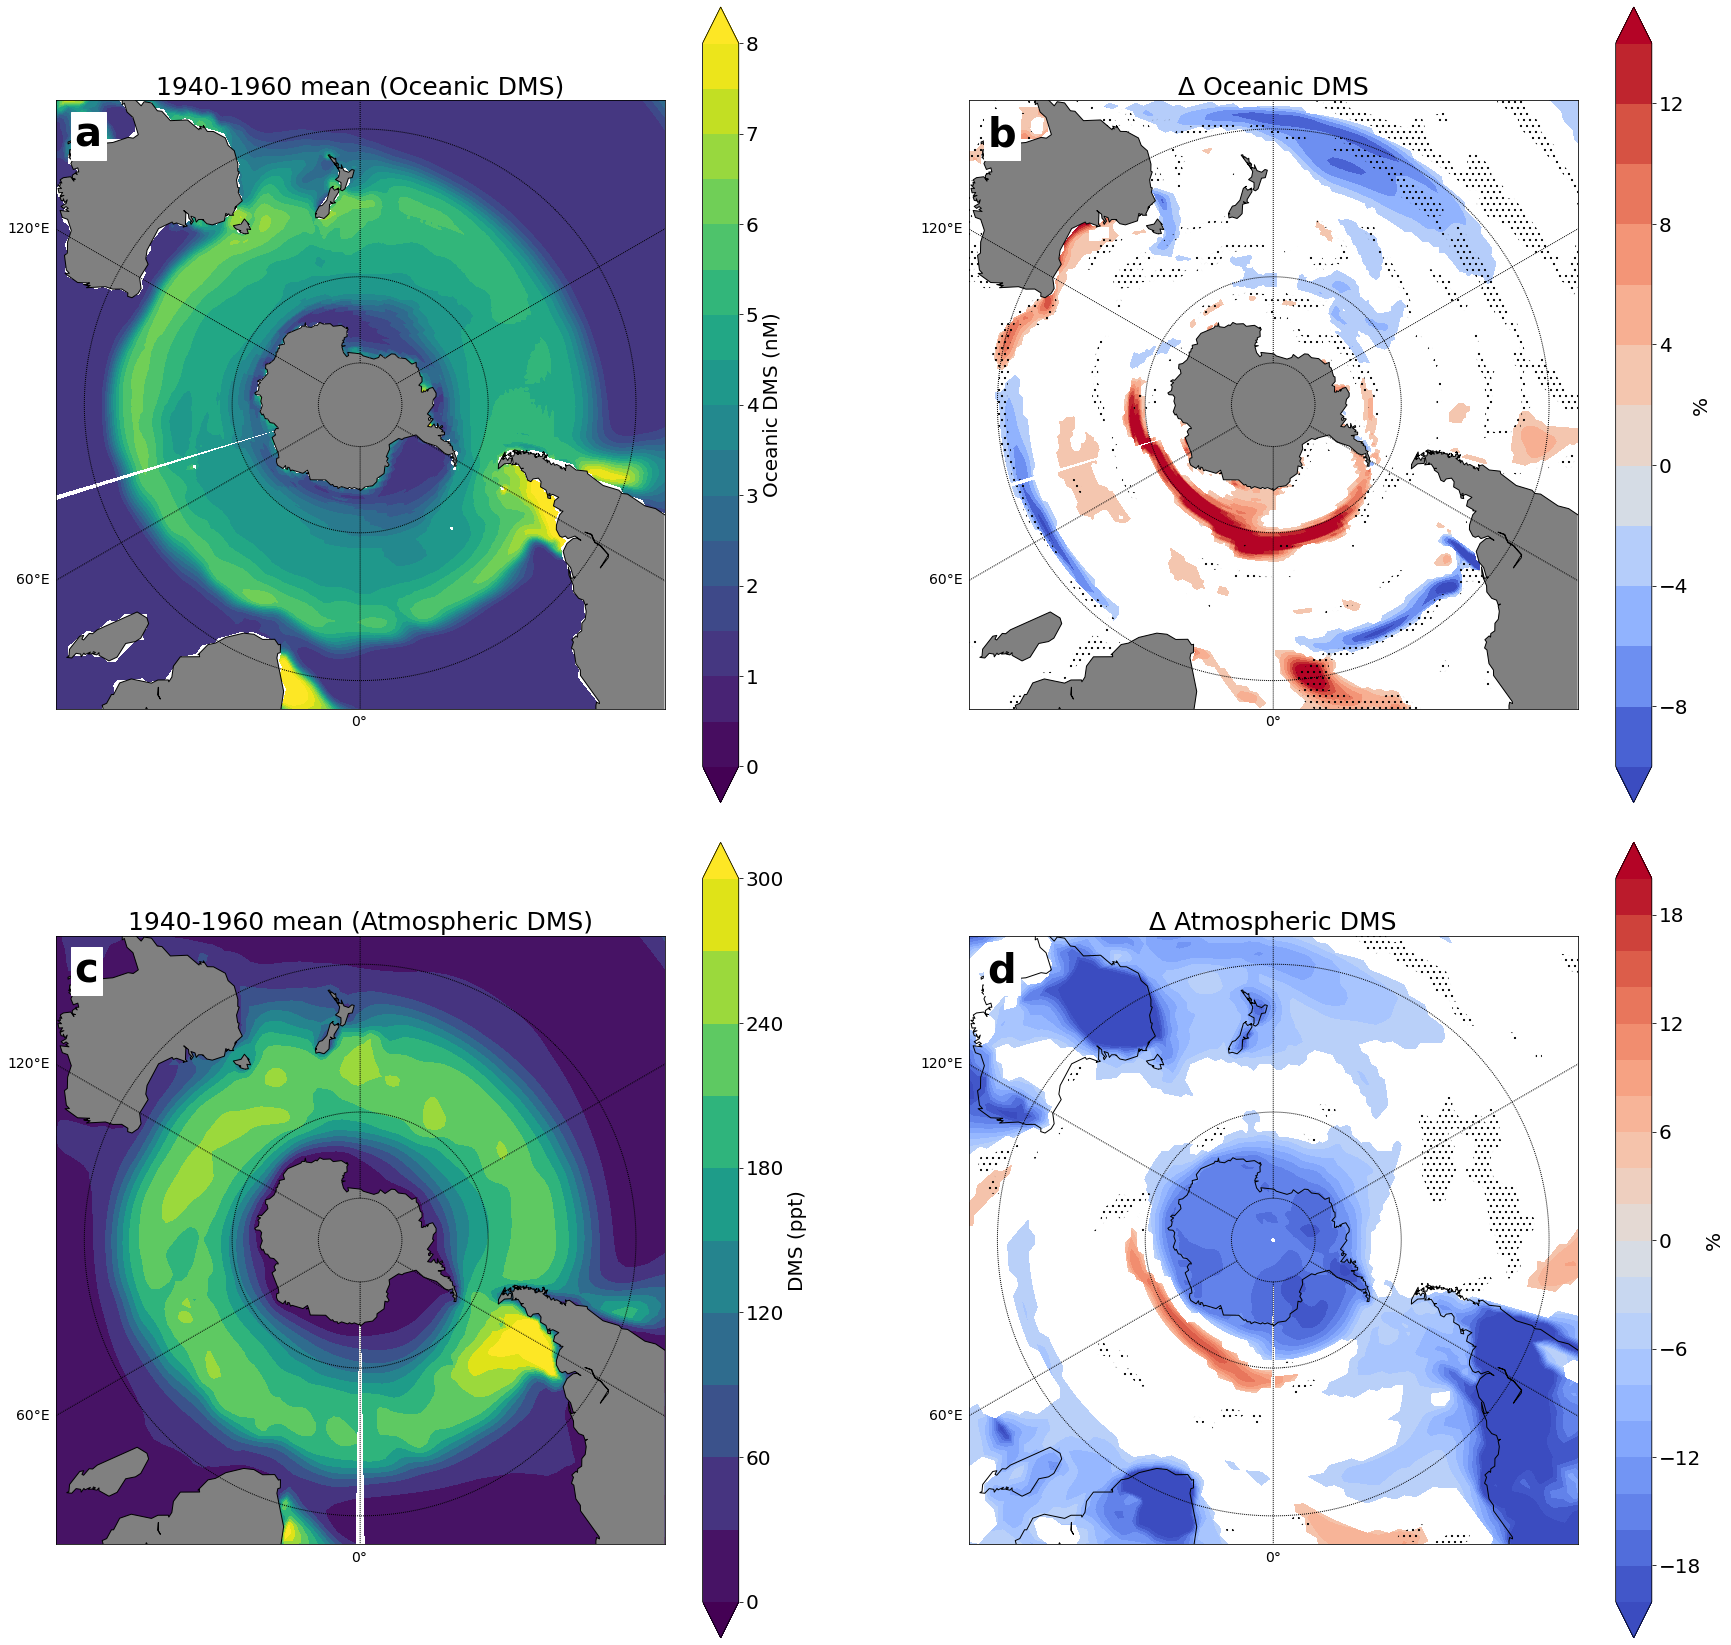

In [206]:
#(rows, columns, position) #  ############################# FIGURE 5 SUPPLIMENTARY #################################
month='SON'
file ='/home/ybh10/CMIP6/UKESM1/Historic/Numpy_Array/Global/Difference/1940_1960_mean/Rel_Diff/{}/'.format(month)
file_dot ='/home/ybh10/CMIP6/UKESM1/Historic/Numpy_Array/Global/Difference/1940_1960_mean/Statistical/{}/'.format(month)
measurement=['ODMS','ODMS','DMS','DMS'] # Fig 5

data_percentage,data_dot,data_clev,data_shift=data_for_figure(measurement,file,file_dot,saves,month,DJF_shift_abs,SON_shift_abs)


#clevs_dms=np.arange(-50,40+5,5) # DMS
# clevs_odms=np.arange(-2,1.5,0.1) # DJF
# clevs_odms_son=np.arange(-.5,0.35,0.05) # SON

orig_cmap = matplotlib.cm.coolwarm

shifted_cmap_dms = shiftedColorMap(orig_cmap, start=0, midpoint=0.5, stop=0.9, name='shifted')

shifted_cmap_odms = shiftedColorMap(orig_cmap, start=0, midpoint=0.5, stop=.85, name='shifted')
###################################################### FOR ROUTE 2 ##############################
fig = plt.figure(figsize=(30,30), edgecolor='w')
fig.subplots_adjust(hspace=0.05)
n=2; c=2
ax1 = fig.add_subplot(n,c,1); ax2 = fig.add_subplot(n,c,2); ax3 = fig.add_subplot(n,c,3);ax4 = fig.add_subplot(n,c,4)#;ax5 = fig.add_subplot(n,c,5);ax6 = fig.add_subplot(n,c,6)
axes=[ax1,ax2,ax3,ax4]#,ax5,ax6]


a=np.nanmean(DJF_global_var[od][:,90:111],axis=(0))*ODMS_nm # DMS Pre-ODC
b=data_percentage[0] # Rel Diff dms
c=np.nanmean(DJF_global_var[dm][:,90:111],axis=(0))*DMS_ppt # SSA pre-odc
d=data_percentage[2] # Rel Diff ssa

data_sup=[a,b,c,d]
#data_stats=[data_dot[1],data_dot[3],data_dot[2],data_dot[1],data_dot[3],data_dot[2]]

#units=['Column Ozone (DU)','SW (W $m^-$$^2$)','Oceanic DMS (nM)','Westerly Wind (m $s^-$$^1$)','DMS ppt', 'AOD (550 nm)']#,'RF-CS (W $m^-$$^2$)']
units=['Oceanic DMS (nM)','%','DMS (ppt)','%']#,'RF-CS (W $m^-$$^2$)']
measurement=['Oceanic DMS','Oceanic DMS','Atmospheric DMS','Atmospheric DMS']
clevs_dms=np.arange(0,300+30,30) # DMS
clevs_odms=np.arange(0,8+.5,.5) # DMS

clevs_dms_djf=np.arange(-20,20+2,2) # DMS
clevs_odms_djf=np.arange(-10,14+2,2) # DMS

clevy=[clevs_odms,clevs_odms_djf,clevs_dms,clevs_dms_djf]

orig_cmap = matplotlib.cm.coolwarm
shifted_cmap_DJF_DMS = shiftedColorMap(orig_cmap, start=0.0, midpoint=0.5, stop=1, name='shifted')
shifted_cmap_DJF_ODMS = shiftedColorMap(orig_cmap, start=0.0, midpoint=0.4, stop=1, name='shifted')


shifts=[data_shift[1],shifted_cmap_DJF_ODMS,data_shift[2],shifted_cmap_DJF_DMS]
lonmesh,latmesh  = np.meshgrid(lons,lats)
latitudes=[olat.data,olat.data,latmesh,latmesh]#,olat.data,olat.data,latmesh,latmesh,latmesh]
longitudes=[olon.data,olon.data,lonmesh,lonmesh]

number=['a','b','c','d']
Dates=np.arange(1950,2015,1); lat_sh=lats[0:48]
count=[0,2,1,3]
for ax,mapy,sig_dot,clev,shift,title,unit,num,counts,lony,laty in  zip(axes,data_sup,data_dot,clevy,shifts,measurement,units,number,count,longitudes,latitudes):
    ax.grid(linestyle='--',alpha=0.5)
    mapy=np.nanmean(mapy,axis=(0))
    sig_dot=np.nanmean(sig_dot[145:165],axis=(0))
    map_ax1 = Basemap(projection='spstere',boundinglat=-25, lon_0=0,
                    resolution ='c',ax=ax)

#     x,y  = np.meshgrid(lons,lats)
#     x, y = map_ax1(lonmesh, latmesh) 
#    x,y  = np.meshgrid(lony,laty)
    x, y = map_ax1(lony, laty) 

    #var = np.where(sic>0,np.nan,mapy)#mask sea ice

    meridians = np.arange(0.,360,60.)    
    parallels = np.arange(-90.,90,30.)
    map_ax1.drawcoastlines()
    if counts < 3 !=-1:
        map_ax1.fillcontinents(color='gray')
 #   map_ax1.drawcountries()
    map_ax1.drawmeridians(meridians,labels=[1,0,0,1],fontsize=14)  
    map_ax1.drawparallels(parallels,labels=[True,True,True,True],fontsize=12)
    clevs=np.arange(0.0,200+5,5)
    clevs1=np.arange(-30,30+0.5,0.5)
    t=ax.text(-500000,-15000000,num,color='black',fontsize=40,fontweight='bold')
    t.set_bbox(dict(facecolor='white', edgecolor='white'))

    if title=='Oceanic DMS':

        if counts ==0:
            vari=blank_space(mapy,-1.5,1.5)
            cs=ax.contourf(x,y,mapy,clev,extend='both')
        else:
            vari=blank_space(mapy,-2,2)
            cs=ax.contourf(x,y,vari,clev,cmap=shift,extend='both')
    if title=='Atmospheric DMS': 
        if num == 'c':
            vari=blank_space(mapy,-2,2)
            cs=ax.contourf(x,y,mapy,clev,extend='both')
        else:
            vari=blank_space(mapy,-4,4)
            cs=ax.contourf(x,y,vari,clev,cmap=shift,extend='both')
       
    if counts > 1 :
        ax.set_title("\u0394 {}".format(title),fontsize=25)
#     else:
#         if counts == 2:
#             ax.set_title("\u0394 {}".format(title),fontsize=25)
    else:
        ax.set_title("1940-1960 mean ({})".format(title),fontsize=25)

    cbar=fig.colorbar(cs,ax=ax,extend='both',orientation='vertical')#,ticks = np.arange(-30,30+5,5))
    cbar.set_label('{}'.format(unit),fontsize=20)
    cbar.ax.tick_params(labelsize=20)
    


    if counts >1:
        [m,n] = np.where(sig_dot==1)

        z1 = np.zeros(mapy.shape)
        z1[m,n]=99


        cs3 = ax.contourf(x, y, z1, 1, hatches=['', '..'], alpha=0)

        
plt.show()
#plt.savefig("/home/ybh10/CMIP6/UKESM1/Historic/Plots/PAPER/Fig_5_suppliment_masked_{}.png".format(month),dpi=600,bbox_inches = 'tight')


<ipython-input-21-f636af86f29a>:8: RuntimeWarning: Mean of empty slice
  pre_sea_ice=np.nanmean(sea_ice[:,0:91],axis=(0,1))
<ipython-input-21-f636af86f29a>:9: RuntimeWarning: Mean of empty slice
  post_sea_ice=np.nanmean(sea_ice[:,146:],axis=(0,1))
<ipython-input-21-f636af86f29a>:49: RuntimeWarning: Mean of empty slice
  SON_Sea_Ice_5565=np.nanmean(np.load(file+'Sea_Ice.npy')[45:65],axis=(0))
<ipython-input-21-f636af86f29a>:50: RuntimeWarning: Mean of empty slice
  SON_Sea_Ice_4555=np.nanmean(np.load(file+'Sea_Ice.npy')[45:55],axis=(0))
<ipython-input-21-f636af86f29a>:51: RuntimeWarning: Mean of empty slice
  SON_Sea_Ice_3545=np.nanmean(np.load(file+'Sea_Ice.npy')[35:45],axis=(0))
<ipython-input-21-f636af86f29a>:52: RuntimeWarning: Mean of empty slice
  SON_Sea_Ice_2535=np.nanmean(np.load(file+'Sea_Ice.npy')[25:35],axis=(0))
<ipython-input-21-f636af86f29a>:53: RuntimeWarning: Mean of empty slice
  SON_Sea_Ice_1525=np.nanmean(np.load(file+'Sea_Ice.npy')[15:25],axis=(0))
<ipython-input-2

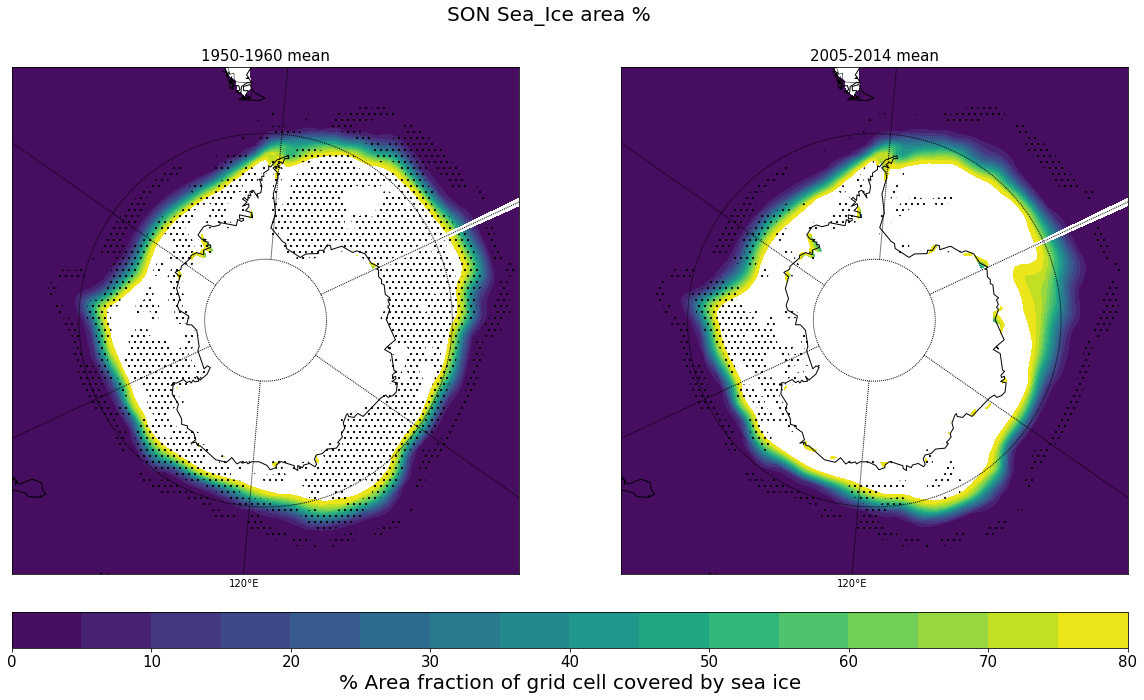

In [21]:
import imageio
zeros=np.zeros((180,360))
#rmse=[rms_lana,rms_medusa,0]
rmse=[0,0,0]

title=['1900 - 1902','1994-1996','Post Ind minus Pre Ind']
sea_ice=SON_global_var[seaice]
pre_sea_ice=np.nanmean(sea_ice[:,0:91],axis=(0,1))
post_sea_ice=np.nanmean(sea_ice[:,146:],axis=(0,1))
#(rows, columns, position) #
            #    1  2  3  4
            #    5  6  7  8
            #    9 10 11 12

## R2_Abs_Diff is from Route 2 absolute difference
## R2_Rel_Diff is from Route 2 relative difference
# Six dimentions: numbers=[oz,RSDSCS,od,w,dm,ad]            


# cbar_max = 200.0
# cbar_min = 0.0
# cbar_step = 5.0
#surface_downwelling_shortwave_flux_in_air


texts=['DMS - SON']#,'RF - DJF']
#units=['Column Ozone (DU)','SW (W $m^-$$^2$)','Oceanic DMS (nM)','Westerly Wind (m $s^-$$^1$)','DMS ppt', 'AOD (550 nm)']#,'RF-CS (W $m^-$$^2$)']
unit=['%']#,'RF-CS (W $m^-$$^2$)']


variable='Sea Ice'


Dates=np.arange(1950,2015,1); lat_sh=lats[0:48]


orig_cmap = matplotlib.cm.seismic

clevs2=np.arange(-4,2,0.5)# Wind

# sea_ice=SON_global_var[seaice]
# sea_ice=np.nanmean(sea_ice,axis=0)

file ='/home/ybh10/CMIP6/UKESM1/Historic/Numpy_Array/Global/Difference/1940_1960_mean/Rel_Diff/SON/'
file_dot ='/home/ybh10/CMIP6/UKESM1/Historic/Numpy_Array/Global/Difference/1940_1960_mean/Statistical/SON/'
SON_Sea_Ice_dot=np.nanmean(np.load(file_dot+'Sea_Ice.npy')[155:165],axis=(0))
SON_Sea_Ice_dot_pre=np.nanmean(np.load(file_dot+'Sea_Ice.npy')[100:110],axis=(0))

SON_Sea_Ice_5565=np.nanmean(np.load(file+'Sea_Ice.npy')[45:65],axis=(0))
SON_Sea_Ice_4555=np.nanmean(np.load(file+'Sea_Ice.npy')[45:55],axis=(0))
SON_Sea_Ice_3545=np.nanmean(np.load(file+'Sea_Ice.npy')[35:45],axis=(0))
SON_Sea_Ice_2535=np.nanmean(np.load(file+'Sea_Ice.npy')[25:35],axis=(0))
SON_Sea_Ice_1525=np.nanmean(np.load(file+'Sea_Ice.npy')[15:25],axis=(0))
SON_Sea_Ice_pre=np.nanmean(np.load(file+'Sea_Ice.npy')[0:20],axis=(0))
sea_icey=[SON_Sea_Ice_pre,SON_Sea_Ice_5565]
sea_icy_dot=[SON_Sea_Ice_dot_pre,SON_Sea_Ice_dot]
shifted_cmap_wind = shiftedColorMap(orig_cmap, start=0.35, midpoint=0.52, stop=1, name='shifted')
shifted_cmap_dms = shiftedColorMap(orig_cmap, start=0, midpoint=0.4, stop=.65, name='shifted')
# pre_dmsssa=np.nanmean(dms_ssa[90:111],axis=0)
# post_dmsssa=np.nanmean(dms_ssa[145:165],axis=0)
# dmsssa=[pre_dmsssa,post_dmsssa]

fig = plt.figure(figsize=(20,20), edgecolor='w')
n=1
m=2
ax1 = fig.add_subplot(n,m,1); ax2 = fig.add_subplot(n,m,2)#;ax3 = fig.add_subplot(n,m,3); ax4 = fig.add_subplot(n,m,4)
#ax5 = fig.add_subplot(n,m,5); ax6 = fig.add_subplot(n,m,6)
axe=[ax1,ax2]
titl=['1950-1960','2005-2014']
#lons,lats=np.meshgrid(lon,lat)
#   clevs2=np.arange(-65,30+5,5) # ODMS
#mapy=(mapy[i])
for ax,sea_lyfe,meaned_year,dotty in zip(axe,sea_icey,titl,sea_icy_dot):
    ax.grid(linestyle='--',alpha=0.5)

    map_ax1 = Basemap(projection='spstere',boundinglat=-50, lon_0=180+(-100+-30)/2,
                    resolution ='c',ax=ax)
    x,y  = np.meshgrid(lons,lats)
    x, y = map_ax1(x, y) 
    #  x, y = map_ax1(olon.data, olat.data) 
    lonpt, latpt = map_ax1(x,y,inverse=True)
    meridians = np.arange(0.,360,60.)    
    parallels = np.arange(-90.,90,30.)
    map_ax1.drawcoastlines()

    map_ax1.drawcountries()
    map_ax1.drawmeridians(meridians,labels=[0,0,0,1],fontsize=10)  
    map_ax1.drawparallels(parallels,labels=[1,0,0,0],fontsize=10)
    clevs2=np.arange(0,80+5,5)
    #clevs2=np.arange(0,1)
    cs=ax.contourf(x,y,sea_lyfe,clevs2,cmap='viridis')#,cmap='b')
    # ax.contour(x,y,SON_Sea_Ice_4555,clevs2)#,cmap='blue')
    # ax.contour(x,y,SON_Sea_Ice_3545,clevs2)#,cmap='yellow')
    # ax.contour(x,y,SON_Sea_Ice_2535,clevs2)#,cmap='orange')
    # ax.contour(x,y,SON_Sea_Ice_1525,clevs2)#,cmap='green')
 #   ax.contour(x,y,Sea_Lyfe,clevs2)#,cmap='red')
    ax.set_title("{} mean".format(meaned_year),fontsize=15)
    # cbar.ax.tick_params(labelsize=20)
    [m,n] = np.where(dotty==1)
    z1 = np.zeros(dotty.shape)
    z1[m,n]=99

    cs3 = ax.contourf(x, y, z1, 1, hatches=['', '..'], alpha=0)

cax = fig.add_axes([0.125, 0.275, 0.775, 0.025]) # Left, Bottom, Width, Height
#cbar=fig.colorbar(cs,fraction=0.046, pad=0.04)
cbar=fig.colorbar(cs, cax=cax,extend='both',orientation='horizontal')#,ticks = np.arange(0,0.6+0.04,0.04))
        # ax1.set_yticklabels(y_labels)
cbar.set_label('% Area fraction of grid cell covered by sea ice',fontsize=20)
cbar.ax.tick_params(labelsize=15)

plt.suptitle("SON Sea_Ice area % ",x=.5,y=.72,fontsize=20)
#plt.suptitle('Zonal % Mean: Yearly Difference of 2004-2014 (mean) minus climatology (1850 - 1940)',x=.7,y=.9,fontsize=14,weight="bold")
# cbar=fig.colorbar(cs,ax=ax,extend='both',orientation='vertical')#,ticks = np.arange(-30,30+5,5))
# cbar.set_label('%',fontsize=15)
plt.show()

#plt.savefig("/home/ybh10/CMIP6/UKESM1/Historic/Plots/Zonal/Zonal/Sea_Ice_change_SON.png",dpi=600,bbox_inches = 'tight')

#plt.savefig("/home/ybh10/CMIP6/UKESM1/Historic/Plots/Animation/Plots_for_{}/{}_{}.png".format(variable,variable,year),dpi=600,bbox_inches = 'tight')
## Define the location of directory ###   


In [38]:
import imageio
zeros=np.zeros((180,360))
#rmse=[rms_lana,rms_medusa,0]
rmse=[0,0,0]

title=['1900 - 1902','1994-1996','Post Ind minus Pre Ind']

#(rows, columns, position) #
            #    1  2  3  4
            #    5  6  7  8
            #    9 10 11 12

## R2_Abs_Diff is from Route 2 absolute difference
## R2_Rel_Diff is from Route 2 relative difference
# Six dimentions: numbers=[oz,RSDSCS,od,w,dm,ad]            


# cbar_max = 200.0
# cbar_min = 0.0
# cbar_step = 5.0
#surface_downwelling_shortwave_flux_in_air


texts=['DMS - SON']#,'RF - DJF']
#units=['Column Ozone (DU)','SW (W $m^-$$^2$)','Oceanic DMS (nM)','Westerly Wind (m $s^-$$^1$)','DMS ppt', 'AOD (550 nm)']#,'RF-CS (W $m^-$$^2$)']
unit=['%']#,'RF-CS (W $m^-$$^2$)']


variable='RSDSCS'


Dates=np.arange(1950,2015,1); lat_sh=lats[0:48]


orig_cmap = matplotlib.cm.seismic

clevs2=np.arange(-4,2,0.5)# Wind

# sea_ice=SON_global_var[seaice]
# sea_ice=np.nanmean(sea_ice,axis=0)

file ='/home/ybh10/CMIP6/UKESM1/Historic/Numpy_Array/Global/Difference/1940_1960_mean/SON/
file_dot ='/home/ybh10/CMIP6/UKESM1/Historic/Numpy_Array/Global/Difference/1940_1960_mean/Statistical/SON/
SON_Sea_Ice_dot=np.load(file_dot+'Sea_Ice.npy')
SON_Sea_Ice=np.load(file+'Sea_Ice.npy')

shifted_cmap_wind = shiftedColorMap(orig_cmap, start=0.35, midpoint=0.52, stop=1, name='shifted')
shifted_cmap_dms = shiftedColorMap(orig_cmap, start=0, midpoint=0.4, stop=.65, name='shifted')
for i,year in  zip(range(0,len(SON_Se)),Dates):
    fig = plt.figure(figsize=(20,20), edgecolor='w')
    ax = fig.add_subplot(1,1,1)
    ax.grid(linestyle='--',alpha=0.5)
    #lons,lats=np.meshgrid(lon,lat)
 #   clevs2=np.arange(-65,30+5,5) # ODMS
    #clevs2=np.arange(0,100+25,25)
    #mapy=(mapy[i])
    map_ax1 = Basemap(projection='spstere',boundinglat=-30, lon_0=180+(-100+-30)/2,
                    resolution ='c',ax=ax)
    x,y  = np.meshgrid(lons,lats)
    x, y = map_ax1(x, y) 
  #  x, y = map_ax1(olon.data, olat.data) 
    lonpt, latpt = map_ax1(x,y,inverse=True)
    meridians = np.arange(0.,360,60.)    
    parallels = np.arange(-90.,90,30.)
    map_ax1.drawcoastlines()
    
    map_ax1.drawcountries()
    map_ax1.drawmeridians(meridians,labels=[0,0,0,1],fontsize=10)  
    map_ax1.drawparallels(parallels,labels=[1,0,0,0],fontsize=10)
    celv=1
    #cs = ax1.contourf(lon_o,lat_o,medusa_mean,clevs,cmap='viridis')
  # if titl.find (title[0]) !=-1: 
   # sea_ice[i][sea_ice[i] < 1] = np.nan

    
    cs=ax.contourf(x,y,SON_RSDSCS[i],clevs2,cmap=shifted_cmap_dms,extend='both')
 #   ax.contour(x,y,sea_ice[160],1)
#    plt.suptitle('Zonal % Mean: Yearly Difference of 2004-2014 (mean) minus climatology (1850 - 1940)',x=.7,y=.9,fontsize=14,weight="bold")
 #   sea_ice[sea_ice<0.1]==np.nan
    ax.set_title("SON {} Relative Difference in {} minus climatology (1850 - 1940)".format(variable,year),fontsize=15)
 #  if titl.find (title[1]) !=-1: 
  #  ax1.contourf(x,y,mapy,clevs,cmap='viridis',extend='both')
   #    ax1.set_title("Averaged {}  [90\N{DEGREE SIGN}S - 60\N{DEGREE SIGN}S mean = {:.2f}]".format(titl,meany),fontsize=10)
  # if titl.find (title[2]) !=-1: 
       # mapy[mapy<-30]=-30
   # cs1=ax2.contourf(x,y,mapy,clevs1,cmap='seismic',extend='both')
    #   ax2.set_title("Averaged {}  [90\N{DEGREE SIGN}S - 60\N{DEGREE SIGN}S mean = {:.2f}]".format(titl,meany),fontsize=10)
    cbar=fig.colorbar(cs,ax=ax,extend='both',orientation='vertical')#,ticks = np.arange(-30,30+5,5))
    cbar.set_label('%',fontsize=15)
    cbar.ax.tick_params(labelsize=20)
    plt.show()
    end

    plt.savefig("/home/ybh10/CMIP6/UKESM1/Historic/Plots/Animation/Plots_for_{}/{}_{}.png".format(variable,variable,year),dpi=600,bbox_inches = 'tight')
    ## Define the location of directory ###   
files=sorted(glob.glob('/home/ybh10/CMIP6/UKESM1/Historic/Plots/Animation/Plots_for_{}/*.png'.format(variable)))    
year=np.arange(1950,2015,1)    
images=[]
### Loop all the .png files in that directroy ###
for file_name in (files):
    images.append(imageio.imread(file_name))
kargs = { 'duration': 0.2 }
    
imageio.mimsave('/home/ybh10/CMIP6/UKESM1/Historic/Plots/Animation/{}_1950_2014.gif'.format(variable), images,**kargs)

SyntaxError: EOL while scanning string literal (<ipython-input-38-377187a5d337>, line 42)

<ipython-input-85-1a49cbf2ec31>:2: RuntimeWarning: Mean of empty slice
  pre_sea_ice=np.nanmean(sea_ice[:,90:111],axis=(0,1))
<ipython-input-85-1a49cbf2ec31>:3: RuntimeWarning: Mean of empty slice
  post_sea_ice=np.nanmean(sea_ice[:,145:],axis=(0,1))


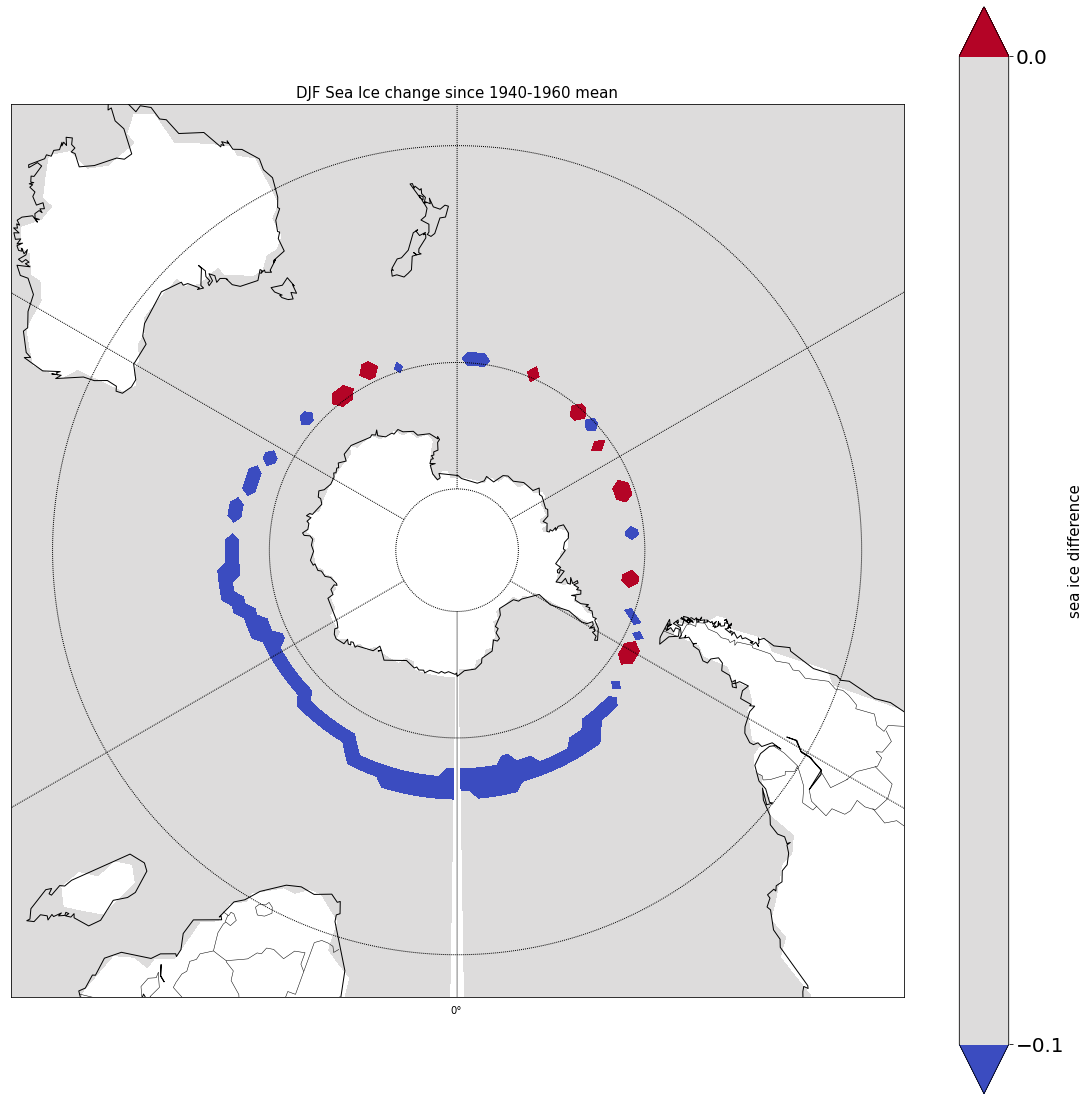

In [85]:
sea_ice=DJF_global_var[seaice]
pre_sea_ice=np.nanmean(sea_ice[:,90:111],axis=(0,1))
post_sea_ice=np.nanmean(sea_ice[:,145:],axis=(0,1))
post = np.where(post_sea_ice>0,1,post_sea_ice)#mask sea ice
pre = np.where(pre_sea_ice>0,1,pre_sea_ice)#mask sea ice
diff=post-pre
year=np.arange(1950,2015,1)
i=36
fig = plt.figure(figsize=(20,20), edgecolor='w')
ax = fig.add_subplot(1,1,1)
ax.grid(linestyle='--',alpha=0.5)
#lons,lats=np.meshgrid(lon,lat)
ice=sea_ice
#   clevs2=np.arange(-65,30+5,5) # ODMS
clevs2=np.arange(0,100+25,25)
#mapy=(mapy[i])
map_ax1 = Basemap(projection='spstere',boundinglat=-25, lon_0=0,
                    resolution ='c',ax=ax)
x,y  = np.meshgrid(lons,lats)
x, y = map_ax1(x, y) 
#  x, y = map_ax1(olon.data, olat.data) 
lonpt, latpt = map_ax1(x,y,inverse=True)
meridians = np.arange(0.,360,60.)    
parallels = np.arange(-90.,90,30.)
map_ax1.drawcoastlines()

map_ax1.drawcountries()
map_ax1.drawmeridians(meridians,labels=[0,0,0,1],fontsize=10)  
map_ax1.drawparallels(parallels,labels=[1,0,0,0],fontsize=10)
celv=1
#cs = ax1.contourf(lon_o,lat_o,medusa_mean,clevs,cmap='viridis')
# if titl.find (title[0]) !=-1: 
#sea_ice

# pre_sea_ice[pre_sea_ice < 1] = np.nan
# post_sea_ice[post_sea_ice < 1] = np.nan
clevs=np.arange(-0.1,0.1,0.1)
cs=ax.contourf(x,y,diff,clevs,extend='both',cmap='coolwarm')
#cs=ax.contourf(x,y,post_sea_ice,clevs2,cmap='Reds',extend='both')
#   ax.contour(x,y,sea_ice[160],1)
#    plt.suptitle('Zonal % Mean: Yearly Difference of 2004-2014 (mean) minus climatology (1850 - 1940)',x=.7,y=.9,fontsize=14,weight="bold")
#   sea_ice[sea_ice<0.1]==np.nan
ax.set_title("DJF Sea Ice change since 1940-1960 mean",fontsize=15)
#  if titl.find (title[1]) !=-1: 
#  ax1.contourf(x,y,mapy,clevs,cmap='viridis',extend='both')
#    ax1.set_title("Averaged {}  [90\N{DEGREE SIGN}S - 60\N{DEGREE SIGN}S mean = {:.2f}]".format(titl,meany),fontsize=10)
# if titl.find (title[2]) !=-1: 
   # mapy[mapy<-30]=-30
# cs1=ax2.contourf(x,y,mapy,clevs1,cmap='seismic',extend='both')
#   ax2.set_title("Averaged {}  [90\N{DEGREE SIGN}S - 60\N{DEGREE SIGN}S mean = {:.2f}]".format(titl,meany),fontsize=10)
cbar=fig.colorbar(cs,ax=ax,extend='both',orientation='vertical')#,ticks = np.arange(-1,1,1))
cbar.set_label('sea ice difference',fontsize=15)
cbar.ax.tick_params(labelsize=20)
#plt.show()
plt.savefig("/home/ybh10/CMIP6/UKESM1/Historic/Plots/PAPER/SEA_ICE_DIFFERENCE_DJF.png",dpi=600,bbox_inches = 'tight')


In [152]:
# post_oxidation=xr.open_dataset('Raw_Data/chegpso4_AERmon_UKESM1-0-LL_historical_r11i1p1f2_gn_200001-201412.nc').chegpso4
# pre_oxidation=xr.open_dataset('Raw_Data/chegpso4_AERmon_UKESM1-0-LL_historical_r11i1p1f2_gn_190001-194912.nc').chegpso4
# #weights = post_oxidation.groupby('time.season') / post_oxidation.astype(float).groupby('time.season').sum()
# season_post=post_oxidation.groupby('time.season').mean('time')
# season_pre=pre_oxidation.groupby('time.season').mean("time")

In [153]:
# SON_DIFF=season_post[3]-season_pre[3]

NameError: name 'SON_DIFF' is not defined

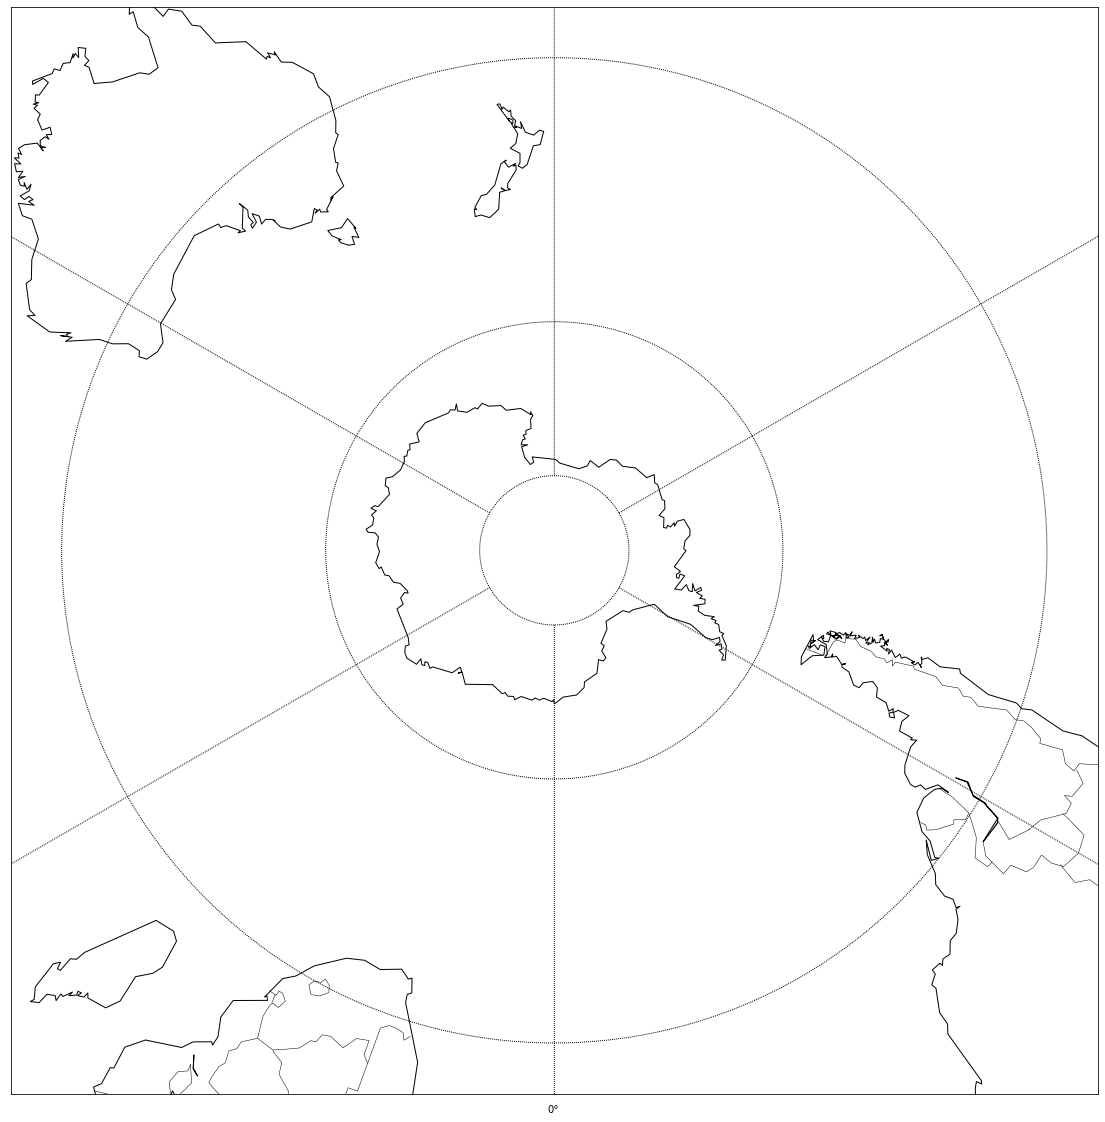

In [262]:
SON_DIFF[0]
fig = plt.figure(figsize=(20,20), edgecolor='w')
ax = fig.add_subplot(1,1,1)
ax.grid(linestyle='--',alpha=0.5)
#lons,lats=np.meshgrid(lon,lat)
ice=sea_ice
#   clevs2=np.arange(-65,30+5,5) # ODMS
clevs2=np.arange(0,100+25,25)
#mapy=(mapy[i])
map_ax1 = Basemap(projection='spstere',boundinglat=-25, lon_0=0,
                    resolution ='c',ax=ax)
x,y  = np.meshgrid(lons,lats)
x, y = map_ax1(x, y) 
#  x, y = map_ax1(olon.data, olat.data) 
lonpt, latpt = map_ax1(x,y,inverse=True)
meridians = np.arange(0.,360,60.)    
parallels = np.arange(-90.,90,30.)
map_ax1.drawcoastlines()

map_ax1.drawcountries()
map_ax1.drawmeridians(meridians,labels=[0,0,0,1],fontsize=10)  
map_ax1.drawparallels(parallels,labels=[1,0,0,0],fontsize=10)
celv=1

cmap = matplotlib.cm.coolwarm
cmap.set_under(color='black')

clevs=np.arange(-7,7+0.5,0.5)

empty=np.zeros((144,192))
diff=np.where(SON_DIFF[0]*1e16>20,np.nan,SON_DIFF[0]*1e16)
masked=np.ma.masked_where(SON_DIFF[0]*1e16>20,SON_DIFF[0]*1e16)


cs=ax.contourf(x,y,diff,clevs,cmap=cmap)
#plt.contourf(masked.mask,color='gray')
#ax.contourf(x,y,np.where(diff==np.nan))
#ax.contourf(diff
#pre = np.where(pre_sea_ice>0,6969,pre_sea_ice)#mask sea ice
#plt.contourf(x,y,empty,color="red")

#cmap.set_bad(color='gray')
ax.set_title("SON CHEG Modern day minus Pre-ODC (1850 - 1940)",fontsize=15)
#cmap.set_bad('gray',1.)

cbar=fig.colorbar(cs,ax=ax,extend='both',orientation='vertical')#,ticks = np.arange(-30,30+5,5))
cbar.set_label('%',fontsize=15)
cbar.ax.tick_params(labelsize=20)
plt.show()

<ipython-input-81-ddc941f23224>:14: RuntimeWarning: Mean of empty slice
  sea_ice=np.nanmean(DJF_global_var[seaice],axis=0)
<ipython-input-81-ddc941f23224>:15: RuntimeWarning: Mean of empty slice
  ocean_sea_ice=np.nanmean(DJF_global_var[o_seaice],axis=0)


DMS
DMS
-----------
DMS
DMS
-----------
DMS_SSA
DMS_SSA
-----------
SSAMMR
SSAMMR
-----------


<ipython-input-81-ddc941f23224>:69: RuntimeWarning: Mean of empty slice
  sic=np.nanmean(sea_ice[90:111],axis=(0))
<ipython-input-81-ddc941f23224>:69: RuntimeWarning: Mean of empty slice
  sic=np.nanmean(sea_ice[90:111],axis=(0))
<ipython-input-81-ddc941f23224>:69: RuntimeWarning: Mean of empty slice
  sic=np.nanmean(sea_ice[90:111],axis=(0))
<ipython-input-81-ddc941f23224>:69: RuntimeWarning: Mean of empty slice
  sic=np.nanmean(sea_ice[90:111],axis=(0))


DMS mean = -3.0754656471611552
DMS MAX = 61.150925159454346
DMS min = -43.76666396856308


<ipython-input-81-ddc941f23224>:69: RuntimeWarning: Mean of empty slice
  sic=np.nanmean(sea_ice[90:111],axis=(0))


/SSA mean = 7.160914639211902
/SSA MAX = 91.20141075207637
/SSA min = -18.273942722724037


<ipython-input-81-ddc941f23224>:69: RuntimeWarning: Mean of empty slice
  sic=np.nanmean(sea_ice[90:111],axis=(0))


DMS/SSA mean = -8.393028065666066
DMS/SSA MAX = 11.042802634577189
DMS/SSA min = -43.80915612959636


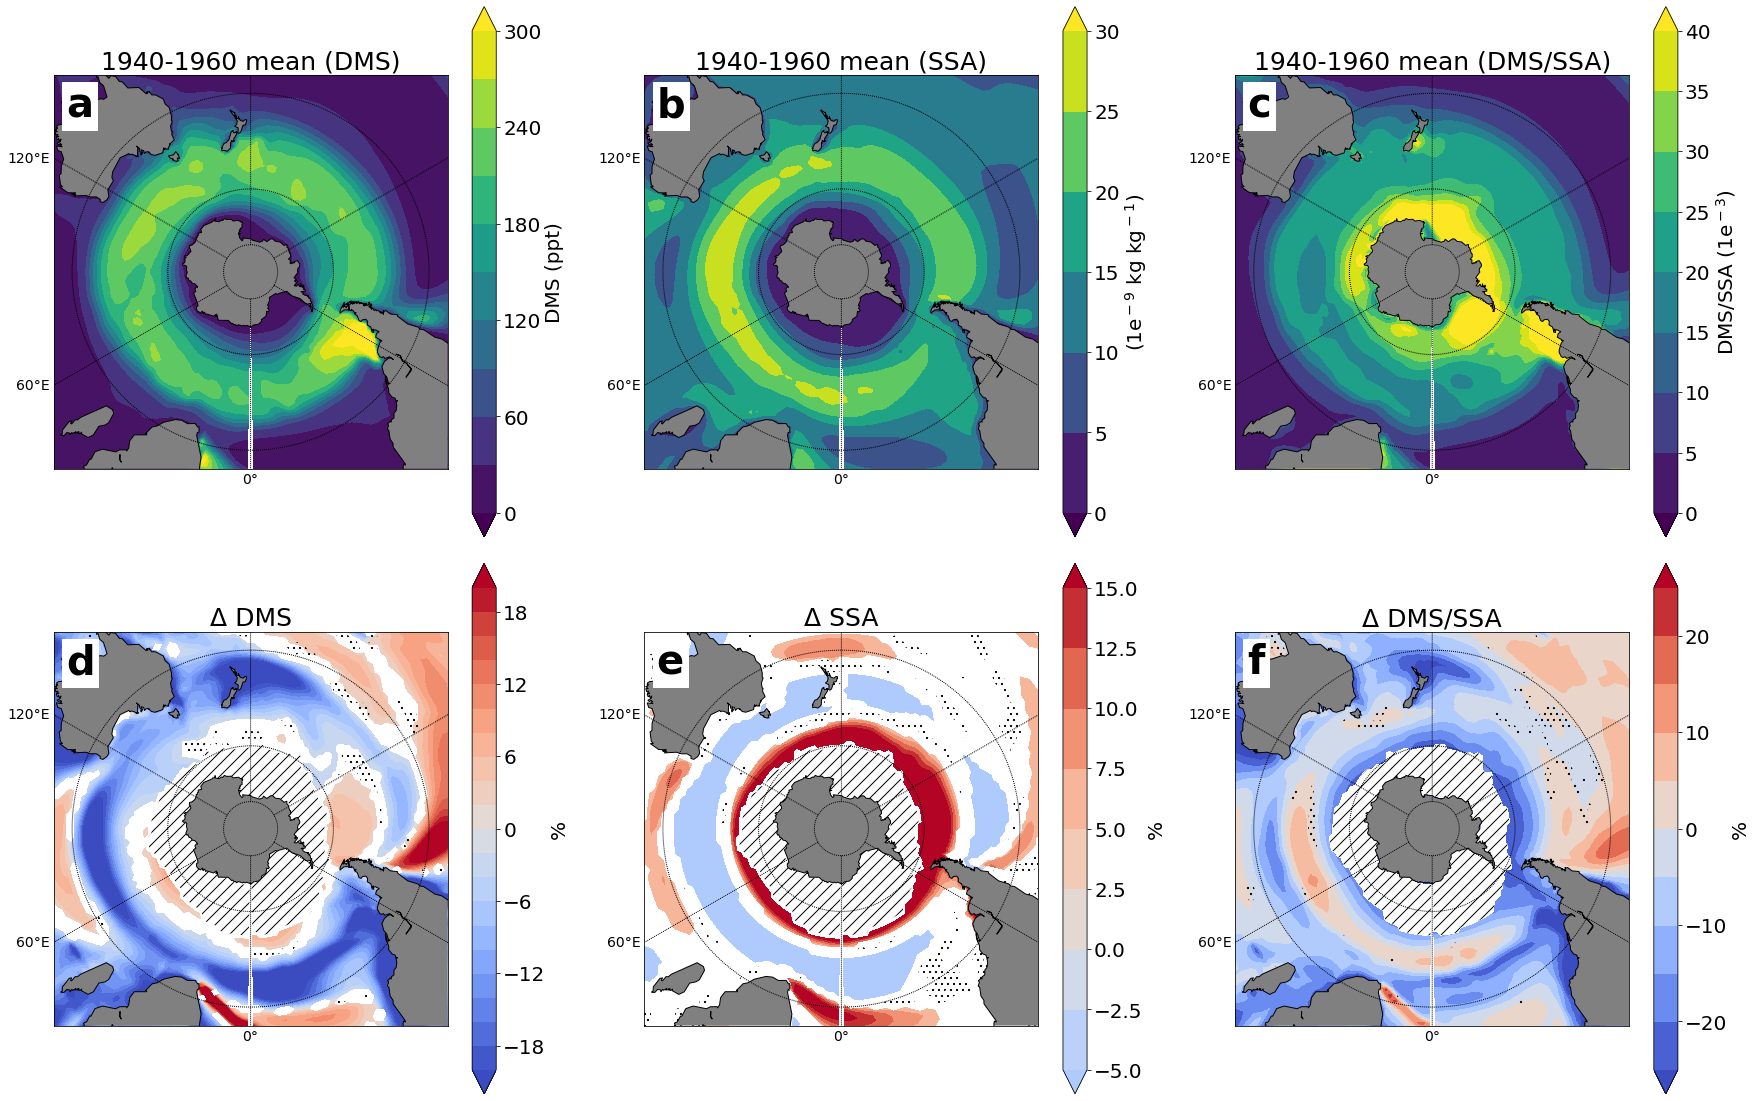

In [81]:
###################################################################################################
###################################################################################################
############################# FIGURE 4 SUPPLIMENTARY  W/ DMS:SSA ##################################
###################################################################################################
###################################################################################################
#(rows, columns, position) #  ############################# FIGURE 5 SUPPLIMENTARY #################################
month='DJF'
file ='/home/ybh10/CMIP6/UKESM1/Historic/Numpy_Array/Global/Difference/1940_1960_mean/Rel_Diff/{}/'.format(month)
file_dot ='/home/ybh10/CMIP6/UKESM1/Historic/Numpy_Array/Global/Difference/1940_1960_mean/Statistical/{}/'.format(month)
measurement=['DMS','DMS','DMS_SSA','SSAMMR'] # Fig 4 w/ dms/ssa
seaice=18

if month == 'DJF':
    sea_ice=np.nanmean(DJF_global_var[seaice],axis=0)
    ocean_sea_ice=np.nanmean(DJF_global_var[o_seaice],axis=0)
else:
    sea_ice=np.nanmean(SON_global_var[seaice],axis=0)
    ocean_sea_ice=np.nanmean(SON_global_var[o_seaice],axis=0)
    
data_percentage,data_dot,data_clev,data_shift=data_for_figure(measurement,file,file_dot,saves,month,DJF_shift_abs,SON_shift_abs)


fig = plt.figure(figsize=(30,20), edgecolor='w')
fig.subplots_adjust(hspace=0.05)
n=2; c=3
ax1 = fig.add_subplot(n,c,1); ax2 = fig.add_subplot(n,c,2); ax3 = fig.add_subplot(n,c,3);ax4 = fig.add_subplot(n,c,4);ax5 = fig.add_subplot(n,c,5);ax6 = fig.add_subplot(n,c,6)
axes=[ax1,ax2,ax3,ax4,ax5,ax6]


a=np.nanmean(DJF_global_var[dm][:,90:111],axis=(0))*DMS_ppt # DMS Pre-ODC
b=data_percentage[1][45:65] # Rel Diff dms
c=np.nanmean(DJF_global_var[SSA][:,90:111],axis=(0))*1e9 # SSA pre-odc
d=data_percentage[3][45:65] # Rel Diff ssa
e=np.nanmean(DJF_global_var[dm_ssa][:,90:111],axis=(0))*1e3 # DMS/SSA pre-odc
f=data_percentage[2][45:65] # Rel Diff DMS/SSA

data_sup=[a,c,e,b,d,f]
data_stats=[data_dot[1],data_dot[3],data_dot[2],data_dot[1],data_dot[3],data_dot[2]]

#units=['Column Ozone (DU)','SW (W $m^-$$^2$)','Oceanic DMS (nM)','Westerly Wind (m $s^-$$^1$)','DMS ppt', 'AOD (550 nm)']#,'RF-CS (W $m^-$$^2$)']
units=['DMS (ppt)','(1e$^-$$^9$ kg kg$^-$$^1$)', 'DMS/SSA (1e$^-$$^3$)','%','%','%']#,'RF-CS (W $m^-$$^2$)']
measurement=['DMS','SSA','DMS/SSA','DMS','SSA','DMS/SSA']
clevs_dms=np.arange(0,300+30,30) # DMS
clevs_ssa=np.arange(0,30+5,5) # 
clevs_h2so4_mean=np.arange(0,40+5,5)
clevs_dms_djf=np.arange(-20,20+2,2) # DMS
clevs_DJF_SSAMMR=np.arange(-5,15+2.5,2.5)
clevs_DJF_H2SO4MMR=np.arange(-4,20+2,2)
clevys_dmsssa_DJF=np.arange(-25,25+5,5)

clevy=[clevs_dms,clevs_ssa,clevs_h2so4_mean,clevs_dms_djf,clevs_DJF_SSAMMR,clevys_dmsssa_DJF]

orig_cmap = matplotlib.cm.coolwarm
shifted_cmap_DJF_DMS = shiftedColorMap(orig_cmap, start=0.0, midpoint=0.5, stop=1, name='shifted')
shifted_cmap_H2SO4MMR = shiftedColorMap(orig_cmap, start=0.35, midpoint=0.32, stop=.9, name='shifted') 
shifted_cmap_SSAMMR = shiftedColorMap(orig_cmap, start=0.35, midpoint=0.57, stop=1, name='shifted')

shifts=[shifted_cmap_DJF_DMS,shifted_cmap_DJF_DMS,shifted_cmap_DJF_DMS,shifted_cmap_DJF_DMS,shifted_cmap_SSAMMR,shifted_cmap_DJF_DMS]
lonmesh,latmesh  = np.meshgrid(lons,lats)
number=['a','b','c','d','e','f']
Dates=np.arange(1950,2015,1); lat_sh=lats[0:48]
count=np.arange(0,7,1)
for ax,mapy,sig_dot,clev,shift,title,unit,num,counts in  zip(axes,data_sup,data_stats,clevy,shifts,measurement,units,number,count):
    ax.grid(linestyle='--',alpha=0.5)
    mapy=np.nanmean(mapy,axis=(0))
    sig_dot=np.nanmean(sig_dot[145:165],axis=(0))
    map_ax1 = Basemap(projection='spstere',boundinglat=-25, lon_0=0,
                    resolution ='c',ax=ax)
    sic=np.nanmean(sea_ice[90:111],axis=(0))

#   x,y  = np.meshgrid(lons,lats)
    x, y = map_ax1(lonmesh, latmesh) 
  #  x,y  = np.meshgrid(lony,laty)

    var = np.where(sic>0,np.nan,mapy)#mask sea ice

    meridians = np.arange(0.,360,60.)    
    parallels = np.arange(-90.,90,30.)
    map_ax1.drawcoastlines()
    map_ax1.fillcontinents(color='gray')
 #   map_ax1.drawcountries()
    map_ax1.drawmeridians(meridians,labels=[1,0,0,1],fontsize=14)  
    map_ax1.drawparallels(parallels,labels=[True,True,True,True],fontsize=12)
    clevs=np.arange(0.0,200+5,5)
    clevs1=np.arange(-30,30+0.5,0.5)
    t=ax.text(-500000,-14500000,num,color='black',fontsize=40,fontweight='bold')
    t.set_bbox(dict(facecolor='white', edgecolor='white'))

    if title=='SSA':
        if counts <2:
            vari=blank_space(mapy,-1.25,1.25)
            cs=ax.contourf(x,y,mapy,clev,extend='both')
        else:
                  
            vari=blank_space(var,-5,5)
            print("/SSA mean = {}".format(np.nanmean(var[15:40,:])))
            print("/SSA MAX = {}".format(np.nanmax(var[15:40,:])))
            print("/SSA min = {}".format(np.nanmin(var[15:40,:])))
            cs=ax.contourf(x,y,vari,clev,cmap=shift,extend='both')
    else: 
        if title=='DMS':
            if counts <2:
                vari=blank_space(mapy,-2,2)
                cs=ax.contourf(x,y,mapy,clev,extend='both')
            else:
                vari=blank_space(var,-2,2)
                print("DMS mean = {}".format(np.nanmean(var[15:40,:])))
                print("DMS MAX = {}".format(np.nanmax(var[15:40,:])))
                print("DMS min = {}".format(np.nanmin(var[15:40,:])))
                cs=ax.contourf(x,y,vari,clev,cmap=shift,extend='both')
        else:
           #if title=='H2SO4':
            if counts == 2:
                vari=blank_space(mapy*1e3,-5,5)
                cs=ax.contourf(x,y,mapy,clev,extend='both')
            else:
                vari=blank_space(var,-2,2)
                print("DMS/SSA mean = {}".format(np.nanmean(var[15:40,:])))
                print("DMS/SSA MAX = {}".format(np.nanmax(var[15:40,:])))
                print("DMS/SSA min = {}".format(np.nanmin(var[15:40,:])))

                cs=ax.contourf(x,y,mapy,clev,cmap=shift,extend='both')
    if counts > 2:
        ax.set_title("\u0394 {}".format(title),fontsize=25)
        sea_ice_mask_data=sea_ice_mask(sic,mapy,x,y,0)
        ax.contourf(x,y,sea_ice_mask_data,cmap=mask_shift,hatches=['//'])
    else:
        ax.set_title("1940-1960 mean ({})".format(title),fontsize=25)
    if title=='Ozone': ########## THIS CODE plots the SEA-ICE MASKING HATCHES #######
        pass
    

            
    cbar=fig.colorbar(cs,ax=ax,extend='both',orientation='vertical')#,ticks = np.arange(-30,30+5,5))
    cbar.set_label('{}'.format(unit),fontsize=20)
    cbar.ax.tick_params(labelsize=20)
    

#         var = np.where(sic>0,np.nan,sig_dot)#mask sea ice
#         [m,n] = np.where(var==1)
#         z1 = np.zeros(var.shape)
#         z1[m,n]=99
#         cs3 = ax.contourf(x, y, z1, 1, hatches=['', '..'], alpha=0)  
    if counts>2 !=-1:
            var = np.where(sic>0,np.nan,sig_dot)#mask sea ice
#         [m,n] = np.where(var==1)
#         z1 = np.zeros(var.shape)
#         z1[m,n]=99
#         cs3 = ax.contourf(x, y, z1, 1, hatches=['', '..'], alpha=0)  
    
            [m,n] = np.where(var==1)

            z1 = np.zeros(mapy.shape)
            z1[m,n]=99


            cs3 = ax.contourf(x, y, z1, 1, hatches=['', '..'], alpha=0)
    

plt.show()
#plt.savefig("/home/ybh10/CMIP6/UKESM1/Historic/Plots/PAPER/Fig_4_suppliment_Masked_{}_DMS_SSA.png".format(month),dpi=600,bbox_inches = 'tight')


<ipython-input-92-f02f3d379569>:15: RuntimeWarning: Mean of empty slice
  sea_ice=np.nanmean(SON_global_var[seaice],axis=0)
<ipython-input-92-f02f3d379569>:16: RuntimeWarning: Mean of empty slice
  ocean_sea_ice=np.nanmean(SON_global_var[o_seaice],axis=0)


ODMS
ODMS
-----------
ODMS
ODMS
-----------
DMS
DMS
-----------


<ipython-input-92-f02f3d379569>:36: RuntimeWarning: Mean of empty slice
  a=np.nanmean(DJF_global_var[od][:,90:111],axis=(0))*ODMS_nm # ODMS Pre-ODC
<ipython-input-92-f02f3d379569>:78: RuntimeWarning: Mean of empty slice
  mapy=np.nanmean(mapy,axis=(0))
<ipython-input-92-f02f3d379569>:82: RuntimeWarning: Mean of empty slice
  sic=np.nanmean(seayice[90:111],axis=(0))
<ipython-input-92-f02f3d379569>:83: RuntimeWarning: Mean of empty slice
  sic_new=np.nanmean(seayice[145:165],axis=(0))
<ipython-input-92-f02f3d379569>:82: RuntimeWarning: Mean of empty slice
  sic=np.nanmean(seayice[90:111],axis=(0))
<ipython-input-92-f02f3d379569>:83: RuntimeWarning: Mean of empty slice
  sic_new=np.nanmean(seayice[145:165],axis=(0))
<ipython-input-92-f02f3d379569>:82: RuntimeWarning: Mean of empty slice
  sic=np.nanmean(seayice[90:111],axis=(0))
<ipython-input-92-f02f3d379569>:83: RuntimeWarning: Mean of empty slice
  sic_new=np.nanmean(seayice[145:165],axis=(0))
<ipython-input-92-f02f3d379569>:78: Runti

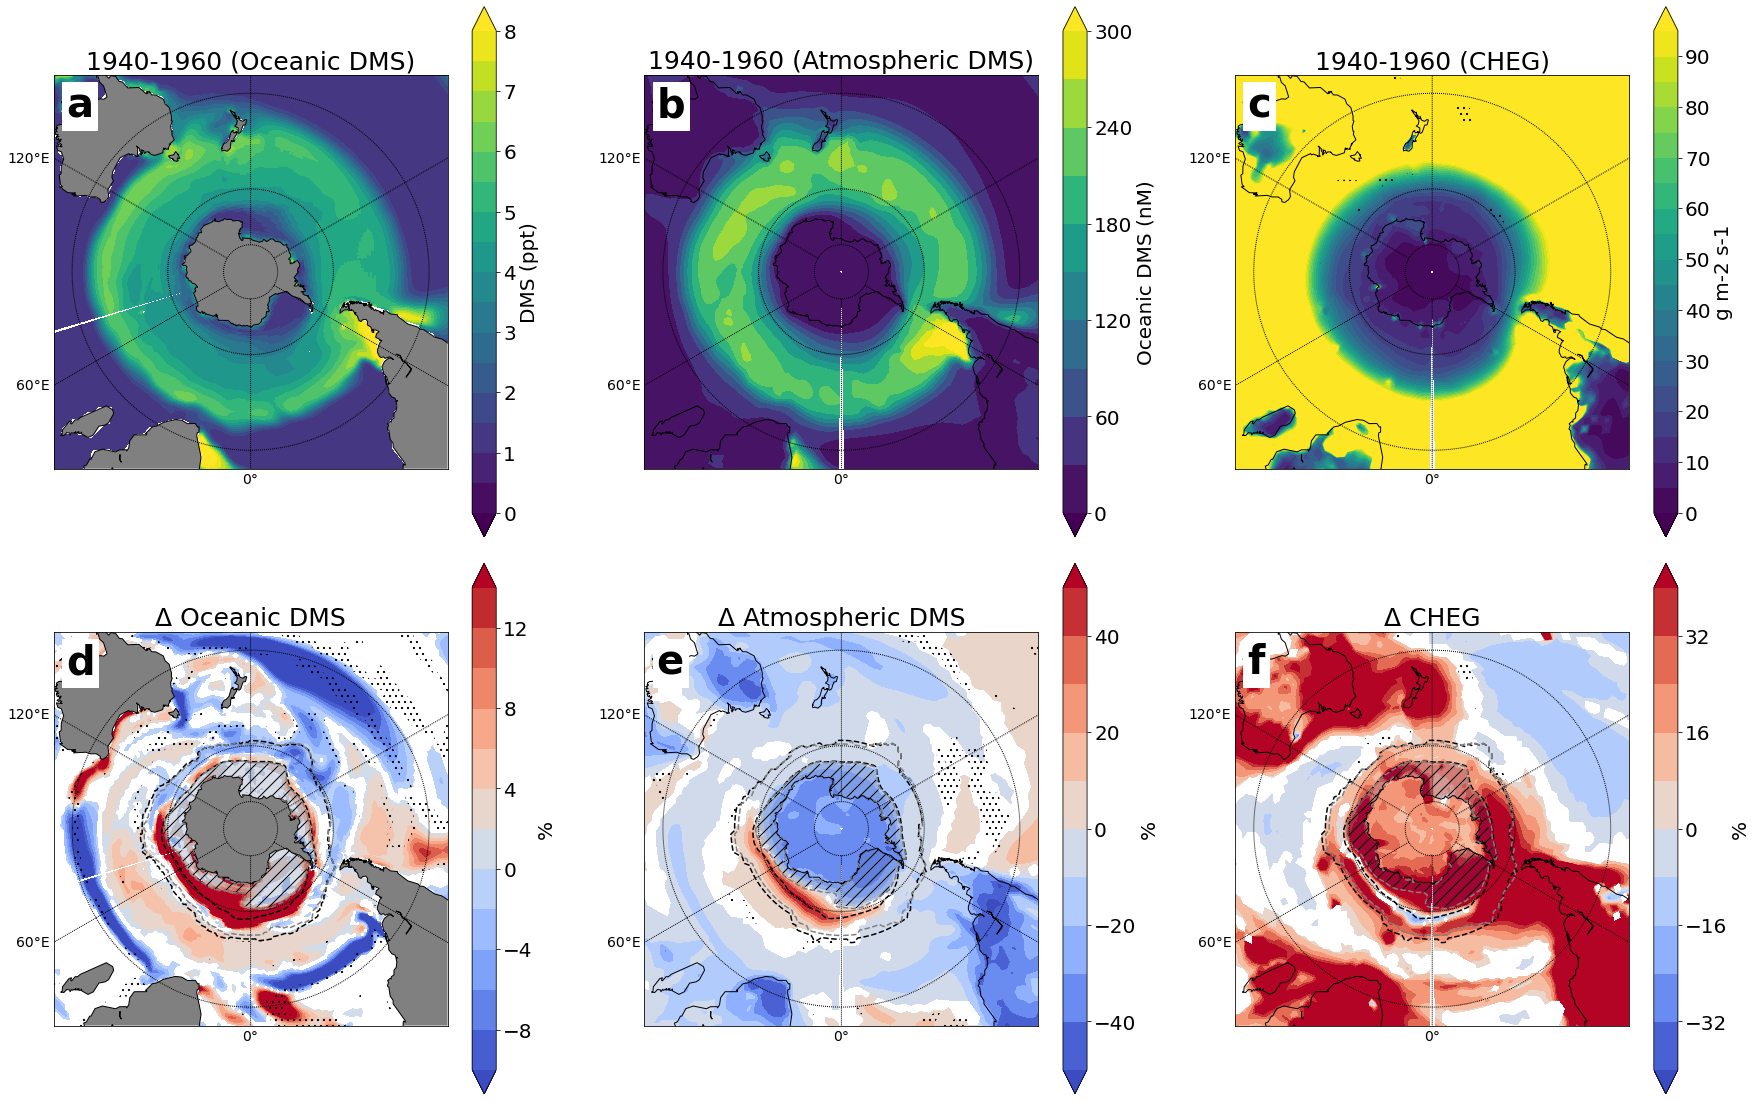

In [92]:
###################################################################################################
###################################################################################################
############################# FIGURE 5 SUPPLIMENTARY W/ CHEG ######################################
###################################################################################################
###################################################################################################
month='SON'
file ='/home/ybh10/CMIP6/UKESM1/Historic/Numpy_Array/Global/Difference/1940_1960_mean/Rel_Diff/{}/'.format(month)
file_dot ='/home/ybh10/CMIP6/UKESM1/Historic/Numpy_Array/Global/Difference/1940_1960_mean/Statistical/{}/'.format(month)
measurement=['ODMS','ODMS','CHEG','DMS'] # Fig 5 w/ CHEG
seaice=18
if month == 'DJF':
    sea_ice=np.nanmean(DJF_global_var[seaice],axis=0)
    ocean_sea_ice=np.nanmean(DJF_global_var[o_seaice],axis=0)
else:
    sea_ice=np.nanmean(SON_global_var[seaice],axis=0)
    ocean_sea_ice=np.nanmean(SON_global_var[o_seaice],axis=0)
data_percentage,data_dot,data_clev,data_shift=data_for_figure(measurement,file,file_dot,saves,month,DJF_shift_abs,SON_shift_abs)


#clevs_dms=np.arange(-50,40+5,5) # DMS
# clevs_odms=np.arange(-2,1.5,0.1) # DJF
# clevs_odms_son=np.arange(-.5,0.35,0.05) # SON

orig_cmap = matplotlib.cm.coolwarm

shifted_cmap_dms = shiftedColorMap(orig_cmap, start=0, midpoint=0.5, stop=0.9, name='shifted')

shifted_cmap_odms = shiftedColorMap(orig_cmap, start=0, midpoint=0.5, stop=.85, name='shifted')
###################################################### FOR ROUTE 2 ##############################
fig = plt.figure(figsize=(30,20), edgecolor='w')
fig.subplots_adjust(hspace=0.05)
n=2; c=3
ax1 = fig.add_subplot(n,c,1); ax2 = fig.add_subplot(n,c,2); ax3 = fig.add_subplot(n,c,3);ax4 = fig.add_subplot(n,c,4);ax5 = fig.add_subplot(n,c,5);ax6 = fig.add_subplot(n,c,6)
axes=[ax1,ax2,ax3,ax4,ax5,ax6]

a=np.nanmean(DJF_global_var[od][:,90:111],axis=(0))*ODMS_nm # ODMS Pre-ODC
b=data_percentage[1][45:65] # Rel Diff dms
c=np.nanmean(DJF_global_var[dm][:,90:111],axis=(0))*DMS_ppt # DMS pre-odc
d=data_percentage[3][45:65] # Rel Diff ssa
e=np.nanmean(DJF_global_var[cheg][:,90:111],axis=(0))*1e16 # cheg pre-odc
f=data_percentage[2][45:65] # Rel Diff DMS/SSA

data_sup=[a,c,e,b,d,f]
data_stats=[data_dot[1],data_dot[3],data_dot[2],data_dot[1],data_dot[3],data_dot[2]]



#units=['Column Ozone (DU)','SW (W $m^-$$^2$)','Oceanic DMS (nM)','Westerly Wind (m $s^-$$^1$)','DMS ppt', 'AOD (550 nm)']#,'RF-CS (W $m^-$$^2$)']
units=['DMS (ppt)','Oceanic DMS (nM)','g m-2 s-1','%','%','%']#,'RF-CS (W $m^-$$^2$)']
measurement=['Oceanic DMS','Atmospheric DMS','CHEG','Oceanic DMS','Atmospheric DMS','CHEG']
clevs_dms=np.arange(0,300+30,30) # DMS
clevs_odms=np.arange(0,8+.5,.5) # oDMS
clevs_cheg=np.arange(0,100,5) # CHEG

clevs_dms_djf=np.arange(-50,50+10,10) # DMS
clevs_odms_djf=np.arange(-10,14+2,2) # oDMS
clevs_cheg_djf=np.arange(-40,40+8,8) # CHEG

clevy=[clevs_odms,clevs_dms,clevs_cheg,clevs_odms_djf,clevs_dms_djf,clevs_cheg_djf]

orig_cmap = matplotlib.cm.coolwarm
shifted_cmap_DJF_DMS = shiftedColorMap(orig_cmap, start=0.0, midpoint=0.5, stop=1, name='shifted')
shifted_cmap_DJF_ODMS = shiftedColorMap(orig_cmap, start=0.0, midpoint=0.4, stop=1, name='shifted')

shifts=[shifted_cmap_DJF_DMS,shifted_cmap_DJF_DMS,shifted_cmap_DJF_DMS,shifted_cmap_DJF_DMS,shifted_cmap_DJF_DMS,shifted_cmap_DJF_DMS]
lonmesh,latmesh  = np.meshgrid(lons,lats)
latitudes=[olat.data,latmesh,latmesh,olat.data,latmesh,latmesh]#,olat.data,olat.data,latmesh,latmesh,latmesh]
longitudes=[olon.data,lonmesh,lonmesh,olon.data,lonmesh,lonmesh]
sea_ice_dats=[ocean_sea_ice,sea_ice,sea_ice,ocean_sea_ice,sea_ice,sea_ice]


lonmesh,latmesh  = np.meshgrid(lons,lats)
number=['a','b','c','d','e','f']
Dates=np.arange(1950,2015,1); lat_sh=lats[0:48]
count=np.arange(0,7,1); ODMS_CONT = ['0','4']
for ax,mapy,sig_dot,clev,shift,title,unit,num,counts,laty,lony,seayice in  zip(axes,data_sup,data_stats,clevy,shifts,measurement,units,number,count,latitudes,longitudes,sea_ice_dats):
    ax.grid(linestyle='--',alpha=0.5)
    mapy=np.nanmean(mapy,axis=(0))
    sig_dot=np.nanmean(sig_dot[145:165],axis=(0))
    map_ax1 = Basemap(projection='spstere',boundinglat=-25, lon_0=0,
                    resolution ='c',ax=ax)
    sic=np.nanmean(seayice[90:111],axis=(0))
    sic_new=np.nanmean(seayice[145:165],axis=(0))

#   x,y  = np.meshgrid(lons,lats)
    x, y = map_ax1(lony, laty) 
  #  x,y  = np.meshgrid(lony,laty)

    var = np.where(sic>80,np.nan,mapy)#mask sea ice
    var = np.where(sic>80,np.nan,mapy)#mask sea ice

    meridians = np.arange(0.,360,60.)    
    parallels = np.arange(-90.,90,30.)
    map_ax1.drawcoastlines()
 #   map_ax1.drawcountries()
    map_ax1.drawmeridians(meridians,labels=[1,0,0,1],fontsize=14)  
    map_ax1.drawparallels(parallels,labels=[True,True,True,True],fontsize=12)
    if title == 'Oceanic DMS':
        map_ax1.fillcontinents(color='gray')
    else:
        pass
    clevs=np.arange(0.0,200+5,5)
    clevs1=np.arange(-30,30+0.5,0.5)
    t=ax.text(-500000,-14500000,num,color='black',fontsize=40,fontweight='bold')
    t.set_bbox(dict(facecolor='white', edgecolor='white'))

    if title=='CHEG':
        if counts ==2:
            cs=ax.contourf(x,y,mapy,clev,cmap='viridis',extend='both')
        else:
            vari=blank_space(mapy,-4,4)
            cs=ax.contourf(x,y,vari,clev,cmap=shift,extend='both')
    else: 
        if title=='Atmospheric DMS':
            if counts <2:
                cs=ax.contourf(x,y,mapy,clev,cmap='viridis',extend='both')
            else:
                vari=blank_space(mapy,-2,2)
                cs=ax.contourf(x,y,vari,clev,cmap=shift,extend='both')
        else:
           #if title=='H2SO4':
            if counts < 2:
                cs=ax.contourf(x,y,mapy,clev,cmap='viridis',extend='both')

            else:
                vari=blank_space(mapy,-1,1)
                cs=ax.contourf(x,y,vari,clev,cmap=shift,extend='both')
    if counts > 2:
        ax.set_title("\u0394 {}".format(title),fontsize=25)
        levels=np.arange(0,100,20)
        sea_ice_mask_data=sea_ice_mask(sic,mapy,x,y,0)
     #   ax.contour(x,y,sea_ice_mask_data,1,color='k',linestyles=('-',),linewidths=(10,))
        ax.contour(x,y,sic,levels=[0,80],alpha=1,colors='black',linestyles='dashed',vmax=10000)

        new_sea_ice_mask_data=sea_ice_mask(sic_new,var,x,y,80)
        ax.contourf(x,y,new_sea_ice_mask_data,alpha=.2,hatches=['//'])
        ax.contour(x,y,sic_new,levels=[0,80],alpha=1,colors='grey',linestyles='dashed',vmax=10000)
      #  ax.contourf(x,y,new_sea_ice_mask_data,cmap=mask_shift,hatches=['//'])
    else:
        ax.set_title("1940-1960 ({})".format(title),fontsize=25)
    if title=='Ozone': ########## THIS CODE plots the SEA-ICE MASKING HATCHES #######
        pass

    cbar=fig.colorbar(cs,ax=ax,extend='both',orientation='vertical')#,ticks = np.arange(-30,30+5,5))
    cbar.set_label('{}'.format(unit),fontsize=20)
    cbar.ax.tick_params(labelsize=20)
    


    if counts >1:
        var = np.where(sic>0,np.nan,sig_dot)#mask sea ice

        [m,n] = np.where(var==1)

        z1 = np.zeros(var.shape)
        z1[m,n]=99


        cs3 = ax.contourf(x, y, z1, 1, hatches=['', '..'], alpha=0)
plt.show()
#plt.savefig("/home/ybh10/CMIP6/UKESM1/Historic/Plots/PAPER/Fig_5_suppliment_Masked_{}_CHEG.png".format(month),dpi=600,bbox_inches = 'tight')


ODMS
ODMS
-----------
ODMS
ODMS
-----------
AOD
AOD
-----------
DMS
DMS
-----------


<ipython-input-173-a95e3a7fe447>:30: RuntimeWarning: Mean of empty slice
  a=np.nanmean(DJF_global_var[od][:,90:111],axis=(0))*ODMS_nm # ODMS Pre-ODC
<ipython-input-173-a95e3a7fe447>:78: RuntimeWarning: Mean of empty slice
  mapy=np.nanmean(mapy,axis=(0))
<ipython-input-173-a95e3a7fe447>:82: RuntimeWarning: Mean of empty slice
  sic=np.nanmean(seaice[90:111],axis=(0))
<ipython-input-173-a95e3a7fe447>:82: RuntimeWarning: Mean of empty slice
  sic=np.nanmean(seaice[90:111],axis=(0))
<ipython-input-173-a95e3a7fe447>:82: RuntimeWarning: Mean of empty slice
  sic=np.nanmean(seaice[90:111],axis=(0))
/nesi/project/niwa02757/ybh10/miniconda3/envs/master/lib/python3.8/site-packages/matplotlib/contour.py:1483: UserWarning: Warning: converting a masked element to nan.
  self.zmax = float(z.max())
/nesi/project/niwa02757/ybh10/miniconda3/envs/master/lib/python3.8/site-packages/matplotlib/contour.py:1484: UserWarning: Warning: converting a masked element to nan.
  self.zmin = float(z.min())
<ipytho

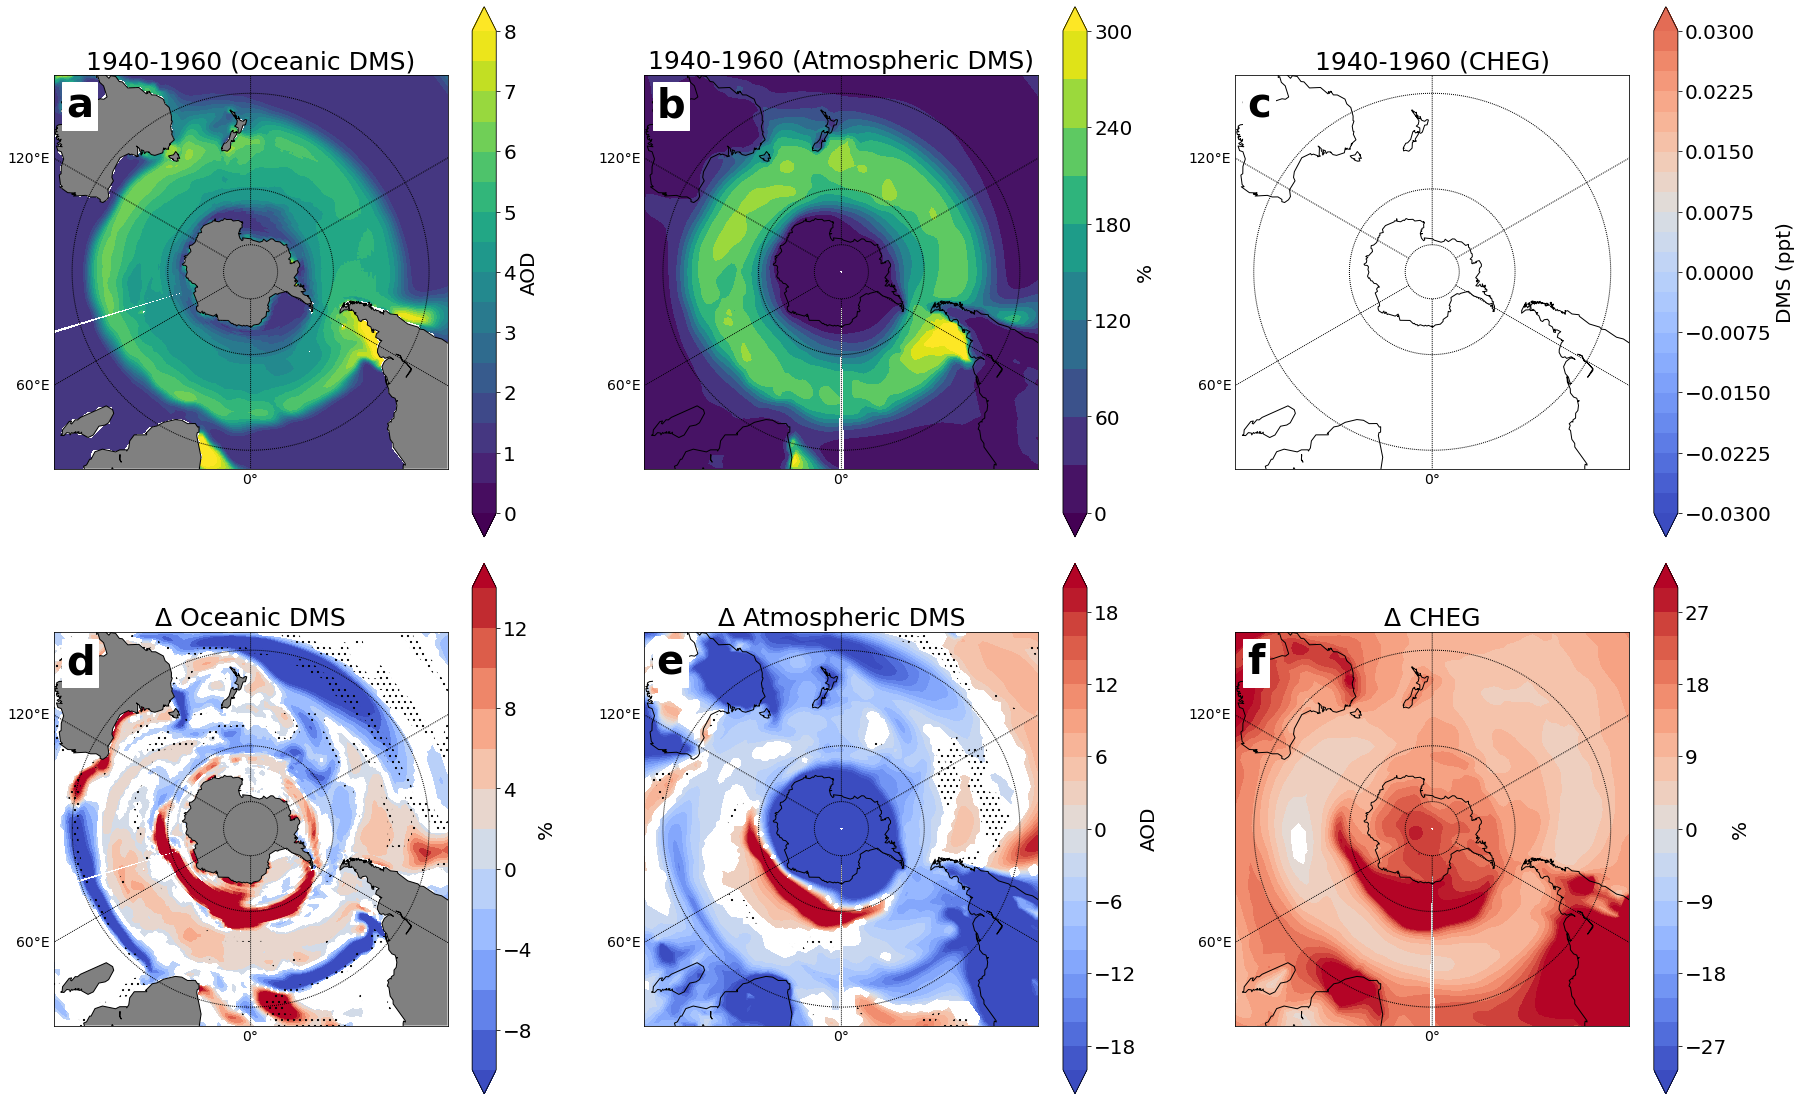

62729

In [173]:
###################################################################################################
###################################################################################################
############################# FIGURE 5 SUPPLIMENTARY W/ CHEG ######################################
###################################################################################################
###################################################################################################
month='SON'
file ='/home/ybh10/CMIP6/UKESM1/Historic/Numpy_Array/Global/Difference/1940_1960_mean/Rel_Diff/{}/'.format(month)
file_dot ='/home/ybh10/CMIP6/UKESM1/Historic/Numpy_Array/Global/Difference/1940_1960_mean/Statistical/{}/'.format(month)
measurement=['ODMS','ODMS','AOD','DMS'] # Fig 5 w/ CHEG

data_percentage,data_dot,data_clev,data_shift=data_for_figure(measurement,file,file_dot,saves,month,DJF_shift_abs,SON_shift_abs)


#clevs_dms=np.arange(-50,40+5,5) # DMS
# clevs_odms=np.arange(-2,1.5,0.1) # DJF
# clevs_odms_son=np.arange(-.5,0.35,0.05) # SON

orig_cmap = matplotlib.cm.coolwarm

shifted_cmap_dms = shiftedColorMap(orig_cmap, start=0, midpoint=0.5, stop=0.9, name='shifted')

shifted_cmap_odms = shiftedColorMap(orig_cmap, start=0, midpoint=0.5, stop=.85, name='shifted')
###################################################### FOR ROUTE 2 ##############################
fig = plt.figure(figsize=(30,20), edgecolor='w')
fig.subplots_adjust(hspace=0.05)
n=2; c=3
ax1 = fig.add_subplot(n,c,1); ax2 = fig.add_subplot(n,c,2); ax3 = fig.add_subplot(n,c,3);ax4 = fig.add_subplot(n,c,4);ax5 = fig.add_subplot(n,c,5);ax6 = fig.add_subplot(n,c,6)
axes=[ax1,ax2,ax3,ax4,ax5,ax6]

a=np.nanmean(DJF_global_var[od][:,90:111],axis=(0))*ODMS_nm # ODMS Pre-ODC
b=data_percentage[1][45:65] # Rel Diff dms
c=np.nanmean(DJF_global_var[dm][:,90:111],axis=(0))*DMS_ppt # DMS pre-odc
d=data_percentage[3][45:65] # Rel Diff ssa
e=np.nanmean(DJF_global_var[ad][:,90:111],axis=(0)) # cheg pre-odc
f=data_percentage[2][45:65] # Rel Diff DMS/SSA

data_sup=[a,c,e,b,d,f]
data_stats=[data_dot[1],data_dot[3],data_dot[2],data_dot[1],data_dot[3],data_dot[2]]



#units=['Column Ozone (DU)','SW (W $m^-$$^2$)','Oceanic DMS (nM)','Westerly Wind (m $s^-$$^1$)','DMS ppt', 'AOD (550 nm)']#,'RF-CS (W $m^-$$^2$)']
units=['AOD','%','DMS (ppt)','%','AOD','%']#,'RF-CS (W $m^-$$^2$)']
measurement=['Oceanic DMS','Atmospheric DMS','CHEG','Oceanic DMS','Atmospheric DMS','CHEG']
clevs_dms=np.arange(0,300+30,30) # DMS
clevs_odms=np.arange(0,8+.5,.5) # oDMS
clevs_cheg=np.arange(0,100,5) # CHEG

clevs_dms_djf=np.arange(-20,20+2,2) # DMS
clevs_odms_djf=np.arange(-10,14+2,2) # oDMS
clevs_cheg_djf=np.arange(-40,40+4,4) # CHEG
clevs_aod_djf=np.arange(-30,30+3,3) # CHEG

clevy=[clevs_odms,clevs_dms,clevs_aod,clevs_odms_djf,clevs_dms_djf,clevs_aod_djf]

orig_cmap = matplotlib.cm.coolwarm
shifted_cmap_DJF_DMS = shiftedColorMap(orig_cmap, start=0.0, midpoint=0.5, stop=1, name='shifted')
shifted_cmap_DJF_ODMS = shiftedColorMap(orig_cmap, start=0.0, midpoint=0.4, stop=1, name='shifted')
shifts=[data_shift[0],data_shift[0],data_shift[0],shifted_cmap_DJF_DMS,shifted_cmap_DJF_DMS,shifted_cmap_DJF_DMS]

#shifts=[data_shift[0],data_shift[1],shifted_cmap_DJF_DMS,shifted_cmap_DJF_DMS,shifted_cmap_DJF_DMS,shifted_cmap_DJF_DMS]
lonmesh,latmesh  = np.meshgrid(lons,lats)
latitudes=[olat.data,latmesh,latmesh,olat.data,latmesh,latmesh]#,olat.data,olat.data,latmesh,latmesh,latmesh]
longitudes=[olon.data,lonmesh,lonmesh,olon.data,lonmesh,lonmesh]
sea_ice_dats=[ocean_sea_ice,sea_ice,sea_ice,ocean_sea_ice,sea_ice,sea_ice]

# a=np.nanmean(data_percentage[0][45:65],axis=0)
# sice_global=np.where(a[0:110]<20,np.nan,a[0:110])
# print("mean = {}").format(np.nanmean(sice_global))
# print("max = {}").format(np.nanmax(sice_global))

lonmesh,latmesh  = np.meshgrid(lons,lats)
number=['a','b','c','d','e','f']
Dates=np.arange(1950,2015,1); lat_sh=lats[0:48]
count=np.arange(0,7,1); ODMS_CONT = ['0','4']
for ax,mapy,sig_dot,clev,shift,title,unit,num,counts,laty,lony,seaice in  zip(axes,data_sup,data_stats,clevy,shifts,measurement,units,number,count,latitudes,longitudes,sea_ice_dats):
    ax.grid(linestyle='--',alpha=0.5)
    mapy=np.nanmean(mapy,axis=(0))
    sig_dot=np.nanmean(sig_dot[145:165],axis=(0))
    map_ax1 = Basemap(projection='spstere',boundinglat=-25, lon_0=0,
                    resolution ='c',ax=ax)
    sic=np.nanmean(seaice[90:111],axis=(0))

#   x,y  = np.meshgrid(lons,lats)
    x, y = map_ax1(lony, laty) 
  #  x,y  = np.meshgrid(lony,laty)

    var = np.where(sic>0,np.nan,mapy)#mask sea ice

    meridians = np.arange(0.,360,60.)    
    parallels = np.arange(-90.,90,30.)
    map_ax1.drawcoastlines()
 #   map_ax1.drawcountries()
    map_ax1.drawmeridians(meridians,labels=[1,0,0,1],fontsize=14)  
    map_ax1.drawparallels(parallels,labels=[True,True,True,True],fontsize=12)
    if title == 'Oceanic DMS':
        map_ax1.fillcontinents(color='gray')
    else:
        pass
    clevs=np.arange(0.0,200+5,5)
    clevs1=np.arange(-30,30+0.5,0.5)
    t=ax.text(-500000,-14500000,num,color='black',fontsize=40,fontweight='bold')
    t.set_bbox(dict(facecolor='white', edgecolor='white'))

    if title=='AOD':
        if counts ==2:
            cs=ax.contourf(x,y,mapy,clev,cmap='viridis',extend='both')
        else:
            vari=blank_space(mapy,-6,6)
            cs=ax.contourf(x,y,vari,clev,cmap=shift,extend='both')
    else: 
        if title=='Atmospheric DMS':
            if counts <2:
                cs=ax.contourf(x,y,mapy,clev,cmap='viridis',extend='both')
            else:
                vari=blank_space(mapy,-2,2)
                cs=ax.contourf(x,y,vari,clev,cmap=shift,extend='both')
        else:
           #if title=='H2SO4':
            if counts < 2:
                cs=ax.contourf(x,y,mapy,clev,cmap='viridis',extend='both')

            else:
                vari=blank_space(mapy,-1,1)
                cs=ax.contourf(x,y,vari,clev,cmap=shift,extend='both')
    if counts > 2:
        ax.set_title("\u0394 {}".format(title),fontsize=25)
#         sea_ice_mask_data=sea_ice_mask(sic,mapy,x,y)
#         ax.contourf(x,y,sea_ice_mask_data,cmap=mask_shift,hatches=['//'])
    else:
        ax.set_title("1940-1960 ({})".format(title),fontsize=25)
    if title=='Ozone': ########## THIS CODE plots the SEA-ICE MASKING HATCHES #######
        pass

    cbar=fig.colorbar(cs,ax=ax,extend='both',orientation='vertical')#,ticks = np.arange(-30,30+5,5))
    cbar.set_label('{}'.format(unit),fontsize=20)
    cbar.ax.tick_params(labelsize=20)
    


    if counts >1:
        var = np.where(sic>0,np.nan,sig_dot)#mask sea ice

        [m,n] = np.where(var==1)

        z1 = np.zeros(var.shape)
        z1[m,n]=99


        cs3 = ax.contourf(x, y, z1, 1, hatches=['', '..'], alpha=0)

        

plt.show()

#plt.savefig("/home/ybh10/CMIP6/UKESM1/Historic/Plots/PAPER/Fig_5_suppliment_Masked_{}_CHEG.png".format(month),dpi=600,bbox_inches = 'tight')
gc.collect()

<ipython-input-308-2d15c547bf33>:17: UserWarning: No contour levels were found within the data range.
  zc=ax1.contour(x,y,sic_new,levels,alpha=1,colors='grey',linestyles='dashed',vmax=10000)
<ipython-input-308-2d15c547bf33>:19: UserWarning: No contour levels were found within the data range.
  zc=ax1.contour(x,y,sic,levels,alpha=1,colors='black',linestyles='dashed',vmax=10000)


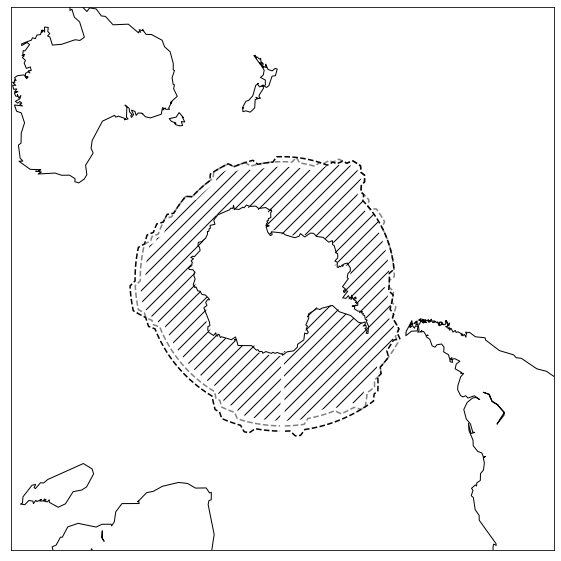

In [308]:
fig = plt.figure(figsize=(10,10), edgecolor='w')
fig.subplots_adjust(hspace=0.05)

ax1 = fig.add_subplot(1,1,1)
map_ax1 = Basemap(projection='spstere',boundinglat=-25, lon_0=0,
                resolution ='c',ax=ax1)
meridians = np.arange(0.,360,60.)    
parallels = np.arange(-90.,90,30.)
map_ax1.drawcoastlines()
#   map_ax1.drawcountries()
# map_ax1.drawmeridians(meridians,labels=[1,0,0,1],fontsize=14)
# map_ax1.drawparallels(parallels,labels=[True,True,True,True],fontsize=12)
levels = np.arange(0, 12000, 2000)
new_sea_ice_mask_data=sea_ice_mask(sic_new,mapy,x,y)
# ax.contourf(x,y,vari,clev,cmap=shift,extend='both')
sea_ice_mask_data=sea_ice_mask(sic,mapy,x,y)

ax1.contour(x,y,sic_new,levels,alpha=1,colors='grey',linestyles='dashed',vmax=10000)
ax1.contour(x,y,sic,levels,alpha=1,colors='black',linestyles='dashed',vmax=10000)
ax1.contourf(x,y,new_sea_ice_mask_data,cmap=mask_shift,hatches=['//'])

plt.show()

Ozone
Ozone
-----------
Wind
Wind
-----------
DMS
DMS
-----------
SSAMMR
SSAMMR
-----------
ODMS
ODMS
-----------
AOD
AOD
-----------


<ipython-input-294-1bc21b583793>:10: RuntimeWarning: Mean of empty slice
  sea_ice=np.nanmean(SON_global_var[seaice],axis=0)
<ipython-input-294-1bc21b583793>:11: RuntimeWarning: Mean of empty slice
  ocean_sea_ice=np.nanmean(SON_global_var[o_seaice],axis=0)
<ipython-input-294-1bc21b583793>:76: RuntimeWarning: Mean of empty slice
  sic=np.nanmean(seay_ice[90:111],axis=(0))
<ipython-input-294-1bc21b583793>:77: RuntimeWarning: Mean of empty slice
  sic_new=np.nanmean(seay_ice[145::],axis=(0))
<ipython-input-294-1bc21b583793>:97: RuntimeWarning: Mean of empty slice
  cs=ax.contourf(lony,laty,np.nanmean(mapy[45:65,0:127],axis=0),clevs,cmap=shifts, extend='both')


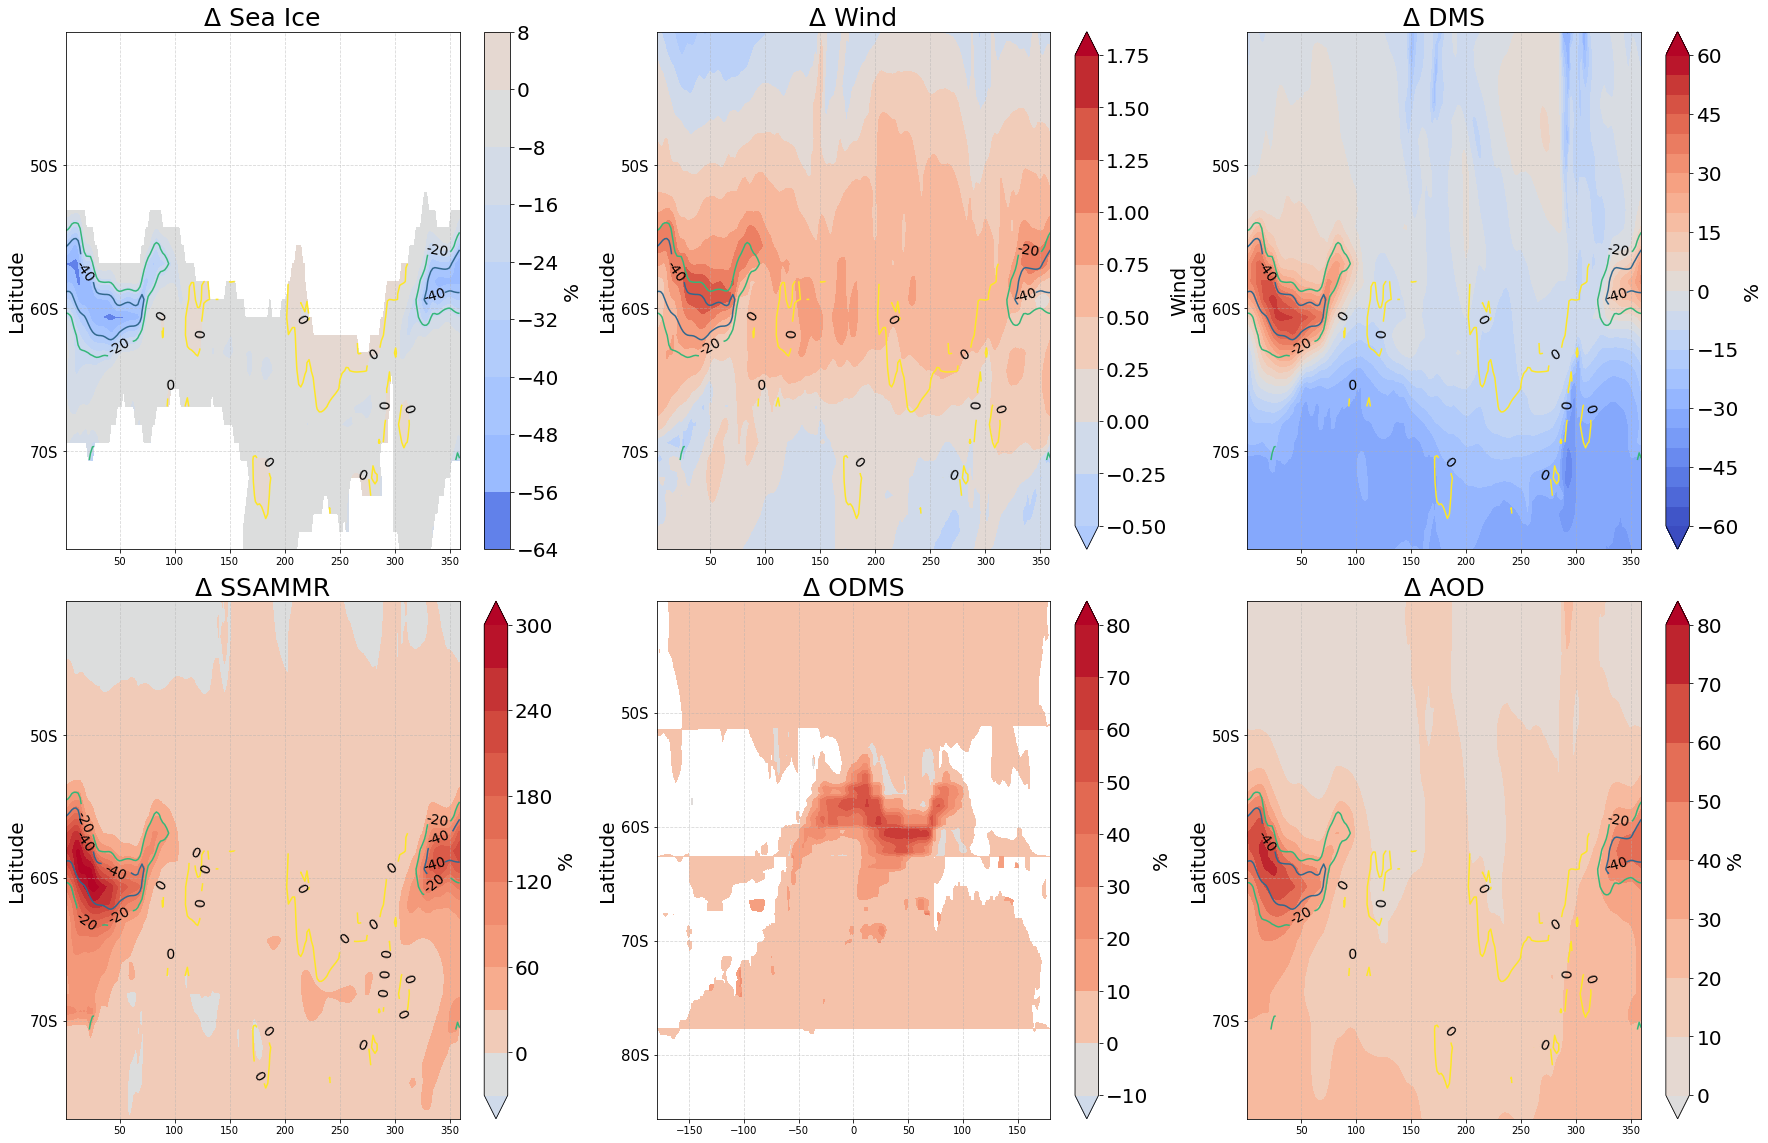

In [294]:
month='SON'
file ='/home/ybh10/CMIP6/UKESM1/Historic/Numpy_Array/Global/Difference/1940_1960_mean/Rel_Diff/{}/'.format(month)
file_dot ='/home/ybh10/CMIP6/UKESM1/Historic/Numpy_Array/Global/Difference/1940_1960_mean/Statistical/{}/'.format(month)
measurement=['Ozone','Wind','DMS','SSAMMR','ODMS','AOD'] # Fig 2
data_percentage,data_dot,data_clev,data_shift=data_for_figure(measurement,file,file_dot,saves,month,DJF_shift_abs,SON_shift_abs)
if month == 'DJF':
    sea_ice=np.nanmean(DJF_global_var[seaice],axis=0)
    ocean_sea_ice=np.nanmean(DJF_global_var[o_seaice],axis=0)
else:
    sea_ice=np.nanmean(SON_global_var[seaice],axis=0)
    ocean_sea_ice=np.nanmean(SON_global_var[o_seaice],axis=0)

clevs_SON_Sea_ice=np.arange(0,100+20,20)   
clevs_SON_Ozone=np.arange(-60,5+5,5)
clevs_SON_ODMS=np.arange(-10,80+10,10)
clevs_SON_Wind=np.arange(-.5,2,.25)
clevs_SON_DMS=np.arange(-60,60+5,5)
clevs_SON_AOD=np.arange(0,80+10,10)
clevs_SON_H2SO4MMR=np.arange(0,50+5,5)
clevs_SON_SSAMMR=np.arange(-30,300+30,30)
clevs_SON_SSA_H2SO4=np.arange(-60,60+5,5)
orig_cmap = matplotlib.cm.coolwarm
shifted_cmap_Ozone = shiftedColorMap(orig_cmap, start=0, midpoint=0.7, stop=.6, name='shifted')
shifted_cmap_H2SO4MMR = shiftedColorMap(orig_cmap, start=0.5, midpoint=0.5, stop=1, name='shifted')
shifted_cmap_Wind = shiftedColorMap(orig_cmap, start=0.35, midpoint=0.52, stop=1, name='shifted')
shifted_cmap_RSDS = shiftedColorMap(orig_cmap, start=0.2, midpoint=0.6, stop=.7, name='shifted')
shifted_cmap_DMS = shiftedColorMap(orig_cmap, start=0, midpoint=0.5, stop=1, name='shifted') 
shifted_cmap_RSS = shiftedColorMap(orig_cmap, start=0.4, midpoint=0.3, stop=1, name='shifted')
shifted_cmap_AOD = shiftedColorMap(orig_cmap, start=0.5, midpoint=0.5, stop=1, name='shifted') 
shifted_cmap_ODMS = shiftedColorMap(orig_cmap, start=.2,midpoint=0.45, stop=.75, name='shifted')
shifted_cmap_RSDO = shiftedColorMap(orig_cmap, start=0.45,midpoint=0.18, stop=.9, name='shifted')
shifted_cmap_RSDSCS = shiftedColorMap(orig_cmap, start=0.2, midpoint=0.5, stop=.7, name='shifted')
shifted_cmap_SO2 = shiftedColorMap(orig_cmap, start=0, midpoint=0.5, stop=1, name='shifted') 
shifted_cmap_SSAMMR = shiftedColorMap(orig_cmap, start=0.45, midpoint=0.25, stop=1, name='shifted')
shifted_cmap_Sea_Ice = shiftedColorMap(orig_cmap, start=0, midpoint=0.12, stop=.55, name='shifted') 
shifted_cmap_SSA_H2SO4 = shiftedColorMap(orig_cmap, start=0, midpoint=0.5, stop=1, name='shifted') 


clevy=[clevs_SON_Sea_ice,clevs_SON_Wind,clevs_SON_DMS,clevs_SON_SSAMMR,clevs_SON_ODMS,clevs_SON_AOD]
dats_shifty=[shifted_cmap_Sea_Ice,shifted_cmap_Wind,shifted_cmap_DMS,shifted_cmap_SSAMMR,shifted_cmap_SSAMMR,shifted_cmap_AOD]

#data_clev=[clevs_ozone,clevs_rsdo,clevs_odms,clevs_dms,clevs_so2,clevs_h2so4]
orig_cmap = matplotlib.cm.coolwarm
shifted_cmap_modis = shiftedColorMap(orig_cmap, start=0, midpoint=0.7, stop=.6, name='shifted')
shifted_cmap_aod = shiftedColorMap(orig_cmap, start=0.35, midpoint=0.3, stop=1, name='shifted')
shifted_cmap_dms = shiftedColorMap(orig_cmap, start=0, midpoint=0.5, stop=0.9, name='shifted')
shifted_cmap_wind = shiftedColorMap(orig_cmap, start=0.3, midpoint=0.62, stop=1, name='shifted')
shifted_cmap_so2 = shiftedColorMap(orig_cmap, start=0, midpoint=0.5, stop=1, name='shifted')
shifted_cmap_ssa = shiftedColorMap(orig_cmap, start=0.35, midpoint=0.55, stop=1, name='shifted')
shifted_cmap_H2SO4MMR = shiftedColorMap(orig_cmap, start=0, midpoint=0.5, stop=1, name='shifted')
shifted_cmap_SSA_H2SO4 = shiftedColorMap(orig_cmap, start=0.55, midpoint=0.55, stop=1, name='shifted')

shifted_cmap_RSDS = shiftedColorMap(orig_cmap, start=0.2, midpoint=0.6, stop=.7, name='shifted')
shifted_cmap_RSDO = shiftedColorMap(orig_cmap, start=0, midpoint=0.5, stop=1, name='shifted')
shifted_cmap_odms = shiftedColorMap(orig_cmap, start=0, midpoint=0.5, stop=.85, name='shifted')    
    
    

fig = plt.figure(figsize=(30,20), edgecolor='w')
fig.subplots_adjust(hspace=0.1)
n=2; c=3
sh_lat=lats[10:40]
#measurement=['AOD','Wind','DMS','SSAMMR','AOD','AOD'] # Fig 2
#lonmesh,latmesh  = np.meshgrid(lons,lats[10:40])
latitudes=[sh_lat,sh_lat,sh_lat,sh_lat,olat[0:127].data,sh_lat]#,olat.data,olat.data,latmesh,latmesh,latmesh]
longitudes=[lons,lons,lons,lons,olon[0:127].data,lons]
sea_ice_dats=[sea_ice,sea_ice,sea_ice,sea_ice,ocean_sea_ice,sea_ice]

units=['%','Wind','%','%','%','%']#,'RF-CS (W $m^-$$^2$)']
#measurement=['Oceanic DMS','Atmospheric DMS','CHEG','Oceanic DMS','Atmospheric DMS','CHEG']

ax1 = fig.add_subplot(n,c,1); ax2 = fig.add_subplot(n,c,2); ax3 = fig.add_subplot(n,c,3);ax4 = fig.add_subplot(n,c,4);ax5 = fig.add_subplot(n,c,5);ax6 = fig.add_subplot(n,c,6)
axes=[ax1,ax2,ax3,ax4,ax5,ax6]
leve=np.arange(-60,0+20,20)
for ax,mapy,title,seay_ice,laty,lony,clevs,shifts,unit in zip(axes,data_percentage,measurement,sea_ice_dats,latitudes,longitudes,clevy,dats_shifty,units):
    sic=np.nanmean(seay_ice[90:111],axis=(0))
    sic_new=np.nanmean(seay_ice[145::],axis=(0))
    ax.grid(linestyle='--',alpha=0.5)
    var_old = np.where(sic==0,np.nan,sic)#mask sea ice
    var_new = np.where(sic_new==0,np.nan,sic_new)#mask sea ice
    ax.set_ylabel('Latitude',fontsize=20)
    y_labels = ['80S','70S','60S','50S','40S']
    y=np.arange(-80,-40+10,10)

    ax.set_yticks(y); ax.set_yticklabels(y_labels,fontsize=15)

#     x, y = map_ax1(lony, laty) le
    ax.set_title("\u0394 {}".format(title),fontsize=25)

    if title == 'Ozone':
        ax.set_title("\u0394 {}".format('Sea Ice'),fontsize=25)
        cs=ax.contourf(lony,laty,var_new[10:40]-var_old[10:40],cmap=shifts)#,levels=levels)
        ts=ax.contour(lony,laty,var_new[10:40]-var_old[10:40],levels=leve)

    else:
        if title == 'ODMS':
            cs=ax.contourf(lony,laty,np.nanmean(mapy[45:65,0:127],axis=0),clevs,cmap=shifts, extend='both')
        else: 
            cs=ax.contourf(lony,laty,np.nanmean(mapy[45:65,10:40],axis=0),clevs,cmap=shifts, extend='both')
            ts=ax.contour(lony,laty,var_new[10:40]-var_old[10:40],levels=leve)
    ax.clabel(ts, fmt = '%2.1d', colors = 'k', fontsize=14) #contour line labels

    cbar=fig.colorbar(cs,ax=ax,extend='both',orientation='vertical')#,ticks = np.arange(-30,30+5,5))
    cbar.set_label('{}'.format(unit),fontsize=20)
    cbar.ax.tick_params(labelsize=20)
#plt.show()
plt.savefig("/home/ybh10/CMIP6/UKESM1/Historic/Plots/PAPER/Fig_5_suppliment_Masked__SEA_ICE_{}.png".format(month),dpi=600,bbox_inches = 'tight')

    #plt.contourf(sic[0:40])
    #plt.contourf(sic[0:40])
    #plt.contourf(sic[0:40])
    #ax.contourf(np.nanmean(data_percentage[2][45:65,0:127],axis=0)) # FOR OCEANIC DATA.

Ozone
Ozone
-----------
Wind
Wind
-----------
DMS
DMS
-----------
SSAMMR
SSAMMR
-----------
ODMS
ODMS
-----------
AOD
AOD
-----------


<ipython-input-92-3752620c03e7>:7: RuntimeWarning: Mean of empty slice
  sea_ice=np.nanmean(DJF_global_var[seaice],axis=0)
<ipython-input-92-3752620c03e7>:8: RuntimeWarning: Mean of empty slice
  ocean_sea_ice=np.nanmean(DJF_global_var[o_seaice],axis=0)
<ipython-input-92-3752620c03e7>:76: RuntimeWarning: Mean of empty slice
  sic=np.nanmean(seay_ice[90:111],axis=(0))
<ipython-input-92-3752620c03e7>:77: RuntimeWarning: Mean of empty slice
  sic_new=np.nanmean(seay_ice[145::],axis=(0))
<ipython-input-92-3752620c03e7>:97: RuntimeWarning: Mean of empty slice
  cs=ax.contourf(lony,laty,np.nanmean(mapy[45:65,0:127],axis=0),cmap='coolwarm', extend='both')


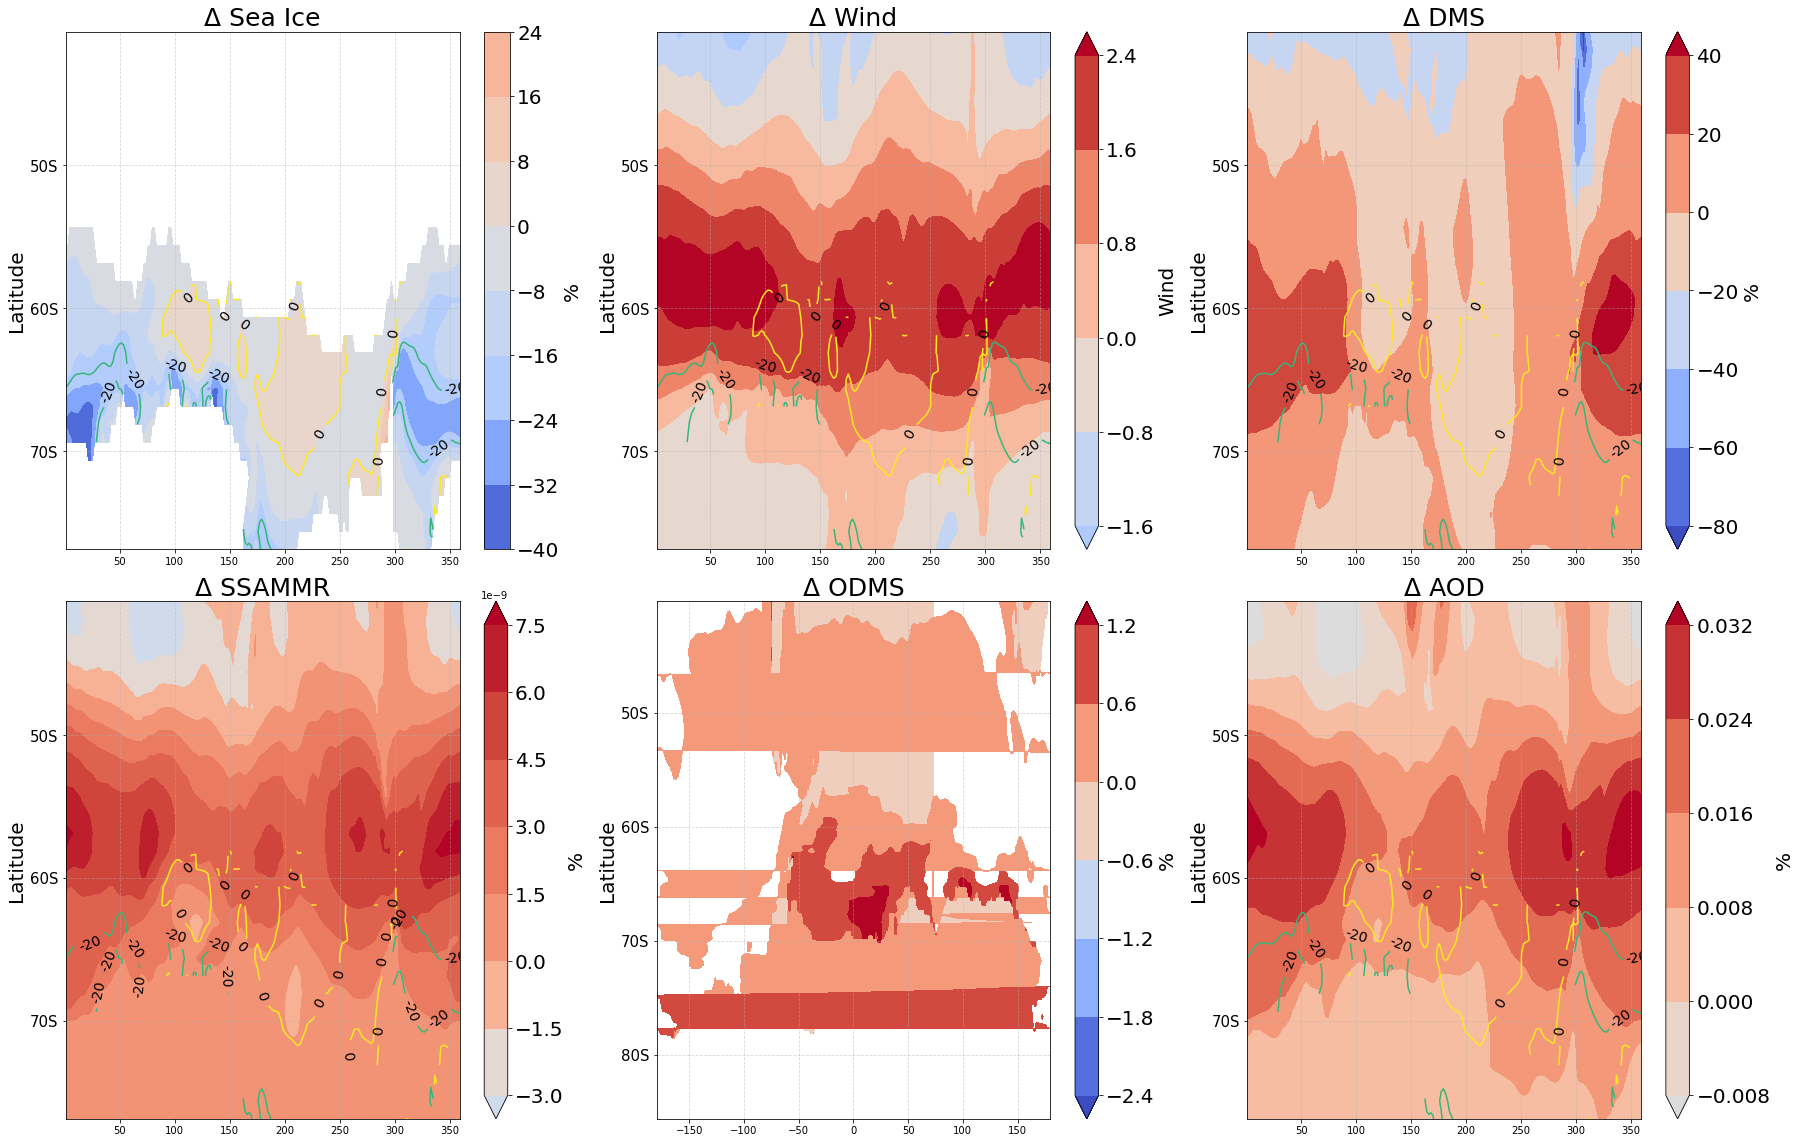

In [92]:
month='SON'
file ='/home/ybh10/CMIP6/UKESM1/Historic/Numpy_Array/Global/Difference/1940_1960_mean/Abs_Diff/{}/'.format(month)
file_dot ='/home/ybh10/CMIP6/UKESM1/Historic/Numpy_Array/Global/Difference/1940_1960_mean/Statistical/{}/'.format(month)
measurement=['Ozone','Wind','DMS','SSAMMR','ODMS','AOD'] # Fig 2
data_percentage,data_dot,data_clev,data_shift=data_for_figure(measurement,file,file_dot,saves,month,DJF_shift_abs,SON_shift_abs)
if month == 'DJF':
    sea_ice=np.nanmean(DJF_global_var[seaice],axis=0)
    ocean_sea_ice=np.nanmean(DJF_global_var[o_seaice],axis=0)
else:
    sea_ice=np.nanmean(SON_global_var[seaice],axis=0)
    ocean_sea_ice=np.nanmean(SON_global_var[o_seaice],axis=0)

clevs_SON_Sea_ice=np.arange(0,100+20,20)   
clevs_SON_Ozone=np.arange(-60,5+5,5)
clevs_SON_ODMS=np.arange(-10,80+10,10)
clevs_SON_Wind=np.arange(-.5,2,.25)
clevs_SON_DMS=np.arange(-60,60+5,5)
clevs_SON_AOD=np.arange(0,80+10,10)
clevs_SON_H2SO4MMR=np.arange(0,50+5,5)
clevs_SON_SSAMMR=np.arange(-30,300+30,30)
clevs_SON_SSA_H2SO4=np.arange(-60,60+5,5)
orig_cmap = matplotlib.cm.coolwarm
shifted_cmap_Ozone = shiftedColorMap(orig_cmap, start=0, midpoint=0.7, stop=.6, name='shifted')
shifted_cmap_H2SO4MMR = shiftedColorMap(orig_cmap, start=0.5, midpoint=0.5, stop=1, name='shifted')
shifted_cmap_Wind = shiftedColorMap(orig_cmap, start=0.35, midpoint=0.52, stop=1, name='shifted')
shifted_cmap_RSDS = shiftedColorMap(orig_cmap, start=0.2, midpoint=0.6, stop=.7, name='shifted')
shifted_cmap_DMS = shiftedColorMap(orig_cmap, start=0, midpoint=0.5, stop=1, name='shifted') 
shifted_cmap_RSS = shiftedColorMap(orig_cmap, start=0.4, midpoint=0.3, stop=1, name='shifted')
shifted_cmap_AOD = shiftedColorMap(orig_cmap, start=0.5, midpoint=0.5, stop=1, name='shifted') 
shifted_cmap_ODMS = shiftedColorMap(orig_cmap, start=.2,midpoint=0.45, stop=.75, name='shifted')
shifted_cmap_RSDO = shiftedColorMap(orig_cmap, start=0.45,midpoint=0.18, stop=.9, name='shifted')
shifted_cmap_RSDSCS = shiftedColorMap(orig_cmap, start=0.2, midpoint=0.5, stop=.7, name='shifted')
shifted_cmap_SO2 = shiftedColorMap(orig_cmap, start=0, midpoint=0.5, stop=1, name='shifted') 
shifted_cmap_SSAMMR = shiftedColorMap(orig_cmap, start=0.45, midpoint=0.25, stop=1, name='shifted')
shifted_cmap_Sea_Ice = shiftedColorMap(orig_cmap, start=0, midpoint=0.3, stop=.7, name='shifted') 
shifted_cmap_SSA_H2SO4 = shiftedColorMap(orig_cmap, start=0, midpoint=0.5, stop=1, name='shifted') 


clevy=[clevs_SON_Sea_ice,clevs_SON_Wind,clevs_SON_DMS,clevs_SON_SSAMMR,clevs_SON_ODMS,clevs_SON_AOD]
dats_shifty=[shifted_cmap_Sea_Ice,shifted_cmap_Wind,shifted_cmap_DMS,shifted_cmap_SSAMMR,shifted_cmap_SSAMMR,shifted_cmap_AOD]

#data_clev=[clevs_ozone,clevs_rsdo,clevs_odms,clevs_dms,clevs_so2,clevs_h2so4]
orig_cmap = matplotlib.cm.coolwarm
shifted_cmap_modis = shiftedColorMap(orig_cmap, start=0, midpoint=0.7, stop=.6, name='shifted')
shifted_cmap_aod = shiftedColorMap(orig_cmap, start=0.35, midpoint=0.3, stop=1, name='shifted')
shifted_cmap_dms = shiftedColorMap(orig_cmap, start=0, midpoint=0.5, stop=0.9, name='shifted')
shifted_cmap_wind = shiftedColorMap(orig_cmap, start=0.3, midpoint=0.62, stop=1, name='shifted')
shifted_cmap_so2 = shiftedColorMap(orig_cmap, start=0, midpoint=0.5, stop=1, name='shifted')
shifted_cmap_ssa = shiftedColorMap(orig_cmap, start=0.35, midpoint=0.55, stop=1, name='shifted')
shifted_cmap_H2SO4MMR = shiftedColorMap(orig_cmap, start=0, midpoint=0.5, stop=1, name='shifted')
shifted_cmap_SSA_H2SO4 = shiftedColorMap(orig_cmap, start=0.55, midpoint=0.55, stop=1, name='shifted')

shifted_cmap_RSDS = shiftedColorMap(orig_cmap, start=0.2, midpoint=0.6, stop=.7, name='shifted')
shifted_cmap_RSDO = shiftedColorMap(orig_cmap, start=0, midpoint=0.5, stop=1, name='shifted')
shifted_cmap_odms = shiftedColorMap(orig_cmap, start=0, midpoint=0.5, stop=.85, name='shifted')    
    
    

fig = plt.figure(figsize=(30,20), edgecolor='w')
fig.subplots_adjust(hspace=0.1)
n=2; c=3
sh_lat=lats[10:40]
#measurement=['AOD','Wind','DMS','SSAMMR','AOD','AOD'] # Fig 2
#lonmesh,latmesh  = np.meshgrid(lons,lats[10:40])
latitudes=[sh_lat,sh_lat,sh_lat,sh_lat,olat[0:127].data,sh_lat]#,olat.data,olat.data,latmesh,latmesh,latmesh]
longitudes=[lons,lons,lons,lons,olon[0:127].data,lons]
sea_ice_dats=[sea_ice,sea_ice,sea_ice,sea_ice,ocean_sea_ice,sea_ice]

units=['%','Wind','%','%','%','%']#,'RF-CS (W $m^-$$^2$)']
#measurement=['Oceanic DMS','Atmospheric DMS','CHEG','Oceanic DMS','Atmospheric DMS','CHEG']

ax1 = fig.add_subplot(n,c,1); ax2 = fig.add_subplot(n,c,2); ax3 = fig.add_subplot(n,c,3);ax4 = fig.add_subplot(n,c,4);ax5 = fig.add_subplot(n,c,5);ax6 = fig.add_subplot(n,c,6)
axes=[ax1,ax2,ax3,ax4,ax5,ax6]
leve=np.arange(-60,0+20,20)
for ax,mapy,title,seay_ice,laty,lony,clevs,shifts,unit in zip(axes,data_percentage,measurement,sea_ice_dats,latitudes,longitudes,clevy,dats_shifty,units):
    sic=np.nanmean(seay_ice[90:111],axis=(0))
    sic_new=np.nanmean(seay_ice[145::],axis=(0))
    ax.grid(linestyle='--',alpha=0.5)
    var_old = np.where(sic==0,np.nan,sic)#mask sea ice
    var_new = np.where(sic_new==0,np.nan,sic_new)#mask sea ice
    ax.set_ylabel('Latitude',fontsize=20)
    y_labels = ['80S','70S','60S','50S','40S']
    y=np.arange(-80,-40+10,10)

    ax.set_yticks(y); ax.set_yticklabels(y_labels,fontsize=15)

#     x, y = map_ax1(lony, laty) le
    ax.set_title("\u0394 {}".format(title),fontsize=25)

    if title == 'Ozone':
        ax.set_title("\u0394 {}".format('Sea Ice'),fontsize=25)
        cs=ax.contourf(lony,laty,var_new[10:40]-var_old[10:40],cmap=shifts)#,levels=levels)
        ts=ax.contour(lony,laty,var_new[10:40]-var_old[10:40],levels=leve)

    else:
        if title == 'ODMS':
            cs=ax.contourf(lony,laty,np.nanmean(mapy[45:65,0:127],axis=0),cmap='coolwarm', extend='both')
        else: 
            cs=ax.contourf(lony,laty,np.nanmean(mapy[45:65,10:40],axis=0),cmap=shifts, extend='both')
            ts=ax.contour(lony,laty,var_new[10:40]-var_old[10:40],levels=leve)
    ax.clabel(ts, fmt = '%2.1d', colors = 'k', fontsize=14) #contour line labels

    cbar=fig.colorbar(cs,ax=ax,extend='both',orientation='vertical')#,ticks = np.arange(-30,30+5,5))
    cbar.set_label('{}'.format(unit),fontsize=20)
    cbar.ax.tick_params(labelsize=20)
plt.show()
#plt.savefig("/home/ybh10/CMIP6/UKESM1/Historic/Plots/PAPER/Fig_5_suppliment_Masked__SEA_ICE_{}.png".format(month),dpi=600,bbox_inches = 'tight')

    #plt.contourf(sic[0:40])
    #plt.contourf(sic[0:40])
    #plt.contourf(sic[0:40])
    #ax.contourf(np.nanmean(data_percentage[2][45:65,0:127],axis=0)) # FOR OCEANIC DATA.

SSAMMR
SSAMMR
-----------
SSAMMR
SSAMMR
-----------


<ipython-input-132-c4aff9637875>:10: RuntimeWarning: Mean of empty slice
  sea_ice=np.nanmean(DJF_global_var[seaice],axis=0)
<ipython-input-132-c4aff9637875>:11: RuntimeWarning: Mean of empty slice
  ocean_sea_ice=np.nanmean(DJF_global_var[o_seaice],axis=0)


SSAMMR
SSAMMR
-----------
SSAMMR
SSAMMR
-----------


<ipython-input-132-c4aff9637875>:93: RuntimeWarning: Mean of empty slice
  sic=np.nanmean(sea_ice[90:111],axis=(0))
<ipython-input-132-c4aff9637875>:94: RuntimeWarning: Mean of empty slice
  sic_new=np.nanmean(sea_ice[145:165],axis=(0))
<ipython-input-132-c4aff9637875>:93: RuntimeWarning: Mean of empty slice
  sic=np.nanmean(sea_ice[90:111],axis=(0))
<ipython-input-132-c4aff9637875>:94: RuntimeWarning: Mean of empty slice
  sic_new=np.nanmean(sea_ice[145:165],axis=(0))
<ipython-input-132-c4aff9637875>:93: RuntimeWarning: Mean of empty slice
  sic=np.nanmean(sea_ice[90:111],axis=(0))
<ipython-input-132-c4aff9637875>:94: RuntimeWarning: Mean of empty slice
  sic_new=np.nanmean(sea_ice[145:165],axis=(0))
<ipython-input-132-c4aff9637875>:93: RuntimeWarning: Mean of empty slice
  sic=np.nanmean(sea_ice[90:111],axis=(0))
<ipython-input-132-c4aff9637875>:94: RuntimeWarning: Mean of empty slice
  sic_new=np.nanmean(sea_ice[145:165],axis=(0))
<ipython-input-132-c4aff9637875>:93: RuntimeWarning:

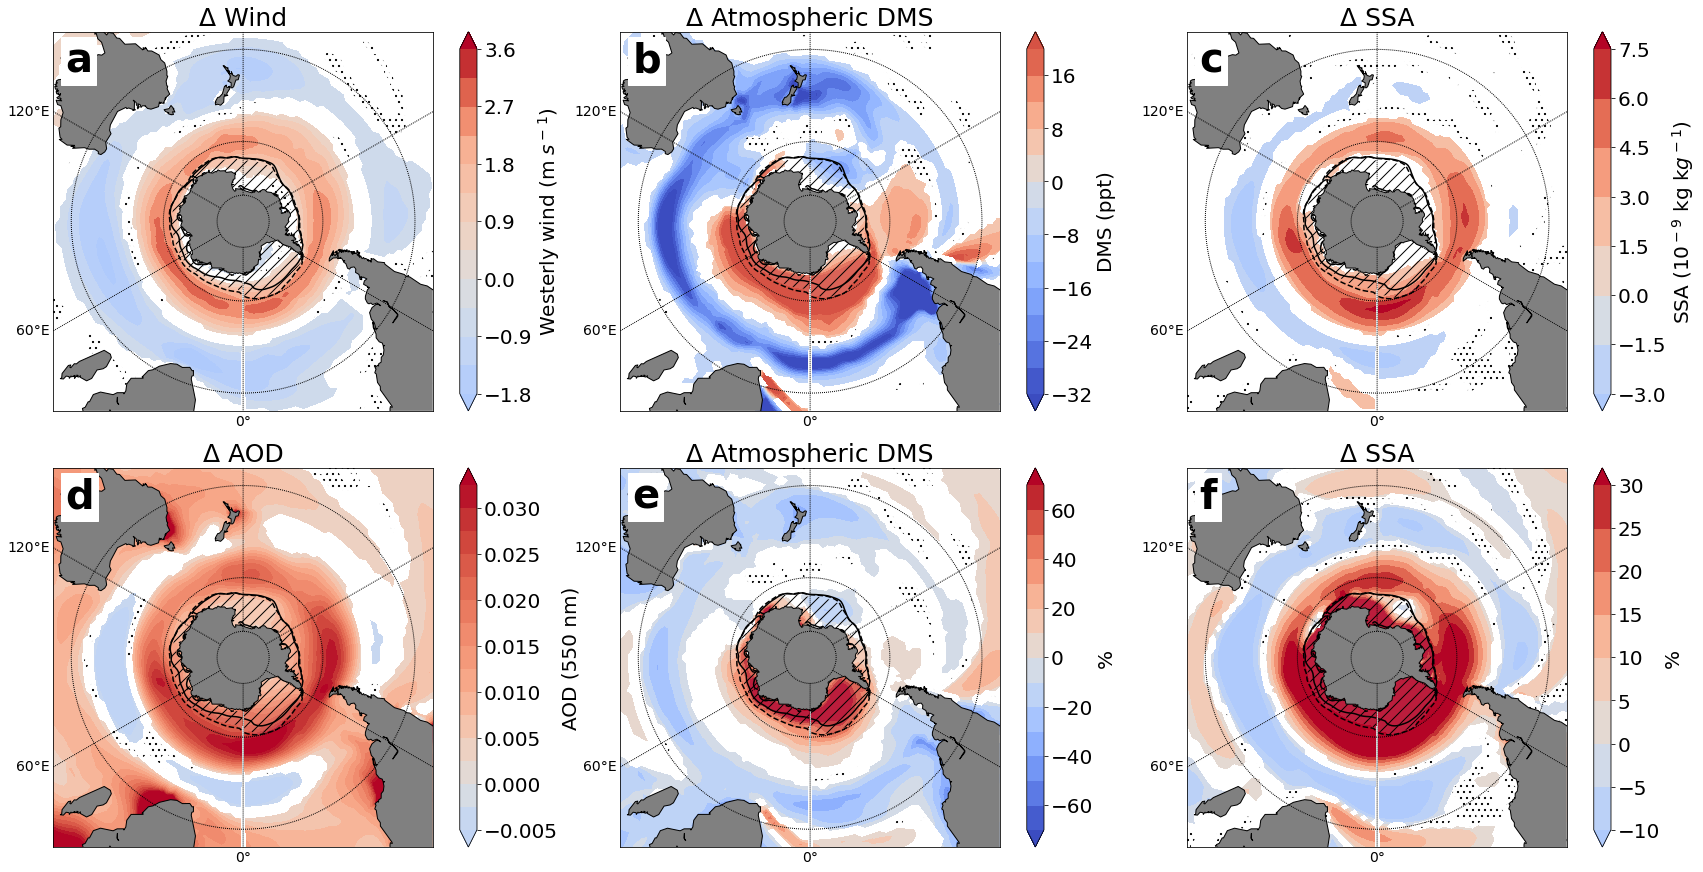

In [132]:
#(rows, columns, position) #  ############################# FIGURE 2 #################################

###################################################### FOR ROUTE 2 ##############################
month='DJF'
file ='/home/ybh10/CMIP6/UKESM1/Historic/Numpy_Array/Global/Difference/1940_1960_mean/Abs_Diff/{}/'.format(month)
file_dot ='/home/ybh10/CMIP6/UKESM1/Historic/Numpy_Array/Global/Difference/1940_1960_mean/Statistical/{}/'.format(month)
measurement=['Wind','DMS','SSAMMR','AOD','DMS','SSAMMR'] # Fig 2
data_percentage,data_dot,data_clev,data_shift=data_for_figure(measurement,file,file_dot,saves,month,DJF_shift_abs,SON_shift_abs)
if month == 'DJF':
    sea_ice=np.nanmean(DJF_global_var[seaice],axis=0)
    ocean_sea_ice=np.nanmean(DJF_global_var[o_seaice],axis=0)
else:
    sea_ice=np.nanmean(SON_global_var[seaice],axis=0)
    ocean_sea_ice=np.nanmean(SON_global_var[o_seaice],axis=0)
file ='/home/ybh10/CMIP6/UKESM1/Historic/Numpy_Array/Global/Difference/1940_1960_mean/Rel_Diff/{}/'.format(month)
data_percentage_rel,data_dot_rel,data_clev_rel,data_shift_rel=data_for_figure(measurement,file,file_dot,saves,month,DJF_shift_abs,SON_shift_abs)


shifted_cmap_dms = shiftedColorMap(orig_cmap, start=0, midpoint=0.57, stop=0.9, name='shifted')
shifted_cmap_Wind = shiftedColorMap(orig_cmap, start=0.35, midpoint=0.7, stop=1, name='shifted')
shifted_cmap_SSAMMR = shiftedColorMap(orig_cmap, start=0.35, midpoint=0.55, stop=1, name='shifted')
shifted_cmap_AOD = shiftedColorMap(orig_cmap, start=0.4, midpoint=0.4, stop=1, name='shifted') 

shifted_cmap_DJF_DMS = shiftedColorMap(orig_cmap, start=0.0, midpoint=0.5, stop=1, name='shifted')
clevs_DJF_SSAMMR=np.arange(-10,30+5,5)
clevs_SSA=np.arange(-3,7.5+1.5,1.5)

shifted_cmap_SSAMMR = shiftedColorMap(orig_cmap, start=0.35, midpoint=0.57, stop=1, name='shifted')
shifted_cmap_dms = shiftedColorMap(orig_cmap, start=0, midpoint=0.57, stop=0.9, name='shifted')
ssa_shift=shiftedColorMap(orig_cmap, start=0.35, midpoint=0.55, stop=1, name='shifted')
# b=data_percentage[1][45:65] # Rel Diff dms
# c=np.nanmean(DJF_global_var[SSA][:,90:111],axis=(0))*1e9 # SSA pre-odc
# d=data_percentage[2][45:65] # Rel Diff ssa
# e=np.nanmean(DJF_global_var[SO4MMR][:,90:111],axis=(0))*1e11 # H2SO4 pre-odc
# f=data_percentage[2][45:65]    
DATA=[data_percentage[0],data_percentage[1],data_percentage[2],data_percentage[3],data_percentage_rel[4],data_percentage_rel[5]]    
DOT=[data_dot[0],data_dot[1],data_dot[2],data_dot[3],data_dot_rel[4],data_dot_rel[5]]
CLEV=[data_clev[0],data_clev[1],clevs_SSA,data_clev[3],data_clev_rel[4],clevs_DJF_SSAMMR]
SHIFT=[shifted_cmap_Wind,shifted_cmap_dms,ssa_shift,shifted_cmap_AOD,shifted_cmap_DJF_DMS,shifted_cmap_SSAMMR]

fig = plt.figure(figsize=(30,15), edgecolor='w')
fig.subplots_adjust(hspace=0.15,wspace=0.05)
n=2; c=3
ax1 = fig.add_subplot(n,c,1); ax2 = fig.add_subplot(n,c,2); ax3 = fig.add_subplot(n,c,3);ax4 = fig.add_subplot(n,c,4);ax5 = fig.add_subplot(n,c,5);ax6 = fig.add_subplot(n,c,6)
axes=[ax1,ax2,ax3,ax4,ax5,ax6]

#fig, axes = plt.subplots(nrows=2, ncols=3, sharex=True, figsize=(30,10))

measurement=['Wind','Atmospheric DMS','SSA','AOD','Atmospheric DMS','SSA'] # Fig 2


# cbar_max = 200.0
# cbar_min = 0.0
# cbar_step = 5.0
#surface_downwelling_shortwave_flux_in_air

#RSDO: Surface SW in Seawater
# rss surface_downwelling_shortwave_flux_in_air
# RSDSCS Surface Downwelling Shortwave Radiation Clear Sky
#units=['Column Ozone (DU)','SW (W $m^-$$^2$)','Oceanic DMS (nM)','Westerly Wind (m $s^-$$^1$)','DMS ppt', 'AOD (550 nm)']#,'RF-CS (W $m^-$$^2$)']
units=['Westerly wind (m $s^-$$^1$)','DMS (ppt)','SSA (10$^-$$^9$ kg k$g^-$$^1$)', 'AOD (550 nm)','%','%']#,'RF-CS (W $m^-$$^2$)']
dms_ssa=np.load('/home/ybh10/CMIP6/UKESM1/Historic/Numpy_Array/Global/Difference/1940_1960_mean/Rel_Diff/{}/DMS_SSA.npy'.format(month))
clevys_ice=np.arange(0,100+10,10)
clevys_ice=np.arange(-100,100+20,20)
clevys_SSA_H2SO4_SON=np.arange(0,280+20,20)
clevys_SSA_H2SO4_DJF=np.arange(0,180+20,20)
clevys_dmsssa=np.arange(-100,100+25,25)
clevys_dmsssa_DJF=np.arange(-25,25+5,5)

clevys_abs=np.arange(0,280+20,20)
shifted_cmap_Wind = shiftedColorMap(orig_cmap, start=0.35, midpoint=0.52, stop=1, name='shifted')

clevys_dmsa=np.arange(-0.0125,0.005+0.00125,0.00125)
lonmesh,latmesh  = np.meshgrid(lons,lats)
latitudes=[latmesh,latmesh,latmesh,latmesh,latmesh,latmesh]#,olat.data,olat.data,latmesh,latmesh,latmesh]
longitudes=[lonmesh,lonmesh,lonmesh,lonmesh,lonmesh,lonmesh]#,olon.data,olon.data,lonmesh,lonmesh,lonmesh]
# latitudes=[latmesh,latmesh,latmesh,latmesh,latmesh,latmesh]
# longitudes=[lonmesh,lonmesh,lonmesh,lonmesh,lonmesh,lonmesh,lonmesh]
number=['a','b','c','d','e','f']
Dates=np.arange(1950,2015,1); lat_sh=lats[0:48]
clevs_SSA=np.arange(-3,7.5+1.5,1.5)
ssa_shift=shiftedColorMap(orig_cmap, start=0.35, midpoint=0.55, stop=1, name='shifted')
clevs_SEA_ICE_MASK=np.arange(0,10000,5000) # DMS
mask_map = matplotlib.cm.gist_gray
mask_shift=shiftedColorMap(mask_map, start=1, midpoint=1, stop=1, name='shifted')

data_shift=[shifted_cmap_Wind,shifted_cmap_dms,shifted_cmap_SSAMMR,shifted_cmap_AOD]
#data_shift=[shifted_cmap_modis,shifted_cmap_RSDO,shifted_cmap_odms,shifted_cmap_dms,shifted_cmap_so2,shifted_cmap_H2SO4MMR]
for ax,mapy,sig_dot,clev,shift,laty,lony,title,unit,num in  zip(axes,DATA,DOT,CLEV,SHIFT,latitudes,longitudes,measurement,units,number):
    ax.grid(linestyle='--',alpha=0.5)
    mapy=np.nanmean(mapy[45:65],axis=(0))
    sig_dot=np.nanmean(sig_dot[145:165],axis=(0))
    sic=np.nanmean(sea_ice[90:111],axis=(0))
    sic_new=np.nanmean(sea_ice[145:165],axis=(0))
    map_ax1 = Basemap(projection='spstere',boundinglat=-25, lon_0=0,
                    resolution ='c',ax=ax)

    x,y  = np.meshgrid(lons,lats)
    x, y = map_ax1(x, y) 

    var = np.where(sic>0,np.nan,mapy)#mask sea ice

    meridians = np.arange(0.,360,60.)    
    parallels = np.arange(-90.,90,30.)
    map_ax1.drawcoastlines()
    map_ax1.fillcontinents(color='gray')
 #   map_ax1.drawcountries()
    map_ax1.drawmeridians(meridians,labels=[1,0,0,1],fontsize=14)  
    map_ax1.drawparallels(parallels,labels=[True,True,True,True],fontsize=12)
    clevs=np.arange(0.0,200+5,5)
    clevs1=np.arange(-30,30+0.5,0.5)
    t=ax.text(-500000,-14500000,num,color='black',fontsize=40,fontweight='bold')
    t.set_bbox(dict(facecolor='white', edgecolor='white'))
    if title=='SSA'!=-1:
        if unit == '%':
            vari=blank_space(mapy,-2.5,2.5)
            cs=ax.contourf(x,y,vari,clev,cmap=shift,extend='both')
        else:
            vari=blank_space(mapy*1e9,-1.5,1.5)
            cs=ax.contourf(x,y,vari,clev,cmap=shift,extend='both')
    else: 
        if title=='Atmospheric DMS':
            if unit == '%':
                vari=blank_space(mapy,-5,5)
                cs=ax.contourf(x,y,vari,clev,cmap=shift,extend='both')
            else:
                vari=blank_space(mapy,-4,4)
                cs=ax.contourf(x,y,vari,clev,cmap=shift,extend='both')
        else:
            if title=='Wind':
                vari=blank_space(mapy,-0.45,.45)
                cs=ax.contourf(x,y,vari,clev,cmap=shift,extend='both')
            else:
                vari=blank_space(mapy,-0.0025,0.0025)
                cs=ax.contourf(x,y,vari,clev,cmap=shift,extend='both')
#     if title=='Wind': ########## THIS CODE plots the SEA-ICE MASKING HATCHES #######
#         pass
#     else:
    lol=30
    sea_ice_mask_data=sea_ice_mask(sic,mapy,x,y,lol)
    ax.contourf(x,y,sea_ice_mask_data,cmap=mask_shift,hatches=['//'],alpha=.1)
    ax.contour(x,y,sic,levels=[lol],linestyles='dashed',colors='black',vmax=10000)

    new_sea_ice_mask_data=sea_ice_mask(sic_new,var,x,y,lol)
    ax.contour(x,y,sic_new,levels=[lol],alpha=1,colors='black',vmax=10000)
        
    ax.set_title("\u0394 {}".format(title),fontsize=25)
    #cbar=fig.colorbar(cs, ax=ax1)

    cbar=fig.colorbar(cs,ax=ax)#,extend='both',orientation='vertical')#,ticks = np.arange(-30,30+5,5))
    cbar.set_label('{}'.format(unit),fontsize=20)
    cbar.ax.tick_params(labelsize=20)
    if title=='Wind' !=-1:
     #   var = np.where(sic,np.nan,sig_dot)#mask sea ice
        [m,n] = np.where(sig_dot==1)
        z1 = np.zeros(var.shape)
        z1[m,n]=99
        cs3 = ax.contourf(x, y, z1, 1, hatches=['', '..'], alpha=0)  
    else:
        var = np.where(sic>0,np.nan,sig_dot)#mask sea ice
        [m,n] = np.where(var==1)
        z1 = np.zeros(var.shape)
        z1[m,n]=99
        cs3 = ax.contourf(x, y, z1, 1, hatches=['', '..'], alpha=0)
    

plt.show()
#plt.savefig("/home/ybh10/CMIP6/UKESM1/Historic/Plots/PAPER/Figure/Fig_2_{}.png".format(month),dpi=600,bbox_inches = 'tight')


Ozone
Ozone
-----------
Wind
Wind
-----------
ODMS
ODMS
-----------
DMS
DMS
-----------


<ipython-input-107-eb1840872136>:13: RuntimeWarning: Mean of empty slice
  sea_ice=np.nanmean(SON_global_var[seaice],axis=0)
<ipython-input-107-eb1840872136>:14: RuntimeWarning: Mean of empty slice
  ocean_sea_ice=np.nanmean(SON_global_var[o_seaice],axis=0)


Ozone
Ozone
-----------
Wind
Wind
-----------
ODMS
ODMS
-----------
DMS
DMS
-----------


<ipython-input-107-eb1840872136>:88: RuntimeWarning: Mean of empty slice
  sic=np.nanmean(seayice[90:111],axis=(0))
<ipython-input-107-eb1840872136>:89: RuntimeWarning: Mean of empty slice
  sic_new=np.nanmean(seayice[145:165],axis=(0))
<ipython-input-107-eb1840872136>:88: RuntimeWarning: Mean of empty slice
  sic=np.nanmean(seayice[90:111],axis=(0))
<ipython-input-107-eb1840872136>:89: RuntimeWarning: Mean of empty slice
  sic_new=np.nanmean(seayice[145:165],axis=(0))
<ipython-input-107-eb1840872136>:86: RuntimeWarning: Mean of empty slice
  mapy=np.nanmean(mapy[45:65],axis=(0))
<ipython-input-107-eb1840872136>:88: RuntimeWarning: Mean of empty slice
  sic=np.nanmean(seayice[90:111],axis=(0))
<ipython-input-107-eb1840872136>:89: RuntimeWarning: Mean of empty slice
  sic_new=np.nanmean(seayice[145:165],axis=(0))
<ipython-input-107-eb1840872136>:88: RuntimeWarning: Mean of empty slice
  sic=np.nanmean(seayice[90:111],axis=(0))
<ipython-input-107-eb1840872136>:89: RuntimeWarning: Mean of

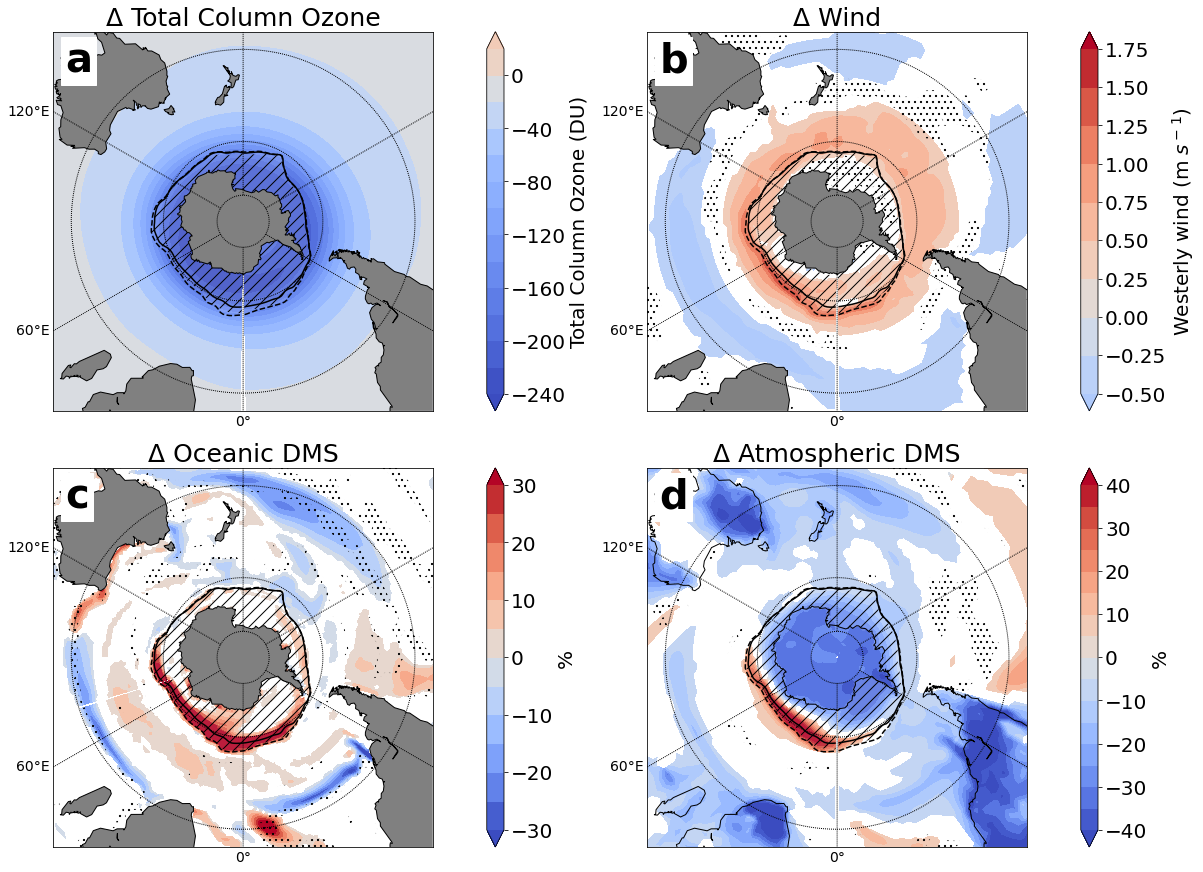

In [107]:
#(rows, columns, position) #  ############################# FIGURE 3 #################################

###################################################### FOR ROUTE 3 ##############################
month='SON'
file ='/home/ybh10/CMIP6/UKESM1/Historic/Numpy_Array/Global/Difference/1940_1960_mean/Abs_Diff/{}/'.format(month)
file_dot ='/home/ybh10/CMIP6/UKESM1/Historic/Numpy_Array/Global/Difference/1940_1960_mean/Statistical/{}/'.format(month)
measurement=['Ozone','Wind','ODMS','DMS'] # Fig 2
data_percentage,data_dot,data_clev,data_shift=data_for_figure(measurement,file,file_dot,saves,month,DJF_shift_abs,SON_shift_abs)
if month == 'DJF':
    sea_ice=np.nanmean(DJF_global_var[seaice],axis=0)
    ocean_sea_ice=np.nanmean(DJF_global_var[o_seaice],axis=0)
else:
    sea_ice=np.nanmean(SON_global_var[seaice],axis=0)
    ocean_sea_ice=np.nanmean(SON_global_var[o_seaice],axis=0)
file ='/home/ybh10/CMIP6/UKESM1/Historic/Numpy_Array/Global/Difference/1940_1960_mean/Rel_Diff/{}/'.format(month)
data_percentage_rel,data_dot_rel,data_clev_rel,data_shift_rel=data_for_figure(measurement,file,file_dot,saves,month,DJF_shift_abs,SON_shift_abs)


clevs_dms_djf=np.arange(-20,20+2,2) # DMS
clevs_odms_son=np.arange(-2,2+.2,.2) # oDMS
clevs_SON_Wind=np.arange(-.5,2,.25)

shifted_cmap_DJF_DMS = shiftedColorMap(orig_cmap, start=0.0, midpoint=0.5, stop=1, name='shifted')
shifted_cmap_DJF_ODMS = shiftedColorMap(orig_cmap, start=0.0, midpoint=0.5, stop=1, name='shifted')
shifted_cmap_Wind = shiftedColorMap(orig_cmap, start=0.35, midpoint=0.52, stop=1, name='shifted')
shifted_cmap_Ozone = shiftedColorMap(orig_cmap, start=0, midpoint=0.7, stop=.6, name='shifted')


DATA=[data_percentage[0],data_percentage[1],data_percentage_rel[2],data_percentage_rel[3]]
DOT=[data_dot[0],data_dot[1],data_dot_rel[2],data_dot_rel[3]]
CLEV=[data_clev[0],clevs_SON_Wind,data_clev_rel[2],data_clev_rel[3]]
SHIFT=[shifted_cmap_Ozone,shifted_cmap_Wind,data_shift_rel[2],shifted_cmap_DJF_DMS]

fig = plt.figure(figsize=(30,15), edgecolor='w')
fig.subplots_adjust(hspace=0.15,wspace=-0.45)
n=2; c=2
ax1 = fig.add_subplot(n,c,1); ax2 = fig.add_subplot(n,c,2); ax3 = fig.add_subplot(n,c,3);ax4 = fig.add_subplot(n,c,4)#;ax5 = fig.add_subplot(n,c,5);ax6 = fig.add_subplot(n,c,6)
axes=[ax1,ax2,ax3,ax4]

#fig, axes = plt.subplots(nrows=2, ncols=3, sharex=True, figsize=(30,10))

measurement=['Total Column Ozone','Wind','Oceanic DMS','Atmospheric DMS'] # Fig 2


# cbar_max = 200.0
# cbar_min = 0.0
# cbar_step = 5.0
#surface_downwelling_shortwave_flux_in_air

#RSDO: Surface SW in Seawater
# rss surface_downwelling_shortwave_flux_in_air
# RSDSCS Surface Downwelling Shortwave Radiation Clear Sky
#units=['Column Ozone (DU)','SW (W $m^-$$^2$)','Oceanic DMS (nM)','Westerly Wind (m $s^-$$^1$)','DMS ppt', 'AOD (550 nm)']#,'RF-CS (W $m^-$$^2$)']
units=['Total Column Ozone (DU)','Westerly wind (m $s^-$$^1$)','%', '%']#,'RF-CS (W $m^-$$^2$)']
dms_ssa=np.load('/home/ybh10/CMIP6/UKESM1/Historic/Numpy_Array/Global/Difference/1940_1960_mean/Rel_Diff/{}/DMS_SSA.npy'.format(month))
clevys_ice=np.arange(0,100+10,10)
clevys_ice=np.arange(-100,100+20,20)
clevys_SSA_H2SO4_SON=np.arange(0,280+20,20)
clevys_SSA_H2SO4_DJF=np.arange(0,180+20,20)
clevys_dmsssa=np.arange(-100,100+25,25)
clevys_dmsssa_DJF=np.arange(-25,25+5,5)

clevys_abs=np.arange(0,280+20,20)
shifted_cmap_Wind = shiftedColorMap(orig_cmap, start=0.35, midpoint=0.52, stop=1, name='shifted')

clevys_dmsa=np.arange(-0.0125,0.005+0.00125,0.00125)
lonmesh,latmesh  = np.meshgrid(lons,lats)
latitudes=[latmesh,latmesh,olat.data,latmesh]#,olat.data,olat.data,latmesh,latmesh,latmesh]
longitudes=[lonmesh,lonmesh,olon.data,lonmesh]#,olon.data,olon.data,lonmesh,lonmesh,lonmesh]
# latitudes=[latmesh,latmesh,latmesh,latmesh,latmesh,latmesh]
# longitudes=[lonmesh,lonmesh,lonmesh,lonmesh,lonmesh,lonmesh,lonmesh]
number=['a','b','c','d','e','f']
Dates=np.arange(1950,2015,1); lat_sh=lats[0:48]
clevs_SSA=np.arange(-3,7.5+1.5,1.5)
ssa_shift=shiftedColorMap(orig_cmap, start=0.35, midpoint=0.55, stop=1, name='shifted')
clevs_SEA_ICE_MASK=np.arange(0,10000,5000) # DMS
mask_map = matplotlib.cm.gist_gray
mask_shift=shiftedColorMap(mask_map, start=1, midpoint=1, stop=1, name='shifted')

sea_ice_dats=[sea_ice,sea_ice,ocean_sea_ice,sea_ice]

data_shift=[shifted_cmap_Wind,shifted_cmap_dms,shifted_cmap_SSAMMR,shifted_cmap_AOD]
#data_shift=[shifted_cmap_modis,shifted_cmap_RSDO,shifted_cmap_odms,shifted_cmap_dms,shifted_cmap_so2,shifted_cmap_H2SO4MMR]
for ax,mapy,sig_dot,clev,shift,laty,lony,title,unit,num,seayice in  zip(axes,DATA,DOT,CLEV,SHIFT,latitudes,longitudes,measurement,units,number,sea_ice_dats):
    ax.grid(linestyle='--',alpha=0.5)
    mapy=np.nanmean(mapy[45:65],axis=(0))
    sig_dot=np.nanmean(sig_dot[145:165],axis=(0))
    sic=np.nanmean(seayice[90:111],axis=(0))
    sic_new=np.nanmean(seayice[145:165],axis=(0))
    map_ax1 = Basemap(projection='spstere',boundinglat=-25, lon_0=0,
                    resolution ='c',ax=ax)

    #x,y  = np.meshgrid(lony,laty)
    x, y = map_ax1(lony,laty) 

    var = np.where(sic>0,np.nan,mapy)#mask sea ice

    meridians = np.arange(0.,360,60.)    
    parallels = np.arange(-90.,90,30.)
    map_ax1.drawcoastlines()
 #   map_ax1.drawcountries()
    map_ax1.drawmeridians(meridians,labels=[1,0,0,1],fontsize=14)  
    map_ax1.drawparallels(parallels,labels=[True,True,True,True],fontsize=12)
    clevs=np.arange(0.0,200+5,5)
    clevs1=np.arange(-30,30+0.5,0.5)
    t=ax.text(-500000,-14500000,num,color='black',fontsize=40,fontweight='bold')
    t.set_bbox(dict(facecolor='white', edgecolor='white'))
    if title=='Oceanic DMS'!=-1:
        vari=blank_space(mapy,-2.5,2.5)
        cs=ax.contourf(x,y,vari,clev,cmap='coolwarm',extend='both')
        map_ax1.fillcontinents(color='gray')
    else: 
        if title=='Atmospheric DMS':
            vari=blank_space(mapy,-5,5)
            cs=ax.contourf(x,y,vari,clev,cmap=shift,extend='both')
        else:
            if title=='Wind':
                map_ax1.fillcontinents(color='gray')
                vari=blank_space(mapy,-0.25,0.25)
                cs=ax.contourf(x,y,vari,clev,cmap=shift,extend='both')
            else:
                map_ax1.fillcontinents(color='gray')
                vari=blank_space(mapy,-0.0025,0.0025)
                cs=ax.contourf(x,y,mapy,clev,cmap=shift,extend='both')
#     if title=='Wind': ########## THIS CODE plots the SEA-ICE MASKING HATCHES #######
#         pass
#     else:
    lol=30
    sea_ice_mask_data=sea_ice_mask(sic,mapy,x,y,lol)
    ax.contourf(x,y,sea_ice_mask_data,cmap=mask_shift,hatches=['//'],alpha=.1)
    ax.contour(x,y,sic,levels=[lol],linestyles='dashed',colors='black',vmax=10000)

    new_sea_ice_mask_data=sea_ice_mask(sic_new,var,x,y,lol)
    ax.contour(x,y,sic_new,levels=[lol],alpha=1,colors='black',vmax=10000)
    
    ax.set_title("\u0394 {}".format(title),fontsize=25)
    #cbar=fig.colorbar(cs, ax=ax1)

    cbar=fig.colorbar(cs,ax=ax)#,extend='both',orientation='vertical')#,ticks = np.arange(-30,30+5,5))
    cbar.set_label('{}'.format(unit),fontsize=20)
    cbar.ax.tick_params(labelsize=20)
    if title=='Wind' !=-1:
     #   var = np.where(sic,np.nan,sig_dot)#mask sea ice
        [m,n] = np.where(sig_dot==1)
        z1 = np.zeros(var.shape)
        z1[m,n]=99
        cs3 = ax.contourf(x, y, z1, 1, hatches=['', '..'], alpha=0)  
    else:
        var = np.where(sic>0,np.nan,sig_dot)#mask sea ice
        [m,n] = np.where(var==1)
        z1 = np.zeros(var.shape)
        z1[m,n]=99
        cs3 = ax.contourf(x, y, z1, 1, hatches=['', '..'], alpha=0)
    
plt.show()
#plt.savefig("/home/ybh10/CMIP6/UKESM1/Historic/Plots/PAPER/Figure/Fig_3_SEA_ICE_contour_30_{}.png".format(month),dpi=600,bbox_inches = 'tight')


In [147]:
#(rows, columns, position) #  ############################# FIGURE 4 #################################

month='SON'
file ='/home/ybh10/CMIP6/UKESM1/Historic/Numpy_Array/Global/Difference/1940_1960_mean/Rel_Diff/{}/'.format(month)
file_dot ='/home/ybh10/CMIP6/UKESM1/Historic/Numpy_Array/Global/Difference/1940_1960_mean/Statistical/{}/'.format(month)
measurement=['SSAMMR','AOD','DMS_SSA_minus_Abs_Diff','DMS_SSA_minus_Abs_Diff'] 

data_percentage,data_dot,data_clev,data_shift=data_for_figure(measurement,file,file_dot,saves,month,DJF_shift_abs,SON_shift_abs)
if month == 'DJF':
    sea_ice=np.nanmean(DJF_global_var[seaice],axis=0)
    ocean_sea_ice=np.nanmean(DJF_global_var[o_seaice],axis=0)
else:
    sea_ice=np.nanmean(SON_global_var[seaice],axis=0)
    ocean_sea_ice=np.nanmean(SON_global_var[o_seaice],axis=0)
month='DJF'   
file ='/home/ybh10/CMIP6/UKESM1/Historic/Numpy_Array/Global/Difference/1940_1960_mean/Rel_Diff/{}/'.format(month)
file_dot ='/home/ybh10/CMIP6/UKESM1/Historic/Numpy_Array/Global/Difference/1940_1960_mean/Statistical/{}/'.format(month)
measurement=['SSAMMR','AOD','DMS_SSA_minus_Abs_Diff','DMS_SSA_minus_Abs_Diff'] 
data_percentage_d,data_dot_d,data_clev_d,data_shift_d=data_for_figure(measurement,file,file_dot,saves,month,DJF_shift_abs,SON_shift_abs)
if month == 'DJF':
    sea_ice_d=np.nanmean(DJF_global_var[seaice],axis=0)
    ocean_sea_ice_d=np.nanmean(DJF_global_var[o_seaice],axis=0)
else:
    sea_ice=np.nanmean(SON_global_var[seaice],axis=0)
    ocean_sea_ice=np.nanmean(SON_global_var[o_seaice],axis=0)
    
clevs_dms_ssa=np.arange(-60,60+10,10) # DMS
clevs_ssa=np.arange(-10,50+10,10) # DMS
clevys_dmsssa_minus=np.arange(-.005,.005+0.001,.001)
clevs_aod=np.arange(-5,50+5,5) # DMS


shifted_cmap_AOD = shiftedColorMap(orig_cmap, start=0.5, midpoint=0.5, stop=1, name='shifted') 
shifted_cmap_SSA = shiftedColorMap(orig_cmap, start=0.4, midpoint=0.6, stop=1, name='shifted') 
shifted_cmap_dm_ssa = shiftedColorMap(orig_cmap, start=0, midpoint=0.5, stop=1, name='shifted') 


DATA=[data_percentage[0],data_percentage[1],data_percentage[2],data_percentage_d[3]]
DOT=[data_dot[0],data_dot[1],data_dot[2],data_dot_d[3]]
CLEV=[clevs_ssa,clevs_aod,clevys_dmsssa_minus,clevys_dmsssa_minus]
SHIFT=[shifted_cmap_SSA,shifted_cmap_AOD,shifted_cmap_dm_ssa,shifted_cmap_dm_ssa]

fig = plt.figure(figsize=(30,15), edgecolor='w')
fig.subplots_adjust(hspace=0.15,wspace=-0.45)
n=2; c=2
ax1 = fig.add_subplot(n,c,1); ax2 = fig.add_subplot(n,c,2); ax3 = fig.add_subplot(n,c,3);ax4 = fig.add_subplot(n,c,4)#;ax5 = fig.add_subplot(n,c,5);ax6 = fig.add_subplot(n,c,6)
axes=[ax1,ax2,ax3,ax4]

#fig, axes = plt.subplots(nrows=2, ncols=3, sharex=True, figsize=(30,10))

measurement=['SSA','AOD','DMS:SSA [SON]','DMS:SSA [DJF]'] # Fig 2


# cbar_max = 200.0
# cbar_min = 0.0
# cbar_step = 5.0
#surface_downwelling_shortwave_flux_in_air

#RSDO: Surface SW in Seawater
# rss surface_downwelling_shortwave_flux_in_air
# RSDSCS Surface Downwelling Shortwave Radiation Clear Sky
#units=['Column Ozone (DU)','SW (W $m^-$$^2$)','Oceanic DMS (nM)','Westerly Wind (m $s^-$$^1$)','DMS ppt', 'AOD (550 nm)']#,'RF-CS (W $m^-$$^2$)']
units=['%','%','DMS:SSA','DMS:SSA']#,'RF-CS (W $m^-$$^2$)']
dms_ssa=np.load('/home/ybh10/CMIP6/UKESM1/Historic/Numpy_Array/Global/Difference/1940_1960_mean/Rel_Diff/{}/DMS_SSA.npy'.format(month))
clevys_ice=np.arange(0,100+10,10)
clevys_ice=np.arange(-100,100+20,20)
clevys_SSA_H2SO4_SON=np.arange(0,280+20,20)
clevys_SSA_H2SO4_DJF=np.arange(0,180+20,20)
clevys_dmsssa=np.arange(-100,100+25,25)
clevys_dmsssa_DJF=np.arange(-25,25+5,5)

clevys_abs=np.arange(0,280+20,20)
shifted_cmap_Wind = shiftedColorMap(orig_cmap, start=0.35, midpoint=0.52, stop=1, name='shifted')

clevys_dmsa=np.arange(-0.0125,0.005+0.00125,0.00125)
lonmesh,latmesh  = np.meshgrid(lons,lats)
latitudes=[latmesh,latmesh,latmesh,latmesh]#,olat.data,olat.data,latmesh,latmesh,latmesh]
longitudes=[lonmesh,lonmesh,lonmesh,lonmesh]#,olon.data,olon.data,lonmesh,lonmesh,lonmesh]
# latitudes=[latmesh,latmesh,latmesh,latmesh,latmesh,latmesh]
# longitudes=[lonmesh,lonmesh,lonmesh,lonmesh,lonmesh,lonmesh,lonmesh]
number=['a','b','c','d']
Dates=np.arange(1950,2015,1); lat_sh=lats[0:48]
clevs_SSA=np.arange(-3,7.5+1.5,1.5)
ssa_shift=shiftedColorMap(orig_cmap, start=0.35, midpoint=0.55, stop=1, name='shifted')
clevs_SEA_ICE_MASK=np.arange(0,10000,5000) # DMS
mask_map = matplotlib.cm.gist_gray
mask_shift=shiftedColorMap(mask_map, start=1, midpoint=1, stop=1, name='shifted')

sea_ice_dats=[sea_ice,sea_ice,sea_ice,sea_ice_d]

data_shift=[shifted_cmap_Wind,shifted_cmap_dms,shifted_cmap_SSAMMR,shifted_cmap_AOD]
#data_shift=[shifted_cmap_modis,shifted_cmap_RSDO,shifted_cmap_odms,shifted_cmap_dms,shifted_cmap_so2,shifted_cmap_H2SO4MMR]
for ax,mapy,sig_dot,clev,shift,laty,lony,title,unit,num,seayice in  zip(axes,DATA,DOT,CLEV,SHIFT,latitudes,longitudes,measurement,units,number,sea_ice_dats):
    ax.grid(linestyle='--',alpha=0.5)
    mapy=np.nanmean(mapy[45:65],axis=(0))
    sig_dot=np.nanmean(sig_dot[145:165],axis=(0))
    sic=np.nanmean(seayice[90:111],axis=(0))
    sic_new=np.nanmean(seayice[145:165],axis=(0))
    map_ax1 = Basemap(projection='spstere',boundinglat=-25, lon_0=0,
                    resolution ='c',ax=ax)

    #x,y  = np.meshgrid(lony,laty)
    x, y = map_ax1(lony,laty) 

    var = np.where(sic>0,np.nan,mapy)#mask sea ice

    meridians = np.arange(0.,360,60.)    
    parallels = np.arange(-90.,90,30.)
    map_ax1.drawcoastlines()
    map_ax1.fillcontinents(color='gray')
 #   map_ax1.drawcountries()
    map_ax1.drawmeridians(meridians,labels=[1,0,0,1],fontsize=14)  
    map_ax1.drawparallels(parallels,labels=[True,True,True,True],fontsize=12)
    clevs=np.arange(0.0,200+5,5)
    clevs1=np.arange(-30,30+0.5,0.5)
    t=ax.text(-500000,-14500000,num,color='black',fontsize=40,fontweight='bold')
    t.set_bbox(dict(facecolor='white', edgecolor='white'))
    if title=='SSA'!=-1:
        vari=blank_space(mapy,-2.5,2.5)
        cs=ax.contourf(x,y,vari,clev,cmap=shift,extend='both')

    else: 
        if title=='AOD':
            vari=blank_space(mapy,-5,5)
            cs=ax.contourf(x,y,vari,clev,cmap=shift,extend='both')
        else:
            if title=='DMS:SSA [SON]':
                vari=blank_space(mapy,-0.001,0.001)
                cs=ax.contourf(x,y,vari,clev,cmap=shift,extend='both')
            else:
                vari=blank_space(mapy,-0.0005,0.0005)
                cs=ax.contourf(x,y,vari,clev,cmap=shift,extend='both')
#     if title=='Wind': ########## THIS CODE plots the SEA-ICE MASKING HATCHES #######
#         pass
#     else:
    lol=30
    sea_ice_mask_data=sea_ice_mask(sic,mapy,x,y,lol)
    ax.contourf(x,y,sea_ice_mask_data,cmap=mask_shift,hatches=['//'],alpha=.1)
    ax.contour(x,y,sic,levels=[lol],linestyles='dashed',colors='black',vmax=10000)

    new_sea_ice_mask_data=sea_ice_mask(sic_new,var,x,y,lol)
    ax.contour(x,y,sic_new,levels=[lol],alpha=1,colors='black',vmax=10000)
    
    ax.set_title("\u0394 {}".format(title),fontsize=25)
    #cbar=fig.colorbar(cs, ax=ax1)

    cbar=fig.colorbar(cs,ax=ax)#,extend='both',orientation='vertical')#,ticks = np.arange(-30,30+5,5))
    cbar.set_label('{}'.format(unit),fontsize=20)
    cbar.ax.tick_params(labelsize=20)
    if title=='Wind' !=-1:
     #   var = np.where(sic,np.nan,sig_dot)#mask sea ice
        [m,n] = np.where(sig_dot==1)
        z1 = np.zeros(var.shape)
        z1[m,n]=99
        cs3 = ax.contourf(x, y, z1, 1, hatches=['', '..'], alpha=0)  
    else:
        var = np.where(sic>0,np.nan,sig_dot)#mask sea ice
        [m,n] = np.where(var==1)
        z1 = np.zeros(var.shape)
        z1[m,n]=99
        cs3 = ax.contourf(x, y, z1, 1, hatches=['', '..'], alpha=0)
    

#plt.show()
plt.savefig("/home/ybh10/CMIP6/UKESM1/Historic/Plots/PAPER/Figure/Fig_4_SEA_ICE_contour_30_{}.png".format(month),dpi=600,bbox_inches = 'tight')


TypeError: __call__() takes from 2 to 4 positional arguments but 5 were given

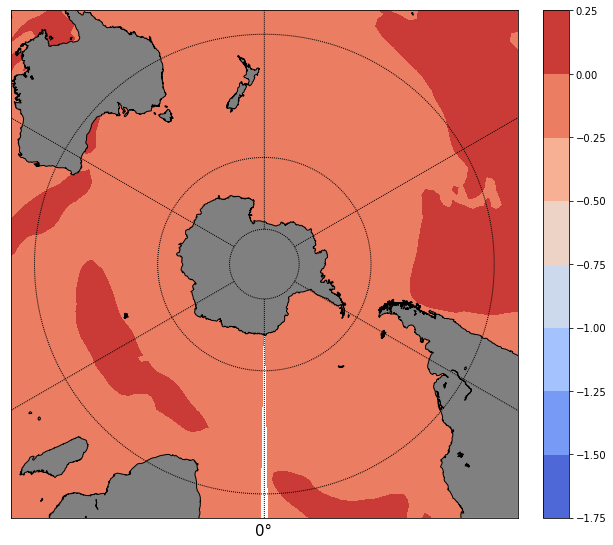

In [150]:
fig = plt.figure(figsize=(10,10), edgecolor='w')

map_ax1 = Basemap(projection='spstere',boundinglat=-25, lon_0=0,
                         resolution ='l')
lonmesh,latmesh  = np.meshgrid(lons,lats)
x, y = map_ax1(lonmesh,latmesh) 
clevs=np.arange(-.002,.002+0.0005,.0005)
meridians = np.arange(0.,360,60.)    
parallels = np.arange(-90.,90,30.)
map_ax1.drawcoastlines()
#map_ax1.drawcountries()
map_ax1.drawmeridians(meridians,labels=[0,0,0,1],fontsize=15)  
map_ax1.drawparallels(parallels,labels=[1,0,0,0],fontsize=15)
cs=map_ax1.contourf(x, y,np.nanmean(data_percentage[3][45:65],axis=0),cmap='coolwarm')# alpha=1,vmin=0,)##cmap=plt.cm.get_cmap('coolwarm',10))#,ticks = np.arange(0,26+2,2))
cbar=map_ax1.colorbar(cs,extend='both',location='right',pad="5%")#,ticks = np.arange(0,26+2,2))
map_ax1.fillcontinents(color='gray')
plt.show()

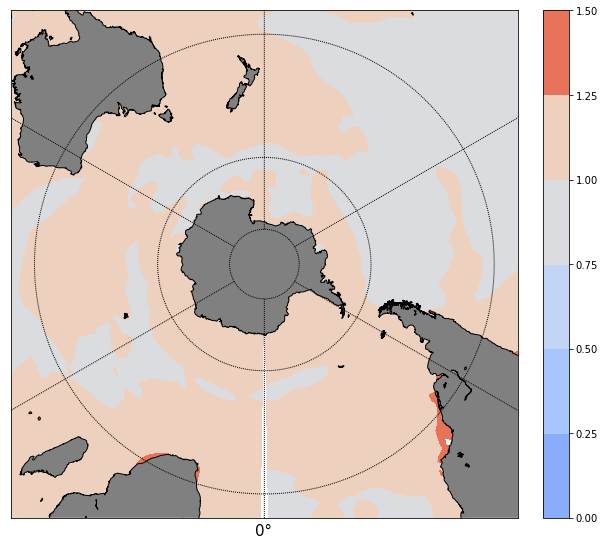

In [160]:
fig = plt.figure(figsize=(10,10), edgecolor='w')
orig_cmap = matplotlib.cm.coolwarm
shifted_cmap_AOD = shiftedColorMap(orig_cmap, start=0.2, midpoint=0.8, stop=1, name='shifted') 

map_ax1 = Basemap(projection='spstere',boundinglat=-25, lon_0=0,
                         resolution ='l')
lonmesh,latmesh  = np.meshgrid(lons,lats)
x, y = map_ax1(lonmesh,latmesh) 
clevs=np.arange(0,1.5+0.25,.25)
meridians = np.arange(0.,360,60.)    
parallels = np.arange(-90.,90,30.)
map_ax1.drawcoastlines()
#map_ax1.drawcountries()
map_ax1.drawmeridians(meridians,labels=[0,0,0,1],fontsize=15)  
map_ax1.drawparallels(parallels,labels=[1,0,0,0],fontsize=15)
cs=map_ax1.contourf(x, y,np.nanmean(data_percentage[2][45:65],axis=0),clevs,cmap=shifted_cmap_AOD)# alpha=1,vmin=0,)##cmap=plt.cm.get_cmap('coolwarm',10))#,ticks = np.arange(0,26+2,2))
cbar=map_ax1.colorbar(cs,extend='both',location='right',pad="5%")#,ticks = np.arange(0,26+2,2))
map_ax1.fillcontinents(color='gray')
plt.show()

In [ ]:
#############################################################################################################
#############################################################################################################
########################################### FIGURES FOR PRESENTATIONS #######################################
#############################################################################################################
#############################################################################################################

month='SON'
file ='/home/ybh10/CMIP6/UKESM1/Historic/Numpy_Array/Global/Difference/1940_1960_mean/Abs_Diff/{}/'.format(month)
file_dot ='/home/ybh10/CMIP6/UKESM1/Historic/Numpy_Array/Global/Difference/1940_1960_mean/Statistical/{}/'.format(month)
measurement=['Ozone'] 

data_percentage,data_dot,data_clev,data_shift=data_for_figure(measurement,file,file_dot,saves,month,DJF_shift_abs,SON_shift_abs)
if month == 'DJF':
    sea_ice=np.nanmean(DJF_global_var[seaice],axis=0)
    ocean_sea_ice=np.nanmean(DJF_global_var[o_seaice],axis=0)
else:
    sea_ice=np.nanmean(SON_global_var[seaice],axis=0)
    ocean_sea_ice=np.nanmean(SON_global_var[o_seaice],axis=0)
orig_cmap = matplotlib.cm.coolwarm



clevs=np.arange(270,540+30,30)
yeary=np.arange(1950,2015,1)
for i,year in zip(range(0,65),yeary):
    mapy=data_percentage[0]
    fig = plt.figure(figsize=(10,10), edgecolor='w')
    orig_cmap = matplotlib.cm.coolwarm
    shifted_cmap_AOD = shiftedColorMap(orig_cmap, start=0.2, midpoint=0.8, stop=1, name='shifted') 

    map_ax1 = Basemap(projection='spstere',boundinglat=-25, lon_0=0,
                             resolution ='l')
    lonmesh,latmesh  = np.meshgrid(lons,lats)
    x, y = map_ax1(lonmesh,latmesh) 
    meridians = np.arange(0.,360,60.)    
    parallels = np.arange(-90.,90,30.)
    map_ax1.drawcoastlines()
    #map_ax1.drawcountries()
    map_ax1.drawmeridians(meridians,labels=[0,0,0,1],fontsize=15)  
    map_ax1.drawparallels(parallels,labels=[1,0,0,0],fontsize=15)
    cs=map_ax1.contourf(x, y,mapy[i],data_clev[0],cmap=shifted_cmap_Ozone)# alpha=1,vmin=0,)##cmap=plt.cm.get_cmap('coolwarm',10))#,ticks = np.arange(0,26+2,2))
    cbar=map_ax1.colorbar(cs,extend='both',location='right',pad="5%")#,ticks = np.arange(0,26+2,2))
    cbar.set_label('DU',fontsize=20)

#    map_ax1.fillcontinents(color='gray')
    plt.title('\u0394 Ozone Column: Year {}, $x$\u0304 = {:.1f} DU '.format(year,np.nanmean(mapy[i,0:23])))

 #   plt.show()
    plt.tight_layout()
    plt.savefig("/home/ybh10/CMIP6/UKESM1/Historic/Plots/Animation/Ozone/Plots_for_Gif/SON_Ozone_Year_{}.png".format(year),dpi=600,bbox_inches = 'tight')
    gc.collect()

import imageio
png_dir = '/home/ybh10/CMIP6/UKESM1/Historic/Plots/Animation/Ozone/Plots_for_Gif/'
images = []
    
### Loop all the .png files in that directroy ###
for year in (yeary):
    file_path = ('{}SON_Ozone_Year_{}.png'.format(png_dir,year))
    images.append(imageio.imread(file_path))
        
### Set the duration of each plot image for the GIF ###
kargs = { 'duration': 0.2 }

## Create and Save the GIF plot ###
imageio.mimsave('/home/ybh10/CMIP6/UKESM1/Historic/Plots/Animation/Ozone/SON_Ozone_1940_2015.gif', images,**kargs)


In [ ]:
month='DJF'
file ='/home/ybh10/CMIP6/UKESM1/Historic/Numpy_Array/Global/Difference/1940_1960_mean/Abs_Diff/{}/'.format(month)
file_dot ='/home/ybh10/CMIP6/UKESM1/Historic/Numpy_Array/Global/Difference/1940_1960_mean/Statistical/{}/'.format(month)
measurement=['Wind','Ozone'] 

# data_percentage,data_dot,data_clev,data_shift=data_for_figure(measurement,file,file_dot,saves,month,DJF_shift_abs,SON_shift_abs)
# if month == 'DJF':
#     sea_ice=np.nanmean(DJF_global_var[seaice],axis=0)
#     ocean_sea_ice=np.nanmean(DJF_global_var[o_seaice],axis=0)
# else:
#     sea_ice=np.nanmean(SON_global_var[seaice],axis=0)
#     ocean_sea_ice=np.nanmean(SON_global_var[o_seaice],axis=0)

# fig = plt.figure(figsize=(30,30), edgecolor='w')
# fig.subplots_adjust(hspace=0.15,wspace=-0.45)
# n=1; c=2
# ax1 = fig.add_subplot(n,c,1); ax2 = fig.add_subplot(n,c,2)#; ax3 = fig.add_subplot(n,c,3);ax4 = fig.add_subplot(n,c,4)#;ax5 = fig.add_subplot(n,c,5);ax6 = fig.add_subplot(n,c,6)
# axes=[ax1,ax2]

clevs_oz=np.arange(270,540+30,30)

orig_cmap = matplotlib.cm.coolwarm
shifted_cmap_Wind = shiftedColorMap(orig_cmap, start=0.3, midpoint=0.52, stop=1, name='shifted')

shifted_cmap_Ozone = shiftedColorMap(orig_cmap, start=0, midpoint=0.7, stop=.6, name='shifted')
shifted_cmap_Wind = shiftedColorMap(orig_cmap, start=0.3, midpoint=0.52, stop=1, name='shifted')

DATA=[data_percentage[0],data_percentage[1]]
#DOT=[data_dot[0],data_dot[1]]
CLEV=[data_clev[0],data_clev[1]]
SHIFT=[shifted_cmap_Wind,shifted_cmap_Ozone]    
units=['Westerly Wind (m $s^-$$^1$)','Column Ozone (DU)']
Titles=['Westerly Wind','Ozone']
yeary=np.arange(1950,2015,1)
for i,year in zip(range(0,65),yeary):
    fig = plt.figure(figsize=(20,20), edgecolor='w')
    fig.subplots_adjust(hspace=0.15,wspace=0.15)
    n=1; c=2
    ax1 = fig.add_subplot(n,c,1); ax2 = fig.add_subplot(n,c,2)#; ax3 = fig.add_subplot(n,c,3);ax4 = fig.add_subplot(n,c,4)#;ax5 = fig.add_subplot(n,c,5);ax6 = fig.add_subplot(n,c,6)
    axes=[ax1,ax2]
    for ax,mapy,clevy,shifty,unit,title in zip(axes,DATA,CLEV,SHIFT,units,Titles):
      #  mapy=data_percentage[0]
        
        orig_cmap = matplotlib.cm.coolwarm

        map_ax1 = Basemap(projection='spstere',boundinglat=-25, lon_0=0,
                                 resolution ='l',ax=ax)
        lonmesh,latmesh  = np.meshgrid(lons,lats)
        x, y = map_ax1(lonmesh,latmesh) 
        meridians = np.arange(0.,360,60.)    
        parallels = np.arange(-90.,90,30.)
        map_ax1.drawcoastlines()
        map_ax1.drawcountries()
        map_ax1.drawmeridians(meridians,labels=[0,0,0,1],fontsize=15)  
        map_ax1.drawparallels(parallels,labels=[1,0,0,0],fontsize=15)
        cs=map_ax1.contourf(x, y,mapy[i],clevy,cmap=shifty,extend='both')# alpha=1,vmin=0,)##cmap=plt.cm.get_cmap('coolwarm',10))#,ticks = np.arange(0,26+2,2))
        cbar=map_ax1.colorbar(cs,extend='both',location='right',pad="5%")#,ticks = np.arange(0,26+2,2))
        cbar.set_label('{}'.format(unit),fontsize=15)
        if title == 'Ozone':
            pass
        else:
            map_ax1.fillcontinents(color='gray')
        ax.set_title('\u0394 {}, $x$\u0304 = {:.1f} m s$^-$$^1$ '.format(title,np.nanmean(mapy[i,22:26])),fontsize=21)
        cbar.ax.tick_params(labelsize=15) 
    plt.suptitle('Year {}'.format(year),y=.75,x=.45,fontsize=30)
    #plt.show()
    
    plt.tight_layout() 
    plt.savefig("/home/ybh10/CMIP6/UKESM1/Historic/Plots/Animation/Wind_Ozone/Plots_for_Gif/Wind_Ozone_Year_{}_low_res.png".format(year),dpi=270,bbox_inches = 'tight')
    gc.collect()
import imageio
png_dir = '/home/ybh10/CMIP6/UKESM1/Historic/Plots/Animation/Wind_Ozone/Plots_for_Gif/'
images = []
    
### Loop all the .png files in that directroy ###
for year in (yeary):
    file_path = ('{}Wind_Ozone_Year_{}_low_res.png'.format(png_dir,year))
    images.append(imageio.imread(file_path))
        
### Set the duration of each plot image for the GIF ###
kargs = { 'duration': 0.4 }

## Create and Save the GIF plot ###
imageio.mimsave('/home/ybh10/CMIP6/UKESM1/Historic/Plots/Animation/Wind_Ozone/Wind_Ozone_Year_1940_2015_low_res.gif', images,**kargs)



In [175]:
#############################################################################################################
#############################################################################################################
########################################### FIGURES FOR PRESENTATIONS #######################################
#############################################################################################################
#############################################################################################################

month='DJF'
file ='/home/ybh10/CMIP6/UKESM1/Historic/Numpy_Array/Global/Difference/1940_1960_mean/Abs_Diff/{}/'.format(month)
file_dot ='/home/ybh10/CMIP6/UKESM1/Historic/Numpy_Array/Global/Difference/1940_1960_mean/Statistical/{}/'.format(month)
measurement=['Wind'] 

data_percentage,data_dot,data_clev,data_shift=data_for_figure(measurement,file,file_dot,saves,month,DJF_shift_abs,SON_shift_abs)
if month == 'DJF':
    sea_ice=np.nanmean(DJF_global_var[seaice],axis=0)
    ocean_sea_ice=np.nanmean(DJF_global_var[o_seaice],axis=0)
else:
    sea_ice=np.nanmean(SON_global_var[seaice],axis=0)
    ocean_sea_ice=np.nanmean(SON_global_var[o_seaice],axis=0)

orig_cmap = matplotlib.cm.coolwarm
shifted_cmap_Wind = shiftedColorMap(orig_cmap, start=0.3, midpoint=0.52, stop=1, name='shifted')

clevs=np.arange(270,540+30,30)
yeary=np.arange(1950,2015,1)
for i,year in zip(range(0,65),yeary):
    mapy=data_percentage[0]
    fig = plt.figure(figsize=(10,10), edgecolor='w')
    orig_cmap = matplotlib.cm.coolwarm

    map_ax1 = Basemap(projection='spstere',boundinglat=-25, lon_0=0,
                             resolution ='l')
    lonmesh,latmesh  = np.meshgrid(lons,lats)
    x, y = map_ax1(lonmesh,latmesh) 
    meridians = np.arange(0.,360,60.)    
    parallels = np.arange(-90.,90,30.)
    map_ax1.drawcoastlines()
    map_ax1.drawcountries()
    map_ax1.drawmeridians(meridians,labels=[0,0,0,1],fontsize=15)  
    map_ax1.drawparallels(parallels,labels=[1,0,0,0],fontsize=15)
    cs=map_ax1.contourf(x, y,mapy[i],data_clev[0],cmap=shifted_cmap_Wind,extend='both')# alpha=1,vmin=0,)##cmap=plt.cm.get_cmap('coolwarm',10))#,ticks = np.arange(0,26+2,2))
    cbar=map_ax1.colorbar(cs,extend='both',location='right',pad="5%")#,ticks = np.arange(0,26+2,2))
    cbar.set_label('Westerly wind (m $s^-$$^1$)',fontsize=20)

    map_ax1.fillcontinents(color='gray')
    plt.title('\u0394 Winds: Year {}, $x$\u0304 = {:.1f} m s$^-$$^1$ '.format(year,np.nanmean(mapy[i,22:26])))

    #plt.show()
    plt.tight_layout()
    plt.savefig("/home/ybh10/CMIP6/UKESM1/Historic/Plots/Animation/Wind/Plots_for_Gif/DJF_Wind_Year_{}.png".format(year),dpi=600,bbox_inches = 'tight')
    gc.collect()

import imageio
png_dir = '/home/ybh10/CMIP6/UKESM1/Historic/Plots/Animation/Wind/Plots_for_Gif/'
images = []
    
### Loop all the .png files in that directroy ###
for year in (yeary):
    file_path = ('{}DJF_Wind_Year_{}.png'.format(png_dir,year))
    images.append(imageio.imread(file_path))
        
### Set the duration of each plot image for the GIF ###
kargs = { 'duration': 0.2 }

## Create and Save the GIF plot ###
imageio.mimsave('/home/ybh10/CMIP6/UKESM1/Historic/Plots/Animation/Wind/DJF_Wind_1940_2015.gif', images,**kargs)


TypeError: __call__() takes from 2 to 4 positional arguments but 5 were given